In [410]:
# Master File for AN-19-154 Work: Search for Neutral Long-lived Particles Decaying in the Muon System

# Coders: Nathan Suri, Caltech; Cristian Pena, Caltech/Fermilab
# Date: July 2019
# LPC LLP Group

# Description
# Compiled progress on AN-19-154 work

# Action Plan
# Determine nCsc cut that yields 10 signal events

# Notes/Conclusions
# @nasurijr:

In [411]:
# User specifics
# Setups pwd location for data files and imports of special ROOT utilities

work_location = input("Username: ")
if work_location == 'nasurijr':
    pwd = '/nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/'
    
    # Sets display width
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:85% !important; }</style>"))
    
# elif work_location == '<Insert Tier2 username here>':
#     pwd = '/home/cms/delayed_jet_analyzer/'

Username: nasurijr


# Imports

In [412]:
# Imports necessary utilities and modules

import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

# Graph/histo utilities from ROOT
# Contained within the delayed_jet_analyzer repository
import sys
sys.path.append(pwd+'lib')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

# Used for extracting the TTree structure from each datafile
import os
import uproot

# Used for creating user-readable tables
from prettytable import PrettyTable

# Imports jet clustering algorithm (FastJet)
from pyjet import cluster

donotdelete = []

# Read in and Extract TTrees from Datafiles

In [413]:
# Setups dictionaries for storing data from MC/data ntuples
fpath = {}
tree = {}
NEvents = {}

data_path = pwd+'data/'

# Background Samples

# # ggH-comparable background: QCD
# fpath['qcd'] = data_path +'jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root'

# # Currently not needed for the analysis
# # Small subset of B samples for quick runs/tests
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018B_112_dec.root'
# # Complete set of A and B ZeroBias samples (time-intensive to run)
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018AB_complete.root'

# WH-comparable background: WJetsToLNu
# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root'

# # Complete set run via CRAB on llp_ntupler (non-extension)
fpath['WJetsToLNu'] = data_path + 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v7.root'

# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v7_chisai.root'


# Contains events that fail punch-through veto and have large nCsc clusters in ME 1/1 and 1/2
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_WJetsToLNu_inclusive_punch_test.root'

# Contains events that fail punch-through veto and have large nCsc clusters outside of ME 1/1 and 1/2
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_WJetsToLNu_inclusiveNLO_notpunch.root'


################################################################

# Signal Samples

# WH: bbbb
# mH = 125 GeV, mX = 15 GeV, ctau = 10 m
fpath['m15ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'

# mH = 125 GeV, mX = 40 GeV, ctau = 10 m
fpath['m40ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wminus
fpath['m55ct10000mm_minus'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'
# fpath['m55ct10000mm_minus'] = data_path + 'jet_timing_studies_ntuple_WMinus_mX55ct10m_jetMatch_test.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wplus
fpath['m55ct10000mm_plus'] = data_path + 'WplusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'
# fpath['m55ct10000mm_plus'] = data_path + 'jet_timing_studies_ntuple_Wplus_mX55ct10m_jetMatch_test.root'


# # VH: MET+bb
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path + 'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root'

# ggH
# mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl1000_ev100000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl10000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl1000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl10000_ev100000.root'

# Iterates through each file and extracts the ROOT TTree structure from each
for k,v in fpath.items():
    print(str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    print(k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    NEvents[k] = root_dir['ntuples']['NEvents'][1]
    # Accesses the array form of the jetPt branch
#     a = tree[k]["jetPt"].array()
#     print(a[:-1][0])

2019-08-23 14:42:33.151746-07:00
WJetsToLNu /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v7.root
2019-08-23 14:42:37.850738-07:00
m15ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV_v7.root
2019-08-23 14:42:38.096521-07:00
m40ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV_v7.root
2019-08-23 14:42:38.306948-07:00
m55ct10000mm_minus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV_v7.root
2019-08-23 14:42:38.519298-07:00
m55ct10000mm_plus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WplusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV_v7.root


## Name TTree Objects

In [414]:
# Bookkeeping: Defines the TTrees from the read datafiles
# Names displayed in README.md table

T_m15_ct10 = tree['m15ct10000mm']
T_wjets = tree['WJetsToLNu']
T_m40_ct10 = tree['m40ct10000mm']
T_m55_ct10_minus = tree['m55ct10000mm_minus']
T_m55_ct10_plus = tree['m55ct10000mm_plus']

# Define Variables and Name Datafiles 

In [415]:
# Variable Definitions
# Creates dictionaries for variables to be analyzed
# The dictionaries will contain the variable arrays for each datafile with a relevant key

# Boolean selections
sel_bool = {}

# CSC
nCsc = {}
csc_z = {}
csc_x = {}
csc_y = {}
csc_eta = {}
csc_phi = {}
csc_t = {}
csc_r = {}

# Gen Level
# gLLP_eta = {}
gLLP_r_0 = {}
gLLP_r_1 = {}
gLLP_decay_0 = {}
gLLP_decay_1 = {}

# Reco level
met_pt = {}
eventNum = {}
lumiNum = {}
jet_pt = {}
ele_pt = {}
mu_pt = {}
nJets = {}
nElectrons = {}
nMuons = {}
nRechits_flag = {}

# Reco - jets
jetEta = {}
jetPhi = {}

In [416]:
# Bookkeeping: Creates a dictionary for iterating over all of the datafiles and 
#              converting the relevant branches to numpy arrays
# Names displayed in README.md table

# data_trees = {'m55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets, 'm15ct10000mm': T_m15_ct10}

data_trees = {'m55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets}

# Event Selection

## TBranch -> np.array() Conversion

In [417]:
# Event Selection

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    if 'wh' in species:
        ele_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 13, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        mu_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 11, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        sel_lepton = []
        time_counter = 0
        
        # To look at both muon/electron channels
#         for ev in np.logical_or(ele_sel, mu_sel):
        # For electron-only channel
        for ev in ele_sel:
            time_counter += 1
            if (time_counter % 100000) == 0:
                print(str(time_counter) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            if ev.any():
                sel_lepton.append(True)
            else:
                sel_lepton.append(False)
                
    if 'wh' not in species:
        sel_lepton = np.ones(len(arbor), dtype=bool)
                
    if 'metbb' in species or 'bbmet' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_decay_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2 + (arbor['gLLP_decay_vertex_z'].array()[:,0])**2)

        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        
        sel_signal = np.logical_and(sel_dis_1, sel_lepton)
        sel_bool[species] = sel_signal 
        
    if 'bbbb' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_r_1[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,1])**2+(arbor['gLLP_decay_vertex_y'].array()[:,1])**2)

        
        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        
        sel_dis_1 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) < 1100)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])<2.4)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])>0.9)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])<695.5)
        
        sel_signal = np.logical_or(sel_dis_0, sel_dis_1)
        sel_signal = np.logical_and(sel_signal, sel_lepton)
        sel_bool[species] = sel_signal 
        
    else:
        sel_bool[species] = np.ones(len(arbor['nCsc'].array()), dtype=bool)
        
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-23 14:42:48.071366-07:00
m55ct10m_wh_bbbb_minus: 2019-08-23 14:42:48.999321-07:00
m55ct10m_wh_bbbb_plus: 2019-08-23 14:42:50.007082-07:00
WJetsToLNu: 2019-08-23 14:43:39.391136-07:00


In [418]:
# Application of event selection to variables

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

csc_r_quad = {}
for species, arbor in data_trees.items():
    # Endcap: CSCs
    nCsc[species] = arbor['nCsc'].array()[sel_bool[species]]
    csc_z[species] = arbor['cscZ'].array()[sel_bool[species]]
    csc_x[species] = arbor['cscX'].array()[sel_bool[species]]
    csc_y[species] = arbor['cscY'].array()[sel_bool[species]]
    csc_t[species] = arbor['cscT'].array()[sel_bool[species]]
    csc_eta[species] = arbor['cscEta'].array()[sel_bool[species]]
    csc_phi[species] = arbor['cscPhi'].array()[sel_bool[species]]
    csc_r_quad[species] = np.array(arbor['cscX'].array()[sel_bool[species]])**2 + np.array(arbor['cscY'].array()[sel_bool[species]])**2
    csc_r[species] = []
    for hit_r in csc_r_quad[species]:
        r_val = np.sqrt(hit_r.astype(float))
        csc_r[species].append(r_val)

    # Reco-level
    eventNum[species] = arbor['eventNum'].array()[sel_bool[species]]
    lumiNum[species] = arbor['lumiNum'].array()[sel_bool[species]]
#     met_pt[species] = arbor['metType1Pt'].array()[sel_bool[species]]
    
    jet_pt[species] = arbor['jetPt'].array()[sel_bool[species]]
#     ele_pt[species] = arbor['elePt'].array()[sel_bool[species]]
#     mu_pt[species] = arbor['muonPt'].array()[sel_bool[species]]
    nJets[species] = arbor['nJets'].array()[sel_bool[species]]
#     nElectrons[species] = arbor['nElectrons'].array()[sel_bool[species]]
#     nMuons[species] = arbor['nMuons'].array()[sel_bool[species]]
#     if species not in ('ggH', 'zeroBias', 'qcd'):
    nRechits_flag[species] = (arbor['cscNRecHits_flag'].array())[sel_bool[species]]

    
    
    jetEta[species] = arbor['jetEta'].array()[sel_bool[species]]
    jetPhi[species] = arbor['jetPhi'].array()[sel_bool[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-23 14:43:44.020351-07:00
m55ct10m_wh_bbbb_minus: 2019-08-23 14:43:45.256901-07:00
m55ct10m_wh_bbbb_plus: 2019-08-23 14:43:45.572710-07:00
WJetsToLNu: 2019-08-23 15:00:00.467801-07:00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


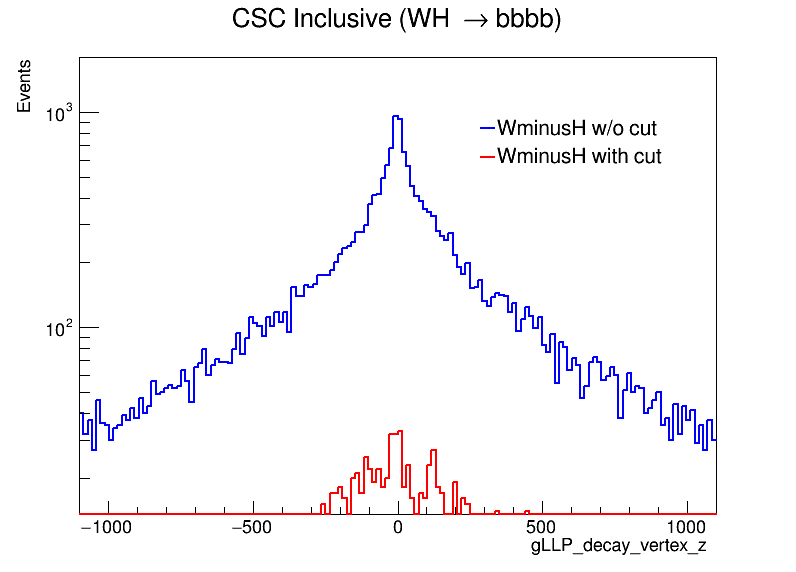

In [419]:
# Creates a 1D histogram for the number of CSC hits for the m55ct10m signal MC and WJetsToLNu MC

c = rt.TCanvas('c','c', 800, 600)
h = {}

h['gLLP_z'] = create_TH1D(T_m55_ct10_minus['gLLP_decay_vertex_x'].array()[:,0], axis_title=['m55ct10m_wh_bbbb_minus', 'Events'], name='m55ct10m_wh_bbbb_minus', binning=[150,-1100,1100])
h['gLLP_z'].SetLineColor(4)

h['gLLP_z_cut'] = create_TH1D(T_m55_ct10_minus['gLLP_decay_vertex_x'].array()[:,0][sel_bool['m55ct10m_wh_bbbb_minus']], axis_title=['m55ct10m_wh_bbbb_prime', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,-1100,1100])
h['gLLP_z_cut'].SetLineColor(2)


c.SetLogy()

h['gLLP_z'].SetLineWidth(2)
h['gLLP_z_cut'].SetLineWidth(2)

h['gLLP_z'].GetXaxis().SetRangeUser(-1100,1100)


h['gLLP_z'].SetStats(0)
h['gLLP_z'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['gLLP_z'].SetXTitle("gLLP_decay_vertex_z")


h['gLLP_z'].Draw('histo')
h['gLLP_z_cut'].Draw('histo+same')
# h['gLLP_z'].Draw('histo+same')


legend = rt.TLegend(0.6,0.80,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.AddEntry( h['gLLP_z'], "WminusH w/o cut" , "L");
legend.AddEntry( h['gLLP_z_cut'], "WminusH with cut" , "L");

legend.Draw();

c.Draw()

In [420]:
print(len(T_m55_ct10_minus['gLLP_decay_vertex_x'].array()[:,0][sel_bool['m55ct10m_wh_bbbb_minus']])/len(T_m55_ct10_minus['gLLP_decay_vertex_x'].array()[:,0]))
print(T_m55_ct10_minus['eventNum'].array()[sel_bool['m55ct10m_wh_bbbb_minus']])

0.0452418096723869
[    5   101   123 ... 23453 23470 23475]


In [421]:
# # Auxiliary variables for investigating jets(/muons/electrons: deprecated)

# lead_jet_pt = {}
# max_jet_pt = {}
# avg_jet_pt = {}

# # lead_mu_pt = {}
# # max_mu_pt = {}
# # avg_mu_pt = {}

# # lead_ele_pt = {}
# # max_ele_pt = {}
# # avg_ele_pt = {}

# for species in data_trees.keys():
#     lead_jet_pt[species] = [x[0] if len(x) else -1 for x in jet_pt[species]]
#     max_jet_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
#     avg_jet_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
    
# #     lead_mu_pt[species] = [x[0] if len(x) else -1 for x in mu_pt[species]]
# #     max_mu_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
# #     avg_mu_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
    
# #     lead_ele_pt[species] = [x[0] if len(x) else -1 for x in ele_pt[species]]
# #     max_ele_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
# #     avg_ele_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
    
#     print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

In [422]:
# Endcap: CSCs
nCsc['m55ct10m_wh_bbbb'] = np.concatenate([nCsc['m55ct10m_wh_bbbb_minus'], nCsc['m55ct10m_wh_bbbb_plus']])
csc_z['m55ct10m_wh_bbbb'] = np.concatenate([csc_z['m55ct10m_wh_bbbb_minus'], csc_z['m55ct10m_wh_bbbb_plus']])
csc_x['m55ct10m_wh_bbbb'] = np.concatenate([csc_x['m55ct10m_wh_bbbb_minus'], csc_x['m55ct10m_wh_bbbb_plus']])
csc_y['m55ct10m_wh_bbbb'] = np.concatenate([csc_y['m55ct10m_wh_bbbb_minus'], csc_y['m55ct10m_wh_bbbb_plus']])
csc_t['m55ct10m_wh_bbbb'] = np.concatenate([csc_t['m55ct10m_wh_bbbb_minus'], csc_t['m55ct10m_wh_bbbb_plus']])
csc_eta['m55ct10m_wh_bbbb'] = np.concatenate([csc_eta['m55ct10m_wh_bbbb_minus'], csc_eta['m55ct10m_wh_bbbb_plus']])
csc_phi['m55ct10m_wh_bbbb'] = np.concatenate([csc_phi['m55ct10m_wh_bbbb_minus'], csc_phi['m55ct10m_wh_bbbb_plus']])
csc_r['m55ct10m_wh_bbbb'] = np.concatenate([csc_r['m55ct10m_wh_bbbb_minus'], csc_r['m55ct10m_wh_bbbb_plus']])


# Reco-level
eventNum['m55ct10m_wh_bbbb'] = np.concatenate([eventNum['m55ct10m_wh_bbbb_minus'], eventNum['m55ct10m_wh_bbbb_plus']])
lumiNum['m55ct10m_wh_bbbb'] = np.concatenate([lumiNum['m55ct10m_wh_bbbb_minus'], lumiNum['m55ct10m_wh_bbbb_plus']])
# met_pt['m55ct10m_wh_bbbb'] = np.concatenate([met_pt['m55ct10m_wh_bbbb_minus'], met_pt['m55ct10m_wh_bbbb_plus']])

jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([jet_pt['m55ct10m_wh_bbbb_minus'], jet_pt['m55ct10m_wh_bbbb_plus']])
# ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([ele_pt['m55ct10m_wh_bbbb_minus'], ele_pt['m55ct10m_wh_bbbb_plus']])
# mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([mu_pt['m55ct10m_wh_bbbb_minus'], mu_pt['m55ct10m_wh_bbbb_plus']])
nJets['m55ct10m_wh_bbbb'] = np.concatenate([nJets['m55ct10m_wh_bbbb_minus'], nJets['m55ct10m_wh_bbbb_plus']])
# nElectrons['m55ct10m_wh_bbbb'] = np.concatenate([nElectrons['m55ct10m_wh_bbbb_minus'], nElectrons['m55ct10m_wh_bbbb_plus']])
# nMuons['m55ct10m_wh_bbbb'] = np.concatenate([nMuons['m55ct10m_wh_bbbb_minus'], nMuons['m55ct10m_wh_bbbb_plus']])
nRechits_flag['m55ct10m_wh_bbbb'] = np.concatenate([nRechits_flag['m55ct10m_wh_bbbb_minus'], nRechits_flag['m55ct10m_wh_bbbb_plus']])


jetEta['m55ct10m_wh_bbbb'] = np.concatenate([jetEta['m55ct10m_wh_bbbb_minus'], jetEta['m55ct10m_wh_bbbb_plus']])
jetPhi['m55ct10m_wh_bbbb'] = np.concatenate([jetPhi['m55ct10m_wh_bbbb_minus'], jetPhi['m55ct10m_wh_bbbb_plus']])

# Auxiliary
# lead_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_jet_pt['m55ct10m_wh_bbbb_minus'], lead_jet_pt['m55ct10m_wh_bbbb_plus']])
# max_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_jet_pt['m55ct10m_wh_bbbb_minus'], max_jet_pt['m55ct10m_wh_bbbb_plus']])
# avg_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_jet_pt['m55ct10m_wh_bbbb_minus'], avg_jet_pt['m55ct10m_wh_bbbb_plus']])

# lead_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_mu_pt['m55ct10m_wh_bbbb_minus'], lead_mu_pt['m55ct10m_wh_bbbb_plus']])
# max_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_mu_pt['m55ct10m_wh_bbbb_minus'], max_mu_pt['m55ct10m_wh_bbbb_plus']])
# avg_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_mu_pt['m55ct10m_wh_bbbb_minus'], avg_mu_pt['m55ct10m_wh_bbbb_plus']])

# lead_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_ele_pt['m55ct10m_wh_bbbb_minus'], lead_ele_pt['m55ct10m_wh_bbbb_plus']])
# max_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_ele_pt['m55ct10m_wh_bbbb_minus'], max_ele_pt['m55ct10m_wh_bbbb_plus']])
# avg_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_ele_pt['m55ct10m_wh_bbbb_minus'], avg_ele_pt['m55ct10m_wh_bbbb_plus']])

## Weight Calculation (Currently 100% BR for WH)

In [423]:
weight_m55ct10m_minus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_minus']
# print(weight_m55ct10m_minus)
# print(NEvents['m55ct10000mm_minus'])
weight_m55ct10m_minus = np.full(len(nCsc['m55ct10m_wh_bbbb_minus']), weight_m55ct10m_minus)


weight_m55ct10m_plus = (8.4 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_plus']
# print(weight_m55ct10m_plus)
weight_m55ct10m_plus = np.full(len(nCsc['m55ct10m_wh_bbbb_plus']), weight_m55ct10m_plus)

weight_m55ct10m = np.concatenate([weight_m55ct10m_minus, weight_m55ct10m_plus])
print(weight_m55ct10m)

# weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu)
weight_WJetsToLNu = np.full(len(nCsc['WJetsToLNu']), weight_WJetsToLNu)

[0.9460349  0.9460349  0.9460349  ... 1.49179483 1.49179483 1.49179483]
353.72951667915265


# Baseline/Out-of-the-box plot of WH, WJetsToLNu N<sub>CSC<sub>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


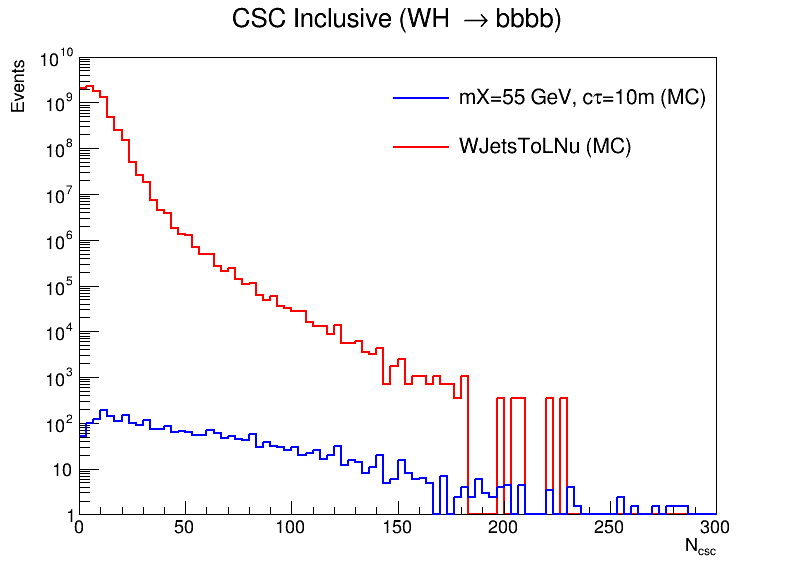

In [424]:
# Creates a 1D histogram for the number of CSC hits for the m55ct10m signal MC and WJetsToLNu MC

c = rt.TCanvas('c','c', 800, 600)
h = {}

h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)
h['nCsc_wjets'].SetLineStyle(1)


c.SetLogy()

h['m55ct10m_wh_bbbb'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)

h['nCsc_wjets'].GetXaxis().SetRangeUser(0,300)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
h['m55ct10m_wh_bbbb'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.AddEntry( h['m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets'], "WJetsToLNu (MC)" , "L");

legend.Draw();

c.Draw()

# ncsc_inclusive_mc_wh = rt.TFile('ncsc_inclusive_mc_wh.root', "RECREATE");
# h.Write("m55ct10m_wh_bbbb");
# h['nCsc_wjets'].Write("bkg_ncsc_inclusive");
# tree.SetBranchStatus("*",1);
# newTTree = rt.TTree;
# NEvents.Write("NEvents")
# newTree.Write();


# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## Strategy I: Simple Hit Removal based on CSC Station

### Algorithm

In [425]:
# Hit Removal
# For both the endcap and barrel regions (overlap to be determined), the closest stations to the beamspot are the noisiest.
# Thus, we remove the hits that land in these stations for each event in each datafile.

# Endcap
nCsc_station = {}
nCsc_removal = {}
cscEta_removal = {}
cscPhi_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Endcap
    nCsc_station[files] = {}
    nCsc_station[files]['ME_11'] = []
    nCsc_station[files]['ME_12'] = []
    nCsc_station[files]['ME_13'] = []
    
    cscEta_removal[files] = {}
    cscEta_removal[files]['ME_11'] = []
    cscEta_removal[files]['ME_12'] = []
    cscEta_removal[files]['ME_13'] = []
    
    cscPhi_removal[files] = {}
    cscPhi_removal[files]['ME_11'] = []
    cscPhi_removal[files]['ME_12'] = []
    cscPhi_removal[files]['ME_13'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(csc_z[files])):
        csc_r = np.sqrt(csc_x[files][pos_bool]**2+csc_y[files][pos_bool]**2)
        z_pos_bool = csc_z[files][pos_bool]
        
        eta_11 = np.copy(csc_eta[files][pos_bool])
        phi_11 = np.copy(csc_phi[files][pos_bool])
        
        eta_12 = np.copy(csc_eta[files][pos_bool])
        phi_12 = np.copy(csc_phi[files][pos_bool])
        
        eta_13 = np.copy(csc_eta[files][pos_bool])
        phi_13 = np.copy(csc_phi[files][pos_bool])
        
        counter_me11 = 0
        counter_me12 = 0
        counter_me13 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
#             phi_event_11 = phi_pos_bool
#             eta_event_11 = eta_pos_bool
            
#             phi_event_12 = np.copy(phi_pos_bool)
#             eta_event_12 = eta_pos_bool
            
#             phi_event_13 = phi_pos_bool
#             eta_event_13 = eta_pos_bool
            
            z_bool = np.absolute(z_pos_bool[z_ind])
            # ME 1/1 Constraints
            if z_bool > 568 and z_bool < 632:
                counter_me11 += 1
                phi_11[z_ind] = 0
                eta_11[z_ind] = 0
                
            if z_bool > 663 and z_bool < 724:
                # ME 1/2 Constraints
                if csc_r[z_ind] < 465 and csc_r[z_ind] > 275:
                    counter_me12 += 1
                    phi_12[z_ind] = 0
                    eta_12[z_ind] = 0

                # ME 1/3 Constraints
                if csc_r[z_ind] < 695.5 and csc_r[z_ind] > 505.5:
                    counter_me13 += 1
                    phi_13[z_ind] = 0
                    eta_13[z_ind] = 0

        
        
#         print(len(csc_phi['m55ct10m_wh_bbbb'][0][np.logical_and(phi_11 != 0, phi_12 != 0)]))
#         print(len(csc_phi['m55ct10m_wh_bbbb'][0][phi_12 != 0]))
        
#         print(phi_11)
    
    
        nCsc_station[files]['ME_11'].append(counter_me11)
        nCsc_station[files]['ME_12'].append(counter_me12)
        nCsc_station[files]['ME_13'].append(counter_me13)
        
        cscPhi_removal[files]['ME_11'].append(csc_phi[files][pos_bool][phi_11 != 0])
        cscPhi_removal[files]['ME_12'].append(csc_phi[files][pos_bool][np.logical_and(phi_11 != 0, phi_12 != 0)])
#         cscPhi_removal[files]['ME_13'].append(phi_event_13)
        
        cscEta_removal[files]['ME_11'].append(csc_eta[files][pos_bool][eta_11 != 0])
        cscEta_removal[files]['ME_12'].append(csc_eta[files][pos_bool][np.logical_and(eta_11 != 0, eta_12 != 0)])
#         cscEta_removal[files]['ME_13'].append(eta_event_13)
        
        if (pos_bool % 1000) == 0:
            print(str(pos_bool) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            
    
    # nCsc dictionaries containing hits removed labelled by removed stations
    nCsc_removal[files] = {}
    nCsc_removal[files]['ME_11'] = np.array(nCsc[files]) - np.array(nCsc_station[files]['ME_11'])
    nCsc_removal[files]['ME_112'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']))
    nCsc_removal[files]['ME_1123'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']) + np.array(nCsc_station[files]['ME_13']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-23 15:00:41.016305-07:00
1000: 2019-08-23 15:00:41.906114-07:00
m55ct10m_wh_bbbb_minus: 2019-08-23 15:00:42.016600-07:00
0: 2019-08-23 15:00:42.017135-07:00
1000: 2019-08-23 15:00:42.927218-07:00
m55ct10m_wh_bbbb_plus: 2019-08-23 15:00:42.932176-07:00
0: 2019-08-23 15:00:42.932565-07:00
1000: 2019-08-23 15:00:43.184611-07:00
2000: 2019-08-23 15:00:43.432206-07:00
3000: 2019-08-23 15:00:43.683238-07:00
4000: 2019-08-23 15:00:43.934434-07:00
5000: 2019-08-23 15:00:44.181747-07:00
6000: 2019-08-23 15:00:44.431228-07:00
7000: 2019-08-23 15:00:44.683970-07:00
8000: 2019-08-23 15:00:44.935971-07:00
9000: 2019-08-23 15:00:45.185413-07:00
10000: 2019-08-23 15:00:45.436860-07:00
11000: 2019-08-23 15:00:45.685377-07:00
12000: 2019-08-23 15:00:45.983819-07:00
13000: 2019-08-23 15:00:46.249178-07:00
14000: 2019-08-23 15:00:46.498075-07:00
15000: 2019-08-23 15:00:46.746621-07:00
16000: 2019-08-23 15:00:46.999407-07:00
17000: 2019-08-23 15:00:47.249140-07:00
18000: 2019-08-23 15:00:47.501

198000: 2019-08-23 15:01:32.346924-07:00
199000: 2019-08-23 15:01:32.596154-07:00
200000: 2019-08-23 15:01:32.841438-07:00
201000: 2019-08-23 15:01:33.097565-07:00
202000: 2019-08-23 15:01:33.352502-07:00
203000: 2019-08-23 15:01:33.599468-07:00
204000: 2019-08-23 15:01:33.849224-07:00
205000: 2019-08-23 15:01:34.103950-07:00
206000: 2019-08-23 15:01:34.353075-07:00
207000: 2019-08-23 15:01:34.600667-07:00
208000: 2019-08-23 15:01:34.847978-07:00
209000: 2019-08-23 15:01:35.099365-07:00
210000: 2019-08-23 15:01:35.351679-07:00
211000: 2019-08-23 15:01:35.603544-07:00
212000: 2019-08-23 15:01:35.850067-07:00
213000: 2019-08-23 15:01:36.093766-07:00
214000: 2019-08-23 15:01:36.345607-07:00
215000: 2019-08-23 15:01:36.593965-07:00
216000: 2019-08-23 15:01:36.842545-07:00
217000: 2019-08-23 15:01:37.090930-07:00
218000: 2019-08-23 15:01:37.346509-07:00
219000: 2019-08-23 15:01:37.595420-07:00
220000: 2019-08-23 15:01:37.841315-07:00
221000: 2019-08-23 15:01:38.087866-07:00
222000: 2019-08-

399000: 2019-08-23 15:02:22.322217-07:00
400000: 2019-08-23 15:02:22.568000-07:00
401000: 2019-08-23 15:02:22.816257-07:00
402000: 2019-08-23 15:02:23.065572-07:00
403000: 2019-08-23 15:02:23.311057-07:00
404000: 2019-08-23 15:02:23.555914-07:00
405000: 2019-08-23 15:02:23.802011-07:00
406000: 2019-08-23 15:02:24.052873-07:00
407000: 2019-08-23 15:02:24.300614-07:00
408000: 2019-08-23 15:02:24.551123-07:00
409000: 2019-08-23 15:02:24.799763-07:00
410000: 2019-08-23 15:02:25.043236-07:00
411000: 2019-08-23 15:02:25.292659-07:00
412000: 2019-08-23 15:02:25.538478-07:00
413000: 2019-08-23 15:02:25.781127-07:00
414000: 2019-08-23 15:02:26.025202-07:00
415000: 2019-08-23 15:02:26.273503-07:00
416000: 2019-08-23 15:02:26.517379-07:00
417000: 2019-08-23 15:02:26.765747-07:00
418000: 2019-08-23 15:02:27.013865-07:00
419000: 2019-08-23 15:02:27.259840-07:00
420000: 2019-08-23 15:02:27.508395-07:00
421000: 2019-08-23 15:02:27.755241-07:00
422000: 2019-08-23 15:02:28.005791-07:00
423000: 2019-08-

600000: 2019-08-23 15:03:12.257442-07:00
601000: 2019-08-23 15:03:12.510016-07:00
602000: 2019-08-23 15:03:12.755998-07:00
603000: 2019-08-23 15:03:13.005911-07:00
604000: 2019-08-23 15:03:13.274420-07:00
605000: 2019-08-23 15:03:13.528671-07:00
606000: 2019-08-23 15:03:13.779617-07:00
607000: 2019-08-23 15:03:14.023494-07:00
608000: 2019-08-23 15:03:14.275217-07:00
609000: 2019-08-23 15:03:14.526568-07:00
610000: 2019-08-23 15:03:14.777537-07:00
611000: 2019-08-23 15:03:15.028721-07:00
612000: 2019-08-23 15:03:15.276291-07:00
613000: 2019-08-23 15:03:15.529852-07:00
614000: 2019-08-23 15:03:15.792506-07:00
615000: 2019-08-23 15:03:16.038759-07:00
616000: 2019-08-23 15:03:16.286403-07:00
617000: 2019-08-23 15:03:16.536962-07:00
618000: 2019-08-23 15:03:16.786186-07:00
619000: 2019-08-23 15:03:17.031727-07:00
620000: 2019-08-23 15:03:17.294922-07:00
621000: 2019-08-23 15:03:17.557322-07:00
622000: 2019-08-23 15:03:17.819493-07:00
623000: 2019-08-23 15:03:18.084329-07:00
624000: 2019-08-

800000: 2019-08-23 15:04:02.693676-07:00
801000: 2019-08-23 15:04:02.942270-07:00
802000: 2019-08-23 15:04:03.191440-07:00
803000: 2019-08-23 15:04:03.432659-07:00
804000: 2019-08-23 15:04:03.676988-07:00
805000: 2019-08-23 15:04:03.927073-07:00
806000: 2019-08-23 15:04:04.172407-07:00
807000: 2019-08-23 15:04:04.418255-07:00
808000: 2019-08-23 15:04:04.667953-07:00
809000: 2019-08-23 15:04:04.918990-07:00
810000: 2019-08-23 15:04:05.166312-07:00
811000: 2019-08-23 15:04:05.419430-07:00
812000: 2019-08-23 15:04:05.667444-07:00
813000: 2019-08-23 15:04:05.917702-07:00
814000: 2019-08-23 15:04:06.170504-07:00
815000: 2019-08-23 15:04:06.417615-07:00
816000: 2019-08-23 15:04:06.665561-07:00
817000: 2019-08-23 15:04:06.916448-07:00
818000: 2019-08-23 15:04:07.167293-07:00
819000: 2019-08-23 15:04:07.420902-07:00
820000: 2019-08-23 15:04:07.679576-07:00
821000: 2019-08-23 15:04:07.930672-07:00
822000: 2019-08-23 15:04:08.185883-07:00
823000: 2019-08-23 15:04:08.440293-07:00
824000: 2019-08-

1001000: 2019-08-23 15:04:53.318423-07:00
1002000: 2019-08-23 15:04:53.558870-07:00
1003000: 2019-08-23 15:04:53.801853-07:00
1004000: 2019-08-23 15:04:54.050911-07:00
1005000: 2019-08-23 15:04:54.300634-07:00
1006000: 2019-08-23 15:04:54.546925-07:00
1007000: 2019-08-23 15:04:54.796592-07:00
1008000: 2019-08-23 15:04:55.041856-07:00
1009000: 2019-08-23 15:04:55.289841-07:00
1010000: 2019-08-23 15:04:55.540132-07:00
1011000: 2019-08-23 15:04:55.787270-07:00
1012000: 2019-08-23 15:04:56.061704-07:00
1013000: 2019-08-23 15:04:56.307636-07:00
1014000: 2019-08-23 15:04:56.557690-07:00
1015000: 2019-08-23 15:04:56.802853-07:00
1016000: 2019-08-23 15:04:57.071306-07:00
1017000: 2019-08-23 15:04:57.320634-07:00
1018000: 2019-08-23 15:04:57.572021-07:00
1019000: 2019-08-23 15:04:57.818093-07:00
1020000: 2019-08-23 15:04:58.067014-07:00
1021000: 2019-08-23 15:04:58.317728-07:00
1022000: 2019-08-23 15:04:58.582687-07:00
1023000: 2019-08-23 15:04:58.833576-07:00
1024000: 2019-08-23 15:04:59.08282

1199000: 2019-08-23 15:05:43.330487-07:00
1200000: 2019-08-23 15:05:43.580928-07:00
1201000: 2019-08-23 15:05:43.835166-07:00
1202000: 2019-08-23 15:05:44.089373-07:00
1203000: 2019-08-23 15:05:44.339918-07:00
1204000: 2019-08-23 15:05:44.586867-07:00
1205000: 2019-08-23 15:05:44.835615-07:00
1206000: 2019-08-23 15:05:45.086793-07:00
1207000: 2019-08-23 15:05:45.334981-07:00
1208000: 2019-08-23 15:05:45.581204-07:00
1209000: 2019-08-23 15:05:45.830633-07:00
1210000: 2019-08-23 15:05:46.081682-07:00
1211000: 2019-08-23 15:05:46.328953-07:00
1212000: 2019-08-23 15:05:46.576770-07:00
1213000: 2019-08-23 15:05:46.829436-07:00
1214000: 2019-08-23 15:05:47.081391-07:00
1215000: 2019-08-23 15:05:47.328153-07:00
1216000: 2019-08-23 15:05:47.575650-07:00
1217000: 2019-08-23 15:05:47.830782-07:00
1218000: 2019-08-23 15:05:48.081192-07:00
1219000: 2019-08-23 15:05:48.329389-07:00
1220000: 2019-08-23 15:05:48.596966-07:00
1221000: 2019-08-23 15:05:48.844921-07:00
1222000: 2019-08-23 15:05:49.09718

1397000: 2019-08-23 15:06:34.585834-07:00
1398000: 2019-08-23 15:06:34.843357-07:00
1399000: 2019-08-23 15:06:35.101104-07:00
1400000: 2019-08-23 15:06:35.352821-07:00
1401000: 2019-08-23 15:06:35.604096-07:00
1402000: 2019-08-23 15:06:35.848433-07:00
1403000: 2019-08-23 15:06:36.099698-07:00
1404000: 2019-08-23 15:06:36.346814-07:00
1405000: 2019-08-23 15:06:36.599295-07:00
1406000: 2019-08-23 15:06:36.850719-07:00
1407000: 2019-08-23 15:06:37.100027-07:00
1408000: 2019-08-23 15:06:37.352449-07:00
1409000: 2019-08-23 15:06:37.602421-07:00
1410000: 2019-08-23 15:06:37.851737-07:00
1411000: 2019-08-23 15:06:38.101848-07:00
1412000: 2019-08-23 15:06:38.357441-07:00
1413000: 2019-08-23 15:06:38.616880-07:00
1414000: 2019-08-23 15:06:38.865447-07:00
1415000: 2019-08-23 15:06:39.120323-07:00
1416000: 2019-08-23 15:06:39.387265-07:00
1417000: 2019-08-23 15:06:39.651010-07:00
1418000: 2019-08-23 15:06:39.902827-07:00
1419000: 2019-08-23 15:06:40.155260-07:00
1420000: 2019-08-23 15:06:40.40370

1596000: 2019-08-23 15:07:24.757966-07:00
1597000: 2019-08-23 15:07:25.020020-07:00
1598000: 2019-08-23 15:07:25.277120-07:00
1599000: 2019-08-23 15:07:25.530194-07:00
1600000: 2019-08-23 15:07:25.777876-07:00
1601000: 2019-08-23 15:07:26.024874-07:00
1602000: 2019-08-23 15:07:26.285593-07:00
1603000: 2019-08-23 15:07:26.529623-07:00
1604000: 2019-08-23 15:07:26.774093-07:00
1605000: 2019-08-23 15:07:27.021957-07:00
1606000: 2019-08-23 15:07:27.269794-07:00
1607000: 2019-08-23 15:07:27.523807-07:00
1608000: 2019-08-23 15:07:27.774009-07:00
1609000: 2019-08-23 15:07:28.017156-07:00
1610000: 2019-08-23 15:07:28.263644-07:00
1611000: 2019-08-23 15:07:28.518245-07:00
1612000: 2019-08-23 15:07:28.762938-07:00
1613000: 2019-08-23 15:07:29.013799-07:00
1614000: 2019-08-23 15:07:29.275694-07:00
1615000: 2019-08-23 15:07:29.523611-07:00
1616000: 2019-08-23 15:07:29.774522-07:00
1617000: 2019-08-23 15:07:30.030297-07:00
1618000: 2019-08-23 15:07:30.286564-07:00
1619000: 2019-08-23 15:07:30.53725

1794000: 2019-08-23 15:08:14.672677-07:00
1795000: 2019-08-23 15:08:14.924299-07:00
1796000: 2019-08-23 15:08:15.176849-07:00
1797000: 2019-08-23 15:08:15.429260-07:00
1798000: 2019-08-23 15:08:15.684257-07:00
1799000: 2019-08-23 15:08:15.934761-07:00
1800000: 2019-08-23 15:08:16.190116-07:00
1801000: 2019-08-23 15:08:16.442980-07:00
1802000: 2019-08-23 15:08:16.700305-07:00
1803000: 2019-08-23 15:08:16.947547-07:00
1804000: 2019-08-23 15:08:17.194339-07:00
1805000: 2019-08-23 15:08:17.453574-07:00
1806000: 2019-08-23 15:08:17.703531-07:00
1807000: 2019-08-23 15:08:17.953107-07:00
1808000: 2019-08-23 15:08:18.208975-07:00
1809000: 2019-08-23 15:08:18.461497-07:00
1810000: 2019-08-23 15:08:18.710975-07:00
1811000: 2019-08-23 15:08:18.968314-07:00
1812000: 2019-08-23 15:08:19.220268-07:00
1813000: 2019-08-23 15:08:19.473186-07:00
1814000: 2019-08-23 15:08:19.724751-07:00
1815000: 2019-08-23 15:08:19.972400-07:00
1816000: 2019-08-23 15:08:20.220743-07:00
1817000: 2019-08-23 15:08:20.47124

1990000: 2019-08-23 15:09:04.205482-07:00
1991000: 2019-08-23 15:09:04.451849-07:00
1992000: 2019-08-23 15:09:04.702397-07:00
1993000: 2019-08-23 15:09:04.949231-07:00
1994000: 2019-08-23 15:09:05.196669-07:00
1995000: 2019-08-23 15:09:05.448164-07:00
1996000: 2019-08-23 15:09:05.706327-07:00
1997000: 2019-08-23 15:09:05.982702-07:00
1998000: 2019-08-23 15:09:06.252099-07:00
1999000: 2019-08-23 15:09:06.496824-07:00
2000000: 2019-08-23 15:09:06.742028-07:00
2001000: 2019-08-23 15:09:06.992815-07:00
2002000: 2019-08-23 15:09:07.247005-07:00
2003000: 2019-08-23 15:09:07.496730-07:00
2004000: 2019-08-23 15:09:07.746066-07:00
2005000: 2019-08-23 15:09:07.999447-07:00
2006000: 2019-08-23 15:09:08.251299-07:00
2007000: 2019-08-23 15:09:08.501410-07:00
2008000: 2019-08-23 15:09:08.754617-07:00
2009000: 2019-08-23 15:09:09.005455-07:00
2010000: 2019-08-23 15:09:09.255813-07:00
2011000: 2019-08-23 15:09:09.508229-07:00
2012000: 2019-08-23 15:09:09.756351-07:00
2013000: 2019-08-23 15:09:10.04388

2185000: 2019-08-23 15:09:53.832237-07:00
2186000: 2019-08-23 15:09:54.078915-07:00
2187000: 2019-08-23 15:09:54.330426-07:00
2188000: 2019-08-23 15:09:54.584316-07:00
2189000: 2019-08-23 15:09:54.832052-07:00
2190000: 2019-08-23 15:09:55.086365-07:00
2191000: 2019-08-23 15:09:55.339869-07:00
2192000: 2019-08-23 15:09:55.589916-07:00
2193000: 2019-08-23 15:09:55.844666-07:00
2194000: 2019-08-23 15:09:56.092952-07:00
2195000: 2019-08-23 15:09:56.343982-07:00
2196000: 2019-08-23 15:09:56.593807-07:00
2197000: 2019-08-23 15:09:56.848692-07:00
2198000: 2019-08-23 15:09:57.120428-07:00
2199000: 2019-08-23 15:09:57.374098-07:00
2200000: 2019-08-23 15:09:57.623521-07:00
2201000: 2019-08-23 15:09:57.869868-07:00
2202000: 2019-08-23 15:09:58.120265-07:00
2203000: 2019-08-23 15:09:58.368343-07:00
2204000: 2019-08-23 15:09:58.624249-07:00
2205000: 2019-08-23 15:09:58.890333-07:00
2206000: 2019-08-23 15:09:59.140489-07:00
2207000: 2019-08-23 15:09:59.386997-07:00
2208000: 2019-08-23 15:09:59.63676

2383000: 2019-08-23 15:10:43.604750-07:00
2384000: 2019-08-23 15:10:43.857922-07:00
2385000: 2019-08-23 15:10:44.104862-07:00
2386000: 2019-08-23 15:10:44.353333-07:00
2387000: 2019-08-23 15:10:44.603378-07:00
2388000: 2019-08-23 15:10:44.856073-07:00
2389000: 2019-08-23 15:10:45.100835-07:00
2390000: 2019-08-23 15:10:45.352334-07:00
2391000: 2019-08-23 15:10:45.598213-07:00
2392000: 2019-08-23 15:10:45.844411-07:00
2393000: 2019-08-23 15:10:46.092410-07:00
2394000: 2019-08-23 15:10:46.345266-07:00
2395000: 2019-08-23 15:10:46.595469-07:00
2396000: 2019-08-23 15:10:46.847981-07:00
2397000: 2019-08-23 15:10:47.100011-07:00
2398000: 2019-08-23 15:10:47.348112-07:00
2399000: 2019-08-23 15:10:47.630314-07:00
2400000: 2019-08-23 15:10:47.878523-07:00
2401000: 2019-08-23 15:10:48.127035-07:00
2402000: 2019-08-23 15:10:48.383045-07:00
2403000: 2019-08-23 15:10:48.633567-07:00
2404000: 2019-08-23 15:10:48.883501-07:00
2405000: 2019-08-23 15:10:49.140744-07:00
2406000: 2019-08-23 15:10:49.39127

2583000: 2019-08-23 15:11:33.917121-07:00
2584000: 2019-08-23 15:11:34.164514-07:00
2585000: 2019-08-23 15:11:34.415567-07:00
2586000: 2019-08-23 15:11:34.665780-07:00
2587000: 2019-08-23 15:11:34.913698-07:00
2588000: 2019-08-23 15:11:35.164468-07:00
2589000: 2019-08-23 15:11:35.410698-07:00
2590000: 2019-08-23 15:11:35.659281-07:00
2591000: 2019-08-23 15:11:35.908366-07:00
2592000: 2019-08-23 15:11:36.157874-07:00
2593000: 2019-08-23 15:11:36.407987-07:00
2594000: 2019-08-23 15:11:36.653463-07:00
2595000: 2019-08-23 15:11:36.899893-07:00
2596000: 2019-08-23 15:11:37.155397-07:00
2597000: 2019-08-23 15:11:37.402943-07:00
2598000: 2019-08-23 15:11:37.649580-07:00
2599000: 2019-08-23 15:11:37.898339-07:00
2600000: 2019-08-23 15:11:38.167174-07:00
2601000: 2019-08-23 15:11:38.417370-07:00
2602000: 2019-08-23 15:11:38.665515-07:00
2603000: 2019-08-23 15:11:38.917361-07:00
2604000: 2019-08-23 15:11:39.164671-07:00
2605000: 2019-08-23 15:11:39.414708-07:00
2606000: 2019-08-23 15:11:39.66105

2780000: 2019-08-23 15:12:23.368011-07:00
2781000: 2019-08-23 15:12:23.616574-07:00
2782000: 2019-08-23 15:12:23.865187-07:00
2783000: 2019-08-23 15:12:24.108603-07:00
2784000: 2019-08-23 15:12:24.355025-07:00
2785000: 2019-08-23 15:12:24.605223-07:00
2786000: 2019-08-23 15:12:24.850793-07:00
2787000: 2019-08-23 15:12:25.102025-07:00
2788000: 2019-08-23 15:12:25.353725-07:00
2789000: 2019-08-23 15:12:25.604718-07:00
2790000: 2019-08-23 15:12:25.873199-07:00
2791000: 2019-08-23 15:12:26.124721-07:00
2792000: 2019-08-23 15:12:26.376119-07:00
2793000: 2019-08-23 15:12:26.625849-07:00
2794000: 2019-08-23 15:12:26.878267-07:00
2795000: 2019-08-23 15:12:27.124184-07:00
2796000: 2019-08-23 15:12:27.375928-07:00
2797000: 2019-08-23 15:12:27.625063-07:00
2798000: 2019-08-23 15:12:27.875604-07:00
2799000: 2019-08-23 15:12:28.134733-07:00
2800000: 2019-08-23 15:12:28.422318-07:00
2801000: 2019-08-23 15:12:28.672660-07:00
2802000: 2019-08-23 15:12:28.918912-07:00
2803000: 2019-08-23 15:12:29.16706

2977000: 2019-08-23 15:13:12.554179-07:00
2978000: 2019-08-23 15:13:12.801354-07:00
2979000: 2019-08-23 15:13:13.095713-07:00
2980000: 2019-08-23 15:13:13.369205-07:00
2981000: 2019-08-23 15:13:13.631954-07:00
2982000: 2019-08-23 15:13:13.885535-07:00
2983000: 2019-08-23 15:13:14.137564-07:00
2984000: 2019-08-23 15:13:14.387757-07:00
2985000: 2019-08-23 15:13:14.636882-07:00
2986000: 2019-08-23 15:13:14.883659-07:00
2987000: 2019-08-23 15:13:15.132022-07:00
2988000: 2019-08-23 15:13:15.378021-07:00
2989000: 2019-08-23 15:13:15.626325-07:00
2990000: 2019-08-23 15:13:15.875414-07:00
2991000: 2019-08-23 15:13:16.127359-07:00
2992000: 2019-08-23 15:13:16.376279-07:00
2993000: 2019-08-23 15:13:16.626878-07:00
2994000: 2019-08-23 15:13:16.870886-07:00
2995000: 2019-08-23 15:13:17.115961-07:00
2996000: 2019-08-23 15:13:17.367418-07:00
2997000: 2019-08-23 15:13:17.614349-07:00
2998000: 2019-08-23 15:13:17.862173-07:00
2999000: 2019-08-23 15:13:18.109002-07:00
3000000: 2019-08-23 15:13:18.35625

3177000: 2019-08-23 15:14:02.576483-07:00
3178000: 2019-08-23 15:14:02.821122-07:00
3179000: 2019-08-23 15:14:03.067187-07:00
3180000: 2019-08-23 15:14:03.322652-07:00
3181000: 2019-08-23 15:14:03.568680-07:00
3182000: 2019-08-23 15:14:03.818854-07:00
3183000: 2019-08-23 15:14:04.073761-07:00
3184000: 2019-08-23 15:14:04.318417-07:00
3185000: 2019-08-23 15:14:04.572580-07:00
3186000: 2019-08-23 15:14:04.818491-07:00
3187000: 2019-08-23 15:14:05.065474-07:00
3188000: 2019-08-23 15:14:05.317818-07:00
3189000: 2019-08-23 15:14:05.564773-07:00
3190000: 2019-08-23 15:14:05.812731-07:00
3191000: 2019-08-23 15:14:06.061250-07:00
3192000: 2019-08-23 15:14:06.307579-07:00
3193000: 2019-08-23 15:14:06.555958-07:00
3194000: 2019-08-23 15:14:06.803448-07:00
3195000: 2019-08-23 15:14:07.050684-07:00
3196000: 2019-08-23 15:14:07.295397-07:00
3197000: 2019-08-23 15:14:07.537600-07:00
3198000: 2019-08-23 15:14:07.785268-07:00
3199000: 2019-08-23 15:14:08.032854-07:00
3200000: 2019-08-23 15:14:08.28456

3375000: 2019-08-23 15:14:52.115556-07:00
3376000: 2019-08-23 15:14:52.364043-07:00
3377000: 2019-08-23 15:14:52.611064-07:00
3378000: 2019-08-23 15:14:52.864988-07:00
3379000: 2019-08-23 15:14:53.112031-07:00
3380000: 2019-08-23 15:14:53.357194-07:00
3381000: 2019-08-23 15:14:53.604637-07:00
3382000: 2019-08-23 15:14:53.853944-07:00
3383000: 2019-08-23 15:14:54.102556-07:00
3384000: 2019-08-23 15:14:54.358997-07:00
3385000: 2019-08-23 15:14:54.604974-07:00
3386000: 2019-08-23 15:14:54.853798-07:00
3387000: 2019-08-23 15:14:55.103582-07:00
3388000: 2019-08-23 15:14:55.354608-07:00
3389000: 2019-08-23 15:14:55.601193-07:00
3390000: 2019-08-23 15:14:55.850828-07:00
3391000: 2019-08-23 15:14:56.099471-07:00
3392000: 2019-08-23 15:14:56.347397-07:00
3393000: 2019-08-23 15:14:56.591751-07:00
3394000: 2019-08-23 15:14:56.839750-07:00
3395000: 2019-08-23 15:14:57.087302-07:00
3396000: 2019-08-23 15:14:57.333472-07:00
3397000: 2019-08-23 15:14:57.579282-07:00
3398000: 2019-08-23 15:14:57.82738

3571000: 2019-08-23 15:15:40.953592-07:00
3572000: 2019-08-23 15:15:41.204453-07:00
3573000: 2019-08-23 15:15:41.451098-07:00
3574000: 2019-08-23 15:15:41.697395-07:00
3575000: 2019-08-23 15:15:41.941920-07:00
3576000: 2019-08-23 15:15:42.197688-07:00
3577000: 2019-08-23 15:15:42.449738-07:00
3578000: 2019-08-23 15:15:42.700062-07:00
3579000: 2019-08-23 15:15:42.948803-07:00
3580000: 2019-08-23 15:15:43.198008-07:00
3581000: 2019-08-23 15:15:43.449319-07:00
3582000: 2019-08-23 15:15:43.698978-07:00
3583000: 2019-08-23 15:15:43.947980-07:00
3584000: 2019-08-23 15:15:44.197207-07:00
3585000: 2019-08-23 15:15:44.444640-07:00
3586000: 2019-08-23 15:15:44.694338-07:00
3587000: 2019-08-23 15:15:44.943462-07:00
3588000: 2019-08-23 15:15:45.185370-07:00
3589000: 2019-08-23 15:15:45.433367-07:00
3590000: 2019-08-23 15:15:45.680636-07:00
3591000: 2019-08-23 15:15:45.926258-07:00
3592000: 2019-08-23 15:15:46.172982-07:00
3593000: 2019-08-23 15:15:46.421437-07:00
3594000: 2019-08-23 15:15:46.66884

3767000: 2019-08-23 15:16:29.887294-07:00
3768000: 2019-08-23 15:16:30.138977-07:00
3769000: 2019-08-23 15:16:30.387648-07:00
3770000: 2019-08-23 15:16:30.635447-07:00
3771000: 2019-08-23 15:16:30.880429-07:00
3772000: 2019-08-23 15:16:31.132029-07:00
3773000: 2019-08-23 15:16:31.378301-07:00
3774000: 2019-08-23 15:16:31.627523-07:00
3775000: 2019-08-23 15:16:31.873979-07:00
3776000: 2019-08-23 15:16:32.122677-07:00
3777000: 2019-08-23 15:16:32.367160-07:00
3778000: 2019-08-23 15:16:32.612770-07:00
3779000: 2019-08-23 15:16:32.858787-07:00
3780000: 2019-08-23 15:16:33.102322-07:00
3781000: 2019-08-23 15:16:33.350859-07:00
3782000: 2019-08-23 15:16:33.599119-07:00
3783000: 2019-08-23 15:16:33.848537-07:00
3784000: 2019-08-23 15:16:34.100392-07:00
3785000: 2019-08-23 15:16:34.349396-07:00
3786000: 2019-08-23 15:16:34.596947-07:00
3787000: 2019-08-23 15:16:34.845772-07:00
3788000: 2019-08-23 15:16:35.089024-07:00
3789000: 2019-08-23 15:16:35.334535-07:00
3790000: 2019-08-23 15:16:35.58426

3966000: 2019-08-23 15:17:19.661136-07:00
3967000: 2019-08-23 15:17:19.907331-07:00
3968000: 2019-08-23 15:17:20.154404-07:00
3969000: 2019-08-23 15:17:20.400226-07:00
3970000: 2019-08-23 15:17:20.644996-07:00
3971000: 2019-08-23 15:17:20.887221-07:00
3972000: 2019-08-23 15:17:21.152263-07:00
3973000: 2019-08-23 15:17:21.400418-07:00
3974000: 2019-08-23 15:17:21.644018-07:00
3975000: 2019-08-23 15:17:21.887948-07:00
3976000: 2019-08-23 15:17:22.131781-07:00
3977000: 2019-08-23 15:17:22.378907-07:00
3978000: 2019-08-23 15:17:22.629835-07:00
3979000: 2019-08-23 15:17:22.875324-07:00
3980000: 2019-08-23 15:17:23.122863-07:00
3981000: 2019-08-23 15:17:23.371594-07:00
3982000: 2019-08-23 15:17:23.629683-07:00
3983000: 2019-08-23 15:17:23.875712-07:00
3984000: 2019-08-23 15:17:24.125468-07:00
3985000: 2019-08-23 15:17:24.371463-07:00
3986000: 2019-08-23 15:17:24.622972-07:00
3987000: 2019-08-23 15:17:24.872194-07:00
3988000: 2019-08-23 15:17:25.122294-07:00
3989000: 2019-08-23 15:17:25.36720

4163000: 2019-08-23 15:18:08.753705-07:00
4164000: 2019-08-23 15:18:09.003933-07:00
4165000: 2019-08-23 15:18:09.254703-07:00
4166000: 2019-08-23 15:18:09.508179-07:00
4167000: 2019-08-23 15:18:09.755277-07:00
4168000: 2019-08-23 15:18:10.007715-07:00
4169000: 2019-08-23 15:18:10.254522-07:00
4170000: 2019-08-23 15:18:10.503155-07:00
4171000: 2019-08-23 15:18:10.751355-07:00
4172000: 2019-08-23 15:18:11.000095-07:00
4173000: 2019-08-23 15:18:11.255391-07:00
4174000: 2019-08-23 15:18:11.504747-07:00
4175000: 2019-08-23 15:18:11.754727-07:00
4176000: 2019-08-23 15:18:11.999268-07:00
4177000: 2019-08-23 15:18:12.247800-07:00
4178000: 2019-08-23 15:18:12.495198-07:00
4179000: 2019-08-23 15:18:12.741455-07:00
4180000: 2019-08-23 15:18:12.989363-07:00
4181000: 2019-08-23 15:18:13.237228-07:00
4182000: 2019-08-23 15:18:13.484646-07:00
4183000: 2019-08-23 15:18:13.742741-07:00
4184000: 2019-08-23 15:18:14.031970-07:00
4185000: 2019-08-23 15:18:14.339783-07:00
4186000: 2019-08-23 15:18:14.59108

4360000: 2019-08-23 15:18:58.065952-07:00
4361000: 2019-08-23 15:18:58.319445-07:00
4362000: 2019-08-23 15:18:58.567766-07:00
4363000: 2019-08-23 15:18:58.819410-07:00
4364000: 2019-08-23 15:18:59.085695-07:00
4365000: 2019-08-23 15:18:59.328350-07:00
4366000: 2019-08-23 15:18:59.576521-07:00
4367000: 2019-08-23 15:18:59.821162-07:00
4368000: 2019-08-23 15:19:00.072326-07:00
4369000: 2019-08-23 15:19:00.321656-07:00
4370000: 2019-08-23 15:19:00.571403-07:00
4371000: 2019-08-23 15:19:00.831620-07:00
4372000: 2019-08-23 15:19:01.083889-07:00
4373000: 2019-08-23 15:19:01.334887-07:00
4374000: 2019-08-23 15:19:01.583877-07:00
4375000: 2019-08-23 15:19:01.829633-07:00
4376000: 2019-08-23 15:19:02.080728-07:00
4377000: 2019-08-23 15:19:02.333384-07:00
4378000: 2019-08-23 15:19:02.581253-07:00
4379000: 2019-08-23 15:19:02.838440-07:00
4380000: 2019-08-23 15:19:03.096343-07:00
4381000: 2019-08-23 15:19:03.346967-07:00
4382000: 2019-08-23 15:19:03.600346-07:00
4383000: 2019-08-23 15:19:03.85089

4556000: 2019-08-23 15:19:47.136176-07:00
4557000: 2019-08-23 15:19:47.390035-07:00
4558000: 2019-08-23 15:19:47.639777-07:00
4559000: 2019-08-23 15:19:47.892176-07:00
4560000: 2019-08-23 15:19:48.134629-07:00
4561000: 2019-08-23 15:19:48.383149-07:00
4562000: 2019-08-23 15:19:48.634256-07:00
4563000: 2019-08-23 15:19:48.883078-07:00
4564000: 2019-08-23 15:19:49.129317-07:00
4565000: 2019-08-23 15:19:49.371755-07:00
4566000: 2019-08-23 15:19:49.621310-07:00
4567000: 2019-08-23 15:19:49.869410-07:00
4568000: 2019-08-23 15:19:50.114347-07:00
4569000: 2019-08-23 15:19:50.360861-07:00
4570000: 2019-08-23 15:19:50.608234-07:00
4571000: 2019-08-23 15:19:50.855928-07:00
4572000: 2019-08-23 15:19:51.103548-07:00
4573000: 2019-08-23 15:19:51.348128-07:00
4574000: 2019-08-23 15:19:51.596059-07:00
4575000: 2019-08-23 15:19:51.841473-07:00
4576000: 2019-08-23 15:19:52.090815-07:00
4577000: 2019-08-23 15:19:52.336563-07:00
4578000: 2019-08-23 15:19:52.584054-07:00
4579000: 2019-08-23 15:19:52.82849

4754000: 2019-08-23 15:20:36.189606-07:00
4755000: 2019-08-23 15:20:36.433769-07:00
4756000: 2019-08-23 15:20:36.679220-07:00
4757000: 2019-08-23 15:20:36.925051-07:00
4758000: 2019-08-23 15:20:37.171564-07:00
4759000: 2019-08-23 15:20:37.418465-07:00
4760000: 2019-08-23 15:20:37.665495-07:00
4761000: 2019-08-23 15:20:37.910905-07:00
4762000: 2019-08-23 15:20:38.157438-07:00
4763000: 2019-08-23 15:20:38.402003-07:00
4764000: 2019-08-23 15:20:38.651363-07:00
4765000: 2019-08-23 15:20:38.899036-07:00
4766000: 2019-08-23 15:20:39.145016-07:00
4767000: 2019-08-23 15:20:39.390262-07:00
4768000: 2019-08-23 15:20:39.655526-07:00
4769000: 2019-08-23 15:20:39.917707-07:00
4770000: 2019-08-23 15:20:40.188281-07:00
4771000: 2019-08-23 15:20:40.452187-07:00
4772000: 2019-08-23 15:20:40.718991-07:00
4773000: 2019-08-23 15:20:40.985288-07:00
4774000: 2019-08-23 15:20:41.250509-07:00
4775000: 2019-08-23 15:20:41.507789-07:00
4776000: 2019-08-23 15:20:41.769389-07:00
4777000: 2019-08-23 15:20:42.03253

4953000: 2019-08-23 15:21:26.038007-07:00
4954000: 2019-08-23 15:21:26.299986-07:00
4955000: 2019-08-23 15:21:26.548440-07:00
4956000: 2019-08-23 15:21:26.789483-07:00
4957000: 2019-08-23 15:21:27.037111-07:00
4958000: 2019-08-23 15:21:27.284393-07:00
4959000: 2019-08-23 15:21:27.527518-07:00
4960000: 2019-08-23 15:21:27.772386-07:00
4961000: 2019-08-23 15:21:28.021531-07:00
4962000: 2019-08-23 15:21:28.267071-07:00
4963000: 2019-08-23 15:21:28.513427-07:00
4964000: 2019-08-23 15:21:28.757032-07:00
4965000: 2019-08-23 15:21:29.010872-07:00
4966000: 2019-08-23 15:21:29.260380-07:00
4967000: 2019-08-23 15:21:29.505689-07:00
4968000: 2019-08-23 15:21:29.760946-07:00
4969000: 2019-08-23 15:21:30.011731-07:00
4970000: 2019-08-23 15:21:30.261686-07:00
4971000: 2019-08-23 15:21:30.506104-07:00
4972000: 2019-08-23 15:21:30.749707-07:00
4973000: 2019-08-23 15:21:31.004491-07:00
4974000: 2019-08-23 15:21:31.251408-07:00
4975000: 2019-08-23 15:21:31.556810-07:00
4976000: 2019-08-23 15:21:31.80724

5151000: 2019-08-23 15:22:15.770220-07:00
5152000: 2019-08-23 15:22:16.021494-07:00
5153000: 2019-08-23 15:22:16.272270-07:00
5154000: 2019-08-23 15:22:16.517610-07:00
5155000: 2019-08-23 15:22:16.766657-07:00
5156000: 2019-08-23 15:22:17.017404-07:00
5157000: 2019-08-23 15:22:17.265863-07:00
5158000: 2019-08-23 15:22:17.520508-07:00
5159000: 2019-08-23 15:22:17.768462-07:00
5160000: 2019-08-23 15:22:18.016044-07:00
5161000: 2019-08-23 15:22:18.265451-07:00
5162000: 2019-08-23 15:22:18.518661-07:00
5163000: 2019-08-23 15:22:18.766191-07:00
5164000: 2019-08-23 15:22:19.017652-07:00
5165000: 2019-08-23 15:22:19.264605-07:00
5166000: 2019-08-23 15:22:19.514766-07:00
5167000: 2019-08-23 15:22:19.767410-07:00
5168000: 2019-08-23 15:22:20.017091-07:00
5169000: 2019-08-23 15:22:20.266032-07:00
5170000: 2019-08-23 15:22:20.514136-07:00
5171000: 2019-08-23 15:22:20.761054-07:00
5172000: 2019-08-23 15:22:21.008952-07:00
5173000: 2019-08-23 15:22:21.257941-07:00
5174000: 2019-08-23 15:22:21.50592

5348000: 2019-08-23 15:23:04.878977-07:00
5349000: 2019-08-23 15:23:05.130746-07:00
5350000: 2019-08-23 15:23:05.378283-07:00
5351000: 2019-08-23 15:23:05.630377-07:00
5352000: 2019-08-23 15:23:05.880892-07:00
5353000: 2019-08-23 15:23:06.133689-07:00
5354000: 2019-08-23 15:23:06.382777-07:00
5355000: 2019-08-23 15:23:06.629921-07:00
5356000: 2019-08-23 15:23:06.874337-07:00
5357000: 2019-08-23 15:23:07.121658-07:00
5358000: 2019-08-23 15:23:07.369582-07:00
5359000: 2019-08-23 15:23:07.617421-07:00
5360000: 2019-08-23 15:23:07.864981-07:00
5361000: 2019-08-23 15:23:08.118379-07:00
5362000: 2019-08-23 15:23:08.371059-07:00
5363000: 2019-08-23 15:23:08.619121-07:00
5364000: 2019-08-23 15:23:08.869597-07:00
5365000: 2019-08-23 15:23:09.122159-07:00
5366000: 2019-08-23 15:23:09.369419-07:00
5367000: 2019-08-23 15:23:09.616228-07:00
5368000: 2019-08-23 15:23:09.862243-07:00
5369000: 2019-08-23 15:23:10.111531-07:00
5370000: 2019-08-23 15:23:10.358901-07:00
5371000: 2019-08-23 15:23:10.64676

5545000: 2019-08-23 15:23:54.329083-07:00
5546000: 2019-08-23 15:23:54.577311-07:00
5547000: 2019-08-23 15:23:54.832228-07:00
5548000: 2019-08-23 15:23:55.087674-07:00
5549000: 2019-08-23 15:23:55.338496-07:00
5550000: 2019-08-23 15:23:55.584834-07:00
5551000: 2019-08-23 15:23:55.829803-07:00
5552000: 2019-08-23 15:23:56.076360-07:00
5553000: 2019-08-23 15:23:56.320761-07:00
5554000: 2019-08-23 15:23:56.563245-07:00
5555000: 2019-08-23 15:23:56.819985-07:00
5556000: 2019-08-23 15:23:57.071308-07:00
5557000: 2019-08-23 15:23:57.320266-07:00
5558000: 2019-08-23 15:23:57.576167-07:00
5559000: 2019-08-23 15:23:57.825611-07:00
5560000: 2019-08-23 15:23:58.074826-07:00
5561000: 2019-08-23 15:23:58.318940-07:00
5562000: 2019-08-23 15:23:58.579513-07:00
5563000: 2019-08-23 15:23:58.834199-07:00
5564000: 2019-08-23 15:23:59.080934-07:00
5565000: 2019-08-23 15:23:59.332681-07:00
5566000: 2019-08-23 15:23:59.576956-07:00
5567000: 2019-08-23 15:23:59.822085-07:00
5568000: 2019-08-23 15:24:00.06741

5747000: 2019-08-23 15:24:45.340665-07:00
5748000: 2019-08-23 15:24:45.585527-07:00
5749000: 2019-08-23 15:24:45.829412-07:00
5750000: 2019-08-23 15:24:46.080382-07:00
5751000: 2019-08-23 15:24:46.328395-07:00
5752000: 2019-08-23 15:24:46.578703-07:00
5753000: 2019-08-23 15:24:46.824937-07:00
5754000: 2019-08-23 15:24:47.070007-07:00
5755000: 2019-08-23 15:24:47.314655-07:00
5756000: 2019-08-23 15:24:47.559961-07:00
5757000: 2019-08-23 15:24:47.808538-07:00
5758000: 2019-08-23 15:24:48.053886-07:00
5759000: 2019-08-23 15:24:48.300616-07:00
5760000: 2019-08-23 15:24:48.548816-07:00
5761000: 2019-08-23 15:24:48.794876-07:00
5762000: 2019-08-23 15:24:49.044765-07:00
5763000: 2019-08-23 15:24:49.290737-07:00
5764000: 2019-08-23 15:24:49.538602-07:00
5765000: 2019-08-23 15:24:49.781491-07:00
5766000: 2019-08-23 15:24:50.026980-07:00
5767000: 2019-08-23 15:24:50.275144-07:00
5768000: 2019-08-23 15:24:50.523324-07:00
5769000: 2019-08-23 15:24:50.768278-07:00
5770000: 2019-08-23 15:24:51.01533

5945000: 2019-08-23 15:25:34.435681-07:00
5946000: 2019-08-23 15:25:34.681505-07:00
5947000: 2019-08-23 15:25:34.927014-07:00
5948000: 2019-08-23 15:25:35.171218-07:00
5949000: 2019-08-23 15:25:35.418769-07:00
5950000: 2019-08-23 15:25:35.668669-07:00
5951000: 2019-08-23 15:25:35.915143-07:00
5952000: 2019-08-23 15:25:36.165226-07:00
5953000: 2019-08-23 15:25:36.408079-07:00
5954000: 2019-08-23 15:25:36.654078-07:00
5955000: 2019-08-23 15:25:36.902208-07:00
5956000: 2019-08-23 15:25:37.149805-07:00
5957000: 2019-08-23 15:25:37.395984-07:00
5958000: 2019-08-23 15:25:37.638092-07:00
5959000: 2019-08-23 15:25:37.883462-07:00
5960000: 2019-08-23 15:25:38.139423-07:00
5961000: 2019-08-23 15:25:38.388318-07:00
5962000: 2019-08-23 15:25:38.638010-07:00
5963000: 2019-08-23 15:25:38.886428-07:00
5964000: 2019-08-23 15:25:39.134338-07:00
5965000: 2019-08-23 15:25:39.383824-07:00
5966000: 2019-08-23 15:25:39.626322-07:00
5967000: 2019-08-23 15:25:39.878583-07:00
5968000: 2019-08-23 15:25:40.12376

6142000: 2019-08-23 15:26:23.453703-07:00
6143000: 2019-08-23 15:26:23.697282-07:00
6144000: 2019-08-23 15:26:23.943845-07:00
6145000: 2019-08-23 15:26:24.198636-07:00
6146000: 2019-08-23 15:26:24.448633-07:00
6147000: 2019-08-23 15:26:24.701026-07:00
6148000: 2019-08-23 15:26:24.946085-07:00
6149000: 2019-08-23 15:26:25.195503-07:00
6150000: 2019-08-23 15:26:25.442690-07:00
6151000: 2019-08-23 15:26:25.695118-07:00
6152000: 2019-08-23 15:26:25.943188-07:00
6153000: 2019-08-23 15:26:26.192605-07:00
6154000: 2019-08-23 15:26:26.441163-07:00
6155000: 2019-08-23 15:26:26.689861-07:00
6156000: 2019-08-23 15:26:26.936744-07:00
6157000: 2019-08-23 15:26:27.184038-07:00
6158000: 2019-08-23 15:26:27.436922-07:00
6159000: 2019-08-23 15:26:27.682158-07:00
6160000: 2019-08-23 15:26:27.934665-07:00
6161000: 2019-08-23 15:26:28.181443-07:00
6162000: 2019-08-23 15:26:28.428766-07:00
6163000: 2019-08-23 15:26:28.678296-07:00
6164000: 2019-08-23 15:26:28.924310-07:00
6165000: 2019-08-23 15:26:29.17373

6342000: 2019-08-23 15:27:13.218979-07:00
6343000: 2019-08-23 15:27:13.463645-07:00
6344000: 2019-08-23 15:27:13.709827-07:00
6345000: 2019-08-23 15:27:13.968728-07:00
6346000: 2019-08-23 15:27:14.217416-07:00
6347000: 2019-08-23 15:27:14.464630-07:00
6348000: 2019-08-23 15:27:14.713630-07:00
6349000: 2019-08-23 15:27:14.962894-07:00
6350000: 2019-08-23 15:27:15.207736-07:00
6351000: 2019-08-23 15:27:15.454145-07:00
6352000: 2019-08-23 15:27:15.697547-07:00
6353000: 2019-08-23 15:27:15.945478-07:00
6354000: 2019-08-23 15:27:16.193006-07:00
6355000: 2019-08-23 15:27:16.441526-07:00
6356000: 2019-08-23 15:27:16.688357-07:00
6357000: 2019-08-23 15:27:16.931216-07:00
6358000: 2019-08-23 15:27:17.175609-07:00
6359000: 2019-08-23 15:27:17.421506-07:00
6360000: 2019-08-23 15:27:17.668038-07:00
6361000: 2019-08-23 15:27:17.921668-07:00
6362000: 2019-08-23 15:27:18.172188-07:00
6363000: 2019-08-23 15:27:18.484370-07:00
6364000: 2019-08-23 15:27:18.730932-07:00
6365000: 2019-08-23 15:27:18.97631

6542000: 2019-08-23 15:28:02.767293-07:00
6543000: 2019-08-23 15:28:03.017501-07:00
6544000: 2019-08-23 15:28:03.266504-07:00
6545000: 2019-08-23 15:28:03.513915-07:00
6546000: 2019-08-23 15:28:03.764367-07:00
6547000: 2019-08-23 15:28:04.014307-07:00
6548000: 2019-08-23 15:28:04.265743-07:00
6549000: 2019-08-23 15:28:04.512485-07:00
6550000: 2019-08-23 15:28:04.757050-07:00
6551000: 2019-08-23 15:28:05.009306-07:00
6552000: 2019-08-23 15:28:05.255113-07:00
6553000: 2019-08-23 15:28:05.500888-07:00
6554000: 2019-08-23 15:28:05.747935-07:00
6555000: 2019-08-23 15:28:05.994583-07:00
6556000: 2019-08-23 15:28:06.240752-07:00
6557000: 2019-08-23 15:28:06.485964-07:00
6558000: 2019-08-23 15:28:06.730514-07:00
6559000: 2019-08-23 15:28:06.975496-07:00
6560000: 2019-08-23 15:28:07.222704-07:00
6561000: 2019-08-23 15:28:07.467894-07:00
6562000: 2019-08-23 15:28:07.718715-07:00
6563000: 2019-08-23 15:28:07.962528-07:00
6564000: 2019-08-23 15:28:08.205324-07:00
6565000: 2019-08-23 15:28:08.44807

6738000: 2019-08-23 15:28:51.504175-07:00
6739000: 2019-08-23 15:28:51.755183-07:00
6740000: 2019-08-23 15:28:52.005056-07:00
6741000: 2019-08-23 15:28:52.250330-07:00
6742000: 2019-08-23 15:28:52.502658-07:00
6743000: 2019-08-23 15:28:52.749575-07:00
6744000: 2019-08-23 15:28:52.993482-07:00
6745000: 2019-08-23 15:28:53.242708-07:00
6746000: 2019-08-23 15:28:53.488336-07:00
6747000: 2019-08-23 15:28:53.737888-07:00
6748000: 2019-08-23 15:28:53.992833-07:00
6749000: 2019-08-23 15:28:54.242194-07:00
6750000: 2019-08-23 15:28:54.489677-07:00
6751000: 2019-08-23 15:28:54.736337-07:00
6752000: 2019-08-23 15:28:54.986038-07:00
6753000: 2019-08-23 15:28:55.235561-07:00
6754000: 2019-08-23 15:28:55.482303-07:00
6755000: 2019-08-23 15:28:55.730142-07:00
6756000: 2019-08-23 15:28:55.982307-07:00
6757000: 2019-08-23 15:28:56.229475-07:00
6758000: 2019-08-23 15:28:56.480593-07:00
6759000: 2019-08-23 15:28:56.727549-07:00
6760000: 2019-08-23 15:28:56.976722-07:00
6761000: 2019-08-23 15:28:57.22412

6936000: 2019-08-23 15:29:41.035166-07:00
6937000: 2019-08-23 15:29:41.287026-07:00
6938000: 2019-08-23 15:29:41.533771-07:00
6939000: 2019-08-23 15:29:41.782191-07:00
6940000: 2019-08-23 15:29:42.030577-07:00
6941000: 2019-08-23 15:29:42.280495-07:00
6942000: 2019-08-23 15:29:42.527320-07:00
6943000: 2019-08-23 15:29:42.774525-07:00
6944000: 2019-08-23 15:29:43.024347-07:00
6945000: 2019-08-23 15:29:43.270974-07:00
6946000: 2019-08-23 15:29:43.515685-07:00
6947000: 2019-08-23 15:29:43.764142-07:00
6948000: 2019-08-23 15:29:44.011001-07:00
6949000: 2019-08-23 15:29:44.259755-07:00
6950000: 2019-08-23 15:29:44.505127-07:00
6951000: 2019-08-23 15:29:44.758789-07:00
6952000: 2019-08-23 15:29:45.009110-07:00
6953000: 2019-08-23 15:29:45.254197-07:00
6954000: 2019-08-23 15:29:45.502713-07:00
6955000: 2019-08-23 15:29:45.748033-07:00
6956000: 2019-08-23 15:29:45.998089-07:00
6957000: 2019-08-23 15:29:46.246025-07:00
6958000: 2019-08-23 15:29:46.491333-07:00
6959000: 2019-08-23 15:29:46.74177

7134000: 2019-08-23 15:30:30.045028-07:00
7135000: 2019-08-23 15:30:30.294658-07:00
7136000: 2019-08-23 15:30:30.540570-07:00
7137000: 2019-08-23 15:30:30.786267-07:00
7138000: 2019-08-23 15:30:31.031367-07:00
7139000: 2019-08-23 15:30:31.276986-07:00
7140000: 2019-08-23 15:30:31.521745-07:00
7141000: 2019-08-23 15:30:31.769123-07:00
7142000: 2019-08-23 15:30:32.014176-07:00
7143000: 2019-08-23 15:30:32.262697-07:00
7144000: 2019-08-23 15:30:32.508162-07:00
7145000: 2019-08-23 15:30:32.755762-07:00
7146000: 2019-08-23 15:30:33.003602-07:00
7147000: 2019-08-23 15:30:33.253770-07:00
7148000: 2019-08-23 15:30:33.503295-07:00
7149000: 2019-08-23 15:30:33.748780-07:00
7150000: 2019-08-23 15:30:33.994654-07:00
7151000: 2019-08-23 15:30:34.239061-07:00
7152000: 2019-08-23 15:30:34.487245-07:00
7153000: 2019-08-23 15:30:34.734432-07:00
7154000: 2019-08-23 15:30:34.979518-07:00
7155000: 2019-08-23 15:30:35.230416-07:00
7156000: 2019-08-23 15:30:35.477605-07:00
7157000: 2019-08-23 15:30:35.72682

7329000: 2019-08-23 15:31:18.802636-07:00
7330000: 2019-08-23 15:31:19.052537-07:00
7331000: 2019-08-23 15:31:19.301437-07:00
7332000: 2019-08-23 15:31:19.551547-07:00
7333000: 2019-08-23 15:31:19.800351-07:00
7334000: 2019-08-23 15:31:20.049507-07:00
7335000: 2019-08-23 15:31:20.297093-07:00
7336000: 2019-08-23 15:31:20.540070-07:00
7337000: 2019-08-23 15:31:20.791032-07:00
7338000: 2019-08-23 15:31:21.099151-07:00
7339000: 2019-08-23 15:31:21.347609-07:00
7340000: 2019-08-23 15:31:21.592892-07:00
7341000: 2019-08-23 15:31:21.841257-07:00
7342000: 2019-08-23 15:31:22.091547-07:00
7343000: 2019-08-23 15:31:22.340493-07:00
7344000: 2019-08-23 15:31:22.590509-07:00
7345000: 2019-08-23 15:31:22.841638-07:00
7346000: 2019-08-23 15:31:23.094436-07:00
7347000: 2019-08-23 15:31:23.343127-07:00
7348000: 2019-08-23 15:31:23.590807-07:00
7349000: 2019-08-23 15:31:23.835664-07:00
7350000: 2019-08-23 15:31:24.081099-07:00
7351000: 2019-08-23 15:31:24.328149-07:00
7352000: 2019-08-23 15:31:24.57250

7525000: 2019-08-23 15:32:07.467646-07:00
7526000: 2019-08-23 15:32:07.712598-07:00
7527000: 2019-08-23 15:32:07.959251-07:00
7528000: 2019-08-23 15:32:08.204973-07:00
7529000: 2019-08-23 15:32:08.450586-07:00
7530000: 2019-08-23 15:32:08.693113-07:00
7531000: 2019-08-23 15:32:08.934837-07:00
7532000: 2019-08-23 15:32:09.181324-07:00
7533000: 2019-08-23 15:32:09.430354-07:00
7534000: 2019-08-23 15:32:09.677270-07:00
7535000: 2019-08-23 15:32:09.923312-07:00
7536000: 2019-08-23 15:32:10.170391-07:00
7537000: 2019-08-23 15:32:10.413054-07:00
7538000: 2019-08-23 15:32:10.654687-07:00
7539000: 2019-08-23 15:32:10.902615-07:00
7540000: 2019-08-23 15:32:11.150044-07:00
7541000: 2019-08-23 15:32:11.397145-07:00
7542000: 2019-08-23 15:32:11.648287-07:00
7543000: 2019-08-23 15:32:11.893599-07:00
7544000: 2019-08-23 15:32:12.140819-07:00
7545000: 2019-08-23 15:32:12.386525-07:00
7546000: 2019-08-23 15:32:12.634165-07:00
7547000: 2019-08-23 15:32:12.881393-07:00
7548000: 2019-08-23 15:32:13.12680

7723000: 2019-08-23 15:32:56.640584-07:00
7724000: 2019-08-23 15:32:56.886158-07:00
7725000: 2019-08-23 15:32:57.129714-07:00
7726000: 2019-08-23 15:32:57.383272-07:00
7727000: 2019-08-23 15:32:57.629947-07:00
7728000: 2019-08-23 15:32:57.877665-07:00
7729000: 2019-08-23 15:32:58.234334-07:00
7730000: 2019-08-23 15:32:58.504026-07:00
7731000: 2019-08-23 15:32:58.753534-07:00
7732000: 2019-08-23 15:32:58.997974-07:00
7733000: 2019-08-23 15:32:59.246020-07:00
7734000: 2019-08-23 15:32:59.496073-07:00
7735000: 2019-08-23 15:32:59.741959-07:00
7736000: 2019-08-23 15:32:59.989496-07:00
7737000: 2019-08-23 15:33:00.237822-07:00
7738000: 2019-08-23 15:33:00.488055-07:00
7739000: 2019-08-23 15:33:00.734633-07:00
7740000: 2019-08-23 15:33:00.983282-07:00
7741000: 2019-08-23 15:33:01.229903-07:00
7742000: 2019-08-23 15:33:01.478810-07:00
7743000: 2019-08-23 15:33:01.727769-07:00
7744000: 2019-08-23 15:33:01.973797-07:00
7745000: 2019-08-23 15:33:02.219672-07:00
7746000: 2019-08-23 15:33:02.46682

7920000: 2019-08-23 15:33:45.686398-07:00
7921000: 2019-08-23 15:33:45.930562-07:00
7922000: 2019-08-23 15:33:46.174136-07:00
7923000: 2019-08-23 15:33:46.422631-07:00
7924000: 2019-08-23 15:33:46.671258-07:00
7925000: 2019-08-23 15:33:46.915865-07:00
7926000: 2019-08-23 15:33:47.165075-07:00
7927000: 2019-08-23 15:33:47.414559-07:00
7928000: 2019-08-23 15:33:47.670266-07:00
7929000: 2019-08-23 15:33:47.919973-07:00
7930000: 2019-08-23 15:33:48.168781-07:00
7931000: 2019-08-23 15:33:48.414684-07:00
7932000: 2019-08-23 15:33:48.663739-07:00
7933000: 2019-08-23 15:33:48.914005-07:00
7934000: 2019-08-23 15:33:49.163012-07:00
7935000: 2019-08-23 15:33:49.468696-07:00
7936000: 2019-08-23 15:33:49.717624-07:00
7937000: 2019-08-23 15:33:49.966264-07:00
7938000: 2019-08-23 15:33:50.214131-07:00
7939000: 2019-08-23 15:33:50.463752-07:00
7940000: 2019-08-23 15:33:50.713319-07:00
7941000: 2019-08-23 15:33:50.960985-07:00
7942000: 2019-08-23 15:33:51.204852-07:00
7943000: 2019-08-23 15:33:51.45118

8115000: 2019-08-23 15:34:34.368224-07:00
8116000: 2019-08-23 15:34:34.617712-07:00
8117000: 2019-08-23 15:34:34.868991-07:00
8118000: 2019-08-23 15:34:35.115382-07:00
8119000: 2019-08-23 15:34:35.362455-07:00
8120000: 2019-08-23 15:34:35.611131-07:00
8121000: 2019-08-23 15:34:35.857660-07:00
8122000: 2019-08-23 15:34:36.107420-07:00
8123000: 2019-08-23 15:34:36.356809-07:00
8124000: 2019-08-23 15:34:36.633366-07:00
8125000: 2019-08-23 15:34:37.036513-07:00
8126000: 2019-08-23 15:34:37.303397-07:00
8127000: 2019-08-23 15:34:37.554605-07:00
8128000: 2019-08-23 15:34:37.804288-07:00
8129000: 2019-08-23 15:34:38.058190-07:00
8130000: 2019-08-23 15:34:38.310963-07:00
8131000: 2019-08-23 15:34:38.562163-07:00
8132000: 2019-08-23 15:34:38.811750-07:00
8133000: 2019-08-23 15:34:39.068066-07:00
8134000: 2019-08-23 15:34:39.315428-07:00
8135000: 2019-08-23 15:34:39.565900-07:00
8136000: 2019-08-23 15:34:39.822474-07:00
8137000: 2019-08-23 15:34:40.068220-07:00
8138000: 2019-08-23 15:34:40.32055

8313000: 2019-08-23 15:35:23.868991-07:00
8314000: 2019-08-23 15:35:24.116481-07:00
8315000: 2019-08-23 15:35:24.367854-07:00
8316000: 2019-08-23 15:35:24.615885-07:00
8317000: 2019-08-23 15:35:24.865457-07:00
8318000: 2019-08-23 15:35:25.114897-07:00
8319000: 2019-08-23 15:35:25.364921-07:00
8320000: 2019-08-23 15:35:25.609259-07:00
8321000: 2019-08-23 15:35:25.854581-07:00
8322000: 2019-08-23 15:35:26.100783-07:00
8323000: 2019-08-23 15:35:26.347005-07:00
8324000: 2019-08-23 15:35:26.594721-07:00
8325000: 2019-08-23 15:35:26.839673-07:00
8326000: 2019-08-23 15:35:27.087107-07:00
8327000: 2019-08-23 15:35:27.333463-07:00
8328000: 2019-08-23 15:35:27.580845-07:00
8329000: 2019-08-23 15:35:27.826979-07:00
8330000: 2019-08-23 15:35:28.071514-07:00
8331000: 2019-08-23 15:35:28.321337-07:00
8332000: 2019-08-23 15:35:28.569495-07:00
8333000: 2019-08-23 15:35:28.818622-07:00
8334000: 2019-08-23 15:35:29.064224-07:00
8335000: 2019-08-23 15:35:29.307383-07:00
8336000: 2019-08-23 15:35:29.55881

8511000: 2019-08-23 15:36:13.004266-07:00
8512000: 2019-08-23 15:36:13.250439-07:00
8513000: 2019-08-23 15:36:13.498667-07:00
8514000: 2019-08-23 15:36:13.762212-07:00
8515000: 2019-08-23 15:36:14.012245-07:00
8516000: 2019-08-23 15:36:14.259044-07:00
8517000: 2019-08-23 15:36:14.500913-07:00
8518000: 2019-08-23 15:36:14.748826-07:00
8519000: 2019-08-23 15:36:14.994744-07:00
8520000: 2019-08-23 15:36:15.239913-07:00
8521000: 2019-08-23 15:36:15.483387-07:00
8522000: 2019-08-23 15:36:15.729357-07:00
8523000: 2019-08-23 15:36:15.969592-07:00
8524000: 2019-08-23 15:36:16.214111-07:00
8525000: 2019-08-23 15:36:16.461346-07:00
8526000: 2019-08-23 15:36:16.711894-07:00
8527000: 2019-08-23 15:36:16.958814-07:00
8528000: 2019-08-23 15:36:17.206612-07:00
8529000: 2019-08-23 15:36:17.454898-07:00
8530000: 2019-08-23 15:36:17.696830-07:00
8531000: 2019-08-23 15:36:17.946421-07:00
8532000: 2019-08-23 15:36:18.198170-07:00
8533000: 2019-08-23 15:36:18.465510-07:00
8534000: 2019-08-23 15:36:18.71252

8707000: 2019-08-23 15:37:01.676373-07:00
8708000: 2019-08-23 15:37:01.927403-07:00
8709000: 2019-08-23 15:37:02.173377-07:00
8710000: 2019-08-23 15:37:02.416394-07:00
8711000: 2019-08-23 15:37:02.661652-07:00
8712000: 2019-08-23 15:37:02.914205-07:00
8713000: 2019-08-23 15:37:03.163923-07:00
8714000: 2019-08-23 15:37:03.411326-07:00
8715000: 2019-08-23 15:37:03.658394-07:00
8716000: 2019-08-23 15:37:03.906841-07:00
8717000: 2019-08-23 15:37:04.158562-07:00
8718000: 2019-08-23 15:37:04.403007-07:00
8719000: 2019-08-23 15:37:04.649207-07:00
8720000: 2019-08-23 15:37:04.896418-07:00
8721000: 2019-08-23 15:37:05.145719-07:00
8722000: 2019-08-23 15:37:05.401721-07:00
8723000: 2019-08-23 15:37:05.645677-07:00
8724000: 2019-08-23 15:37:05.885974-07:00
8725000: 2019-08-23 15:37:06.134264-07:00
8726000: 2019-08-23 15:37:06.383546-07:00
8727000: 2019-08-23 15:37:06.635622-07:00
8728000: 2019-08-23 15:37:06.885981-07:00
8729000: 2019-08-23 15:37:07.135887-07:00
8730000: 2019-08-23 15:37:07.37950

8906000: 2019-08-23 15:37:51.101281-07:00
8907000: 2019-08-23 15:37:51.349560-07:00
8908000: 2019-08-23 15:37:51.599047-07:00
8909000: 2019-08-23 15:37:51.847265-07:00
8910000: 2019-08-23 15:37:52.091988-07:00
8911000: 2019-08-23 15:37:52.339318-07:00
8912000: 2019-08-23 15:37:52.584384-07:00
8913000: 2019-08-23 15:37:52.830723-07:00
8914000: 2019-08-23 15:37:53.081007-07:00
8915000: 2019-08-23 15:37:53.341336-07:00
8916000: 2019-08-23 15:37:53.594115-07:00
8917000: 2019-08-23 15:37:53.839601-07:00
8918000: 2019-08-23 15:37:54.088386-07:00
8919000: 2019-08-23 15:37:54.335136-07:00
8920000: 2019-08-23 15:37:54.582451-07:00
8921000: 2019-08-23 15:37:54.831330-07:00
8922000: 2019-08-23 15:37:55.076985-07:00
8923000: 2019-08-23 15:37:55.325927-07:00
8924000: 2019-08-23 15:37:55.615334-07:00
8925000: 2019-08-23 15:37:55.866773-07:00
8926000: 2019-08-23 15:37:56.112602-07:00
8927000: 2019-08-23 15:37:56.361184-07:00
8928000: 2019-08-23 15:37:56.608969-07:00
8929000: 2019-08-23 15:37:56.85862

9104000: 2019-08-23 15:38:40.690966-07:00
9105000: 2019-08-23 15:38:40.938140-07:00
9106000: 2019-08-23 15:38:41.187602-07:00
9107000: 2019-08-23 15:38:41.433707-07:00
9108000: 2019-08-23 15:38:41.677692-07:00
9109000: 2019-08-23 15:38:41.923453-07:00
9110000: 2019-08-23 15:38:42.168265-07:00
9111000: 2019-08-23 15:38:42.412311-07:00
9112000: 2019-08-23 15:38:42.658684-07:00
9113000: 2019-08-23 15:38:42.907826-07:00
9114000: 2019-08-23 15:38:43.152441-07:00
9115000: 2019-08-23 15:38:43.402425-07:00
9116000: 2019-08-23 15:38:43.651407-07:00
9117000: 2019-08-23 15:38:43.900843-07:00
9118000: 2019-08-23 15:38:44.146732-07:00
9119000: 2019-08-23 15:38:44.389613-07:00
9120000: 2019-08-23 15:38:44.638593-07:00
9121000: 2019-08-23 15:38:44.885762-07:00
9122000: 2019-08-23 15:38:45.130322-07:00
9123000: 2019-08-23 15:38:45.373268-07:00
9124000: 2019-08-23 15:38:45.616632-07:00
9125000: 2019-08-23 15:38:45.860284-07:00
9126000: 2019-08-23 15:38:46.105423-07:00
9127000: 2019-08-23 15:38:46.35475

9304000: 2019-08-23 15:39:30.371966-07:00
9305000: 2019-08-23 15:39:30.624410-07:00
9306000: 2019-08-23 15:39:30.870375-07:00
9307000: 2019-08-23 15:39:31.118797-07:00
9308000: 2019-08-23 15:39:31.367890-07:00
9309000: 2019-08-23 15:39:31.615401-07:00
9310000: 2019-08-23 15:39:31.863558-07:00
9311000: 2019-08-23 15:39:32.112626-07:00
9312000: 2019-08-23 15:39:32.358996-07:00
9313000: 2019-08-23 15:39:32.605747-07:00
9314000: 2019-08-23 15:39:32.852398-07:00
9315000: 2019-08-23 15:39:33.102158-07:00
9316000: 2019-08-23 15:39:33.347925-07:00
9317000: 2019-08-23 15:39:33.593836-07:00
9318000: 2019-08-23 15:39:33.850186-07:00
9319000: 2019-08-23 15:39:34.093911-07:00
9320000: 2019-08-23 15:39:34.344403-07:00
9321000: 2019-08-23 15:39:34.591636-07:00
9322000: 2019-08-23 15:39:34.837213-07:00
9323000: 2019-08-23 15:39:35.081203-07:00
9324000: 2019-08-23 15:39:35.330274-07:00
9325000: 2019-08-23 15:39:35.576035-07:00
9326000: 2019-08-23 15:39:35.821872-07:00
9327000: 2019-08-23 15:39:36.07106

9503000: 2019-08-23 15:40:20.336046-07:00
9504000: 2019-08-23 15:40:20.584390-07:00
9505000: 2019-08-23 15:40:20.827458-07:00
9506000: 2019-08-23 15:40:21.072585-07:00
9507000: 2019-08-23 15:40:21.315848-07:00
9508000: 2019-08-23 15:40:21.560698-07:00
9509000: 2019-08-23 15:40:21.805923-07:00
9510000: 2019-08-23 15:40:22.055305-07:00
9511000: 2019-08-23 15:40:22.305973-07:00
9512000: 2019-08-23 15:40:22.556955-07:00
9513000: 2019-08-23 15:40:22.802188-07:00
9514000: 2019-08-23 15:40:23.050376-07:00
9515000: 2019-08-23 15:40:23.297920-07:00
9516000: 2019-08-23 15:40:23.543257-07:00
9517000: 2019-08-23 15:40:23.789077-07:00
9518000: 2019-08-23 15:40:24.038217-07:00
9519000: 2019-08-23 15:40:24.282737-07:00
9520000: 2019-08-23 15:40:24.528280-07:00
9521000: 2019-08-23 15:40:24.774846-07:00
9522000: 2019-08-23 15:40:25.022505-07:00
9523000: 2019-08-23 15:40:25.271125-07:00
9524000: 2019-08-23 15:40:25.518206-07:00
9525000: 2019-08-23 15:40:25.767060-07:00
9526000: 2019-08-23 15:40:26.01317

9700000: 2019-08-23 15:41:09.268574-07:00
9701000: 2019-08-23 15:41:09.520811-07:00
9702000: 2019-08-23 15:41:09.766872-07:00
9703000: 2019-08-23 15:41:10.017159-07:00
9704000: 2019-08-23 15:41:10.264759-07:00
9705000: 2019-08-23 15:41:10.514087-07:00
9706000: 2019-08-23 15:41:10.763917-07:00
9707000: 2019-08-23 15:41:11.013092-07:00
9708000: 2019-08-23 15:41:11.263471-07:00
9709000: 2019-08-23 15:41:11.525455-07:00
9710000: 2019-08-23 15:41:11.935968-07:00
9711000: 2019-08-23 15:41:12.193263-07:00
9712000: 2019-08-23 15:41:12.442953-07:00
9713000: 2019-08-23 15:41:12.691083-07:00
9714000: 2019-08-23 15:41:12.937948-07:00
9715000: 2019-08-23 15:41:13.189829-07:00
9716000: 2019-08-23 15:41:13.597657-07:00
9717000: 2019-08-23 15:41:13.990140-07:00
9718000: 2019-08-23 15:41:14.235491-07:00
9719000: 2019-08-23 15:41:14.486742-07:00
9720000: 2019-08-23 15:41:14.732556-07:00
9721000: 2019-08-23 15:41:14.984651-07:00
9722000: 2019-08-23 15:41:15.232854-07:00
9723000: 2019-08-23 15:41:15.48058

9899000: 2019-08-23 15:41:59.795533-07:00
9900000: 2019-08-23 15:42:00.042712-07:00
9901000: 2019-08-23 15:42:00.292475-07:00
9902000: 2019-08-23 15:42:00.543042-07:00
9903000: 2019-08-23 15:42:00.787855-07:00
9904000: 2019-08-23 15:42:01.037723-07:00
9905000: 2019-08-23 15:42:01.282924-07:00
9906000: 2019-08-23 15:42:01.527454-07:00
9907000: 2019-08-23 15:42:01.771697-07:00
9908000: 2019-08-23 15:42:02.017149-07:00
9909000: 2019-08-23 15:42:02.267431-07:00
9910000: 2019-08-23 15:42:02.516987-07:00
9911000: 2019-08-23 15:42:02.761640-07:00
9912000: 2019-08-23 15:42:03.014063-07:00
9913000: 2019-08-23 15:42:03.267994-07:00
9914000: 2019-08-23 15:42:03.518084-07:00
9915000: 2019-08-23 15:42:03.767974-07:00
9916000: 2019-08-23 15:42:04.015086-07:00
9917000: 2019-08-23 15:42:04.264056-07:00
9918000: 2019-08-23 15:42:04.512021-07:00
9919000: 2019-08-23 15:42:04.758043-07:00
9920000: 2019-08-23 15:42:05.005572-07:00
9921000: 2019-08-23 15:42:05.249547-07:00
9922000: 2019-08-23 15:42:05.51191

10093000: 2019-08-23 15:42:48.054718-07:00
10094000: 2019-08-23 15:42:48.301902-07:00
10095000: 2019-08-23 15:42:48.567588-07:00
10096000: 2019-08-23 15:42:48.817460-07:00
10097000: 2019-08-23 15:42:49.066094-07:00
10098000: 2019-08-23 15:42:49.340963-07:00
10099000: 2019-08-23 15:42:49.584655-07:00
10100000: 2019-08-23 15:42:49.832499-07:00
10101000: 2019-08-23 15:42:50.078688-07:00
10102000: 2019-08-23 15:42:50.325008-07:00
10103000: 2019-08-23 15:42:50.572901-07:00
10104000: 2019-08-23 15:42:50.827313-07:00
10105000: 2019-08-23 15:42:51.077264-07:00
10106000: 2019-08-23 15:42:51.327666-07:00
10107000: 2019-08-23 15:42:51.572809-07:00
10108000: 2019-08-23 15:42:51.821779-07:00
10109000: 2019-08-23 15:42:52.074862-07:00
10110000: 2019-08-23 15:42:52.324375-07:00
10111000: 2019-08-23 15:42:52.575187-07:00
10112000: 2019-08-23 15:42:52.821619-07:00
10113000: 2019-08-23 15:42:53.070034-07:00
10114000: 2019-08-23 15:42:53.322105-07:00
10115000: 2019-08-23 15:42:53.568237-07:00
10116000: 2

10286000: 2019-08-23 15:43:36.147169-07:00
10287000: 2019-08-23 15:43:36.398221-07:00
10288000: 2019-08-23 15:43:36.644306-07:00
10289000: 2019-08-23 15:43:36.893636-07:00
10290000: 2019-08-23 15:43:37.142958-07:00
10291000: 2019-08-23 15:43:37.390150-07:00
10292000: 2019-08-23 15:43:37.637035-07:00
10293000: 2019-08-23 15:43:37.883113-07:00
10294000: 2019-08-23 15:43:38.133716-07:00
10295000: 2019-08-23 15:43:38.386878-07:00
10296000: 2019-08-23 15:43:38.637943-07:00
10297000: 2019-08-23 15:43:38.887300-07:00
10298000: 2019-08-23 15:43:39.136742-07:00
10299000: 2019-08-23 15:43:39.382632-07:00
10300000: 2019-08-23 15:43:39.631834-07:00
10301000: 2019-08-23 15:43:39.880573-07:00
10302000: 2019-08-23 15:43:40.128956-07:00
10303000: 2019-08-23 15:43:40.381033-07:00
10304000: 2019-08-23 15:43:40.632976-07:00
10305000: 2019-08-23 15:43:40.882315-07:00
10306000: 2019-08-23 15:43:41.132764-07:00
10307000: 2019-08-23 15:43:41.376673-07:00
10308000: 2019-08-23 15:43:41.621455-07:00
10309000: 2

10477000: 2019-08-23 15:44:24.229424-07:00
10478000: 2019-08-23 15:44:24.494346-07:00
10479000: 2019-08-23 15:44:24.762313-07:00
10480000: 2019-08-23 15:44:25.030541-07:00
10481000: 2019-08-23 15:44:25.298218-07:00
10482000: 2019-08-23 15:44:25.568002-07:00
10483000: 2019-08-23 15:44:25.833487-07:00
10484000: 2019-08-23 15:44:26.097913-07:00
10485000: 2019-08-23 15:44:26.358865-07:00
10486000: 2019-08-23 15:44:26.625836-07:00
10487000: 2019-08-23 15:44:26.890337-07:00
10488000: 2019-08-23 15:44:27.154691-07:00
10489000: 2019-08-23 15:44:27.422973-07:00
10490000: 2019-08-23 15:44:27.686046-07:00
10491000: 2019-08-23 15:44:27.946368-07:00
10492000: 2019-08-23 15:44:28.214877-07:00
10493000: 2019-08-23 15:44:28.476486-07:00
10494000: 2019-08-23 15:44:28.738353-07:00
10495000: 2019-08-23 15:44:29.003240-07:00
10496000: 2019-08-23 15:44:29.265393-07:00
10497000: 2019-08-23 15:44:29.529875-07:00
10498000: 2019-08-23 15:44:29.795260-07:00
10499000: 2019-08-23 15:44:30.044124-07:00
10500000: 2

10671000: 2019-08-23 15:45:12.973791-07:00
10672000: 2019-08-23 15:45:13.224099-07:00
10673000: 2019-08-23 15:45:13.474276-07:00
10674000: 2019-08-23 15:45:13.720931-07:00
10675000: 2019-08-23 15:45:13.968125-07:00
10676000: 2019-08-23 15:45:14.214760-07:00
10677000: 2019-08-23 15:45:14.461617-07:00
10678000: 2019-08-23 15:45:14.713096-07:00
10679000: 2019-08-23 15:45:14.964344-07:00
10680000: 2019-08-23 15:45:15.211565-07:00
10681000: 2019-08-23 15:45:15.456992-07:00
10682000: 2019-08-23 15:45:15.703250-07:00
10683000: 2019-08-23 15:45:15.951292-07:00
10684000: 2019-08-23 15:45:16.200463-07:00
10685000: 2019-08-23 15:45:16.447459-07:00
10686000: 2019-08-23 15:45:16.695725-07:00
10687000: 2019-08-23 15:45:16.945993-07:00
10688000: 2019-08-23 15:45:17.194543-07:00
10689000: 2019-08-23 15:45:17.440842-07:00
10690000: 2019-08-23 15:45:17.690338-07:00
10691000: 2019-08-23 15:45:17.934211-07:00
10692000: 2019-08-23 15:45:18.179972-07:00
10693000: 2019-08-23 15:45:18.432483-07:00
10694000: 2

10866000: 2019-08-23 15:46:01.479258-07:00
10867000: 2019-08-23 15:46:01.723729-07:00
10868000: 2019-08-23 15:46:01.966205-07:00
10869000: 2019-08-23 15:46:02.215822-07:00
10870000: 2019-08-23 15:46:02.482894-07:00
10871000: 2019-08-23 15:46:02.748893-07:00
10872000: 2019-08-23 15:46:03.016202-07:00
10873000: 2019-08-23 15:46:03.276742-07:00
10874000: 2019-08-23 15:46:03.542460-07:00
10875000: 2019-08-23 15:46:03.804941-07:00
10876000: 2019-08-23 15:46:04.070355-07:00
10877000: 2019-08-23 15:46:04.337872-07:00
10878000: 2019-08-23 15:46:04.600286-07:00
10879000: 2019-08-23 15:46:04.847414-07:00
10880000: 2019-08-23 15:46:05.104345-07:00
10881000: 2019-08-23 15:46:05.351567-07:00
10882000: 2019-08-23 15:46:05.596535-07:00
10883000: 2019-08-23 15:46:05.845941-07:00
10884000: 2019-08-23 15:46:06.101814-07:00
10885000: 2019-08-23 15:46:06.351991-07:00
10886000: 2019-08-23 15:46:06.602259-07:00
10887000: 2019-08-23 15:46:06.849931-07:00
10888000: 2019-08-23 15:46:07.098194-07:00
10889000: 2

11058000: 2019-08-23 15:46:49.728958-07:00
11059000: 2019-08-23 15:46:49.976293-07:00
11060000: 2019-08-23 15:46:50.227910-07:00
11061000: 2019-08-23 15:46:50.476533-07:00
11062000: 2019-08-23 15:46:50.723792-07:00
11063000: 2019-08-23 15:46:50.986970-07:00
11064000: 2019-08-23 15:46:51.235179-07:00
11065000: 2019-08-23 15:46:51.485437-07:00
11066000: 2019-08-23 15:46:51.734640-07:00
11067000: 2019-08-23 15:46:51.988151-07:00
11068000: 2019-08-23 15:46:52.239259-07:00
11069000: 2019-08-23 15:46:52.492839-07:00
11070000: 2019-08-23 15:46:52.738918-07:00
11071000: 2019-08-23 15:46:52.986535-07:00
11072000: 2019-08-23 15:46:53.238757-07:00
11073000: 2019-08-23 15:46:53.488819-07:00
11074000: 2019-08-23 15:46:53.738499-07:00
11075000: 2019-08-23 15:46:53.987595-07:00
11076000: 2019-08-23 15:46:54.233238-07:00
11077000: 2019-08-23 15:46:54.487741-07:00
11078000: 2019-08-23 15:46:54.735184-07:00
11079000: 2019-08-23 15:46:54.982529-07:00
11080000: 2019-08-23 15:46:55.234026-07:00
11081000: 2

11250000: 2019-08-23 15:47:37.782310-07:00
11251000: 2019-08-23 15:47:38.031225-07:00
11252000: 2019-08-23 15:47:38.279924-07:00
11253000: 2019-08-23 15:47:38.532836-07:00
11254000: 2019-08-23 15:47:38.780768-07:00
11255000: 2019-08-23 15:47:39.028202-07:00
11256000: 2019-08-23 15:47:39.281019-07:00
11257000: 2019-08-23 15:47:39.531202-07:00
11258000: 2019-08-23 15:47:39.778322-07:00
11259000: 2019-08-23 15:47:40.024135-07:00
11260000: 2019-08-23 15:47:40.274895-07:00
11261000: 2019-08-23 15:47:40.521501-07:00
11262000: 2019-08-23 15:47:40.771187-07:00
11263000: 2019-08-23 15:47:41.105120-07:00
11264000: 2019-08-23 15:47:41.355969-07:00
11265000: 2019-08-23 15:47:41.606334-07:00
11266000: 2019-08-23 15:47:41.856656-07:00
11267000: 2019-08-23 15:47:42.106310-07:00
11268000: 2019-08-23 15:47:42.356014-07:00
11269000: 2019-08-23 15:47:42.606849-07:00
11270000: 2019-08-23 15:47:42.855352-07:00
11271000: 2019-08-23 15:47:43.105453-07:00
11272000: 2019-08-23 15:47:43.355286-07:00
11273000: 2

11442000: 2019-08-23 15:48:25.683597-07:00
11443000: 2019-08-23 15:48:25.929391-07:00
11444000: 2019-08-23 15:48:26.172169-07:00
11445000: 2019-08-23 15:48:26.422509-07:00
11446000: 2019-08-23 15:48:26.668416-07:00
11447000: 2019-08-23 15:48:26.910930-07:00
11448000: 2019-08-23 15:48:27.157275-07:00
11449000: 2019-08-23 15:48:27.396351-07:00
11450000: 2019-08-23 15:48:27.643700-07:00
11451000: 2019-08-23 15:48:27.889887-07:00
11452000: 2019-08-23 15:48:28.136149-07:00
11453000: 2019-08-23 15:48:28.382301-07:00
11454000: 2019-08-23 15:48:28.625003-07:00
11455000: 2019-08-23 15:48:28.875482-07:00
11456000: 2019-08-23 15:48:29.129004-07:00
11457000: 2019-08-23 15:48:29.377710-07:00
11458000: 2019-08-23 15:48:29.630750-07:00
11459000: 2019-08-23 15:48:29.877549-07:00
11460000: 2019-08-23 15:48:30.124718-07:00
11461000: 2019-08-23 15:48:30.374427-07:00
11462000: 2019-08-23 15:48:30.619189-07:00
11463000: 2019-08-23 15:48:30.863344-07:00
11464000: 2019-08-23 15:48:31.107566-07:00
11465000: 2

11634000: 2019-08-23 15:49:13.026887-07:00
11635000: 2019-08-23 15:49:13.276218-07:00
11636000: 2019-08-23 15:49:13.517042-07:00
11637000: 2019-08-23 15:49:13.763248-07:00
11638000: 2019-08-23 15:49:14.010067-07:00
11639000: 2019-08-23 15:49:14.258588-07:00
11640000: 2019-08-23 15:49:14.503191-07:00
11641000: 2019-08-23 15:49:14.751500-07:00
11642000: 2019-08-23 15:49:14.999033-07:00
11643000: 2019-08-23 15:49:15.238906-07:00
11644000: 2019-08-23 15:49:15.485346-07:00
11645000: 2019-08-23 15:49:15.730663-07:00
11646000: 2019-08-23 15:49:15.975688-07:00
11647000: 2019-08-23 15:49:16.222229-07:00
11648000: 2019-08-23 15:49:16.475640-07:00
11649000: 2019-08-23 15:49:16.721223-07:00
11650000: 2019-08-23 15:49:16.966019-07:00
11651000: 2019-08-23 15:49:17.216649-07:00
11652000: 2019-08-23 15:49:17.469299-07:00
11653000: 2019-08-23 15:49:17.714836-07:00
11654000: 2019-08-23 15:49:17.962532-07:00
11655000: 2019-08-23 15:49:18.209216-07:00
11656000: 2019-08-23 15:49:18.465468-07:00
11657000: 2

11826000: 2019-08-23 15:50:01.116711-07:00
11827000: 2019-08-23 15:50:01.362703-07:00
11828000: 2019-08-23 15:50:01.610874-07:00
11829000: 2019-08-23 15:50:01.862727-07:00
11830000: 2019-08-23 15:50:02.111358-07:00
11831000: 2019-08-23 15:50:02.358234-07:00
11832000: 2019-08-23 15:50:02.602452-07:00
11833000: 2019-08-23 15:50:02.850807-07:00
11834000: 2019-08-23 15:50:03.097488-07:00
11835000: 2019-08-23 15:50:03.341825-07:00
11836000: 2019-08-23 15:50:03.586646-07:00
11837000: 2019-08-23 15:50:03.833640-07:00
11838000: 2019-08-23 15:50:04.079429-07:00
11839000: 2019-08-23 15:50:04.327110-07:00
11840000: 2019-08-23 15:50:04.576023-07:00
11841000: 2019-08-23 15:50:04.825958-07:00
11842000: 2019-08-23 15:50:05.073529-07:00
11843000: 2019-08-23 15:50:05.321093-07:00
11844000: 2019-08-23 15:50:05.571700-07:00
11845000: 2019-08-23 15:50:05.820961-07:00
11846000: 2019-08-23 15:50:06.070863-07:00
11847000: 2019-08-23 15:50:06.316580-07:00
11848000: 2019-08-23 15:50:06.563262-07:00
11849000: 2

12023000: 2019-08-23 15:50:50.456519-07:00
12024000: 2019-08-23 15:50:50.704617-07:00
12025000: 2019-08-23 15:50:50.951442-07:00
12026000: 2019-08-23 15:50:51.202936-07:00
12027000: 2019-08-23 15:50:51.448014-07:00
12028000: 2019-08-23 15:50:51.783575-07:00
12029000: 2019-08-23 15:50:52.027490-07:00
12030000: 2019-08-23 15:50:52.274756-07:00
12031000: 2019-08-23 15:50:52.523054-07:00
12032000: 2019-08-23 15:50:52.770765-07:00
12033000: 2019-08-23 15:50:53.021825-07:00
12034000: 2019-08-23 15:50:53.273444-07:00
12035000: 2019-08-23 15:50:53.519987-07:00
12036000: 2019-08-23 15:50:53.769591-07:00
12037000: 2019-08-23 15:50:54.019750-07:00
12038000: 2019-08-23 15:50:54.271876-07:00
12039000: 2019-08-23 15:50:54.520380-07:00
12040000: 2019-08-23 15:50:54.769405-07:00
12041000: 2019-08-23 15:50:55.016776-07:00
12042000: 2019-08-23 15:50:55.267110-07:00
12043000: 2019-08-23 15:50:55.515827-07:00
12044000: 2019-08-23 15:50:55.762238-07:00
12045000: 2019-08-23 15:50:56.041587-07:00
12046000: 2

12217000: 2019-08-23 15:51:38.957748-07:00
12218000: 2019-08-23 15:51:39.207465-07:00
12219000: 2019-08-23 15:51:39.456312-07:00
12220000: 2019-08-23 15:51:39.705219-07:00
12221000: 2019-08-23 15:51:39.958501-07:00
12222000: 2019-08-23 15:51:40.206695-07:00
12223000: 2019-08-23 15:51:40.452173-07:00
12224000: 2019-08-23 15:51:40.702629-07:00
12225000: 2019-08-23 15:51:40.952248-07:00
12226000: 2019-08-23 15:51:41.202452-07:00
12227000: 2019-08-23 15:51:41.453850-07:00
12228000: 2019-08-23 15:51:41.700690-07:00
12229000: 2019-08-23 15:51:41.951118-07:00
12230000: 2019-08-23 15:51:42.198532-07:00
12231000: 2019-08-23 15:51:42.451168-07:00
12232000: 2019-08-23 15:51:42.698075-07:00
12233000: 2019-08-23 15:51:42.953448-07:00
12234000: 2019-08-23 15:51:43.201023-07:00
12235000: 2019-08-23 15:51:43.452190-07:00
12236000: 2019-08-23 15:51:43.702774-07:00
12237000: 2019-08-23 15:51:43.951364-07:00
12238000: 2019-08-23 15:51:44.204042-07:00
12239000: 2019-08-23 15:51:44.455460-07:00
12240000: 2

12409000: 2019-08-23 15:52:27.382927-07:00
12410000: 2019-08-23 15:52:27.630021-07:00
12411000: 2019-08-23 15:52:27.880512-07:00
12412000: 2019-08-23 15:52:28.129336-07:00
12413000: 2019-08-23 15:52:28.378518-07:00
12414000: 2019-08-23 15:52:28.626913-07:00
12415000: 2019-08-23 15:52:28.874437-07:00
12416000: 2019-08-23 15:52:29.124185-07:00
12417000: 2019-08-23 15:52:29.373407-07:00
12418000: 2019-08-23 15:52:29.622618-07:00
12419000: 2019-08-23 15:52:29.866893-07:00
12420000: 2019-08-23 15:52:30.118466-07:00
12421000: 2019-08-23 15:52:30.366797-07:00
12422000: 2019-08-23 15:52:30.616767-07:00
12423000: 2019-08-23 15:52:30.861613-07:00
12424000: 2019-08-23 15:52:31.105810-07:00
12425000: 2019-08-23 15:52:31.356478-07:00
12426000: 2019-08-23 15:52:31.606678-07:00
12427000: 2019-08-23 15:52:31.855873-07:00
12428000: 2019-08-23 15:52:32.103471-07:00
12429000: 2019-08-23 15:52:32.350498-07:00
12430000: 2019-08-23 15:52:32.597163-07:00
12431000: 2019-08-23 15:52:32.846468-07:00
12432000: 2

12600000: 2019-08-23 15:53:15.016736-07:00
12601000: 2019-08-23 15:53:15.271144-07:00
12602000: 2019-08-23 15:53:15.523790-07:00
12603000: 2019-08-23 15:53:15.768578-07:00
12604000: 2019-08-23 15:53:16.016276-07:00
12605000: 2019-08-23 15:53:16.260220-07:00
12606000: 2019-08-23 15:53:16.508668-07:00
12607000: 2019-08-23 15:53:16.756917-07:00
12608000: 2019-08-23 15:53:17.007619-07:00
12609000: 2019-08-23 15:53:17.256035-07:00
12610000: 2019-08-23 15:53:17.511437-07:00
12611000: 2019-08-23 15:53:17.758254-07:00
12612000: 2019-08-23 15:53:18.004260-07:00
12613000: 2019-08-23 15:53:18.251409-07:00
12614000: 2019-08-23 15:53:18.498025-07:00
12615000: 2019-08-23 15:53:18.747056-07:00
12616000: 2019-08-23 15:53:18.996836-07:00
12617000: 2019-08-23 15:53:19.243586-07:00
12618000: 2019-08-23 15:53:19.492596-07:00
12619000: 2019-08-23 15:53:19.741617-07:00
12620000: 2019-08-23 15:53:19.991153-07:00
12621000: 2019-08-23 15:53:20.239956-07:00
12622000: 2019-08-23 15:53:20.498677-07:00
12623000: 2

12792000: 2019-08-23 15:54:02.838603-07:00
12793000: 2019-08-23 15:54:03.090238-07:00
12794000: 2019-08-23 15:54:03.339452-07:00
12795000: 2019-08-23 15:54:03.584304-07:00
12796000: 2019-08-23 15:54:03.830772-07:00
12797000: 2019-08-23 15:54:04.079752-07:00
12798000: 2019-08-23 15:54:04.325484-07:00
12799000: 2019-08-23 15:54:04.571834-07:00
12800000: 2019-08-23 15:54:04.824030-07:00
12801000: 2019-08-23 15:54:05.073498-07:00
12802000: 2019-08-23 15:54:05.320138-07:00
12803000: 2019-08-23 15:54:05.568809-07:00
12804000: 2019-08-23 15:54:05.816736-07:00
12805000: 2019-08-23 15:54:06.064229-07:00
12806000: 2019-08-23 15:54:06.316222-07:00
12807000: 2019-08-23 15:54:06.582075-07:00
12808000: 2019-08-23 15:54:06.847224-07:00
12809000: 2019-08-23 15:54:07.109129-07:00
12810000: 2019-08-23 15:54:07.369168-07:00
12811000: 2019-08-23 15:54:07.635310-07:00
12812000: 2019-08-23 15:54:07.902441-07:00
12813000: 2019-08-23 15:54:08.167520-07:00
12814000: 2019-08-23 15:54:08.435457-07:00
12815000: 2

12983000: 2019-08-23 15:54:50.956969-07:00
12984000: 2019-08-23 15:54:51.202216-07:00
12985000: 2019-08-23 15:54:51.451872-07:00
12986000: 2019-08-23 15:54:51.699607-07:00
12987000: 2019-08-23 15:54:51.950094-07:00
12988000: 2019-08-23 15:54:52.192721-07:00
12989000: 2019-08-23 15:54:52.441282-07:00
12990000: 2019-08-23 15:54:52.697270-07:00
12991000: 2019-08-23 15:54:52.947388-07:00
12992000: 2019-08-23 15:54:53.193940-07:00
12993000: 2019-08-23 15:54:53.444681-07:00
12994000: 2019-08-23 15:54:53.698489-07:00
12995000: 2019-08-23 15:54:53.950389-07:00
12996000: 2019-08-23 15:54:54.200295-07:00
12997000: 2019-08-23 15:54:54.450000-07:00
12998000: 2019-08-23 15:54:54.698098-07:00
12999000: 2019-08-23 15:54:54.942811-07:00
13000000: 2019-08-23 15:54:55.189067-07:00
13001000: 2019-08-23 15:54:55.437895-07:00
13002000: 2019-08-23 15:54:55.688463-07:00
13003000: 2019-08-23 15:54:55.933929-07:00
13004000: 2019-08-23 15:54:56.180690-07:00
13005000: 2019-08-23 15:54:56.433743-07:00
13006000: 2

13176000: 2019-08-23 15:55:39.576810-07:00
13177000: 2019-08-23 15:55:39.820427-07:00
13178000: 2019-08-23 15:55:40.068702-07:00
13179000: 2019-08-23 15:55:40.314085-07:00
13180000: 2019-08-23 15:55:40.560209-07:00
13181000: 2019-08-23 15:55:40.806364-07:00
13182000: 2019-08-23 15:55:41.057343-07:00
13183000: 2019-08-23 15:55:41.304765-07:00
13184000: 2019-08-23 15:55:41.555609-07:00
13185000: 2019-08-23 15:55:41.803356-07:00
13186000: 2019-08-23 15:55:42.056820-07:00
13187000: 2019-08-23 15:55:42.304204-07:00
13188000: 2019-08-23 15:55:42.556453-07:00
13189000: 2019-08-23 15:55:42.810387-07:00
13190000: 2019-08-23 15:55:43.066322-07:00
13191000: 2019-08-23 15:55:43.313254-07:00
13192000: 2019-08-23 15:55:43.562926-07:00
13193000: 2019-08-23 15:55:43.809969-07:00
13194000: 2019-08-23 15:55:44.057371-07:00
13195000: 2019-08-23 15:55:44.305444-07:00
13196000: 2019-08-23 15:55:44.551491-07:00
13197000: 2019-08-23 15:55:44.804040-07:00
13198000: 2019-08-23 15:55:45.051256-07:00
13199000: 2

13366000: 2019-08-23 15:56:27.025985-07:00
13367000: 2019-08-23 15:56:27.278027-07:00
13368000: 2019-08-23 15:56:27.543082-07:00
13369000: 2019-08-23 15:56:27.792366-07:00
13370000: 2019-08-23 15:56:28.052220-07:00
13371000: 2019-08-23 15:56:28.305986-07:00
13372000: 2019-08-23 15:56:28.558928-07:00
13373000: 2019-08-23 15:56:28.806707-07:00
13374000: 2019-08-23 15:56:29.057418-07:00
13375000: 2019-08-23 15:56:29.303594-07:00
13376000: 2019-08-23 15:56:29.553267-07:00
13377000: 2019-08-23 15:56:29.800777-07:00
13378000: 2019-08-23 15:56:30.045213-07:00
13379000: 2019-08-23 15:56:30.294109-07:00
13380000: 2019-08-23 15:56:30.545967-07:00
13381000: 2019-08-23 15:56:30.796544-07:00
13382000: 2019-08-23 15:56:31.047685-07:00
13383000: 2019-08-23 15:56:31.295509-07:00
13384000: 2019-08-23 15:56:31.541669-07:00
13385000: 2019-08-23 15:56:31.789275-07:00
13386000: 2019-08-23 15:56:32.039858-07:00
13387000: 2019-08-23 15:56:32.286492-07:00
13388000: 2019-08-23 15:56:32.563566-07:00
13389000: 2

13558000: 2019-08-23 15:57:14.982412-07:00
13559000: 2019-08-23 15:57:15.234117-07:00
13560000: 2019-08-23 15:57:15.483471-07:00
13561000: 2019-08-23 15:57:15.729822-07:00
13562000: 2019-08-23 15:57:15.982151-07:00
13563000: 2019-08-23 15:57:16.259194-07:00
13564000: 2019-08-23 15:57:16.638369-07:00
13565000: 2019-08-23 15:57:16.885955-07:00
13566000: 2019-08-23 15:57:17.133880-07:00
13567000: 2019-08-23 15:57:17.378042-07:00
13568000: 2019-08-23 15:57:17.624281-07:00
13569000: 2019-08-23 15:57:17.876853-07:00
13570000: 2019-08-23 15:57:18.124981-07:00
13571000: 2019-08-23 15:57:18.374171-07:00
13572000: 2019-08-23 15:57:18.626036-07:00
13573000: 2019-08-23 15:57:18.874752-07:00
13574000: 2019-08-23 15:57:19.119050-07:00
13575000: 2019-08-23 15:57:19.369534-07:00
13576000: 2019-08-23 15:57:19.623411-07:00
13577000: 2019-08-23 15:57:19.872751-07:00
13578000: 2019-08-23 15:57:20.119116-07:00
13579000: 2019-08-23 15:57:20.365511-07:00
13580000: 2019-08-23 15:57:20.614970-07:00
13581000: 2

13749000: 2019-08-23 15:58:02.742742-07:00
13750000: 2019-08-23 15:58:02.989677-07:00
13751000: 2019-08-23 15:58:03.240117-07:00
13752000: 2019-08-23 15:58:03.489073-07:00
13753000: 2019-08-23 15:58:03.736359-07:00
13754000: 2019-08-23 15:58:03.981482-07:00
13755000: 2019-08-23 15:58:04.229917-07:00
13756000: 2019-08-23 15:58:04.478056-07:00
13757000: 2019-08-23 15:58:04.725465-07:00
13758000: 2019-08-23 15:58:04.975486-07:00
13759000: 2019-08-23 15:58:05.225338-07:00
13760000: 2019-08-23 15:58:05.476437-07:00
13761000: 2019-08-23 15:58:05.726876-07:00
13762000: 2019-08-23 15:58:05.975802-07:00
13763000: 2019-08-23 15:58:06.224483-07:00
13764000: 2019-08-23 15:58:06.468602-07:00
13765000: 2019-08-23 15:58:06.717324-07:00
13766000: 2019-08-23 15:58:06.966387-07:00
13767000: 2019-08-23 15:58:07.213288-07:00
13768000: 2019-08-23 15:58:07.464828-07:00
13769000: 2019-08-23 15:58:07.716350-07:00
13770000: 2019-08-23 15:58:08.015902-07:00
13771000: 2019-08-23 15:58:08.271795-07:00
13772000: 2

13944000: 2019-08-23 15:58:51.410585-07:00
13945000: 2019-08-23 15:58:51.662983-07:00
13946000: 2019-08-23 15:58:51.907831-07:00
13947000: 2019-08-23 15:58:52.154303-07:00
13948000: 2019-08-23 15:58:52.402335-07:00
13949000: 2019-08-23 15:58:52.652819-07:00
13950000: 2019-08-23 15:58:52.904584-07:00
13951000: 2019-08-23 15:58:53.163737-07:00
13952000: 2019-08-23 15:58:53.416828-07:00
13953000: 2019-08-23 15:58:53.665513-07:00
13954000: 2019-08-23 15:58:53.916068-07:00
13955000: 2019-08-23 15:58:54.163036-07:00
13956000: 2019-08-23 15:58:54.418368-07:00
13957000: 2019-08-23 15:58:54.672459-07:00
13958000: 2019-08-23 15:58:54.919061-07:00
13959000: 2019-08-23 15:58:55.166159-07:00
13960000: 2019-08-23 15:58:55.416652-07:00
13961000: 2019-08-23 15:58:55.665838-07:00
13962000: 2019-08-23 15:58:55.911955-07:00
13963000: 2019-08-23 15:58:56.163143-07:00
13964000: 2019-08-23 15:58:56.411127-07:00
13965000: 2019-08-23 15:58:56.663669-07:00
13966000: 2019-08-23 15:58:56.912310-07:00
13967000: 2

14138000: 2019-08-23 15:59:39.660221-07:00
14139000: 2019-08-23 15:59:39.907083-07:00
14140000: 2019-08-23 15:59:40.156510-07:00
14141000: 2019-08-23 15:59:40.405814-07:00
14142000: 2019-08-23 15:59:40.655179-07:00
14143000: 2019-08-23 15:59:40.900023-07:00
14144000: 2019-08-23 15:59:41.144897-07:00
14145000: 2019-08-23 15:59:41.393034-07:00
14146000: 2019-08-23 15:59:41.642958-07:00
14147000: 2019-08-23 15:59:41.890522-07:00
14148000: 2019-08-23 15:59:42.136709-07:00
14149000: 2019-08-23 15:59:42.382756-07:00
14150000: 2019-08-23 15:59:42.629086-07:00
14151000: 2019-08-23 15:59:42.876365-07:00
14152000: 2019-08-23 15:59:43.123946-07:00
14153000: 2019-08-23 15:59:43.384944-07:00
14154000: 2019-08-23 15:59:43.651037-07:00
14155000: 2019-08-23 15:59:43.899622-07:00
14156000: 2019-08-23 15:59:44.152439-07:00
14157000: 2019-08-23 15:59:44.396689-07:00
14158000: 2019-08-23 15:59:44.644495-07:00
14159000: 2019-08-23 15:59:44.890783-07:00
14160000: 2019-08-23 15:59:45.137201-07:00
14161000: 2

14332000: 2019-08-23 16:00:28.017879-07:00
14333000: 2019-08-23 16:00:28.263918-07:00
14334000: 2019-08-23 16:00:28.516091-07:00
14335000: 2019-08-23 16:00:28.766029-07:00
14336000: 2019-08-23 16:00:29.012993-07:00
14337000: 2019-08-23 16:00:29.260681-07:00
14338000: 2019-08-23 16:00:29.512043-07:00
14339000: 2019-08-23 16:00:29.758361-07:00
14340000: 2019-08-23 16:00:30.005811-07:00
14341000: 2019-08-23 16:00:30.252673-07:00
14342000: 2019-08-23 16:00:30.497902-07:00
14343000: 2019-08-23 16:00:30.748033-07:00
14344000: 2019-08-23 16:00:30.993838-07:00
14345000: 2019-08-23 16:00:31.244049-07:00
14346000: 2019-08-23 16:00:31.490658-07:00
14347000: 2019-08-23 16:00:31.735834-07:00
14348000: 2019-08-23 16:00:31.983646-07:00
14349000: 2019-08-23 16:00:32.225569-07:00
14350000: 2019-08-23 16:00:32.472244-07:00
14351000: 2019-08-23 16:00:32.724026-07:00
14352000: 2019-08-23 16:00:32.973604-07:00
14353000: 2019-08-23 16:00:33.221746-07:00
14354000: 2019-08-23 16:00:33.468306-07:00
14355000: 2

14525000: 2019-08-23 16:01:16.235260-07:00
14526000: 2019-08-23 16:01:16.487162-07:00
14527000: 2019-08-23 16:01:16.740009-07:00
14528000: 2019-08-23 16:01:16.989870-07:00
14529000: 2019-08-23 16:01:17.236734-07:00
14530000: 2019-08-23 16:01:17.487759-07:00
14531000: 2019-08-23 16:01:17.739055-07:00
14532000: 2019-08-23 16:01:17.992371-07:00
14533000: 2019-08-23 16:01:18.239601-07:00
14534000: 2019-08-23 16:01:18.511715-07:00
14535000: 2019-08-23 16:01:18.762068-07:00
14536000: 2019-08-23 16:01:19.009900-07:00
14537000: 2019-08-23 16:01:19.259705-07:00
14538000: 2019-08-23 16:01:19.510804-07:00
14539000: 2019-08-23 16:01:19.762024-07:00
14540000: 2019-08-23 16:01:20.013039-07:00
14541000: 2019-08-23 16:01:20.267613-07:00
14542000: 2019-08-23 16:01:20.518397-07:00
14543000: 2019-08-23 16:01:20.766501-07:00
14544000: 2019-08-23 16:01:21.012570-07:00
14545000: 2019-08-23 16:01:21.263188-07:00
14546000: 2019-08-23 16:01:21.516770-07:00
14547000: 2019-08-23 16:01:21.770553-07:00
14548000: 2

14717000: 2019-08-23 16:02:04.273706-07:00
14718000: 2019-08-23 16:02:04.520016-07:00
14719000: 2019-08-23 16:02:04.765787-07:00
14720000: 2019-08-23 16:02:05.011496-07:00
14721000: 2019-08-23 16:02:05.259770-07:00
14722000: 2019-08-23 16:02:05.564086-07:00
14723000: 2019-08-23 16:02:05.812628-07:00
14724000: 2019-08-23 16:02:06.061804-07:00
14725000: 2019-08-23 16:02:06.308814-07:00
14726000: 2019-08-23 16:02:06.558489-07:00
14727000: 2019-08-23 16:02:06.809531-07:00
14728000: 2019-08-23 16:02:07.053249-07:00
14729000: 2019-08-23 16:02:07.304583-07:00
14730000: 2019-08-23 16:02:07.555981-07:00
14731000: 2019-08-23 16:02:07.803570-07:00
14732000: 2019-08-23 16:02:08.050048-07:00
14733000: 2019-08-23 16:02:08.300151-07:00
14734000: 2019-08-23 16:02:08.564492-07:00
14735000: 2019-08-23 16:02:08.815921-07:00
14736000: 2019-08-23 16:02:09.066247-07:00
14737000: 2019-08-23 16:02:09.312655-07:00
14738000: 2019-08-23 16:02:09.561054-07:00
14739000: 2019-08-23 16:02:09.810671-07:00
14740000: 2

14907000: 2019-08-23 16:02:51.945275-07:00
14908000: 2019-08-23 16:02:52.195278-07:00
14909000: 2019-08-23 16:02:52.447782-07:00
14910000: 2019-08-23 16:02:52.702276-07:00
14911000: 2019-08-23 16:02:52.950563-07:00
14912000: 2019-08-23 16:02:53.202083-07:00
14913000: 2019-08-23 16:02:53.452199-07:00
14914000: 2019-08-23 16:02:53.699923-07:00
14915000: 2019-08-23 16:02:53.947777-07:00
14916000: 2019-08-23 16:02:54.192401-07:00
14917000: 2019-08-23 16:02:54.437231-07:00
14918000: 2019-08-23 16:02:54.688716-07:00
14919000: 2019-08-23 16:02:54.943121-07:00
14920000: 2019-08-23 16:02:55.191745-07:00
14921000: 2019-08-23 16:02:55.436668-07:00
14922000: 2019-08-23 16:02:55.685011-07:00
14923000: 2019-08-23 16:02:55.936037-07:00
14924000: 2019-08-23 16:02:56.187150-07:00
14925000: 2019-08-23 16:02:56.435570-07:00
14926000: 2019-08-23 16:02:56.685041-07:00
14927000: 2019-08-23 16:02:56.932883-07:00
14928000: 2019-08-23 16:02:57.178895-07:00
14929000: 2019-08-23 16:02:57.423800-07:00
14930000: 2

15098000: 2019-08-23 16:03:39.908332-07:00
15099000: 2019-08-23 16:03:40.154834-07:00
15100000: 2019-08-23 16:03:40.403045-07:00
15101000: 2019-08-23 16:03:40.649925-07:00
15102000: 2019-08-23 16:03:40.894844-07:00
15103000: 2019-08-23 16:03:41.139674-07:00
15104000: 2019-08-23 16:03:41.383698-07:00
15105000: 2019-08-23 16:03:41.631654-07:00
15106000: 2019-08-23 16:03:41.877140-07:00
15107000: 2019-08-23 16:03:42.127524-07:00
15108000: 2019-08-23 16:03:42.380335-07:00
15109000: 2019-08-23 16:03:42.634624-07:00
15110000: 2019-08-23 16:03:42.884724-07:00
15111000: 2019-08-23 16:03:43.137401-07:00
15112000: 2019-08-23 16:03:43.384833-07:00
15113000: 2019-08-23 16:03:43.636237-07:00
15114000: 2019-08-23 16:03:43.887378-07:00
15115000: 2019-08-23 16:03:44.140613-07:00
15116000: 2019-08-23 16:03:44.390108-07:00
15117000: 2019-08-23 16:03:44.640752-07:00
15118000: 2019-08-23 16:03:44.892047-07:00
15119000: 2019-08-23 16:03:45.142645-07:00
15120000: 2019-08-23 16:03:45.393018-07:00
15121000: 2

15292000: 2019-08-23 16:04:28.720737-07:00
15293000: 2019-08-23 16:04:28.970564-07:00
15294000: 2019-08-23 16:04:29.220680-07:00
15295000: 2019-08-23 16:04:29.466756-07:00
15296000: 2019-08-23 16:04:29.718816-07:00
15297000: 2019-08-23 16:04:29.972381-07:00
15298000: 2019-08-23 16:04:30.222070-07:00
15299000: 2019-08-23 16:04:30.467951-07:00
15300000: 2019-08-23 16:04:30.714969-07:00
15301000: 2019-08-23 16:04:30.969454-07:00
15302000: 2019-08-23 16:04:31.222383-07:00
15303000: 2019-08-23 16:04:31.472919-07:00
15304000: 2019-08-23 16:04:31.724123-07:00
15305000: 2019-08-23 16:04:31.970995-07:00
15306000: 2019-08-23 16:04:32.216198-07:00
15307000: 2019-08-23 16:04:32.466325-07:00
15308000: 2019-08-23 16:04:32.718662-07:00
15309000: 2019-08-23 16:04:32.966683-07:00
15310000: 2019-08-23 16:04:33.213546-07:00
15311000: 2019-08-23 16:04:33.460697-07:00
15312000: 2019-08-23 16:04:33.710957-07:00
15313000: 2019-08-23 16:04:33.999532-07:00
15314000: 2019-08-23 16:04:34.414338-07:00
15315000: 2

15487000: 2019-08-23 16:05:18.042841-07:00
15488000: 2019-08-23 16:05:18.299677-07:00
15489000: 2019-08-23 16:05:18.554528-07:00
15490000: 2019-08-23 16:05:18.812432-07:00
15491000: 2019-08-23 16:05:19.062646-07:00
15492000: 2019-08-23 16:05:19.313719-07:00
15493000: 2019-08-23 16:05:19.564407-07:00
15494000: 2019-08-23 16:05:19.816394-07:00
15495000: 2019-08-23 16:05:20.065844-07:00
15496000: 2019-08-23 16:05:20.317988-07:00
15497000: 2019-08-23 16:05:20.569356-07:00
15498000: 2019-08-23 16:05:20.826134-07:00
15499000: 2019-08-23 16:05:21.075427-07:00
15500000: 2019-08-23 16:05:21.334077-07:00
15501000: 2019-08-23 16:05:21.613610-07:00
15502000: 2019-08-23 16:05:21.865934-07:00
15503000: 2019-08-23 16:05:22.118893-07:00
15504000: 2019-08-23 16:05:22.375221-07:00
15505000: 2019-08-23 16:05:22.629523-07:00
15506000: 2019-08-23 16:05:22.881957-07:00
15507000: 2019-08-23 16:05:23.134046-07:00
15508000: 2019-08-23 16:05:23.382981-07:00
15509000: 2019-08-23 16:05:23.629306-07:00
15510000: 2

15679000: 2019-08-23 16:06:06.318818-07:00
15680000: 2019-08-23 16:06:06.568131-07:00
15681000: 2019-08-23 16:06:06.821920-07:00
15682000: 2019-08-23 16:06:07.078435-07:00
15683000: 2019-08-23 16:06:07.327982-07:00
15684000: 2019-08-23 16:06:07.576554-07:00
15685000: 2019-08-23 16:06:07.821378-07:00
15686000: 2019-08-23 16:06:08.069026-07:00
15687000: 2019-08-23 16:06:08.320854-07:00
15688000: 2019-08-23 16:06:08.576253-07:00
15689000: 2019-08-23 16:06:08.820645-07:00
15690000: 2019-08-23 16:06:09.072353-07:00
15691000: 2019-08-23 16:06:09.318116-07:00
15692000: 2019-08-23 16:06:09.566488-07:00
15693000: 2019-08-23 16:06:09.813815-07:00
15694000: 2019-08-23 16:06:10.067918-07:00
15695000: 2019-08-23 16:06:10.315237-07:00
15696000: 2019-08-23 16:06:10.562312-07:00
15697000: 2019-08-23 16:06:10.816661-07:00
15698000: 2019-08-23 16:06:11.066599-07:00
15699000: 2019-08-23 16:06:11.315666-07:00
15700000: 2019-08-23 16:06:11.567079-07:00
15701000: 2019-08-23 16:06:11.821834-07:00
15702000: 2

15870000: 2019-08-23 16:06:54.236707-07:00
15871000: 2019-08-23 16:06:54.486028-07:00
15872000: 2019-08-23 16:06:54.735100-07:00
15873000: 2019-08-23 16:06:54.982233-07:00
15874000: 2019-08-23 16:06:55.231514-07:00
15875000: 2019-08-23 16:06:55.479808-07:00
15876000: 2019-08-23 16:06:55.727631-07:00
15877000: 2019-08-23 16:06:55.976903-07:00
15878000: 2019-08-23 16:06:56.226203-07:00
15879000: 2019-08-23 16:06:56.476772-07:00
15880000: 2019-08-23 16:06:56.726658-07:00
15881000: 2019-08-23 16:06:56.984467-07:00
15882000: 2019-08-23 16:06:57.237561-07:00
15883000: 2019-08-23 16:06:57.490665-07:00
15884000: 2019-08-23 16:06:57.749726-07:00
15885000: 2019-08-23 16:06:57.994647-07:00
15886000: 2019-08-23 16:06:58.243858-07:00
15887000: 2019-08-23 16:06:58.494052-07:00
15888000: 2019-08-23 16:06:58.749264-07:00
15889000: 2019-08-23 16:06:59.006223-07:00
15890000: 2019-08-23 16:06:59.256057-07:00
15891000: 2019-08-23 16:06:59.504630-07:00
15892000: 2019-08-23 16:06:59.756902-07:00
15893000: 2

16060000: 2019-08-23 16:07:42.134962-07:00
16061000: 2019-08-23 16:07:42.386258-07:00
16062000: 2019-08-23 16:07:42.674223-07:00
16063000: 2019-08-23 16:07:42.924674-07:00
16064000: 2019-08-23 16:07:43.174876-07:00
16065000: 2019-08-23 16:07:43.425934-07:00
16066000: 2019-08-23 16:07:43.676563-07:00
16067000: 2019-08-23 16:07:43.924321-07:00
16068000: 2019-08-23 16:07:44.176674-07:00
16069000: 2019-08-23 16:07:44.428674-07:00
16070000: 2019-08-23 16:07:44.678381-07:00
16071000: 2019-08-23 16:07:44.926482-07:00
16072000: 2019-08-23 16:07:45.180364-07:00
16073000: 2019-08-23 16:07:45.431762-07:00
16074000: 2019-08-23 16:07:45.682595-07:00
16075000: 2019-08-23 16:07:45.930329-07:00
16076000: 2019-08-23 16:07:46.180738-07:00
16077000: 2019-08-23 16:07:46.431413-07:00
16078000: 2019-08-23 16:07:46.676069-07:00
16079000: 2019-08-23 16:07:46.926114-07:00
16080000: 2019-08-23 16:07:47.173425-07:00
16081000: 2019-08-23 16:07:47.421475-07:00
16082000: 2019-08-23 16:07:47.730591-07:00
16083000: 2

16252000: 2019-08-23 16:08:30.475136-07:00
16253000: 2019-08-23 16:08:30.728604-07:00
16254000: 2019-08-23 16:08:30.975649-07:00
16255000: 2019-08-23 16:08:31.219503-07:00
16256000: 2019-08-23 16:08:31.465342-07:00
16257000: 2019-08-23 16:08:31.709315-07:00
16258000: 2019-08-23 16:08:31.958923-07:00
16259000: 2019-08-23 16:08:32.207780-07:00
16260000: 2019-08-23 16:08:32.454154-07:00
16261000: 2019-08-23 16:08:32.707565-07:00
16262000: 2019-08-23 16:08:32.958203-07:00
16263000: 2019-08-23 16:08:33.227080-07:00
16264000: 2019-08-23 16:08:33.475814-07:00
16265000: 2019-08-23 16:08:33.721185-07:00
16266000: 2019-08-23 16:08:33.967836-07:00
16267000: 2019-08-23 16:08:34.217804-07:00
16268000: 2019-08-23 16:08:34.464212-07:00
16269000: 2019-08-23 16:08:34.710044-07:00
16270000: 2019-08-23 16:08:34.956855-07:00
16271000: 2019-08-23 16:08:35.211638-07:00
16272000: 2019-08-23 16:08:35.463826-07:00
16273000: 2019-08-23 16:08:35.708057-07:00
16274000: 2019-08-23 16:08:35.958640-07:00
16275000: 2

16444000: 2019-08-23 16:09:18.607394-07:00
16445000: 2019-08-23 16:09:18.853254-07:00
16446000: 2019-08-23 16:09:19.105054-07:00
16447000: 2019-08-23 16:09:19.348462-07:00
16448000: 2019-08-23 16:09:19.595109-07:00
16449000: 2019-08-23 16:09:19.842170-07:00
16450000: 2019-08-23 16:09:20.091692-07:00
16451000: 2019-08-23 16:09:20.341790-07:00
16452000: 2019-08-23 16:09:20.593558-07:00
16453000: 2019-08-23 16:09:20.839693-07:00
16454000: 2019-08-23 16:09:21.089174-07:00
16455000: 2019-08-23 16:09:21.335617-07:00
16456000: 2019-08-23 16:09:21.582005-07:00
16457000: 2019-08-23 16:09:21.832786-07:00
16458000: 2019-08-23 16:09:22.082280-07:00
16459000: 2019-08-23 16:09:22.332032-07:00
16460000: 2019-08-23 16:09:22.578415-07:00
16461000: 2019-08-23 16:09:22.822741-07:00
16462000: 2019-08-23 16:09:23.075692-07:00
16463000: 2019-08-23 16:09:23.322204-07:00
16464000: 2019-08-23 16:09:23.574004-07:00
16465000: 2019-08-23 16:09:23.840935-07:00
16466000: 2019-08-23 16:09:24.095968-07:00
16467000: 2

16636000: 2019-08-23 16:10:06.567858-07:00
16637000: 2019-08-23 16:10:06.817871-07:00
16638000: 2019-08-23 16:10:07.067787-07:00
16639000: 2019-08-23 16:10:07.314352-07:00
16640000: 2019-08-23 16:10:07.583226-07:00
16641000: 2019-08-23 16:10:07.830506-07:00
16642000: 2019-08-23 16:10:08.082051-07:00
16643000: 2019-08-23 16:10:08.329376-07:00
16644000: 2019-08-23 16:10:08.592302-07:00
16645000: 2019-08-23 16:10:08.840495-07:00
16646000: 2019-08-23 16:10:09.085917-07:00
16647000: 2019-08-23 16:10:09.347741-07:00
16648000: 2019-08-23 16:10:09.598938-07:00
16649000: 2019-08-23 16:10:09.848662-07:00
16650000: 2019-08-23 16:10:10.099853-07:00
16651000: 2019-08-23 16:10:10.354965-07:00
16652000: 2019-08-23 16:10:10.603318-07:00
16653000: 2019-08-23 16:10:10.860152-07:00
16654000: 2019-08-23 16:10:11.104754-07:00
16655000: 2019-08-23 16:10:11.355024-07:00
16656000: 2019-08-23 16:10:11.597856-07:00
16657000: 2019-08-23 16:10:11.850228-07:00
16658000: 2019-08-23 16:10:12.097579-07:00
16659000: 2

16828000: 2019-08-23 16:10:54.595359-07:00
16829000: 2019-08-23 16:10:54.841495-07:00
16830000: 2019-08-23 16:10:55.093759-07:00
16831000: 2019-08-23 16:10:55.340506-07:00
16832000: 2019-08-23 16:10:55.591656-07:00
16833000: 2019-08-23 16:10:55.840753-07:00
16834000: 2019-08-23 16:10:56.089604-07:00
16835000: 2019-08-23 16:10:56.337663-07:00
16836000: 2019-08-23 16:10:56.581695-07:00
16837000: 2019-08-23 16:10:56.829428-07:00
16838000: 2019-08-23 16:10:57.074865-07:00
16839000: 2019-08-23 16:10:57.327971-07:00
16840000: 2019-08-23 16:10:57.572507-07:00
16841000: 2019-08-23 16:10:57.818710-07:00
16842000: 2019-08-23 16:10:58.068310-07:00
16843000: 2019-08-23 16:10:58.316106-07:00
16844000: 2019-08-23 16:10:58.568751-07:00
16845000: 2019-08-23 16:10:58.816434-07:00
16846000: 2019-08-23 16:10:59.061008-07:00
16847000: 2019-08-23 16:10:59.310273-07:00
16848000: 2019-08-23 16:10:59.555250-07:00
16849000: 2019-08-23 16:10:59.800995-07:00
16850000: 2019-08-23 16:11:00.046373-07:00
16851000: 2

17022000: 2019-08-23 16:11:42.659966-07:00
17023000: 2019-08-23 16:11:42.903843-07:00
17024000: 2019-08-23 16:11:43.154800-07:00
17025000: 2019-08-23 16:11:43.404326-07:00
17026000: 2019-08-23 16:11:43.658599-07:00
17027000: 2019-08-23 16:11:43.905134-07:00
17028000: 2019-08-23 16:11:44.155555-07:00
17029000: 2019-08-23 16:11:44.419547-07:00
17030000: 2019-08-23 16:11:44.689929-07:00
17031000: 2019-08-23 16:11:44.949791-07:00
17032000: 2019-08-23 16:11:45.197567-07:00
17033000: 2019-08-23 16:11:45.443299-07:00
17034000: 2019-08-23 16:11:45.686248-07:00
17035000: 2019-08-23 16:11:45.929129-07:00
17036000: 2019-08-23 16:11:46.174746-07:00
17037000: 2019-08-23 16:11:46.424867-07:00
17038000: 2019-08-23 16:11:46.675664-07:00
17039000: 2019-08-23 16:11:46.925501-07:00
17040000: 2019-08-23 16:11:47.174995-07:00
17041000: 2019-08-23 16:11:47.417251-07:00
17042000: 2019-08-23 16:11:47.667331-07:00
17043000: 2019-08-23 16:11:47.912217-07:00
17044000: 2019-08-23 16:11:48.161362-07:00
17045000: 2

17212000: 2019-08-23 16:12:30.425382-07:00
17213000: 2019-08-23 16:12:30.671329-07:00
17214000: 2019-08-23 16:12:30.920636-07:00
17215000: 2019-08-23 16:12:31.170973-07:00
17216000: 2019-08-23 16:12:31.425132-07:00
17217000: 2019-08-23 16:12:31.673080-07:00
17218000: 2019-08-23 16:12:31.923642-07:00
17219000: 2019-08-23 16:12:32.169819-07:00
17220000: 2019-08-23 16:12:32.420482-07:00
17221000: 2019-08-23 16:12:32.677714-07:00
17222000: 2019-08-23 16:12:32.922841-07:00
17223000: 2019-08-23 16:12:33.168735-07:00
17224000: 2019-08-23 16:12:33.419916-07:00
17225000: 2019-08-23 16:12:33.666101-07:00
17226000: 2019-08-23 16:12:33.914109-07:00
17227000: 2019-08-23 16:12:34.217174-07:00
17228000: 2019-08-23 16:12:34.473183-07:00
17229000: 2019-08-23 16:12:34.723475-07:00
17230000: 2019-08-23 16:12:34.968129-07:00
17231000: 2019-08-23 16:12:35.236330-07:00
17232000: 2019-08-23 16:12:35.538625-07:00
17233000: 2019-08-23 16:12:35.843681-07:00
17234000: 2019-08-23 16:12:36.131852-07:00
17235000: 2

17403000: 2019-08-23 16:13:18.502231-07:00
17404000: 2019-08-23 16:13:18.751508-07:00
17405000: 2019-08-23 16:13:19.003979-07:00
17406000: 2019-08-23 16:13:19.252438-07:00
17407000: 2019-08-23 16:13:19.502435-07:00
17408000: 2019-08-23 16:13:19.751919-07:00
17409000: 2019-08-23 16:13:20.006050-07:00
17410000: 2019-08-23 16:13:20.253029-07:00
17411000: 2019-08-23 16:13:20.498782-07:00
17412000: 2019-08-23 16:13:20.745952-07:00
17413000: 2019-08-23 16:13:20.998215-07:00
17414000: 2019-08-23 16:13:21.249997-07:00
17415000: 2019-08-23 16:13:21.501445-07:00
17416000: 2019-08-23 16:13:21.747608-07:00
17417000: 2019-08-23 16:13:21.997527-07:00
17418000: 2019-08-23 16:13:22.245252-07:00
17419000: 2019-08-23 16:13:22.498258-07:00
17420000: 2019-08-23 16:13:22.748683-07:00
17421000: 2019-08-23 16:13:22.991898-07:00
17422000: 2019-08-23 16:13:23.239175-07:00
17423000: 2019-08-23 16:13:23.488951-07:00
17424000: 2019-08-23 16:13:23.740537-07:00
17425000: 2019-08-23 16:13:23.989327-07:00
17426000: 2

17594000: 2019-08-23 16:14:06.016095-07:00
17595000: 2019-08-23 16:14:06.260161-07:00
17596000: 2019-08-23 16:14:06.508245-07:00
17597000: 2019-08-23 16:14:06.756159-07:00
17598000: 2019-08-23 16:14:07.001043-07:00
17599000: 2019-08-23 16:14:07.250695-07:00
17600000: 2019-08-23 16:14:07.498885-07:00
17601000: 2019-08-23 16:14:07.748226-07:00
17602000: 2019-08-23 16:14:08.000131-07:00
17603000: 2019-08-23 16:14:08.247133-07:00
17604000: 2019-08-23 16:14:08.497770-07:00
17605000: 2019-08-23 16:14:08.743392-07:00
17606000: 2019-08-23 16:14:08.992090-07:00
17607000: 2019-08-23 16:14:09.236926-07:00
17608000: 2019-08-23 16:14:09.484960-07:00
17609000: 2019-08-23 16:14:09.731461-07:00
17610000: 2019-08-23 16:14:09.979257-07:00
17611000: 2019-08-23 16:14:10.228528-07:00
17612000: 2019-08-23 16:14:10.475749-07:00
17613000: 2019-08-23 16:14:10.725179-07:00
17614000: 2019-08-23 16:14:10.971316-07:00
17615000: 2019-08-23 16:14:11.217495-07:00
17616000: 2019-08-23 16:14:11.463347-07:00
17617000: 2

17787000: 2019-08-23 16:14:54.412001-07:00
17788000: 2019-08-23 16:14:54.664373-07:00
17789000: 2019-08-23 16:14:54.914966-07:00
17790000: 2019-08-23 16:14:55.166242-07:00
17791000: 2019-08-23 16:14:55.417185-07:00
17792000: 2019-08-23 16:14:55.664381-07:00
17793000: 2019-08-23 16:14:55.907304-07:00
17794000: 2019-08-23 16:14:56.155774-07:00
17795000: 2019-08-23 16:14:56.404143-07:00
17796000: 2019-08-23 16:14:56.652874-07:00
17797000: 2019-08-23 16:14:56.902977-07:00
17798000: 2019-08-23 16:14:57.174799-07:00
17799000: 2019-08-23 16:14:57.426454-07:00
17800000: 2019-08-23 16:14:57.675200-07:00
17801000: 2019-08-23 16:14:57.926300-07:00
17802000: 2019-08-23 16:14:58.175226-07:00
17803000: 2019-08-23 16:14:58.423384-07:00
17804000: 2019-08-23 16:14:58.676534-07:00
17805000: 2019-08-23 16:14:58.940258-07:00
17806000: 2019-08-23 16:14:59.189872-07:00
17807000: 2019-08-23 16:14:59.436210-07:00
17808000: 2019-08-23 16:14:59.686857-07:00
17809000: 2019-08-23 16:14:59.934566-07:00
17810000: 2

17979000: 2019-08-23 16:15:42.446235-07:00
17980000: 2019-08-23 16:15:42.697409-07:00
17981000: 2019-08-23 16:15:42.961507-07:00
17982000: 2019-08-23 16:15:43.210907-07:00
17983000: 2019-08-23 16:15:43.463263-07:00
17984000: 2019-08-23 16:15:43.712476-07:00
17985000: 2019-08-23 16:15:43.960345-07:00
17986000: 2019-08-23 16:15:44.207687-07:00
17987000: 2019-08-23 16:15:44.452142-07:00
17988000: 2019-08-23 16:15:44.707086-07:00
17989000: 2019-08-23 16:15:44.954797-07:00
17990000: 2019-08-23 16:15:45.208895-07:00
17991000: 2019-08-23 16:15:45.459599-07:00
17992000: 2019-08-23 16:15:45.710264-07:00
17993000: 2019-08-23 16:15:45.961525-07:00
17994000: 2019-08-23 16:15:46.210882-07:00
17995000: 2019-08-23 16:15:46.462715-07:00
17996000: 2019-08-23 16:15:46.713999-07:00
17997000: 2019-08-23 16:15:46.967710-07:00
17998000: 2019-08-23 16:15:47.220155-07:00
17999000: 2019-08-23 16:15:47.466910-07:00
18000000: 2019-08-23 16:15:47.715320-07:00
18001000: 2019-08-23 16:15:47.961622-07:00
18002000: 2

18173000: 2019-08-23 16:16:30.909706-07:00
18174000: 2019-08-23 16:16:31.159901-07:00
18175000: 2019-08-23 16:16:31.402916-07:00
18176000: 2019-08-23 16:16:31.649863-07:00
18177000: 2019-08-23 16:16:31.894873-07:00
18178000: 2019-08-23 16:16:32.140421-07:00
18179000: 2019-08-23 16:16:32.390417-07:00
18180000: 2019-08-23 16:16:32.636387-07:00
18181000: 2019-08-23 16:16:32.886255-07:00
18182000: 2019-08-23 16:16:33.135826-07:00
18183000: 2019-08-23 16:16:33.379901-07:00
18184000: 2019-08-23 16:16:33.631138-07:00
18185000: 2019-08-23 16:16:33.886455-07:00
18186000: 2019-08-23 16:16:34.130438-07:00
18187000: 2019-08-23 16:16:34.374787-07:00
18188000: 2019-08-23 16:16:34.622967-07:00
18189000: 2019-08-23 16:16:34.870611-07:00
18190000: 2019-08-23 16:16:35.121325-07:00
18191000: 2019-08-23 16:16:35.369889-07:00
18192000: 2019-08-23 16:16:35.618564-07:00
18193000: 2019-08-23 16:16:35.870000-07:00
18194000: 2019-08-23 16:16:36.120571-07:00
18195000: 2019-08-23 16:16:36.370148-07:00
18196000: 2

18366000: 2019-08-23 16:17:19.240399-07:00
18367000: 2019-08-23 16:17:19.485367-07:00
18368000: 2019-08-23 16:17:19.733696-07:00
18369000: 2019-08-23 16:17:19.981234-07:00
18370000: 2019-08-23 16:17:20.230435-07:00
18371000: 2019-08-23 16:17:20.478232-07:00
18372000: 2019-08-23 16:17:20.722724-07:00
18373000: 2019-08-23 16:17:20.978054-07:00
18374000: 2019-08-23 16:17:21.225743-07:00
18375000: 2019-08-23 16:17:21.472582-07:00
18376000: 2019-08-23 16:17:21.720781-07:00
18377000: 2019-08-23 16:17:21.970105-07:00
18378000: 2019-08-23 16:17:22.220176-07:00
18379000: 2019-08-23 16:17:22.476349-07:00
18380000: 2019-08-23 16:17:22.722641-07:00
18381000: 2019-08-23 16:17:22.976605-07:00
18382000: 2019-08-23 16:17:23.225949-07:00
18383000: 2019-08-23 16:17:23.475890-07:00
18384000: 2019-08-23 16:17:23.726360-07:00
18385000: 2019-08-23 16:17:23.973622-07:00
18386000: 2019-08-23 16:17:24.222498-07:00
18387000: 2019-08-23 16:17:24.470493-07:00
18388000: 2019-08-23 16:17:24.723467-07:00
18389000: 2

18561000: 2019-08-23 16:18:08.142986-07:00
18562000: 2019-08-23 16:18:08.393121-07:00
18563000: 2019-08-23 16:18:08.642635-07:00
18564000: 2019-08-23 16:18:08.890111-07:00
18565000: 2019-08-23 16:18:09.139068-07:00
18566000: 2019-08-23 16:18:09.389572-07:00
18567000: 2019-08-23 16:18:09.654929-07:00
18568000: 2019-08-23 16:18:09.913350-07:00
18569000: 2019-08-23 16:18:10.163346-07:00
18570000: 2019-08-23 16:18:10.408773-07:00
18571000: 2019-08-23 16:18:10.654075-07:00
18572000: 2019-08-23 16:18:10.902375-07:00
18573000: 2019-08-23 16:18:11.148434-07:00
18574000: 2019-08-23 16:18:11.405424-07:00
18575000: 2019-08-23 16:18:11.653314-07:00
18576000: 2019-08-23 16:18:11.903721-07:00
18577000: 2019-08-23 16:18:12.149991-07:00
18578000: 2019-08-23 16:18:12.394747-07:00
18579000: 2019-08-23 16:18:12.646343-07:00
18580000: 2019-08-23 16:18:12.896826-07:00
18581000: 2019-08-23 16:18:13.148694-07:00
18582000: 2019-08-23 16:18:13.396412-07:00
18583000: 2019-08-23 16:18:13.665253-07:00
18584000: 2

18753000: 2019-08-23 16:18:56.219580-07:00
18754000: 2019-08-23 16:18:56.468817-07:00
18755000: 2019-08-23 16:18:56.721196-07:00
18756000: 2019-08-23 16:18:56.974687-07:00
18757000: 2019-08-23 16:18:57.224509-07:00
18758000: 2019-08-23 16:18:57.473765-07:00
18759000: 2019-08-23 16:18:57.726904-07:00
18760000: 2019-08-23 16:18:57.979756-07:00
18761000: 2019-08-23 16:18:58.230278-07:00
18762000: 2019-08-23 16:18:58.482782-07:00
18763000: 2019-08-23 16:18:58.735294-07:00
18764000: 2019-08-23 16:18:58.981109-07:00
18765000: 2019-08-23 16:18:59.233474-07:00
18766000: 2019-08-23 16:18:59.481166-07:00
18767000: 2019-08-23 16:18:59.729317-07:00
18768000: 2019-08-23 16:18:59.977520-07:00
18769000: 2019-08-23 16:19:00.245620-07:00
18770000: 2019-08-23 16:19:00.491221-07:00
18771000: 2019-08-23 16:19:00.739174-07:00
18772000: 2019-08-23 16:19:00.983680-07:00
18773000: 2019-08-23 16:19:01.229512-07:00
18774000: 2019-08-23 16:19:01.476662-07:00
18775000: 2019-08-23 16:19:01.726013-07:00
18776000: 2

18945000: 2019-08-23 16:19:44.157946-07:00
18946000: 2019-08-23 16:19:44.409921-07:00
18947000: 2019-08-23 16:19:44.657793-07:00
18948000: 2019-08-23 16:19:44.905859-07:00
18949000: 2019-08-23 16:19:45.148545-07:00
18950000: 2019-08-23 16:19:45.399420-07:00
18951000: 2019-08-23 16:19:45.648585-07:00
18952000: 2019-08-23 16:19:45.890877-07:00
18953000: 2019-08-23 16:19:46.142654-07:00
18954000: 2019-08-23 16:19:46.391408-07:00
18955000: 2019-08-23 16:19:46.637604-07:00
18956000: 2019-08-23 16:19:46.884683-07:00
18957000: 2019-08-23 16:19:47.132543-07:00
18958000: 2019-08-23 16:19:47.382484-07:00
18959000: 2019-08-23 16:19:47.630642-07:00
18960000: 2019-08-23 16:19:47.874009-07:00
18961000: 2019-08-23 16:19:48.125970-07:00
18962000: 2019-08-23 16:19:48.375360-07:00
18963000: 2019-08-23 16:19:48.625635-07:00
18964000: 2019-08-23 16:19:48.874059-07:00
18965000: 2019-08-23 16:19:49.121537-07:00
18966000: 2019-08-23 16:19:49.368280-07:00
18967000: 2019-08-23 16:19:49.613906-07:00
18968000: 2

19136000: 2019-08-23 16:20:32.416848-07:00
19137000: 2019-08-23 16:20:32.665009-07:00
19138000: 2019-08-23 16:20:32.913223-07:00
19139000: 2019-08-23 16:20:33.195241-07:00
19140000: 2019-08-23 16:20:33.443132-07:00
19141000: 2019-08-23 16:20:33.696001-07:00
19142000: 2019-08-23 16:20:33.945029-07:00
19143000: 2019-08-23 16:20:34.218611-07:00
19144000: 2019-08-23 16:20:34.466526-07:00
19145000: 2019-08-23 16:20:34.712975-07:00
19146000: 2019-08-23 16:20:34.959806-07:00
19147000: 2019-08-23 16:20:35.234077-07:00
19148000: 2019-08-23 16:20:35.484155-07:00
19149000: 2019-08-23 16:20:35.738217-07:00
19150000: 2019-08-23 16:20:36.014419-07:00
19151000: 2019-08-23 16:20:36.257955-07:00
19152000: 2019-08-23 16:20:36.504524-07:00
19153000: 2019-08-23 16:20:36.753772-07:00
19154000: 2019-08-23 16:20:37.028273-07:00
19155000: 2019-08-23 16:20:37.277992-07:00
19156000: 2019-08-23 16:20:37.526676-07:00
19157000: 2019-08-23 16:20:37.770417-07:00
19158000: 2019-08-23 16:20:38.044308-07:00
19159000: 2

19327000: 2019-08-23 16:21:21.236814-07:00
19328000: 2019-08-23 16:21:21.489447-07:00
19329000: 2019-08-23 16:21:21.738322-07:00
19330000: 2019-08-23 16:21:21.984407-07:00
19331000: 2019-08-23 16:21:22.234760-07:00
19332000: 2019-08-23 16:21:22.484018-07:00
19333000: 2019-08-23 16:21:22.733284-07:00
19334000: 2019-08-23 16:21:22.979626-07:00
19335000: 2019-08-23 16:21:23.232520-07:00
19336000: 2019-08-23 16:21:23.479998-07:00
19337000: 2019-08-23 16:21:23.727190-07:00
19338000: 2019-08-23 16:21:23.976841-07:00
19339000: 2019-08-23 16:21:24.230183-07:00
19340000: 2019-08-23 16:21:24.479131-07:00
19341000: 2019-08-23 16:21:24.723175-07:00
19342000: 2019-08-23 16:21:24.971900-07:00
19343000: 2019-08-23 16:21:25.219640-07:00
19344000: 2019-08-23 16:21:25.463826-07:00
19345000: 2019-08-23 16:21:25.722548-07:00
19346000: 2019-08-23 16:21:25.973041-07:00
19347000: 2019-08-23 16:21:26.220853-07:00
19348000: 2019-08-23 16:21:26.496707-07:00
19349000: 2019-08-23 16:21:26.751434-07:00
19350000: 2

19520000: 2019-08-23 16:22:09.766028-07:00
19521000: 2019-08-23 16:22:10.016237-07:00
19522000: 2019-08-23 16:22:10.266034-07:00
19523000: 2019-08-23 16:22:10.512780-07:00
19524000: 2019-08-23 16:22:10.762359-07:00
19525000: 2019-08-23 16:22:11.020457-07:00
19526000: 2019-08-23 16:22:11.268477-07:00
19527000: 2019-08-23 16:22:11.517171-07:00
19528000: 2019-08-23 16:22:11.768637-07:00
19529000: 2019-08-23 16:22:12.015098-07:00
19530000: 2019-08-23 16:22:12.267023-07:00
19531000: 2019-08-23 16:22:12.517934-07:00
19532000: 2019-08-23 16:22:12.761581-07:00
19533000: 2019-08-23 16:22:13.014496-07:00
19534000: 2019-08-23 16:22:13.263927-07:00
19535000: 2019-08-23 16:22:13.512691-07:00
19536000: 2019-08-23 16:22:13.761178-07:00
19537000: 2019-08-23 16:22:14.011264-07:00
19538000: 2019-08-23 16:22:14.259895-07:00
19539000: 2019-08-23 16:22:14.509651-07:00
19540000: 2019-08-23 16:22:14.761898-07:00
19541000: 2019-08-23 16:22:15.014230-07:00
19542000: 2019-08-23 16:22:15.263780-07:00
19543000: 2

19714000: 2019-08-23 16:22:58.386917-07:00
19715000: 2019-08-23 16:22:58.639360-07:00
19716000: 2019-08-23 16:22:58.885034-07:00
19717000: 2019-08-23 16:22:59.133545-07:00
19718000: 2019-08-23 16:22:59.383789-07:00
19719000: 2019-08-23 16:22:59.631029-07:00
19720000: 2019-08-23 16:22:59.882307-07:00
19721000: 2019-08-23 16:23:00.130962-07:00
19722000: 2019-08-23 16:23:00.384514-07:00
19723000: 2019-08-23 16:23:00.633058-07:00
19724000: 2019-08-23 16:23:00.877023-07:00
19725000: 2019-08-23 16:23:01.124901-07:00
19726000: 2019-08-23 16:23:01.377299-07:00
19727000: 2019-08-23 16:23:01.623341-07:00
19728000: 2019-08-23 16:23:01.871725-07:00
19729000: 2019-08-23 16:23:02.117757-07:00
19730000: 2019-08-23 16:23:02.369858-07:00
19731000: 2019-08-23 16:23:02.615659-07:00
19732000: 2019-08-23 16:23:02.865352-07:00
19733000: 2019-08-23 16:23:03.112663-07:00
19734000: 2019-08-23 16:23:03.361050-07:00
19735000: 2019-08-23 16:23:03.611119-07:00
19736000: 2019-08-23 16:23:03.859804-07:00
19737000: 2

19907000: 2019-08-23 16:23:47.087659-07:00
19908000: 2019-08-23 16:23:47.339732-07:00
19909000: 2019-08-23 16:23:47.595017-07:00
19910000: 2019-08-23 16:23:47.842952-07:00
19911000: 2019-08-23 16:23:48.094167-07:00
19912000: 2019-08-23 16:23:48.341878-07:00
19913000: 2019-08-23 16:23:48.592896-07:00
19914000: 2019-08-23 16:23:48.840394-07:00
19915000: 2019-08-23 16:23:49.090677-07:00
19916000: 2019-08-23 16:23:49.335761-07:00
19917000: 2019-08-23 16:23:49.581021-07:00
19918000: 2019-08-23 16:23:49.828993-07:00
19919000: 2019-08-23 16:23:50.077353-07:00
19920000: 2019-08-23 16:23:50.322611-07:00
19921000: 2019-08-23 16:23:50.570622-07:00
19922000: 2019-08-23 16:23:50.816675-07:00
19923000: 2019-08-23 16:23:51.067664-07:00
19924000: 2019-08-23 16:23:51.317918-07:00
19925000: 2019-08-23 16:23:51.564353-07:00
19926000: 2019-08-23 16:23:51.812679-07:00
19927000: 2019-08-23 16:23:52.062162-07:00
19928000: 2019-08-23 16:23:52.309053-07:00
19929000: 2019-08-23 16:23:52.557457-07:00
19930000: 2

20099000: 2019-08-23 16:24:36.177767-07:00
20100000: 2019-08-23 16:24:36.424359-07:00
20101000: 2019-08-23 16:24:36.678515-07:00
20102000: 2019-08-23 16:24:36.926959-07:00
20103000: 2019-08-23 16:24:37.176579-07:00
20104000: 2019-08-23 16:24:37.424997-07:00
20105000: 2019-08-23 16:24:37.680397-07:00
20106000: 2019-08-23 16:24:37.980423-07:00
20107000: 2019-08-23 16:24:38.227643-07:00
20108000: 2019-08-23 16:24:38.479586-07:00
20109000: 2019-08-23 16:24:38.730933-07:00
20110000: 2019-08-23 16:24:38.978005-07:00
20111000: 2019-08-23 16:24:39.230325-07:00
20112000: 2019-08-23 16:24:39.480018-07:00
20113000: 2019-08-23 16:24:39.730521-07:00
20114000: 2019-08-23 16:24:39.978686-07:00
20115000: 2019-08-23 16:24:40.229857-07:00
20116000: 2019-08-23 16:24:40.479851-07:00
20117000: 2019-08-23 16:24:40.734859-07:00
20118000: 2019-08-23 16:24:40.985099-07:00
20119000: 2019-08-23 16:24:41.230318-07:00
20120000: 2019-08-23 16:24:41.481087-07:00
20121000: 2019-08-23 16:24:41.729082-07:00
20122000: 2

20292000: 2019-08-23 16:25:24.340127-07:00
20293000: 2019-08-23 16:25:24.588338-07:00
20294000: 2019-08-23 16:25:24.835486-07:00
20295000: 2019-08-23 16:25:25.087381-07:00
20296000: 2019-08-23 16:25:25.332234-07:00
20297000: 2019-08-23 16:25:25.575360-07:00
20298000: 2019-08-23 16:25:25.824221-07:00
20299000: 2019-08-23 16:25:26.071434-07:00
20300000: 2019-08-23 16:25:26.314299-07:00
20301000: 2019-08-23 16:25:26.564045-07:00
20302000: 2019-08-23 16:25:26.812257-07:00
20303000: 2019-08-23 16:25:27.056722-07:00
20304000: 2019-08-23 16:25:27.303652-07:00
20305000: 2019-08-23 16:25:27.553233-07:00
20306000: 2019-08-23 16:25:27.800794-07:00
20307000: 2019-08-23 16:25:28.046627-07:00
20308000: 2019-08-23 16:25:28.294371-07:00
20309000: 2019-08-23 16:25:28.537279-07:00
20310000: 2019-08-23 16:25:28.785187-07:00
20311000: 2019-08-23 16:25:29.034384-07:00
20312000: 2019-08-23 16:25:29.281782-07:00
20313000: 2019-08-23 16:25:29.534251-07:00
20314000: 2019-08-23 16:25:29.781036-07:00
20315000: 2

20485000: 2019-08-23 16:26:12.409487-07:00
20486000: 2019-08-23 16:26:12.659909-07:00
20487000: 2019-08-23 16:26:12.910311-07:00
20488000: 2019-08-23 16:26:13.156641-07:00
20489000: 2019-08-23 16:26:13.405544-07:00
20490000: 2019-08-23 16:26:13.650596-07:00
20491000: 2019-08-23 16:26:13.897277-07:00
20492000: 2019-08-23 16:26:14.143418-07:00
20493000: 2019-08-23 16:26:14.390926-07:00
20494000: 2019-08-23 16:26:14.638125-07:00
20495000: 2019-08-23 16:26:14.885587-07:00
20496000: 2019-08-23 16:26:15.132790-07:00
20497000: 2019-08-23 16:26:15.378576-07:00
20498000: 2019-08-23 16:26:15.626673-07:00
20499000: 2019-08-23 16:26:15.874022-07:00
20500000: 2019-08-23 16:26:16.121859-07:00
20501000: 2019-08-23 16:26:16.371996-07:00
20502000: 2019-08-23 16:26:16.620639-07:00
20503000: 2019-08-23 16:26:16.873809-07:00
20504000: 2019-08-23 16:26:17.127146-07:00
20505000: 2019-08-23 16:26:17.374187-07:00
20506000: 2019-08-23 16:26:17.617706-07:00
20507000: 2019-08-23 16:26:17.861240-07:00
20508000: 2

20678000: 2019-08-23 16:27:00.340605-07:00
20679000: 2019-08-23 16:27:00.586253-07:00
20680000: 2019-08-23 16:27:00.832474-07:00
20681000: 2019-08-23 16:27:01.080051-07:00
20682000: 2019-08-23 16:27:01.324677-07:00
20683000: 2019-08-23 16:27:01.571115-07:00
20684000: 2019-08-23 16:27:01.818291-07:00
20685000: 2019-08-23 16:27:02.063607-07:00
20686000: 2019-08-23 16:27:02.309603-07:00
20687000: 2019-08-23 16:27:02.558290-07:00
20688000: 2019-08-23 16:27:02.807484-07:00
20689000: 2019-08-23 16:27:03.054862-07:00
20690000: 2019-08-23 16:27:03.303492-07:00
20691000: 2019-08-23 16:27:03.551890-07:00
20692000: 2019-08-23 16:27:03.801007-07:00
20693000: 2019-08-23 16:27:04.050695-07:00
20694000: 2019-08-23 16:27:04.295064-07:00
20695000: 2019-08-23 16:27:04.540996-07:00
20696000: 2019-08-23 16:27:04.787241-07:00
20697000: 2019-08-23 16:27:05.033267-07:00
20698000: 2019-08-23 16:27:05.283515-07:00
20699000: 2019-08-23 16:27:05.530343-07:00
20700000: 2019-08-23 16:27:05.773047-07:00
20701000: 2

20872000: 2019-08-23 16:27:48.865317-07:00
20873000: 2019-08-23 16:27:49.113242-07:00
20874000: 2019-08-23 16:27:49.359379-07:00
20875000: 2019-08-23 16:27:49.605742-07:00
20876000: 2019-08-23 16:27:49.849565-07:00
20877000: 2019-08-23 16:27:50.094639-07:00
20878000: 2019-08-23 16:27:50.340708-07:00
20879000: 2019-08-23 16:27:50.584452-07:00
20880000: 2019-08-23 16:27:50.828059-07:00
20881000: 2019-08-23 16:27:51.075770-07:00
20882000: 2019-08-23 16:27:51.323109-07:00
20883000: 2019-08-23 16:27:51.571327-07:00
20884000: 2019-08-23 16:27:51.820645-07:00
20885000: 2019-08-23 16:27:52.070799-07:00
20886000: 2019-08-23 16:27:52.315987-07:00
20887000: 2019-08-23 16:27:52.563742-07:00
20888000: 2019-08-23 16:27:52.814293-07:00
20889000: 2019-08-23 16:27:53.062504-07:00
20890000: 2019-08-23 16:27:53.311293-07:00
20891000: 2019-08-23 16:27:53.561928-07:00
20892000: 2019-08-23 16:27:53.808573-07:00
20893000: 2019-08-23 16:27:54.055198-07:00
20894000: 2019-08-23 16:27:54.304859-07:00
20895000: 2

21063000: 2019-08-23 16:28:36.234595-07:00
21064000: 2019-08-23 16:28:36.482750-07:00
21065000: 2019-08-23 16:28:36.730064-07:00
21066000: 2019-08-23 16:28:36.980052-07:00
21067000: 2019-08-23 16:28:37.229495-07:00
21068000: 2019-08-23 16:28:37.477872-07:00
21069000: 2019-08-23 16:28:37.729907-07:00
21070000: 2019-08-23 16:28:37.975537-07:00
21071000: 2019-08-23 16:28:38.223431-07:00
21072000: 2019-08-23 16:28:38.475531-07:00
21073000: 2019-08-23 16:28:38.722487-07:00
21074000: 2019-08-23 16:28:38.972801-07:00
21075000: 2019-08-23 16:28:39.225688-07:00
21076000: 2019-08-23 16:28:39.475064-07:00
21077000: 2019-08-23 16:28:39.725720-07:00
21078000: 2019-08-23 16:28:39.973615-07:00
21079000: 2019-08-23 16:28:40.219470-07:00
21080000: 2019-08-23 16:28:40.465525-07:00
21081000: 2019-08-23 16:28:40.710135-07:00
21082000: 2019-08-23 16:28:40.956330-07:00
21083000: 2019-08-23 16:28:41.203408-07:00
21084000: 2019-08-23 16:28:41.448569-07:00
21085000: 2019-08-23 16:28:41.693992-07:00
21086000: 2

21254000: 2019-08-23 16:29:23.702500-07:00
21255000: 2019-08-23 16:29:23.953626-07:00
21256000: 2019-08-23 16:29:24.204931-07:00
21257000: 2019-08-23 16:29:24.452791-07:00
21258000: 2019-08-23 16:29:24.704994-07:00
21259000: 2019-08-23 16:29:24.969783-07:00
21260000: 2019-08-23 16:29:25.235203-07:00
21261000: 2019-08-23 16:29:25.485534-07:00
21262000: 2019-08-23 16:29:25.736197-07:00
21263000: 2019-08-23 16:29:25.985634-07:00
21264000: 2019-08-23 16:29:26.242206-07:00
21265000: 2019-08-23 16:29:26.495101-07:00
21266000: 2019-08-23 16:29:26.746101-07:00
21267000: 2019-08-23 16:29:26.995463-07:00
21268000: 2019-08-23 16:29:27.244975-07:00
21269000: 2019-08-23 16:29:27.492471-07:00
21270000: 2019-08-23 16:29:27.740150-07:00
21271000: 2019-08-23 16:29:27.988497-07:00
21272000: 2019-08-23 16:29:28.235834-07:00
21273000: 2019-08-23 16:29:28.482587-07:00
21274000: 2019-08-23 16:29:28.735016-07:00
21275000: 2019-08-23 16:29:28.979727-07:00
21276000: 2019-08-23 16:29:29.226505-07:00
21277000: 2

21444000: 2019-08-23 16:30:11.625919-07:00
21445000: 2019-08-23 16:30:11.875446-07:00
21446000: 2019-08-23 16:30:12.121394-07:00
21447000: 2019-08-23 16:30:12.368428-07:00
21448000: 2019-08-23 16:30:12.614508-07:00
21449000: 2019-08-23 16:30:12.868790-07:00
21450000: 2019-08-23 16:30:13.121055-07:00
21451000: 2019-08-23 16:30:13.368211-07:00
21452000: 2019-08-23 16:30:13.616081-07:00
21453000: 2019-08-23 16:30:13.863179-07:00
21454000: 2019-08-23 16:30:14.112351-07:00
21455000: 2019-08-23 16:30:14.360141-07:00
21456000: 2019-08-23 16:30:14.608431-07:00
21457000: 2019-08-23 16:30:14.856931-07:00
21458000: 2019-08-23 16:30:15.105237-07:00
21459000: 2019-08-23 16:30:15.350397-07:00
21460000: 2019-08-23 16:30:15.595709-07:00
21461000: 2019-08-23 16:30:15.845358-07:00
21462000: 2019-08-23 16:30:16.094828-07:00
21463000: 2019-08-23 16:30:16.341317-07:00
21464000: 2019-08-23 16:30:16.586563-07:00
21465000: 2019-08-23 16:30:16.829913-07:00
21466000: 2019-08-23 16:30:17.073329-07:00
21467000: 2

21634000: 2019-08-23 16:30:59.600492-07:00
21635000: 2019-08-23 16:30:59.844683-07:00
21636000: 2019-08-23 16:31:00.096115-07:00
21637000: 2019-08-23 16:31:00.346850-07:00
21638000: 2019-08-23 16:31:00.592259-07:00
21639000: 2019-08-23 16:31:00.838434-07:00
21640000: 2019-08-23 16:31:01.085644-07:00
21641000: 2019-08-23 16:31:01.336185-07:00
21642000: 2019-08-23 16:31:01.587020-07:00
21643000: 2019-08-23 16:31:01.834582-07:00
21644000: 2019-08-23 16:31:02.080528-07:00
21645000: 2019-08-23 16:31:02.330547-07:00
21646000: 2019-08-23 16:31:02.578998-07:00
21647000: 2019-08-23 16:31:02.831347-07:00
21648000: 2019-08-23 16:31:03.083375-07:00
21649000: 2019-08-23 16:31:03.332607-07:00
21650000: 2019-08-23 16:31:03.583270-07:00
21651000: 2019-08-23 16:31:03.836846-07:00
21652000: 2019-08-23 16:31:04.083184-07:00
21653000: 2019-08-23 16:31:04.330320-07:00
21654000: 2019-08-23 16:31:04.581860-07:00
21655000: 2019-08-23 16:31:04.827062-07:00
21656000: 2019-08-23 16:31:05.072697-07:00
21657000: 2

21827000: 2019-08-23 16:31:47.722188-07:00
21828000: 2019-08-23 16:31:47.971238-07:00
21829000: 2019-08-23 16:31:48.221542-07:00
21830000: 2019-08-23 16:31:48.472095-07:00
21831000: 2019-08-23 16:31:48.720804-07:00
21832000: 2019-08-23 16:31:48.972510-07:00
21833000: 2019-08-23 16:31:49.220035-07:00
21834000: 2019-08-23 16:31:49.470364-07:00
21835000: 2019-08-23 16:31:49.719724-07:00
21836000: 2019-08-23 16:31:49.961852-07:00
21837000: 2019-08-23 16:31:50.207500-07:00
21838000: 2019-08-23 16:31:50.458510-07:00
21839000: 2019-08-23 16:31:50.709899-07:00
21840000: 2019-08-23 16:31:50.955556-07:00
21841000: 2019-08-23 16:31:51.204426-07:00
21842000: 2019-08-23 16:31:51.454544-07:00
21843000: 2019-08-23 16:31:51.705666-07:00
21844000: 2019-08-23 16:31:51.958577-07:00
21845000: 2019-08-23 16:31:52.208502-07:00
21846000: 2019-08-23 16:31:52.456963-07:00
21847000: 2019-08-23 16:31:52.711252-07:00
21848000: 2019-08-23 16:31:52.959660-07:00
21849000: 2019-08-23 16:31:53.208641-07:00
21850000: 2

22018000: 2019-08-23 16:32:35.399836-07:00
22019000: 2019-08-23 16:32:35.649712-07:00
22020000: 2019-08-23 16:32:35.900869-07:00
22021000: 2019-08-23 16:32:36.148002-07:00
22022000: 2019-08-23 16:32:36.391256-07:00
22023000: 2019-08-23 16:32:36.638376-07:00
22024000: 2019-08-23 16:32:36.884556-07:00
22025000: 2019-08-23 16:32:37.132411-07:00
22026000: 2019-08-23 16:32:37.405346-07:00
22027000: 2019-08-23 16:32:37.655256-07:00
22028000: 2019-08-23 16:32:37.900435-07:00
22029000: 2019-08-23 16:32:38.149092-07:00
22030000: 2019-08-23 16:32:38.394966-07:00
22031000: 2019-08-23 16:32:38.635989-07:00
22032000: 2019-08-23 16:32:38.880368-07:00
22033000: 2019-08-23 16:32:39.130771-07:00
22034000: 2019-08-23 16:32:39.380991-07:00
22035000: 2019-08-23 16:32:39.628016-07:00
22036000: 2019-08-23 16:32:39.873983-07:00
22037000: 2019-08-23 16:32:40.122460-07:00
22038000: 2019-08-23 16:32:40.373479-07:00
22039000: 2019-08-23 16:32:40.620682-07:00
22040000: 2019-08-23 16:32:40.869073-07:00
22041000: 2

22211000: 2019-08-23 16:33:23.584243-07:00
22212000: 2019-08-23 16:33:23.833080-07:00
22213000: 2019-08-23 16:33:24.080862-07:00
22214000: 2019-08-23 16:33:24.327866-07:00
22215000: 2019-08-23 16:33:24.578687-07:00
22216000: 2019-08-23 16:33:24.825844-07:00
22217000: 2019-08-23 16:33:25.069859-07:00
22218000: 2019-08-23 16:33:25.315816-07:00
22219000: 2019-08-23 16:33:25.564454-07:00
22220000: 2019-08-23 16:33:25.814623-07:00
22221000: 2019-08-23 16:33:26.064739-07:00
22222000: 2019-08-23 16:33:26.313399-07:00
22223000: 2019-08-23 16:33:26.557321-07:00
22224000: 2019-08-23 16:33:26.809354-07:00
22225000: 2019-08-23 16:33:27.063156-07:00
22226000: 2019-08-23 16:33:27.324273-07:00
22227000: 2019-08-23 16:33:27.570195-07:00
22228000: 2019-08-23 16:33:27.816858-07:00
22229000: 2019-08-23 16:33:28.066277-07:00
22230000: 2019-08-23 16:33:28.316338-07:00
22231000: 2019-08-23 16:33:28.568805-07:00
22232000: 2019-08-23 16:33:28.817830-07:00
22233000: 2019-08-23 16:33:29.064658-07:00
22234000: 2

22404000: 2019-08-23 16:34:11.846444-07:00
22405000: 2019-08-23 16:34:12.093368-07:00
22406000: 2019-08-23 16:34:12.341579-07:00
22407000: 2019-08-23 16:34:12.592891-07:00
22408000: 2019-08-23 16:34:12.842426-07:00
22409000: 2019-08-23 16:34:13.091710-07:00
22410000: 2019-08-23 16:34:13.345035-07:00
22411000: 2019-08-23 16:34:13.592492-07:00
22412000: 2019-08-23 16:34:13.835858-07:00
22413000: 2019-08-23 16:34:14.087341-07:00
22414000: 2019-08-23 16:34:14.342990-07:00
22415000: 2019-08-23 16:34:14.593423-07:00
22416000: 2019-08-23 16:34:14.856367-07:00
22417000: 2019-08-23 16:34:15.104481-07:00
22418000: 2019-08-23 16:34:15.355911-07:00
22419000: 2019-08-23 16:34:15.610821-07:00
22420000: 2019-08-23 16:34:15.864088-07:00
22421000: 2019-08-23 16:34:16.110957-07:00
22422000: 2019-08-23 16:34:16.358908-07:00
22423000: 2019-08-23 16:34:16.607200-07:00
22424000: 2019-08-23 16:34:16.857917-07:00
22425000: 2019-08-23 16:34:17.107159-07:00
22426000: 2019-08-23 16:34:17.362137-07:00
22427000: 2

22597000: 2019-08-23 16:35:00.129202-07:00
22598000: 2019-08-23 16:35:00.380796-07:00
22599000: 2019-08-23 16:35:00.628049-07:00
22600000: 2019-08-23 16:35:00.878866-07:00
22601000: 2019-08-23 16:35:01.128996-07:00
22602000: 2019-08-23 16:35:01.382502-07:00
22603000: 2019-08-23 16:35:01.637751-07:00
22604000: 2019-08-23 16:35:01.880950-07:00
22605000: 2019-08-23 16:35:02.134490-07:00
22606000: 2019-08-23 16:35:02.387749-07:00
22607000: 2019-08-23 16:35:02.636794-07:00
22608000: 2019-08-23 16:35:02.885861-07:00
22609000: 2019-08-23 16:35:03.132542-07:00
22610000: 2019-08-23 16:35:03.381199-07:00
22611000: 2019-08-23 16:35:03.630461-07:00
22612000: 2019-08-23 16:35:03.880612-07:00
22613000: 2019-08-23 16:35:04.130403-07:00
22614000: 2019-08-23 16:35:04.377545-07:00
22615000: 2019-08-23 16:35:04.623202-07:00
22616000: 2019-08-23 16:35:04.872852-07:00
22617000: 2019-08-23 16:35:05.123453-07:00
22618000: 2019-08-23 16:35:05.369108-07:00
22619000: 2019-08-23 16:35:05.614381-07:00
22620000: 2

22788000: 2019-08-23 16:35:47.743362-07:00
22789000: 2019-08-23 16:35:47.984638-07:00
22790000: 2019-08-23 16:35:48.230914-07:00
22791000: 2019-08-23 16:35:48.483827-07:00
22792000: 2019-08-23 16:35:48.732429-07:00
22793000: 2019-08-23 16:35:48.986048-07:00
22794000: 2019-08-23 16:35:49.238508-07:00
22795000: 2019-08-23 16:35:49.486173-07:00
22796000: 2019-08-23 16:35:49.733805-07:00
22797000: 2019-08-23 16:35:49.980012-07:00
22798000: 2019-08-23 16:35:50.230920-07:00
22799000: 2019-08-23 16:35:50.480274-07:00
22800000: 2019-08-23 16:35:50.729035-07:00
22801000: 2019-08-23 16:35:50.976968-07:00
22802000: 2019-08-23 16:35:51.227165-07:00
22803000: 2019-08-23 16:35:51.476268-07:00
22804000: 2019-08-23 16:35:51.726779-07:00
22805000: 2019-08-23 16:35:51.974576-07:00
22806000: 2019-08-23 16:35:52.226500-07:00
22807000: 2019-08-23 16:35:52.479078-07:00
22808000: 2019-08-23 16:35:52.729721-07:00
22809000: 2019-08-23 16:35:52.983201-07:00
22810000: 2019-08-23 16:35:53.231230-07:00
22811000: 2

22983000: 2019-08-23 16:36:36.310984-07:00
22984000: 2019-08-23 16:36:36.561566-07:00
22985000: 2019-08-23 16:36:36.806608-07:00
22986000: 2019-08-23 16:36:37.054484-07:00
22987000: 2019-08-23 16:36:37.308622-07:00
22988000: 2019-08-23 16:36:37.555272-07:00
22989000: 2019-08-23 16:36:37.804277-07:00
22990000: 2019-08-23 16:36:38.053060-07:00
22991000: 2019-08-23 16:36:38.302312-07:00
22992000: 2019-08-23 16:36:38.554961-07:00
22993000: 2019-08-23 16:36:38.804745-07:00
22994000: 2019-08-23 16:36:39.052087-07:00
22995000: 2019-08-23 16:36:39.302299-07:00
22996000: 2019-08-23 16:36:39.543474-07:00
22997000: 2019-08-23 16:36:39.792790-07:00
22998000: 2019-08-23 16:36:40.036296-07:00
22999000: 2019-08-23 16:36:40.282269-07:00
23000000: 2019-08-23 16:36:40.535253-07:00
23001000: 2019-08-23 16:36:40.781197-07:00
23002000: 2019-08-23 16:36:41.027152-07:00
23003000: 2019-08-23 16:36:41.272810-07:00
23004000: 2019-08-23 16:36:41.524970-07:00
23005000: 2019-08-23 16:36:41.775180-07:00
23006000: 2

23177000: 2019-08-23 16:37:24.519721-07:00
23178000: 2019-08-23 16:37:24.770122-07:00
23179000: 2019-08-23 16:37:25.018304-07:00
23180000: 2019-08-23 16:37:25.265547-07:00
23181000: 2019-08-23 16:37:25.513408-07:00
23182000: 2019-08-23 16:37:25.764483-07:00
23183000: 2019-08-23 16:37:26.012528-07:00
23184000: 2019-08-23 16:37:26.261922-07:00
23185000: 2019-08-23 16:37:26.509482-07:00
23186000: 2019-08-23 16:37:26.758317-07:00
23187000: 2019-08-23 16:37:27.003608-07:00
23188000: 2019-08-23 16:37:27.244210-07:00
23189000: 2019-08-23 16:37:27.490997-07:00
23190000: 2019-08-23 16:37:27.740343-07:00
23191000: 2019-08-23 16:37:27.987261-07:00
23192000: 2019-08-23 16:37:28.239588-07:00
23193000: 2019-08-23 16:37:28.502699-07:00
23194000: 2019-08-23 16:37:28.769243-07:00
23195000: 2019-08-23 16:37:29.012093-07:00
23196000: 2019-08-23 16:37:29.255699-07:00
23197000: 2019-08-23 16:37:29.499473-07:00
23198000: 2019-08-23 16:37:29.744876-07:00
23199000: 2019-08-23 16:37:29.995403-07:00
23200000: 2

23368000: 2019-08-23 16:38:12.318366-07:00
23369000: 2019-08-23 16:38:12.566928-07:00
23370000: 2019-08-23 16:38:12.815568-07:00
23371000: 2019-08-23 16:38:13.057733-07:00
23372000: 2019-08-23 16:38:13.303812-07:00
23373000: 2019-08-23 16:38:13.549014-07:00
23374000: 2019-08-23 16:38:13.794508-07:00
23375000: 2019-08-23 16:38:14.042481-07:00
23376000: 2019-08-23 16:38:14.285878-07:00
23377000: 2019-08-23 16:38:14.528167-07:00
23378000: 2019-08-23 16:38:14.777327-07:00
23379000: 2019-08-23 16:38:15.023596-07:00
23380000: 2019-08-23 16:38:15.274616-07:00
23381000: 2019-08-23 16:38:15.522173-07:00
23382000: 2019-08-23 16:38:15.769921-07:00
23383000: 2019-08-23 16:38:16.017062-07:00
23384000: 2019-08-23 16:38:16.262256-07:00
23385000: 2019-08-23 16:38:16.512026-07:00
23386000: 2019-08-23 16:38:16.760614-07:00
23387000: 2019-08-23 16:38:17.006148-07:00
23388000: 2019-08-23 16:38:17.258632-07:00
23389000: 2019-08-23 16:38:17.557851-07:00
23390000: 2019-08-23 16:38:17.808657-07:00
23391000: 2

23560000: 2019-08-23 16:39:00.225484-07:00
23561000: 2019-08-23 16:39:00.475365-07:00
23562000: 2019-08-23 16:39:00.727346-07:00
23563000: 2019-08-23 16:39:00.983777-07:00
23564000: 2019-08-23 16:39:01.236476-07:00
23565000: 2019-08-23 16:39:01.489005-07:00
23566000: 2019-08-23 16:39:01.738477-07:00
23567000: 2019-08-23 16:39:01.981102-07:00
23568000: 2019-08-23 16:39:02.227965-07:00
23569000: 2019-08-23 16:39:02.478886-07:00
23570000: 2019-08-23 16:39:02.729479-07:00
23571000: 2019-08-23 16:39:02.980157-07:00
23572000: 2019-08-23 16:39:03.232093-07:00
23573000: 2019-08-23 16:39:03.483283-07:00
23574000: 2019-08-23 16:39:03.734478-07:00
23575000: 2019-08-23 16:39:03.979966-07:00
23576000: 2019-08-23 16:39:04.233322-07:00
23577000: 2019-08-23 16:39:04.487782-07:00
23578000: 2019-08-23 16:39:04.736955-07:00
23579000: 2019-08-23 16:39:04.987136-07:00
23580000: 2019-08-23 16:39:05.242395-07:00
23581000: 2019-08-23 16:39:05.495516-07:00
23582000: 2019-08-23 16:39:05.745708-07:00
23583000: 2

23751000: 2019-08-23 16:39:47.912829-07:00
23752000: 2019-08-23 16:39:48.162348-07:00
23753000: 2019-08-23 16:39:48.412684-07:00
23754000: 2019-08-23 16:39:48.670168-07:00
23755000: 2019-08-23 16:39:48.921561-07:00
23756000: 2019-08-23 16:39:49.170833-07:00
23757000: 2019-08-23 16:39:49.417074-07:00
23758000: 2019-08-23 16:39:49.663790-07:00
23759000: 2019-08-23 16:39:49.909690-07:00
23760000: 2019-08-23 16:39:50.165193-07:00
23761000: 2019-08-23 16:39:50.419437-07:00
23762000: 2019-08-23 16:39:50.670478-07:00
23763000: 2019-08-23 16:39:50.918119-07:00
23764000: 2019-08-23 16:39:51.169353-07:00
23765000: 2019-08-23 16:39:51.417096-07:00
23766000: 2019-08-23 16:39:51.662245-07:00
23767000: 2019-08-23 16:39:51.910413-07:00
23768000: 2019-08-23 16:39:52.158625-07:00
23769000: 2019-08-23 16:39:52.411219-07:00
23770000: 2019-08-23 16:39:52.659302-07:00
23771000: 2019-08-23 16:39:52.907218-07:00
23772000: 2019-08-23 16:39:53.156435-07:00
23773000: 2019-08-23 16:39:53.406388-07:00
23774000: 2

### *Combination of Variables for WH Signal Sample*

In [426]:
nCsc_removal['m55ct10m_wh_bbbb'] = {}
nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_11']])
nCsc_removal['m55ct10m_wh_bbbb']['ME_112'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']])

cscEta_removal['m55ct10m_wh_bbbb'] = {}
cscEta_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([cscEta_removal['m55ct10m_wh_bbbb_minus']['ME_11'], cscEta_removal['m55ct10m_wh_bbbb_plus']['ME_11']])
cscEta_removal['m55ct10m_wh_bbbb']['ME_12'] = np.concatenate([cscEta_removal['m55ct10m_wh_bbbb_minus']['ME_12'], cscEta_removal['m55ct10m_wh_bbbb_plus']['ME_12']])

cscPhi_removal['m55ct10m_wh_bbbb'] = {}
cscPhi_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([cscPhi_removal['m55ct10m_wh_bbbb_minus']['ME_11'], cscPhi_removal['m55ct10m_wh_bbbb_plus']['ME_11']])
cscPhi_removal['m55ct10m_wh_bbbb']['ME_12'] = np.concatenate([cscPhi_removal['m55ct10m_wh_bbbb_minus']['ME_12'], cscPhi_removal['m55ct10m_wh_bbbb_plus']['ME_12']])

### Comparison Histogram between Baseline and Strategy I

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: nCsc_wjets (Potential memory leak).


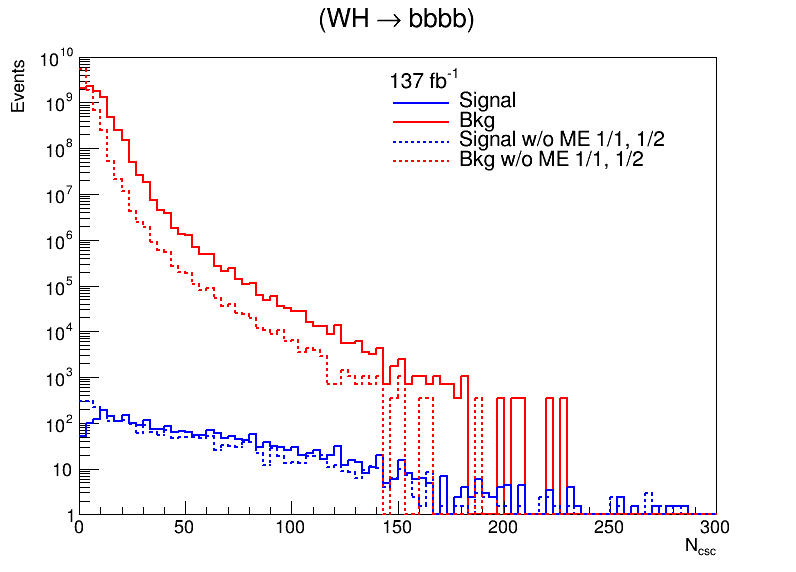

In [427]:
# Creates a comparative 1D histogram for the number of CSC hits for the m55ct10m signal MC and WJetsToLNu MC between the baseline and simple hit removal

c_1 = rt.TCanvas('c','c', 800, 600)

h['m55ct10m_wh_bbbb_inc'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_inc'].SetLineColor(4)

h['m55ct10m_wh_bbbb_no112'] = create_TH1D(nCsc_removal['m55ct10m_wh_bbbb']['ME_112'], axis_title=['m55ct10m_wh_bbbb_no112', 'Events'], name='m55ct10m_wh_bbbb_no112', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_no112'].SetLineColor(4)
h['m55ct10m_wh_bbbb_no112'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)

h['nCsc_wjets_no112'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_112'], axis_title=['nCsc_wjets_no112', 'Events'], name='nCsc_wjets_no112', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets_no112'].SetLineColor(2)
h['nCsc_wjets_no112'].SetLineStyle(2)


c_1.SetLogy()

# h['m55ct10m_wh_bbbb'].Scale(1.0/h['m55ct10m_wh_bbbb'].Integral())
# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())


h['m55ct10m_wh_bbbb_inc'].SetLineWidth(2)
h['m55ct10m_wh_bbbb_no112'].SetLineWidth(2)


h['nCsc_wjets'].SetLineWidth(2)
h['nCsc_wjets_no112'].SetLineWidth(2)

h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)
h['nCsc_wjets'].GetXaxis().SetRangeUser(0,300)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("(WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
h['m55ct10m_wh_bbbb_no112'].Draw('histo+same')
h['m55ct10m_wh_bbbb_inc'].Draw('histo+same')
h['nCsc_wjets_no112'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetHeader("137 fb^{-1}")
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_inc'], "Signal" , "L");
legend.AddEntry( h['nCsc_wjets'], "Bkg" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_no112'], "Signal w/o ME 1/1, 1/2" , "L");
legend.AddEntry( h['nCsc_wjets_no112'], "Bkg w/o ME 1/1, 1/2" , "L");


legend.Draw();

c_1.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

In [428]:
print(np.sum(weight_m55ct10m_minus[nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112']>135])+np.sum(weight_m55ct10m_plus[nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']>135]))
print(np.sum(weight_WJetsToLNu[nCsc_removal['WJetsToLNu']['ME_112']>135]))

# for x in range(300):
#     while np.sum(weight_m55ct10m_minus[nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112']>x])+np.sum(weight_m55ct10m_plus[nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']>x]) > 10:
#         continue
#     print(x)

102.97078845984602
4244.754200149832


### Comparison of Strategy I to Baseline via N<sub>CSC</sub> Threshold ROC Curves

### *Calculation*

In [429]:
# ROC Curve for WH/WJetsToLNu Samples: nCsc 

eff_ncsc = {}
rejection_power = {}
ncsc_var_x = np.array([])

for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)

       # Baseline ROCs
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
        eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))
     
        print(str(hit_thresh) + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['noCluster'] = {}
    
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
    rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))
    
    print(data_type + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-23 16:42:32.165745-07:00
1: 2019-08-23 16:42:32.165995-07:00
2: 2019-08-23 16:42:32.166394-07:00
3: 2019-08-23 16:42:32.167252-07:00
4: 2019-08-23 16:42:32.167637-07:00
5: 2019-08-23 16:42:32.168003-07:00
6: 2019-08-23 16:42:32.168385-07:00
7: 2019-08-23 16:42:32.168755-07:00
8: 2019-08-23 16:42:32.169140-07:00
9: 2019-08-23 16:42:32.169520-07:00
10: 2019-08-23 16:42:32.169920-07:00
11: 2019-08-23 16:42:32.170303-07:00
12: 2019-08-23 16:42:32.170711-07:00
13: 2019-08-23 16:42:32.170980-07:00
14: 2019-08-23 16:42:32.171231-07:00
15: 2019-08-23 16:42:32.171471-07:00
16: 2019-08-23 16:42:32.171721-07:00
17: 2019-08-23 16:42:32.171963-07:00
18: 2019-08-23 16:42:32.172204-07:00
19: 2019-08-23 16:42:32.172441-07:00
20: 2019-08-23 16:42:32.172688-07:00
21: 2019-08-23 16:42:32.172934-07:00
22: 2019-08-23 16:42:32.173172-07:00
23: 2019-08-23 16:42:32.173411-07:00
24: 2019-08-23 16:42:32.173658-07:00
25: 2019-08-23 16:42:32.173905-07:00
26: 2019-08-23 16:42:32.174141-07:00
27: 2019-08

0: 2019-08-23 16:42:32.817250-07:00
1: 2019-08-23 16:42:33.370319-07:00
2: 2019-08-23 16:42:33.922802-07:00
3: 2019-08-23 16:42:34.475321-07:00
4: 2019-08-23 16:42:35.029167-07:00
5: 2019-08-23 16:42:35.585198-07:00
6: 2019-08-23 16:42:36.142913-07:00
7: 2019-08-23 16:42:36.701891-07:00
8: 2019-08-23 16:42:37.259371-07:00
9: 2019-08-23 16:42:37.815140-07:00
10: 2019-08-23 16:42:38.373322-07:00
11: 2019-08-23 16:42:38.952329-07:00
12: 2019-08-23 16:42:39.549026-07:00
13: 2019-08-23 16:42:40.151463-07:00
14: 2019-08-23 16:42:40.753418-07:00
15: 2019-08-23 16:42:41.349511-07:00
16: 2019-08-23 16:42:41.940927-07:00
17: 2019-08-23 16:42:42.531443-07:00
18: 2019-08-23 16:42:43.123740-07:00
19: 2019-08-23 16:42:43.713476-07:00
20: 2019-08-23 16:42:44.315089-07:00
21: 2019-08-23 16:42:44.950331-07:00
22: 2019-08-23 16:42:45.574499-07:00
23: 2019-08-23 16:42:46.188376-07:00
24: 2019-08-23 16:42:46.777368-07:00
25: 2019-08-23 16:42:47.366209-07:00
26: 2019-08-23 16:42:47.954726-07:00
27: 2019-08

### *Combination of Efficiencies/Rejection Powers for WH Signal Sample*

In [430]:
eff_ncsc['m55ct10m_wh_bbbb'] = {}
for llave in eff_ncsc['m55ct10m_wh_bbbb_minus'].keys():
    eff_ncsc['m55ct10m_wh_bbbb'][llave] = {}
    for cle in eff_ncsc['m55ct10m_wh_bbbb_minus'][llave].keys():
        eff_ncsc['m55ct10m_wh_bbbb'][llave][cle] = np.concatenate([eff_ncsc['m55ct10m_wh_bbbb_minus'][llave][cle], eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle]])

### *ROC Curve Plot*

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_roc1
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


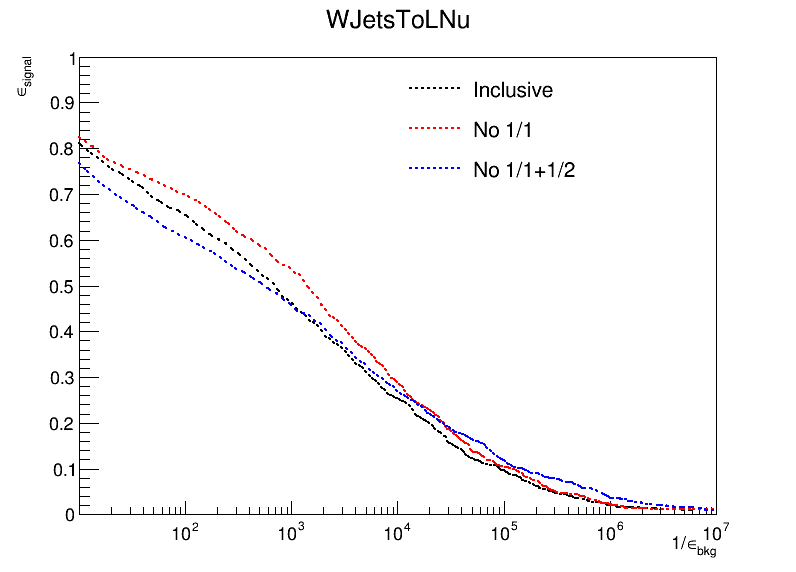

In [431]:
# Creates ROC curves for the signal efficiency of the m55ct10m signal sample against the WJetsToLNu samples using nCsc thresholds comparing baseline with Strategy I

c_roc1 = rt.TCanvas('c_roc1','c_roc1', 800, 600)

h['roc_curve_baseline'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_no11'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_no112'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_no113'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])


c_roc1.SetLogx()

h['roc_curve_baseline'].SetTitle('WJetsToLNu')


h['roc_curve_baseline'].SetLineWidth(2)
h['roc_curve_no11'].SetLineWidth(2)
h['roc_curve_no112'].SetLineWidth(2)
h['roc_curve_no113'].SetLineWidth(2)


h['roc_curve_baseline'].SetLineColor(1)
h['roc_curve_baseline'].SetLineStyle(2)

h['roc_curve_no11'].SetLineColor(2)
h['roc_curve_no11'].SetLineStyle(2)

h['roc_curve_no112'].SetLineColor(4)
h['roc_curve_no112'].SetLineStyle(2)

h['roc_curve_no113'].SetLineColor(3)
h['roc_curve_no113'].SetLineStyle(2)

h['roc_curve_baseline'].GetXaxis().SetLimits(10, 10**7)
h['roc_curve_baseline'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_baseline'].Draw()
h['roc_curve_no11'].Draw('same')

h['roc_curve_no112'].Draw('same')
# h['roc_curve_no113'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_baseline'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_no11'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_no112'], "No 1/1+1/2", 'l');
# legend.AddEntry( h['roc_curve_no113'], "No 1/1+1/2+1/3", 'l');


legend.Draw();

c_roc1.Draw()

## Event Lookup Framework

In [432]:
# Selection of Events for Event Display Purposes (Test area)

index_ev = np.array(nCsc_station['WJetsToLNu']['ME_12'])>30
lumi_all = [3837,4785,26874,67548,76282,85307,87986,87992,89230,115124,116229,116230,122866,122868,128953,129072,129074,129467,3831,4784,4786,67553,67554,87991,94238,99073,101854,101856,122867,128955,129464,129468,4780,26877,27702,85300,87989,94239,99072,101115,106947,122862,123211,129071,3832,3833,4782,4783,27703,27706,67552,76280,87987,94240,99067,99068,99070,101113,101855,115117,115118,115121,116232,122863,122865,129469,129470,3830,3835,27700,27705,85301,85303,85305,94236,99066,99069,115119,116231,116235,122869,128763,128765,138970,139846,3834,26873,27701,67550,67551,89231,94237,115122,115123,116228,116233,123210,128954,129465,138969,139847,147027,4781,4787,26875,26876,27648,27649,27650,27699,76281,76283,85302,85304,85306,87988,87990,89232,99071,106948,123208,123209,129073,129466,3836,27704,67547,67549,101114,101116,101857,106946,115120,116234,122864,128762,128764,128952,129471]

print(nCsc['WJetsToLNu'][np.where(eventNum['WJetsToLNu']==34136610)])
print(np.array(nCsc_station['WJetsToLNu']['ME_12'])[np.where(eventNum['WJetsToLNu']==34136610)])

# print(np.array(nCsc_jetMatch['WJetsToLNu'])[np.where(eventNum['WJetsToLNu']==34136610)])


ncsc_event_sel = nCsc['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]
evNum_event_sel = eventNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]
lumiNum_event_sel = lumiNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]

print('Lumi ' + 'Event ' + 'nCsc ')
print(np.dstack((lumiNum_event_sel, evNum_event_sel, ncsc_event_sel)))

[72]
[70]
Lumi Event nCsc 
[[[   67547 16619321       97]
  [   85305 20987497      223]
  [   99071 24369691       83]
  [  106946 26305690       39]
  [  129073 31752223       45]]]


In [433]:
print(lumiNum['WJetsToLNu'][(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0])])
print(eventNum['WJetsToLNu'][(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0])])
print(nCsc_removal['WJetsToLNu']['ME_112'][(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0])])

print(len(np.where(nCsc_removal['WJetsToLNu']['ME_112']>120)[0]))

[ 63751    744  23200 249359 156423  32168  63471  39228 133876 107174
 145978 118549  72923 138685  19748 235385 143870 138901 108542 154450
 164724 170704 207122   3188 207651  92120]
[15682280   183529  5711707 61335197 38480211  7917412 15613005  9652413
 32929965 26362062 35909632 29162205 17938587 34117408  4859180 57901460
 35389106 34170528 26699754 37993109 40521559 41989661 50948234   786965
 51078821 22661710]
[141 134 135 131 129 121 125 137 189 152 140 124 126 166 153 127 163 129
 147 125 135 123 140 138 151 133]
26


## Strategy II: Punch-through Vetoing

In [434]:
# print(csc_phi['m55ct10m_wh_bbbb'])

In [435]:
# Basic Implementation: loop through csc hits, and for each csc hit loop through jets, and get rid of this particular csc hit if its close to any jet
# Calculate deltaR between hit and jet, if greater than 0.4, accept hit, else reject

# nCsc_rechit_jetMatch only counts hits that pass punch-through vetoing and are known 'good' CSC rechits via a flag


nCsc_jetMatch  = {}
nCsc_rechit_jetMatch = {}

for sample in data_trees.keys():
    nCsc_jetMatch[sample] = {}
    nCsc_jetMatch[sample]['inclusive'] = []
    nCsc_jetMatch[sample]['ME_11'] = []
    nCsc_jetMatch[sample]['ME_12'] = []
    
#     nCsc_rechit_jetMatch[sample] = []
    
    csc_eta_source = [csc_eta[sample], cscEta_removal[sample]['ME_11'], cscEta_removal[sample]['ME_12']]
    csc_phi_source = [csc_phi[sample], cscPhi_removal[sample]['ME_11'], cscPhi_removal[sample]['ME_12']]
    
    for csc_data_source in range(3):
        csc_eta_strat = csc_eta_source[csc_data_source]
        csc_phi_strat = csc_phi_source[csc_data_source]
        
        for event in range(len(csc_eta_strat)):
            unmatched_hits = 0
            good_hits = 0
            hit_eta_list = csc_eta_strat[event]
            hit_phi_list = csc_phi_strat[event]
#             hit_flag_list = nRechits_flag[sample][event]

            for hit in range(len(hit_eta_list)):
                hit_eta = hit_eta_list[hit]
                hit_phi = hit_phi_list[hit]
#                 hit_flag = hit_flag_list[hit]

                is_near_jet = False
                for pf_jet in range(len(jetEta[sample][event])):
                    pfJet_eta = jetEta[sample][event][pf_jet]
                    pfJet_phi = jetPhi[sample][event][pf_jet]

                    dEta_jet = np.absolute(hit_eta - pfJet_eta)
                    dPhi_jet = np.absolute(hit_phi - pfJet_phi)

                    if dPhi_jet > np.pi:
                        dPhi_jet -= np.pi*2

                    elif dPhi_jet <= -np.pi:
                        dPhi_jet += np.pi*2

                    assert(dPhi_jet < np.pi and dPhi_jet > -np.pi)

                    dR_jet = np.sqrt(dEta_jet**2 + dPhi_jet**2)
                    if dR_jet <= 0.4:
                        is_near_jet = True

                if is_near_jet == False:
                    unmatched_hits += 1
#                     if hit_flag >= 3:
#                         good_hits += 1
            if csc_data_source == 0:
                nCsc_jetMatch[sample]['inclusive'].append(unmatched_hits)
            elif csc_data_source == 1:
                nCsc_jetMatch[sample]['ME_11'].append(unmatched_hits)
            else:
                nCsc_jetMatch[sample]['ME_12'].append(unmatched_hits)
#             nCsc_rechit_jetMatch[sample].append(good_hits)


            if (event % 10000) == 0:
                print(str(event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
#             if event == 400000:
#                 break
            
    print(sample + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-23 16:45:25.665429-07:00
0: 2019-08-23 16:45:31.205242-07:00
0: 2019-08-23 16:45:35.380072-07:00
m55ct10m_wh_bbbb_minus: 2019-08-23 16:45:38.678197-07:00
0: 2019-08-23 16:45:38.679215-07:00
0: 2019-08-23 16:45:43.323682-07:00
0: 2019-08-23 16:45:47.383413-07:00
m55ct10m_wh_bbbb_plus: 2019-08-23 16:45:50.911775-07:00
0: 2019-08-23 16:45:50.912027-07:00
10000: 2019-08-23 16:45:56.159106-07:00
20000: 2019-08-23 16:46:01.411727-07:00
30000: 2019-08-23 16:46:06.653390-07:00
40000: 2019-08-23 16:46:11.901605-07:00
50000: 2019-08-23 16:46:16.863688-07:00
60000: 2019-08-23 16:46:21.881538-07:00
70000: 2019-08-23 16:46:27.087775-07:00
80000: 2019-08-23 16:46:32.270532-07:00
90000: 2019-08-23 16:46:37.326824-07:00
100000: 2019-08-23 16:46:42.184079-07:00
110000: 2019-08-23 16:46:47.137694-07:00
120000: 2019-08-23 16:46:52.252373-07:00
130000: 2019-08-23 16:46:57.224527-07:00
140000: 2019-08-23 16:47:02.633100-07:00
150000: 2019-08-23 16:47:07.637453-07:00
160000: 2019-08-23 16:47:12.5

1900000: 2019-08-23 17:01:41.563310-07:00
1910000: 2019-08-23 17:01:46.691788-07:00
1920000: 2019-08-23 17:01:51.785953-07:00
1930000: 2019-08-23 17:01:56.866567-07:00
1940000: 2019-08-23 17:02:01.837335-07:00
1950000: 2019-08-23 17:02:06.858311-07:00
1960000: 2019-08-23 17:02:11.914146-07:00
1970000: 2019-08-23 17:02:16.881008-07:00
1980000: 2019-08-23 17:02:21.891912-07:00
1990000: 2019-08-23 17:02:26.794230-07:00
2000000: 2019-08-23 17:02:31.673567-07:00
2010000: 2019-08-23 17:02:36.719250-07:00
2020000: 2019-08-23 17:02:41.725852-07:00
2030000: 2019-08-23 17:02:46.621219-07:00
2040000: 2019-08-23 17:02:51.566238-07:00
2050000: 2019-08-23 17:02:56.514989-07:00
2060000: 2019-08-23 17:03:01.528424-07:00
2070000: 2019-08-23 17:03:06.486286-07:00
2080000: 2019-08-23 17:03:11.489440-07:00
2090000: 2019-08-23 17:03:16.501156-07:00
2100000: 2019-08-23 17:03:21.409112-07:00
2110000: 2019-08-23 17:03:26.339681-07:00
2120000: 2019-08-23 17:03:31.299894-07:00
2130000: 2019-08-23 17:03:36.23831

3860000: 2019-08-23 17:18:03.324980-07:00
3870000: 2019-08-23 17:18:08.359800-07:00
3880000: 2019-08-23 17:18:13.322549-07:00
3890000: 2019-08-23 17:18:18.167305-07:00
3900000: 2019-08-23 17:18:23.259849-07:00
3910000: 2019-08-23 17:18:28.242516-07:00
3920000: 2019-08-23 17:18:33.225825-07:00
3930000: 2019-08-23 17:18:38.329352-07:00
3940000: 2019-08-23 17:18:43.304293-07:00
3950000: 2019-08-23 17:18:48.290366-07:00
3960000: 2019-08-23 17:18:53.375430-07:00
3970000: 2019-08-23 17:18:58.360094-07:00
3980000: 2019-08-23 17:19:03.298678-07:00
3990000: 2019-08-23 17:19:08.385941-07:00
4000000: 2019-08-23 17:19:13.314202-07:00
4010000: 2019-08-23 17:19:18.313781-07:00
4020000: 2019-08-23 17:19:23.401870-07:00
4030000: 2019-08-23 17:19:28.722266-07:00
4040000: 2019-08-23 17:19:34.054213-07:00
4050000: 2019-08-23 17:19:39.082086-07:00
4060000: 2019-08-23 17:19:44.362062-07:00
4070000: 2019-08-23 17:19:49.637007-07:00
4080000: 2019-08-23 17:19:54.825283-07:00
4090000: 2019-08-23 17:20:00.22323

5820000: 2019-08-23 17:35:16.314793-07:00
5830000: 2019-08-23 17:35:21.717289-07:00
5840000: 2019-08-23 17:35:27.024998-07:00
5850000: 2019-08-23 17:35:32.307740-07:00
5860000: 2019-08-23 17:35:37.340575-07:00
5870000: 2019-08-23 17:35:42.377886-07:00
5880000: 2019-08-23 17:35:47.488090-07:00
5890000: 2019-08-23 17:35:52.506719-07:00
5900000: 2019-08-23 17:35:57.463424-07:00
5910000: 2019-08-23 17:36:02.451293-07:00
5920000: 2019-08-23 17:36:07.844012-07:00
5930000: 2019-08-23 17:36:12.964596-07:00
5940000: 2019-08-23 17:36:18.506678-07:00
5950000: 2019-08-23 17:36:24.314344-07:00
5960000: 2019-08-23 17:36:30.525102-07:00
5970000: 2019-08-23 17:36:36.059594-07:00
5980000: 2019-08-23 17:36:41.188585-07:00
5990000: 2019-08-23 17:36:46.761300-07:00
6000000: 2019-08-23 17:36:52.212657-07:00
6010000: 2019-08-23 17:36:57.431177-07:00
6020000: 2019-08-23 17:37:02.812451-07:00
6030000: 2019-08-23 17:37:07.952781-07:00
6040000: 2019-08-23 17:37:12.977505-07:00
6050000: 2019-08-23 17:37:18.00246

7780000: 2019-08-23 17:52:03.969347-07:00
7790000: 2019-08-23 17:52:08.955404-07:00
7800000: 2019-08-23 17:52:13.965230-07:00
7810000: 2019-08-23 17:52:18.883946-07:00
7820000: 2019-08-23 17:52:23.842710-07:00
7830000: 2019-08-23 17:52:28.880232-07:00
7840000: 2019-08-23 17:52:33.872565-07:00
7850000: 2019-08-23 17:52:38.799343-07:00
7860000: 2019-08-23 17:52:43.602944-07:00
7870000: 2019-08-23 17:52:48.739922-07:00
7880000: 2019-08-23 17:52:53.771296-07:00
7890000: 2019-08-23 17:52:58.824236-07:00
7900000: 2019-08-23 17:53:03.808285-07:00
7910000: 2019-08-23 17:53:08.780328-07:00
7920000: 2019-08-23 17:53:13.836344-07:00
7930000: 2019-08-23 17:53:18.807914-07:00
7940000: 2019-08-23 17:53:23.936587-07:00
7950000: 2019-08-23 17:53:28.914699-07:00
7960000: 2019-08-23 17:53:33.871329-07:00
7970000: 2019-08-23 17:53:38.765859-07:00
7980000: 2019-08-23 17:53:43.772204-07:00
7990000: 2019-08-23 17:53:48.752235-07:00
8000000: 2019-08-23 17:53:53.696045-07:00
8010000: 2019-08-23 17:53:58.71154

9740000: 2019-08-23 18:08:25.180720-07:00
9750000: 2019-08-23 18:08:30.561721-07:00
9760000: 2019-08-23 18:08:35.435288-07:00
9770000: 2019-08-23 18:08:40.351273-07:00
9780000: 2019-08-23 18:08:45.354313-07:00
9790000: 2019-08-23 18:08:50.622121-07:00
9800000: 2019-08-23 18:08:55.619719-07:00
9810000: 2019-08-23 18:09:00.693047-07:00
9820000: 2019-08-23 18:09:05.675697-07:00
9830000: 2019-08-23 18:09:10.729630-07:00
9840000: 2019-08-23 18:09:15.722208-07:00
9850000: 2019-08-23 18:09:20.552841-07:00
9860000: 2019-08-23 18:09:25.462144-07:00
9870000: 2019-08-23 18:09:30.362519-07:00
9880000: 2019-08-23 18:09:35.332986-07:00
9890000: 2019-08-23 18:09:40.340479-07:00
9900000: 2019-08-23 18:09:45.397360-07:00
9910000: 2019-08-23 18:09:50.384584-07:00
9920000: 2019-08-23 18:09:55.335453-07:00
9930000: 2019-08-23 18:10:00.340846-07:00
9940000: 2019-08-23 18:10:05.412175-07:00
9950000: 2019-08-23 18:10:10.259915-07:00
9960000: 2019-08-23 18:10:15.324201-07:00
9970000: 2019-08-23 18:10:20.25636

11660000: 2019-08-23 18:24:24.741853-07:00
11670000: 2019-08-23 18:24:29.817109-07:00
11680000: 2019-08-23 18:24:34.799027-07:00
11690000: 2019-08-23 18:24:39.727787-07:00
11700000: 2019-08-23 18:24:44.770988-07:00
11710000: 2019-08-23 18:24:49.784711-07:00
11720000: 2019-08-23 18:24:54.873633-07:00
11730000: 2019-08-23 18:24:59.879858-07:00
11740000: 2019-08-23 18:25:04.994808-07:00
11750000: 2019-08-23 18:25:09.888693-07:00
11760000: 2019-08-23 18:25:14.821869-07:00
11770000: 2019-08-23 18:25:19.666814-07:00
11780000: 2019-08-23 18:25:24.730442-07:00
11790000: 2019-08-23 18:25:29.727189-07:00
11800000: 2019-08-23 18:25:34.667571-07:00
11810000: 2019-08-23 18:25:39.581993-07:00
11820000: 2019-08-23 18:25:44.465457-07:00
11830000: 2019-08-23 18:25:49.346762-07:00
11840000: 2019-08-23 18:25:54.169783-07:00
11850000: 2019-08-23 18:25:59.122558-07:00
11860000: 2019-08-23 18:26:04.110413-07:00
11870000: 2019-08-23 18:26:09.143412-07:00
11880000: 2019-08-23 18:26:14.160776-07:00
11890000: 2

13570000: 2019-08-23 18:40:22.741665-07:00
13580000: 2019-08-23 18:40:27.669788-07:00
13590000: 2019-08-23 18:40:32.732148-07:00
13600000: 2019-08-23 18:40:37.811963-07:00
13610000: 2019-08-23 18:40:42.755547-07:00
13620000: 2019-08-23 18:40:47.691222-07:00
13630000: 2019-08-23 18:40:52.556669-07:00
13640000: 2019-08-23 18:40:57.583751-07:00
13650000: 2019-08-23 18:41:02.630676-07:00
13660000: 2019-08-23 18:41:07.727536-07:00
13670000: 2019-08-23 18:41:12.709746-07:00
13680000: 2019-08-23 18:41:18.203121-07:00
13690000: 2019-08-23 18:41:23.278493-07:00
13700000: 2019-08-23 18:41:28.486264-07:00
13710000: 2019-08-23 18:41:33.493590-07:00
13720000: 2019-08-23 18:41:38.534834-07:00
13730000: 2019-08-23 18:41:43.575789-07:00
13740000: 2019-08-23 18:41:48.358035-07:00
13750000: 2019-08-23 18:41:53.351852-07:00
13760000: 2019-08-23 18:41:58.344776-07:00
13770000: 2019-08-23 18:42:03.635647-07:00
13780000: 2019-08-23 18:42:08.716041-07:00
13790000: 2019-08-23 18:42:14.041137-07:00
13800000: 2

15480000: 2019-08-23 18:56:13.227262-07:00
15490000: 2019-08-23 18:56:18.153251-07:00
15500000: 2019-08-23 18:56:23.072443-07:00
15510000: 2019-08-23 18:56:28.042093-07:00
15520000: 2019-08-23 18:56:32.962259-07:00
15530000: 2019-08-23 18:56:37.909273-07:00
15540000: 2019-08-23 18:56:42.695683-07:00
15550000: 2019-08-23 18:56:47.726747-07:00
15560000: 2019-08-23 18:56:52.682812-07:00
15570000: 2019-08-23 18:56:57.554543-07:00
15580000: 2019-08-23 18:57:02.378947-07:00
15590000: 2019-08-23 18:57:07.390268-07:00
15600000: 2019-08-23 18:57:12.373446-07:00
15610000: 2019-08-23 18:57:17.272793-07:00
15620000: 2019-08-23 18:57:22.193609-07:00
15630000: 2019-08-23 18:57:27.159729-07:00
15640000: 2019-08-23 18:57:32.053734-07:00
15650000: 2019-08-23 18:57:37.065444-07:00
15660000: 2019-08-23 18:57:41.958771-07:00
15670000: 2019-08-23 18:57:46.873761-07:00
15680000: 2019-08-23 18:57:51.695446-07:00
15690000: 2019-08-23 18:57:56.657858-07:00
15700000: 2019-08-23 18:58:01.619080-07:00
15710000: 2

17390000: 2019-08-23 19:12:17.881733-07:00
17400000: 2019-08-23 19:12:22.762224-07:00
17410000: 2019-08-23 19:12:27.910625-07:00
17420000: 2019-08-23 19:12:33.266177-07:00
17430000: 2019-08-23 19:12:38.240805-07:00
17440000: 2019-08-23 19:12:43.123498-07:00
17450000: 2019-08-23 19:12:48.431075-07:00
17460000: 2019-08-23 19:12:53.815825-07:00
17470000: 2019-08-23 19:12:58.893528-07:00
17480000: 2019-08-23 19:13:03.806134-07:00
17490000: 2019-08-23 19:13:08.871638-07:00
17500000: 2019-08-23 19:13:13.848847-07:00
17510000: 2019-08-23 19:13:18.894486-07:00
17520000: 2019-08-23 19:13:23.980993-07:00
17530000: 2019-08-23 19:13:28.863459-07:00
17540000: 2019-08-23 19:13:33.745904-07:00
17550000: 2019-08-23 19:13:38.717024-07:00
17560000: 2019-08-23 19:13:43.755508-07:00
17570000: 2019-08-23 19:13:48.612409-07:00
17580000: 2019-08-23 19:13:53.629783-07:00
17590000: 2019-08-23 19:13:58.933371-07:00
17600000: 2019-08-23 19:14:03.857662-07:00
17610000: 2019-08-23 19:14:08.913979-07:00
17620000: 2

19300000: 2019-08-23 19:28:14.099763-07:00
19310000: 2019-08-23 19:28:19.099907-07:00
19320000: 2019-08-23 19:28:24.175566-07:00
19330000: 2019-08-23 19:28:29.227597-07:00
19340000: 2019-08-23 19:28:34.190102-07:00
19350000: 2019-08-23 19:28:39.232258-07:00
19360000: 2019-08-23 19:28:44.166170-07:00
19370000: 2019-08-23 19:28:49.191412-07:00
19380000: 2019-08-23 19:28:54.202098-07:00
19390000: 2019-08-23 19:28:59.187677-07:00
19400000: 2019-08-23 19:29:04.128033-07:00
19410000: 2019-08-23 19:29:09.065448-07:00
19420000: 2019-08-23 19:29:14.017360-07:00
19430000: 2019-08-23 19:29:19.008431-07:00
19440000: 2019-08-23 19:29:23.984808-07:00
19450000: 2019-08-23 19:29:28.887276-07:00
19460000: 2019-08-23 19:29:33.842690-07:00
19470000: 2019-08-23 19:29:38.909576-07:00
19480000: 2019-08-23 19:29:43.858521-07:00
19490000: 2019-08-23 19:29:48.717794-07:00
19500000: 2019-08-23 19:29:53.636819-07:00
19510000: 2019-08-23 19:29:58.620864-07:00
19520000: 2019-08-23 19:30:03.442619-07:00
19530000: 2

21210000: 2019-08-23 19:44:09.767110-07:00
21220000: 2019-08-23 19:44:14.724025-07:00
21230000: 2019-08-23 19:44:19.722802-07:00
21240000: 2019-08-23 19:44:24.745649-07:00
21250000: 2019-08-23 19:44:29.792413-07:00
21260000: 2019-08-23 19:44:34.861869-07:00
21270000: 2019-08-23 19:44:39.881798-07:00
21280000: 2019-08-23 19:44:44.789454-07:00
21290000: 2019-08-23 19:44:49.780852-07:00
21300000: 2019-08-23 19:44:54.796718-07:00
21310000: 2019-08-23 19:44:59.846086-07:00
21320000: 2019-08-23 19:45:04.865111-07:00
21330000: 2019-08-23 19:45:09.801326-07:00
21340000: 2019-08-23 19:45:14.797787-07:00
21350000: 2019-08-23 19:45:19.888588-07:00
21360000: 2019-08-23 19:45:24.803468-07:00
21370000: 2019-08-23 19:45:29.768104-07:00
21380000: 2019-08-23 19:45:34.845056-07:00
21390000: 2019-08-23 19:45:40.026513-07:00
21400000: 2019-08-23 19:45:45.071420-07:00
21410000: 2019-08-23 19:45:50.048971-07:00
21420000: 2019-08-23 19:45:54.881719-07:00
21430000: 2019-08-23 19:45:59.947261-07:00
21440000: 2

23120000: 2019-08-23 20:00:07.892307-07:00
23130000: 2019-08-23 20:00:12.940927-07:00
23140000: 2019-08-23 20:00:17.915155-07:00
23150000: 2019-08-23 20:00:22.966124-07:00
23160000: 2019-08-23 20:00:27.948158-07:00
23170000: 2019-08-23 20:00:33.054914-07:00
23180000: 2019-08-23 20:00:37.992818-07:00
23190000: 2019-08-23 20:00:42.892684-07:00
23200000: 2019-08-23 20:00:47.798685-07:00
23210000: 2019-08-23 20:00:52.826437-07:00
23220000: 2019-08-23 20:00:57.819326-07:00
23230000: 2019-08-23 20:01:02.751064-07:00
23240000: 2019-08-23 20:01:07.865374-07:00
23250000: 2019-08-23 20:01:12.771932-07:00
23260000: 2019-08-23 20:01:18.065085-07:00
23270000: 2019-08-23 20:01:23.134298-07:00
23280000: 2019-08-23 20:01:28.147674-07:00
23290000: 2019-08-23 20:01:33.085458-07:00
23300000: 2019-08-23 20:01:37.998658-07:00
23310000: 2019-08-23 20:01:42.987887-07:00
23320000: 2019-08-23 20:01:47.943077-07:00
23330000: 2019-08-23 20:01:52.933406-07:00
23340000: 2019-08-23 20:01:57.877041-07:00
23350000: 2

1260000: 2019-08-23 20:10:44.533654-07:00
1270000: 2019-08-23 20:10:46.709309-07:00
1280000: 2019-08-23 20:10:48.902206-07:00
1290000: 2019-08-23 20:10:51.087037-07:00
1300000: 2019-08-23 20:10:53.319513-07:00
1310000: 2019-08-23 20:10:55.496905-07:00
1320000: 2019-08-23 20:10:57.710072-07:00
1330000: 2019-08-23 20:10:59.920267-07:00
1340000: 2019-08-23 20:11:02.085675-07:00
1350000: 2019-08-23 20:11:04.332967-07:00
1360000: 2019-08-23 20:11:06.547193-07:00
1370000: 2019-08-23 20:11:09.257436-07:00
1380000: 2019-08-23 20:11:11.410960-07:00
1390000: 2019-08-23 20:11:14.424692-07:00
1400000: 2019-08-23 20:11:16.872954-07:00
1410000: 2019-08-23 20:11:19.033377-07:00
1420000: 2019-08-23 20:11:21.283032-07:00
1430000: 2019-08-23 20:11:23.512336-07:00
1440000: 2019-08-23 20:11:25.666898-07:00
1450000: 2019-08-23 20:11:27.916540-07:00
1460000: 2019-08-23 20:11:30.098947-07:00
1470000: 2019-08-23 20:11:32.276874-07:00
1480000: 2019-08-23 20:11:34.491188-07:00
1490000: 2019-08-23 20:11:36.69080

3220000: 2019-08-23 20:18:00.745685-07:00
3230000: 2019-08-23 20:18:02.956417-07:00
3240000: 2019-08-23 20:18:05.182777-07:00
3250000: 2019-08-23 20:18:07.399118-07:00
3260000: 2019-08-23 20:18:09.619907-07:00
3270000: 2019-08-23 20:18:11.789944-07:00
3280000: 2019-08-23 20:18:14.003067-07:00
3290000: 2019-08-23 20:18:16.150716-07:00
3300000: 2019-08-23 20:18:18.367061-07:00
3310000: 2019-08-23 20:18:20.640935-07:00
3320000: 2019-08-23 20:18:22.831521-07:00
3330000: 2019-08-23 20:18:24.986050-07:00
3340000: 2019-08-23 20:18:27.234114-07:00
3350000: 2019-08-23 20:18:29.429790-07:00
3360000: 2019-08-23 20:18:31.627119-07:00
3370000: 2019-08-23 20:18:33.857019-07:00
3380000: 2019-08-23 20:18:36.083830-07:00
3390000: 2019-08-23 20:18:38.337061-07:00
3400000: 2019-08-23 20:18:40.535127-07:00
3410000: 2019-08-23 20:18:42.760817-07:00
3420000: 2019-08-23 20:18:44.995781-07:00
3430000: 2019-08-23 20:18:47.192039-07:00
3440000: 2019-08-23 20:18:49.424789-07:00
3450000: 2019-08-23 20:18:51.61126

5180000: 2019-08-23 20:25:16.455627-07:00
5190000: 2019-08-23 20:25:18.697755-07:00
5200000: 2019-08-23 20:25:20.972931-07:00
5210000: 2019-08-23 20:25:23.204645-07:00
5220000: 2019-08-23 20:25:25.475492-07:00
5230000: 2019-08-23 20:25:27.666304-07:00
5240000: 2019-08-23 20:25:29.903458-07:00
5250000: 2019-08-23 20:25:32.068907-07:00
5260000: 2019-08-23 20:25:34.276877-07:00
5270000: 2019-08-23 20:25:36.497522-07:00
5280000: 2019-08-23 20:25:38.677898-07:00
5290000: 2019-08-23 20:25:40.949000-07:00
5300000: 2019-08-23 20:25:43.180833-07:00
5310000: 2019-08-23 20:25:45.379674-07:00
5320000: 2019-08-23 20:25:47.569054-07:00
5330000: 2019-08-23 20:25:49.783401-07:00
5340000: 2019-08-23 20:25:51.974411-07:00
5350000: 2019-08-23 20:25:54.200931-07:00
5360000: 2019-08-23 20:25:56.449990-07:00
5370000: 2019-08-23 20:25:58.684393-07:00
5380000: 2019-08-23 20:26:00.882326-07:00
5390000: 2019-08-23 20:26:03.132502-07:00
5400000: 2019-08-23 20:26:05.362473-07:00
5410000: 2019-08-23 20:26:07.56392

7140000: 2019-08-23 20:32:33.111233-07:00
7150000: 2019-08-23 20:32:35.331321-07:00
7160000: 2019-08-23 20:32:37.545917-07:00
7170000: 2019-08-23 20:32:39.780127-07:00
7180000: 2019-08-23 20:32:41.992088-07:00
7190000: 2019-08-23 20:32:44.271098-07:00
7200000: 2019-08-23 20:32:46.536335-07:00
7210000: 2019-08-23 20:32:48.731105-07:00
7220000: 2019-08-23 20:32:50.913473-07:00
7230000: 2019-08-23 20:32:53.093226-07:00
7240000: 2019-08-23 20:32:55.374798-07:00
7250000: 2019-08-23 20:32:57.731221-07:00
7260000: 2019-08-23 20:32:59.900988-07:00
7270000: 2019-08-23 20:33:02.239709-07:00
7280000: 2019-08-23 20:33:04.783846-07:00
7290000: 2019-08-23 20:33:06.963160-07:00
7300000: 2019-08-23 20:33:09.298011-07:00
7310000: 2019-08-23 20:33:11.505285-07:00
7320000: 2019-08-23 20:33:13.697467-07:00
7330000: 2019-08-23 20:33:15.932085-07:00
7340000: 2019-08-23 20:33:18.162988-07:00
7350000: 2019-08-23 20:33:20.421908-07:00
7360000: 2019-08-23 20:33:22.670181-07:00
7370000: 2019-08-23 20:33:24.87798

9100000: 2019-08-23 20:39:49.150208-07:00
9110000: 2019-08-23 20:39:51.383953-07:00
9120000: 2019-08-23 20:39:53.553530-07:00
9130000: 2019-08-23 20:39:55.709697-07:00
9140000: 2019-08-23 20:39:57.865246-07:00
9150000: 2019-08-23 20:40:00.110833-07:00
9160000: 2019-08-23 20:40:02.247121-07:00
9170000: 2019-08-23 20:40:04.405951-07:00
9180000: 2019-08-23 20:40:06.579525-07:00
9190000: 2019-08-23 20:40:08.836135-07:00
9200000: 2019-08-23 20:40:11.105747-07:00
9210000: 2019-08-23 20:40:13.308739-07:00
9220000: 2019-08-23 20:40:15.516646-07:00
9230000: 2019-08-23 20:40:17.793504-07:00
9240000: 2019-08-23 20:40:20.015921-07:00
9250000: 2019-08-23 20:40:22.242226-07:00
9260000: 2019-08-23 20:40:24.444130-07:00
9270000: 2019-08-23 20:40:26.666159-07:00
9280000: 2019-08-23 20:40:28.871213-07:00
9290000: 2019-08-23 20:40:31.074264-07:00
9300000: 2019-08-23 20:40:33.255157-07:00
9310000: 2019-08-23 20:40:35.499134-07:00
9320000: 2019-08-23 20:40:37.729758-07:00
9330000: 2019-08-23 20:40:39.92128

11030000: 2019-08-23 20:46:59.249190-07:00
11040000: 2019-08-23 20:47:01.525864-07:00
11050000: 2019-08-23 20:47:03.765494-07:00
11060000: 2019-08-23 20:47:06.115757-07:00
11070000: 2019-08-23 20:47:08.381523-07:00
11080000: 2019-08-23 20:47:10.708821-07:00
11090000: 2019-08-23 20:47:12.977794-07:00
11100000: 2019-08-23 20:47:15.190652-07:00
11110000: 2019-08-23 20:47:17.603938-07:00
11120000: 2019-08-23 20:47:19.841070-07:00
11130000: 2019-08-23 20:47:22.083783-07:00
11140000: 2019-08-23 20:47:24.273010-07:00
11150000: 2019-08-23 20:47:26.664640-07:00
11160000: 2019-08-23 20:47:29.068824-07:00
11170000: 2019-08-23 20:47:31.394234-07:00
11180000: 2019-08-23 20:47:33.528353-07:00
11190000: 2019-08-23 20:47:35.822288-07:00
11200000: 2019-08-23 20:47:38.157640-07:00
11210000: 2019-08-23 20:47:40.449077-07:00
11220000: 2019-08-23 20:47:42.876838-07:00
11230000: 2019-08-23 20:47:45.103806-07:00
11240000: 2019-08-23 20:47:47.391702-07:00
11250000: 2019-08-23 20:47:49.692418-07:00
11260000: 2

12940000: 2019-08-23 20:54:11.894686-07:00
12950000: 2019-08-23 20:54:14.049994-07:00
12960000: 2019-08-23 20:54:16.235945-07:00
12970000: 2019-08-23 20:54:18.500628-07:00
12980000: 2019-08-23 20:54:20.722634-07:00
12990000: 2019-08-23 20:54:22.937366-07:00
13000000: 2019-08-23 20:54:25.197173-07:00
13010000: 2019-08-23 20:54:27.451419-07:00
13020000: 2019-08-23 20:54:29.651869-07:00
13030000: 2019-08-23 20:54:31.903488-07:00
13040000: 2019-08-23 20:54:34.128001-07:00
13050000: 2019-08-23 20:54:36.341512-07:00
13060000: 2019-08-23 20:54:38.514645-07:00
13070000: 2019-08-23 20:54:40.730935-07:00
13080000: 2019-08-23 20:54:42.908448-07:00
13090000: 2019-08-23 20:54:45.076761-07:00
13100000: 2019-08-23 20:54:47.240091-07:00
13110000: 2019-08-23 20:54:49.448067-07:00
13120000: 2019-08-23 20:54:51.596629-07:00
13130000: 2019-08-23 20:54:53.842874-07:00
13140000: 2019-08-23 20:54:56.029425-07:00
13150000: 2019-08-23 20:54:58.265459-07:00
13160000: 2019-08-23 20:55:00.437844-07:00
13170000: 2

14850000: 2019-08-23 21:01:14.856441-07:00
14860000: 2019-08-23 21:01:17.072361-07:00
14870000: 2019-08-23 21:01:19.293461-07:00
14880000: 2019-08-23 21:01:21.542924-07:00
14890000: 2019-08-23 21:01:23.778955-07:00
14900000: 2019-08-23 21:01:25.969478-07:00
14910000: 2019-08-23 21:01:28.188731-07:00
14920000: 2019-08-23 21:01:30.354125-07:00
14930000: 2019-08-23 21:01:32.562837-07:00
14940000: 2019-08-23 21:01:34.735808-07:00
14950000: 2019-08-23 21:01:37.000974-07:00
14960000: 2019-08-23 21:01:39.246273-07:00
14970000: 2019-08-23 21:01:41.423448-07:00
14980000: 2019-08-23 21:01:43.549461-07:00
14990000: 2019-08-23 21:01:45.677253-07:00
15000000: 2019-08-23 21:01:47.977398-07:00
15010000: 2019-08-23 21:01:50.183220-07:00
15020000: 2019-08-23 21:01:52.370937-07:00
15030000: 2019-08-23 21:01:54.572101-07:00
15040000: 2019-08-23 21:01:56.825079-07:00
15050000: 2019-08-23 21:01:58.996813-07:00
15060000: 2019-08-23 21:02:01.197335-07:00
15070000: 2019-08-23 21:02:03.393869-07:00
15080000: 2

16760000: 2019-08-23 21:08:18.993523-07:00
16770000: 2019-08-23 21:08:21.258568-07:00
16780000: 2019-08-23 21:08:23.441223-07:00
16790000: 2019-08-23 21:08:25.712920-07:00
16800000: 2019-08-23 21:08:27.959621-07:00
16810000: 2019-08-23 21:08:30.163365-07:00
16820000: 2019-08-23 21:08:32.441629-07:00
16830000: 2019-08-23 21:08:34.688810-07:00
16840000: 2019-08-23 21:08:37.254942-07:00
16850000: 2019-08-23 21:08:39.521907-07:00
16860000: 2019-08-23 21:08:41.760625-07:00
16870000: 2019-08-23 21:08:44.010354-07:00
16880000: 2019-08-23 21:08:46.224916-07:00
16890000: 2019-08-23 21:08:48.437382-07:00
16900000: 2019-08-23 21:08:50.711664-07:00
16910000: 2019-08-23 21:08:52.937470-07:00
16920000: 2019-08-23 21:08:55.143046-07:00
16930000: 2019-08-23 21:08:57.369458-07:00
16940000: 2019-08-23 21:08:59.644793-07:00
16950000: 2019-08-23 21:09:01.856289-07:00
16960000: 2019-08-23 21:09:04.027399-07:00
16970000: 2019-08-23 21:09:06.213233-07:00
16980000: 2019-08-23 21:09:08.442004-07:00
16990000: 2

18670000: 2019-08-23 21:15:25.245148-07:00
18680000: 2019-08-23 21:15:27.464036-07:00
18690000: 2019-08-23 21:15:29.764224-07:00
18700000: 2019-08-23 21:15:32.039866-07:00
18710000: 2019-08-23 21:15:34.318867-07:00
18720000: 2019-08-23 21:15:36.531132-07:00
18730000: 2019-08-23 21:15:38.772684-07:00
18740000: 2019-08-23 21:15:41.021029-07:00
18750000: 2019-08-23 21:15:43.355403-07:00
18760000: 2019-08-23 21:15:45.645277-07:00
18770000: 2019-08-23 21:15:47.915706-07:00
18780000: 2019-08-23 21:15:50.144341-07:00
18790000: 2019-08-23 21:15:52.381723-07:00
18800000: 2019-08-23 21:15:54.580840-07:00
18810000: 2019-08-23 21:15:56.791400-07:00
18820000: 2019-08-23 21:15:58.988473-07:00
18830000: 2019-08-23 21:16:01.191690-07:00
18840000: 2019-08-23 21:16:03.496896-07:00
18850000: 2019-08-23 21:16:05.730012-07:00
18860000: 2019-08-23 21:16:07.974239-07:00
18870000: 2019-08-23 21:16:10.185263-07:00
18880000: 2019-08-23 21:16:12.370633-07:00
18890000: 2019-08-23 21:16:14.562071-07:00
18900000: 2

20580000: 2019-08-23 21:22:34.057271-07:00
20590000: 2019-08-23 21:22:36.259180-07:00
20600000: 2019-08-23 21:22:38.462326-07:00
20610000: 2019-08-23 21:22:40.645490-07:00
20620000: 2019-08-23 21:22:42.846724-07:00
20630000: 2019-08-23 21:22:45.372222-07:00
20640000: 2019-08-23 21:22:47.612101-07:00
20650000: 2019-08-23 21:22:49.809923-07:00
20660000: 2019-08-23 21:22:52.043702-07:00
20670000: 2019-08-23 21:22:54.234468-07:00
20680000: 2019-08-23 21:22:56.485126-07:00
20690000: 2019-08-23 21:22:58.642836-07:00
20700000: 2019-08-23 21:23:01.026906-07:00
20710000: 2019-08-23 21:23:03.189948-07:00
20720000: 2019-08-23 21:23:05.354056-07:00
20730000: 2019-08-23 21:23:07.550259-07:00
20740000: 2019-08-23 21:23:09.687522-07:00
20750000: 2019-08-23 21:23:11.872241-07:00
20760000: 2019-08-23 21:23:14.128981-07:00
20770000: 2019-08-23 21:23:16.345813-07:00
20780000: 2019-08-23 21:23:18.625166-07:00
20790000: 2019-08-23 21:23:20.839312-07:00
20800000: 2019-08-23 21:23:23.024304-07:00
20810000: 2

22490000: 2019-08-23 21:29:45.728378-07:00
22500000: 2019-08-23 21:29:48.049862-07:00
22510000: 2019-08-23 21:29:50.230218-07:00
22520000: 2019-08-23 21:29:52.524674-07:00
22530000: 2019-08-23 21:29:54.760045-07:00
22540000: 2019-08-23 21:29:56.984289-07:00
22550000: 2019-08-23 21:29:59.162887-07:00
22560000: 2019-08-23 21:30:01.406731-07:00
22570000: 2019-08-23 21:30:03.607644-07:00
22580000: 2019-08-23 21:30:05.831480-07:00
22590000: 2019-08-23 21:30:08.034510-07:00
22600000: 2019-08-23 21:30:10.211054-07:00
22610000: 2019-08-23 21:30:12.465623-07:00
22620000: 2019-08-23 21:30:14.684996-07:00
22630000: 2019-08-23 21:30:16.784689-07:00
22640000: 2019-08-23 21:30:18.988914-07:00
22650000: 2019-08-23 21:30:21.190180-07:00
22660000: 2019-08-23 21:30:23.333434-07:00
22670000: 2019-08-23 21:30:25.539000-07:00
22680000: 2019-08-23 21:30:27.764868-07:00
22690000: 2019-08-23 21:30:29.976751-07:00
22700000: 2019-08-23 21:30:32.198495-07:00
22710000: 2019-08-23 21:30:34.571260-07:00
22720000: 2

600000: 2019-08-23 21:36:45.508414-07:00
610000: 2019-08-23 21:36:47.549092-07:00
620000: 2019-08-23 21:36:49.593898-07:00
630000: 2019-08-23 21:36:51.677541-07:00
640000: 2019-08-23 21:36:53.743037-07:00
650000: 2019-08-23 21:36:55.830702-07:00
660000: 2019-08-23 21:36:57.901944-07:00
670000: 2019-08-23 21:36:59.927737-07:00
680000: 2019-08-23 21:37:02.017212-07:00
690000: 2019-08-23 21:37:04.008874-07:00
700000: 2019-08-23 21:37:06.039828-07:00
710000: 2019-08-23 21:37:08.170455-07:00
720000: 2019-08-23 21:37:10.241901-07:00
730000: 2019-08-23 21:37:12.366856-07:00
740000: 2019-08-23 21:37:14.466017-07:00
750000: 2019-08-23 21:37:16.524014-07:00
760000: 2019-08-23 21:37:18.596927-07:00
770000: 2019-08-23 21:37:20.644334-07:00
780000: 2019-08-23 21:37:22.760857-07:00
790000: 2019-08-23 21:37:24.860371-07:00
800000: 2019-08-23 21:37:26.998176-07:00
810000: 2019-08-23 21:37:29.113204-07:00
820000: 2019-08-23 21:37:31.247906-07:00
830000: 2019-08-23 21:37:33.358982-07:00
840000: 2019-08-

2570000: 2019-08-23 21:43:26.909991-07:00
2580000: 2019-08-23 21:43:28.992905-07:00
2590000: 2019-08-23 21:43:31.075218-07:00
2600000: 2019-08-23 21:43:33.138797-07:00
2610000: 2019-08-23 21:43:35.147705-07:00
2620000: 2019-08-23 21:43:37.187442-07:00
2630000: 2019-08-23 21:43:39.245428-07:00
2640000: 2019-08-23 21:43:41.242973-07:00
2650000: 2019-08-23 21:43:43.238143-07:00
2660000: 2019-08-23 21:43:45.282427-07:00
2670000: 2019-08-23 21:43:47.309201-07:00
2680000: 2019-08-23 21:43:49.347344-07:00
2690000: 2019-08-23 21:43:51.379210-07:00
2700000: 2019-08-23 21:43:53.461601-07:00
2710000: 2019-08-23 21:43:55.461659-07:00
2720000: 2019-08-23 21:43:57.519638-07:00
2730000: 2019-08-23 21:43:59.578206-07:00
2740000: 2019-08-23 21:44:01.633011-07:00
2750000: 2019-08-23 21:44:03.692422-07:00
2760000: 2019-08-23 21:44:05.739056-07:00
2770000: 2019-08-23 21:44:07.811931-07:00
2780000: 2019-08-23 21:44:09.776700-07:00
2790000: 2019-08-23 21:44:11.813095-07:00
2800000: 2019-08-23 21:44:13.88414

4530000: 2019-08-23 21:50:06.200457-07:00
4540000: 2019-08-23 21:50:08.249343-07:00
4550000: 2019-08-23 21:50:10.203004-07:00
4560000: 2019-08-23 21:50:12.170058-07:00
4570000: 2019-08-23 21:50:14.180485-07:00
4580000: 2019-08-23 21:50:16.209136-07:00
4590000: 2019-08-23 21:50:18.224792-07:00
4600000: 2019-08-23 21:50:20.261592-07:00
4610000: 2019-08-23 21:50:22.259851-07:00
4620000: 2019-08-23 21:50:24.297843-07:00
4630000: 2019-08-23 21:50:26.266992-07:00
4640000: 2019-08-23 21:50:28.270549-07:00
4650000: 2019-08-23 21:50:30.290848-07:00
4660000: 2019-08-23 21:50:32.331426-07:00
4670000: 2019-08-23 21:50:34.334865-07:00
4680000: 2019-08-23 21:50:36.338066-07:00
4690000: 2019-08-23 21:50:38.345300-07:00
4700000: 2019-08-23 21:50:40.429867-07:00
4710000: 2019-08-23 21:50:42.470393-07:00
4720000: 2019-08-23 21:50:44.486060-07:00
4730000: 2019-08-23 21:50:46.463084-07:00
4740000: 2019-08-23 21:50:48.480308-07:00
4750000: 2019-08-23 21:50:50.481092-07:00
4760000: 2019-08-23 21:50:52.55963

6490000: 2019-08-23 21:56:44.141822-07:00
6500000: 2019-08-23 21:56:46.292072-07:00
6510000: 2019-08-23 21:56:48.368710-07:00
6520000: 2019-08-23 21:56:50.349961-07:00
6530000: 2019-08-23 21:56:52.396944-07:00
6540000: 2019-08-23 21:56:54.398643-07:00
6550000: 2019-08-23 21:56:56.515310-07:00
6560000: 2019-08-23 21:56:58.565193-07:00
6570000: 2019-08-23 21:57:00.518776-07:00
6580000: 2019-08-23 21:57:02.618976-07:00
6590000: 2019-08-23 21:57:04.663131-07:00
6600000: 2019-08-23 21:57:06.665961-07:00
6610000: 2019-08-23 21:57:08.704579-07:00
6620000: 2019-08-23 21:57:10.776447-07:00
6630000: 2019-08-23 21:57:12.752877-07:00
6640000: 2019-08-23 21:57:14.775961-07:00
6650000: 2019-08-23 21:57:16.856931-07:00
6660000: 2019-08-23 21:57:18.921963-07:00
6670000: 2019-08-23 21:57:20.995318-07:00
6680000: 2019-08-23 21:57:23.036566-07:00
6690000: 2019-08-23 21:57:25.036761-07:00
6700000: 2019-08-23 21:57:27.062596-07:00
6710000: 2019-08-23 21:57:29.106962-07:00
6720000: 2019-08-23 21:57:31.13078

8450000: 2019-08-23 22:03:23.391610-07:00
8460000: 2019-08-23 22:03:25.439076-07:00
8470000: 2019-08-23 22:03:27.570761-07:00
8480000: 2019-08-23 22:03:29.677599-07:00
8490000: 2019-08-23 22:03:31.699576-07:00
8500000: 2019-08-23 22:03:33.668456-07:00
8510000: 2019-08-23 22:03:35.719425-07:00
8520000: 2019-08-23 22:03:37.753633-07:00
8530000: 2019-08-23 22:03:39.756043-07:00
8540000: 2019-08-23 22:03:41.863530-07:00
8550000: 2019-08-23 22:03:43.890309-07:00
8560000: 2019-08-23 22:03:45.930223-07:00
8570000: 2019-08-23 22:03:47.922365-07:00
8580000: 2019-08-23 22:03:49.969712-07:00
8590000: 2019-08-23 22:03:52.015575-07:00
8600000: 2019-08-23 22:03:54.021997-07:00
8610000: 2019-08-23 22:03:56.047875-07:00
8620000: 2019-08-23 22:03:58.070066-07:00
8630000: 2019-08-23 22:04:00.128346-07:00
8640000: 2019-08-23 22:04:02.180388-07:00
8650000: 2019-08-23 22:04:04.198876-07:00
8660000: 2019-08-23 22:04:06.259103-07:00
8670000: 2019-08-23 22:04:08.288283-07:00
8680000: 2019-08-23 22:04:10.28562

10400000: 2019-08-23 22:10:00.780910-07:00
10410000: 2019-08-23 22:10:02.726417-07:00
10420000: 2019-08-23 22:10:04.718638-07:00
10430000: 2019-08-23 22:10:06.716383-07:00
10440000: 2019-08-23 22:10:08.765586-07:00
10450000: 2019-08-23 22:10:10.799061-07:00
10460000: 2019-08-23 22:10:12.966303-07:00
10470000: 2019-08-23 22:10:15.052777-07:00
10480000: 2019-08-23 22:10:17.118947-07:00
10490000: 2019-08-23 22:10:19.151630-07:00
10500000: 2019-08-23 22:10:21.213303-07:00
10510000: 2019-08-23 22:10:23.260355-07:00
10520000: 2019-08-23 22:10:25.262766-07:00
10530000: 2019-08-23 22:10:27.260088-07:00
10540000: 2019-08-23 22:10:29.282615-07:00
10550000: 2019-08-23 22:10:31.287336-07:00
10560000: 2019-08-23 22:10:33.303094-07:00
10570000: 2019-08-23 22:10:35.387105-07:00
10580000: 2019-08-23 22:10:37.406280-07:00
10590000: 2019-08-23 22:10:39.408332-07:00
10600000: 2019-08-23 22:10:41.408342-07:00
10610000: 2019-08-23 22:10:43.389122-07:00
10620000: 2019-08-23 22:10:45.440642-07:00
10630000: 2

12310000: 2019-08-23 22:16:30.787699-07:00
12320000: 2019-08-23 22:16:32.811733-07:00
12330000: 2019-08-23 22:16:34.847558-07:00
12340000: 2019-08-23 22:16:36.881741-07:00
12350000: 2019-08-23 22:16:38.941104-07:00
12360000: 2019-08-23 22:16:41.060262-07:00
12370000: 2019-08-23 22:16:43.148819-07:00
12380000: 2019-08-23 22:16:45.231526-07:00
12390000: 2019-08-23 22:16:47.402404-07:00
12400000: 2019-08-23 22:16:49.523015-07:00
12410000: 2019-08-23 22:16:51.632425-07:00
12420000: 2019-08-23 22:16:53.638787-07:00
12430000: 2019-08-23 22:16:55.690828-07:00
12440000: 2019-08-23 22:16:57.705599-07:00
12450000: 2019-08-23 22:16:59.736671-07:00
12460000: 2019-08-23 22:17:01.780733-07:00
12470000: 2019-08-23 22:17:04.056411-07:00
12480000: 2019-08-23 22:17:06.113817-07:00
12490000: 2019-08-23 22:17:08.355468-07:00
12500000: 2019-08-23 22:17:10.422683-07:00
12510000: 2019-08-23 22:17:12.552193-07:00
12520000: 2019-08-23 22:17:14.689413-07:00
12530000: 2019-08-23 22:17:16.761287-07:00
12540000: 2

14220000: 2019-08-23 22:23:00.345123-07:00
14230000: 2019-08-23 22:23:02.316811-07:00
14240000: 2019-08-23 22:23:04.330451-07:00
14250000: 2019-08-23 22:23:06.338593-07:00
14260000: 2019-08-23 22:23:08.340106-07:00
14270000: 2019-08-23 22:23:10.351747-07:00
14280000: 2019-08-23 22:23:12.375357-07:00
14290000: 2019-08-23 22:23:14.450968-07:00
14300000: 2019-08-23 22:23:16.460123-07:00
14310000: 2019-08-23 22:23:18.425101-07:00
14320000: 2019-08-23 22:23:20.466353-07:00
14330000: 2019-08-23 22:23:22.427238-07:00
14340000: 2019-08-23 22:23:24.499614-07:00
14350000: 2019-08-23 22:23:26.510780-07:00
14360000: 2019-08-23 22:23:28.512241-07:00
14370000: 2019-08-23 22:23:30.499525-07:00
14380000: 2019-08-23 22:23:32.563083-07:00
14390000: 2019-08-23 22:23:34.623022-07:00
14400000: 2019-08-23 22:23:36.613415-07:00
14410000: 2019-08-23 22:23:38.572348-07:00
14420000: 2019-08-23 22:23:40.531046-07:00
14430000: 2019-08-23 22:23:42.607190-07:00
14440000: 2019-08-23 22:23:44.631364-07:00
14450000: 2

16130000: 2019-08-23 22:29:30.167124-07:00
16140000: 2019-08-23 22:29:32.121343-07:00
16150000: 2019-08-23 22:29:34.132445-07:00
16160000: 2019-08-23 22:29:36.169664-07:00
16170000: 2019-08-23 22:29:38.208634-07:00
16180000: 2019-08-23 22:29:40.262392-07:00
16190000: 2019-08-23 22:29:42.315263-07:00
16200000: 2019-08-23 22:29:44.312188-07:00
16210000: 2019-08-23 22:29:46.325196-07:00
16220000: 2019-08-23 22:29:48.412642-07:00
16230000: 2019-08-23 22:29:50.395982-07:00
16240000: 2019-08-23 22:29:52.479066-07:00
16250000: 2019-08-23 22:29:54.492718-07:00
16260000: 2019-08-23 22:29:56.494626-07:00
16270000: 2019-08-23 22:29:58.563571-07:00
16280000: 2019-08-23 22:30:00.574659-07:00
16290000: 2019-08-23 22:30:02.593809-07:00
16300000: 2019-08-23 22:30:04.602812-07:00
16310000: 2019-08-23 22:30:06.582816-07:00
16320000: 2019-08-23 22:30:08.630661-07:00
16330000: 2019-08-23 22:30:10.690316-07:00
16340000: 2019-08-23 22:30:12.777907-07:00
16350000: 2019-08-23 22:30:14.810382-07:00
16360000: 2

18040000: 2019-08-23 22:35:59.385393-07:00
18050000: 2019-08-23 22:36:01.423546-07:00
18060000: 2019-08-23 22:36:03.389615-07:00
18070000: 2019-08-23 22:36:05.889559-07:00
18080000: 2019-08-23 22:36:07.963450-07:00
18090000: 2019-08-23 22:36:10.025381-07:00
18100000: 2019-08-23 22:36:12.028649-07:00
18110000: 2019-08-23 22:36:14.036916-07:00
18120000: 2019-08-23 22:36:16.048141-07:00
18130000: 2019-08-23 22:36:18.064620-07:00
18140000: 2019-08-23 22:36:20.185104-07:00
18150000: 2019-08-23 22:36:22.206400-07:00
18160000: 2019-08-23 22:36:24.300604-07:00
18170000: 2019-08-23 22:36:26.410450-07:00
18180000: 2019-08-23 22:36:28.418792-07:00
18190000: 2019-08-23 22:36:30.337910-07:00
18200000: 2019-08-23 22:36:32.413847-07:00
18210000: 2019-08-23 22:36:34.388652-07:00
18220000: 2019-08-23 22:36:36.350031-07:00
18230000: 2019-08-23 22:36:38.335744-07:00
18240000: 2019-08-23 22:36:40.322381-07:00
18250000: 2019-08-23 22:36:42.351861-07:00
18260000: 2019-08-23 22:36:44.414808-07:00
18270000: 2

19950000: 2019-08-23 22:42:29.858719-07:00
19960000: 2019-08-23 22:42:31.852855-07:00
19970000: 2019-08-23 22:42:33.889417-07:00
19980000: 2019-08-23 22:42:35.954502-07:00
19990000: 2019-08-23 22:42:37.955131-07:00
20000000: 2019-08-23 22:42:39.937498-07:00
20010000: 2019-08-23 22:42:41.993916-07:00
20020000: 2019-08-23 22:42:44.015376-07:00
20030000: 2019-08-23 22:42:46.058935-07:00
20040000: 2019-08-23 22:42:48.094152-07:00
20050000: 2019-08-23 22:42:50.162202-07:00
20060000: 2019-08-23 22:42:52.159084-07:00
20070000: 2019-08-23 22:42:54.158059-07:00
20080000: 2019-08-23 22:42:56.170059-07:00
20090000: 2019-08-23 22:42:58.279870-07:00
20100000: 2019-08-23 22:43:00.289186-07:00
20110000: 2019-08-23 22:43:02.318676-07:00
20120000: 2019-08-23 22:43:04.351954-07:00
20130000: 2019-08-23 22:43:06.376866-07:00
20140000: 2019-08-23 22:43:08.460133-07:00
20150000: 2019-08-23 22:43:10.457244-07:00
20160000: 2019-08-23 22:43:12.510986-07:00
20170000: 2019-08-23 22:43:14.489502-07:00
20180000: 2

21860000: 2019-08-23 22:48:57.802219-07:00
21870000: 2019-08-23 22:48:59.846885-07:00
21880000: 2019-08-23 22:49:01.900129-07:00
21890000: 2019-08-23 22:49:03.919646-07:00
21900000: 2019-08-23 22:49:05.961783-07:00
21910000: 2019-08-23 22:49:07.997004-07:00
21920000: 2019-08-23 22:49:10.083080-07:00
21930000: 2019-08-23 22:49:12.092080-07:00
21940000: 2019-08-23 22:49:14.130671-07:00
21950000: 2019-08-23 22:49:16.180901-07:00
21960000: 2019-08-23 22:49:18.212071-07:00
21970000: 2019-08-23 22:49:20.234407-07:00
21980000: 2019-08-23 22:49:22.248070-07:00
21990000: 2019-08-23 22:49:24.282546-07:00
22000000: 2019-08-23 22:49:26.319971-07:00
22010000: 2019-08-23 22:49:28.309751-07:00
22020000: 2019-08-23 22:49:30.316519-07:00
22030000: 2019-08-23 22:49:32.347988-07:00
22040000: 2019-08-23 22:49:34.337562-07:00
22050000: 2019-08-23 22:49:36.342737-07:00
22060000: 2019-08-23 22:49:38.394011-07:00
22070000: 2019-08-23 22:49:40.381774-07:00
22080000: 2019-08-23 22:49:42.402259-07:00
22090000: 2

23770000: 2019-08-23 22:55:29.984837-07:00
23780000: 2019-08-23 22:55:32.018256-07:00
23790000: 2019-08-23 22:55:34.052696-07:00
23800000: 2019-08-23 22:55:36.103766-07:00
23810000: 2019-08-23 22:55:38.134262-07:00
23820000: 2019-08-23 22:55:40.228534-07:00
WJetsToLNu: 2019-08-23 22:55:42.154718-07:00


In [437]:
# print(len(nCsc_jetMatch['m55ct10m_wh_bbbb']['inclusive']))
# print(len(nCsc['m55ct10m_wh_bbbb']))
# print(len(nCsc_jetMatch['WJetsToLNu']['inclusive']))
# print(len(nCsc_removal['WJetsToLNu']['ME_11']))

In [438]:
nCsc_jetMatch['m55ct10m_wh_bbbb'] = {}
nCsc_jetMatch['m55ct10m_wh_bbbb']['inclusive'] = np.concatenate([nCsc_jetMatch['m55ct10m_wh_bbbb_minus']['inclusive'], nCsc_jetMatch['m55ct10m_wh_bbbb_plus']['inclusive']])
nCsc_jetMatch['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([nCsc_jetMatch['m55ct10m_wh_bbbb_minus']['ME_11'], nCsc_jetMatch['m55ct10m_wh_bbbb_plus']['ME_11']])
nCsc_jetMatch['m55ct10m_wh_bbbb']['ME_12'] = np.concatenate([nCsc_jetMatch['m55ct10m_wh_bbbb_minus']['ME_12'], nCsc_jetMatch['m55ct10m_wh_bbbb_plus']['ME_12']])


# nCsc_rechit_jetMatch['m55ct10m_wh_bbbb'] = {}
# nCsc_rechit_jetMatch['m55ct10m_wh_bbbb'] = np.concatenate([nCsc_rechit_jetMatch['m55ct10m_wh_bbbb_minus'], nCsc_rechit_jetMatch['m55ct10m_wh_bbbb_plus']])
# nCsc_rechit_jetMatch['m55ct10m_wh_bbbb'] = np.concatenate([nCsc_rechit_jetMatch['m55ct10m_wh_bbbb_minus'], nCsc_rechit_jetMatch['m55ct10m_wh_bbbb_plus']])

In [439]:
weight_WJetsToLNu = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu)
weight_WJetsToLNu = np.full(len(nCsc['WJetsToLNu']), weight_WJetsToLNu)

weight_WJetsToLNu_prime = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu_prime)
weight_WJetsToLNu_prime = np.full(len(nCsc_jetMatch['WJetsToLNu']['inclusive']), weight_WJetsToLNu_prime)

weight_m55ct10m_minus_prime = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_minus']
# print(weight_m55ct10m_minus)
# print(NEvents['m55ct10000mm_minus'])
weight_m55ct10m_minus_prime = np.full(len(nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112']), weight_m55ct10m_minus_prime)


weight_m55ct10m_plus_prime = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_plus']
# print(weight_m55ct10m_plus)
# print(NEvents['m55ct10000mm_plus'])
weight_m55ct10m_plus_prime = np.full(len(nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']), weight_m55ct10m_plus_prime)

weight_m55ct10m_prime = np.concatenate([weight_m55ct10m_minus_prime, weight_m55ct10m_plus_prime])
print(len(weight_m55ct10m))

353.72951667915265
353.72951667915265
2137


### Comparison Histogram between Baseline and Strategy II

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_2
Warning in <TFile::Append>: Replacing existing TH1: m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: nCsc_wjets (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: m55ct10m_wh_bbbb_no112 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: nCsc_wjets_no112 (Potential memory leak).


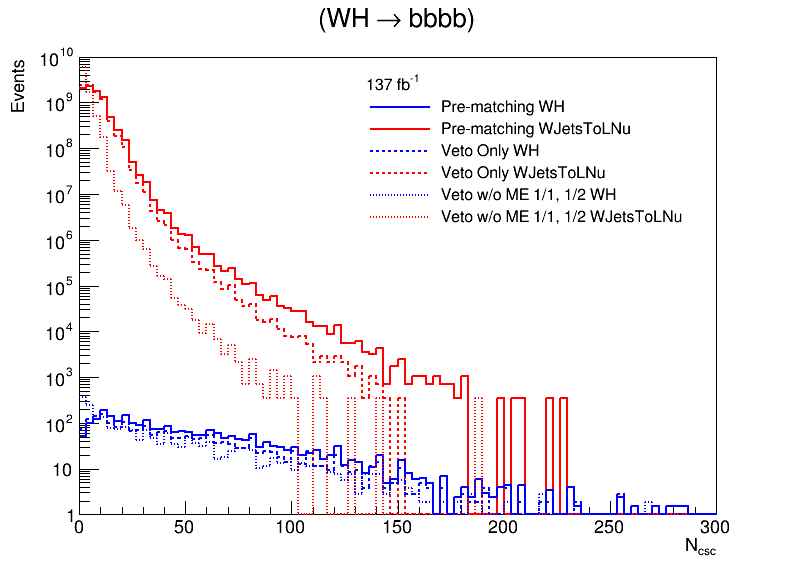

In [440]:
# Creates a comparative 1D histogram for the number of CSC hits for the m55ct10m signal MC and WJetsToLNu MC between the baseline and punch-through vetoing

c_2 = rt.TCanvas('c_2','c_2', 800, 600)

h['n_match_m55ct10m_wh_bbbb'] = create_TH1D(nCsc_jetMatch['m55ct10m_wh_bbbb']['inclusive'], axis_title=['n_match_m55ct10m_wh_bbbb', 'Events'], name='n_match_m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m_prime)
h['n_match_m55ct10m_wh_bbbb'].SetLineColor(4)
h['n_match_m55ct10m_wh_bbbb'].SetLineStyle(2)

h['n_match_wjets'] = create_TH1D(nCsc_jetMatch['WJetsToLNu']['inclusive'], axis_title=['n_match_wjets', 'Events'], name='n_match_wjets', binning=[150,0,500], weights=weight_WJetsToLNu_prime)
h['n_match_wjets'].SetLineColor(2)
h['n_match_wjets'].SetLineStyle(2)

h['n_noMatch_m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['n_noMatch_m55ct10m_wh_bbbb'].SetLineColor(4)

h['n_noMatch_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['n_noMatch_wjets'].SetLineColor(2)

h['n_good_m55ct10m_wh_bbbb'] = create_TH1D(nCsc_jetMatch['m55ct10m_wh_bbbb']['ME_12'], axis_title=['m55ct10m_wh_bbbb_no112', 'Events'], name='m55ct10m_wh_bbbb_no112', binning=[150,0,500], weights = weight_m55ct10m_prime)
h['n_good_m55ct10m_wh_bbbb'].SetLineColor(4)
h['n_good_m55ct10m_wh_bbbb'].SetLineStyle(3)

h['n_good_wjets'] = create_TH1D(nCsc_jetMatch['WJetsToLNu']['ME_12'], axis_title=['nCsc_wjets_no112', 'Events'], name='nCsc_wjets_no112', binning=[150,0,500], weights = weight_WJetsToLNu_prime)
h['n_good_wjets'].SetLineColor(2)
h['n_good_wjets'].SetLineStyle(3)

c_2.SetLogy()


h['n_noMatch_wjets'].SetLineWidth(2)
h['n_match_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_match_wjets'].SetLineWidth(2)
h['n_noMatch_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_good_wjets'].SetLineWidth(2)
h['n_good_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_match_wjets'].GetXaxis().SetRangeUser(0,300)
h['n_match_wjets'].GetYaxis().SetRangeUser(1,10**10)


h['n_match_wjets'].SetStats(0)
h['n_match_wjets'].SetTitle("(WH #rightarrow bbbb)")
h['n_match_wjets'].SetXTitle("N_{csc}")


h['n_match_wjets'].Draw('histo')
h['n_match_m55ct10m_wh_bbbb'].Draw('histo+same')
h['n_noMatch_wjets'].Draw('histo+same')
h['n_noMatch_m55ct10m_wh_bbbb'].Draw('histo+same')
h['n_good_wjets'].Draw('histo+same')
h['n_good_m55ct10m_wh_bbbb'].Draw('histo+same')


legend = rt.TLegend(0.45,0.60,0.87,0.87);
legend.SetHeader("137 fb^{-1}")
legend.SetTextSize(0.03);
legend.SetBorderSize(0);
legend.AddEntry( h['n_noMatch_m55ct10m_wh_bbbb'], "Pre-matching WH" , "L");
legend.AddEntry( h['n_noMatch_wjets'], "Pre-matching WJetsToLNu" , "L");
legend.AddEntry( h['n_match_m55ct10m_wh_bbbb'], "Veto Only WH" , "L");
legend.AddEntry( h['n_match_wjets'], "Veto Only WJetsToLNu" , "L");
legend.AddEntry( h['n_good_m55ct10m_wh_bbbb'], "Veto w/o ME 1/1, 1/2 WH" , "L");
legend.AddEntry( h['n_good_wjets'], "Veto w/o ME 1/1, 1/2 WJetsToLNu" , "L");

legend.Draw();

c_2.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

In [456]:
threshold_count = 170
print(np.count_nonzero(np.array(nCsc_jetMatch['m55ct10m_wh_bbbb']['ME_12']) > threshold_count))
print(np.count_nonzero(np.array(nCsc_jetMatch['WJetsToLNu']['ME_12']) > threshold_count))
print(np.count_nonzero(np.array(nCsc_jetMatch['m55ct10m_wh_bbbb']['inclusive']) > threshold_count))
print(np.count_nonzero(np.array(nCsc['m55ct10m_wh_bbbb']) > threshold_count))

30
1
42
47


### Comparison of Strategy II to Baseline via N<sub>CSC</sub> Threshold ROC Curves

### *Calculation*

In [441]:
# ROC Curve for WH/WJetsToLNu Samples: nCsc 

for data_type in data_trees.keys():
    eff_ncsc[data_type]['matching'] = {}
    eff_ncsc[data_type]['matching']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['matching']['no_ME11'] = np.array([])
    eff_ncsc[data_type]['matching']['no_ME112'] = np.array([])
    
    for hit_thresh in range(0, 200):

       # Matching ROCs
        eff_ncsc[data_type]['matching']['csc_inclusive'] = np.append(eff_ncsc[data_type]['matching']['csc_inclusive'], np.count_nonzero(np.array(nCsc_jetMatch[data_type]['inclusive'])>hit_thresh)/len(nCsc_jetMatch[data_type]['inclusive']))
        eff_ncsc[data_type]['matching']['no_ME11'] = np.append(eff_ncsc[data_type]['matching']['no_ME11'], np.count_nonzero(np.array(nCsc_jetMatch[data_type]['ME_11'])>hit_thresh)/len(nCsc_jetMatch[data_type]['ME_11']))
        eff_ncsc[data_type]['matching']['no_ME112'] = np.append(eff_ncsc[data_type]['matching']['no_ME112'], np.count_nonzero(np.array(nCsc_jetMatch[data_type]['ME_12'])>hit_thresh)/len(nCsc_jetMatch[data_type]['ME_12']))

        
        print(str(hit_thresh) + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
    # Rejection power calculation
    rejection_power[data_type]['matching'] = {}
    
    # Matching
    rejection_power[data_type]['matching']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['matching']['csc_inclusive']))
    rejection_power[data_type]['matching']['no_ME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['matching']['no_ME11']))
    rejection_power[data_type]['matching']['no_ME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['matching']['no_ME112']))
   
    
    print(data_type + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-23 23:54:57.637783-07:00
1: 2019-08-23 23:54:57.638420-07:00
2: 2019-08-23 23:54:57.639001-07:00
3: 2019-08-23 23:54:57.639452-07:00
4: 2019-08-23 23:54:57.639926-07:00
5: 2019-08-23 23:54:57.640368-07:00
6: 2019-08-23 23:54:57.640952-07:00
7: 2019-08-23 23:54:57.642334-07:00
8: 2019-08-23 23:54:57.642802-07:00
9: 2019-08-23 23:54:57.643474-07:00
10: 2019-08-23 23:54:57.643929-07:00
11: 2019-08-23 23:54:57.644677-07:00
12: 2019-08-23 23:54:57.645243-07:00
13: 2019-08-23 23:54:57.645698-07:00
14: 2019-08-23 23:54:57.646372-07:00
15: 2019-08-23 23:54:57.647000-07:00
16: 2019-08-23 23:54:57.647442-07:00
17: 2019-08-23 23:54:57.648126-07:00
18: 2019-08-23 23:54:57.648576-07:00
19: 2019-08-23 23:54:57.649016-07:00
20: 2019-08-23 23:54:57.649914-07:00
21: 2019-08-23 23:54:57.650362-07:00
22: 2019-08-23 23:54:57.651044-07:00
23: 2019-08-23 23:54:57.651637-07:00
24: 2019-08-23 23:54:57.652094-07:00
25: 2019-08-23 23:54:57.652617-07:00
26: 2019-08-23 23:54:57.653319-07:00
27: 2019-08

173: 2019-08-23 23:54:57.841315-07:00
174: 2019-08-23 23:54:57.842189-07:00
175: 2019-08-23 23:54:57.842627-07:00
176: 2019-08-23 23:54:57.843384-07:00
177: 2019-08-23 23:54:57.843897-07:00
178: 2019-08-23 23:54:57.844445-07:00
179: 2019-08-23 23:54:57.845131-07:00
180: 2019-08-23 23:54:57.845652-07:00
181: 2019-08-23 23:54:57.846165-07:00
182: 2019-08-23 23:54:57.846674-07:00
183: 2019-08-23 23:54:57.847175-07:00
184: 2019-08-23 23:54:57.847715-07:00
185: 2019-08-23 23:54:57.848218-07:00
186: 2019-08-23 23:54:57.848728-07:00
187: 2019-08-23 23:54:57.849227-07:00
188: 2019-08-23 23:54:57.849636-07:00
189: 2019-08-23 23:54:57.850224-07:00
190: 2019-08-23 23:54:57.850731-07:00
191: 2019-08-23 23:54:57.851230-07:00
192: 2019-08-23 23:54:57.851736-07:00
193: 2019-08-23 23:54:57.852236-07:00
194: 2019-08-23 23:54:57.852740-07:00
195: 2019-08-23 23:54:57.853242-07:00
196: 2019-08-23 23:54:57.853656-07:00
197: 2019-08-23 23:54:57.854223-07:00
198: 2019-08-23 23:54:57.854728-07:00
199: 2019-08

191: 2019-08-24 00:18:11.805462-07:00
192: 2019-08-24 00:18:19.018813-07:00
193: 2019-08-24 00:18:26.224433-07:00
194: 2019-08-24 00:18:33.427082-07:00
195: 2019-08-24 00:18:40.624960-07:00
196: 2019-08-24 00:18:47.827249-07:00
197: 2019-08-24 00:18:55.034891-07:00
198: 2019-08-24 00:19:02.242658-07:00
199: 2019-08-24 00:19:09.456969-07:00
WJetsToLNu: 2019-08-24 00:19:09.457161-07:00


### *Combination of Efficiencies/Rejection Powers for WH Signal Sample*

In [442]:
for llave in eff_ncsc['m55ct10m_wh_bbbb_minus'].keys():
#     print(llave)
    eff_ncsc['m55ct10m_wh_bbbb'][llave] = {}
    for cle in eff_ncsc['m55ct10m_wh_bbbb_minus'][llave].keys():
#         print(eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle])
        eff_ncsc['m55ct10m_wh_bbbb'][llave][cle] = np.concatenate([eff_ncsc['m55ct10m_wh_bbbb_minus'][llave][cle], eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle]])

### *ROC Curve Plot*

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_roc2
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


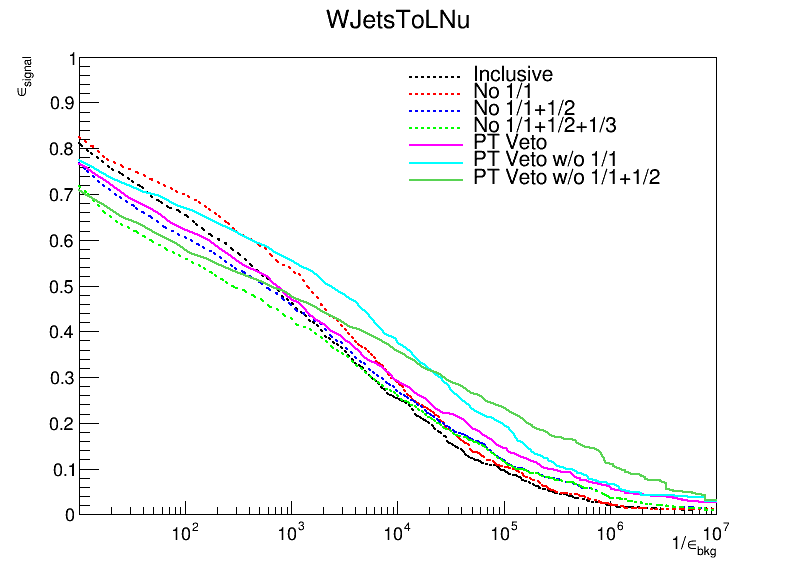

In [443]:
# Creates ROC curves for the signal efficiency of the m55ct10m signal sample against the WJetsToLNu samples using nCsc thresholds comparing baseline with Strategy II

c_roc2 = rt.TCanvas('c_roc2','c_roc2', 800, 600)

h['roc_curve_matching'] = create_TGraph(rejection_power['WJetsToLNu']['matching']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['matching']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_matching_no11'] = create_TGraph(rejection_power['WJetsToLNu']['matching']['no_ME11'], eff_ncsc['m55ct10m_wh_bbbb']['matching']['no_ME11'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_matching_no112'] = create_TGraph(rejection_power['WJetsToLNu']['matching']['no_ME112'], eff_ncsc['m55ct10m_wh_bbbb']['matching']['no_ME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])


c_roc2.SetLogx()

h['roc_curve_matching'].SetLineWidth(2)
h['roc_curve_matching'].SetLineColor(6)

h['roc_curve_matching_no11'].SetLineWidth(2)
h['roc_curve_matching_no11'].SetLineColor(7)

h['roc_curve_matching_no112'].SetLineWidth(2)
h['roc_curve_matching_no112'].SetLineColor(8)

h['roc_curve_baseline'].Draw()
h['roc_curve_no11'].Draw('same')
h['roc_curve_no112'].Draw('same')
h['roc_curve_no113'].Draw('same')
h['roc_curve_matching'].Draw('same')
h['roc_curve_matching_no11'].Draw('same')
h['roc_curve_matching_no112'].Draw('same')


legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_baseline'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_no11'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_no112'], "No 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_no113'], "No 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_matching'], "PT Veto", 'l');
legend.AddEntry( h['roc_curve_matching_no11'], "PT Veto w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_matching_no112'], "PT Veto w/o 1/1+1/2", 'l');


legend.Draw();

c_roc2.Draw()

## Strategy III: Fast Jet Clustering

### Initialize Unweighted (p<sub>T</sub>, mass) Variables [Irrelevant to Cam/Aachen clustering]

In [31]:
fake_pt_csc = {}
fake_mass_csc = {}

print('Start: ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species in data_trees.keys():
    event_empty = np.copy(csc_z[species])*(-999)
    fake_pt_csc[species] = event_empty
    fake_mass_csc[species] = event_empty
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-21 20:49:56.422313-07:00
m55ct10m_wh_bbbb_minus: 2019-08-21 20:49:56.425722-07:00
m55ct10m_wh_bbbb_plus: 2019-08-21 20:49:56.428996-07:00
WJetsToLNu: 2019-08-21 20:50:59.292763-07:00


### Create Structured Data Arrays

In [32]:
cluster_dataset = {}

print('Start: ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species in data_trees.keys():
    cluster_dataset[species] = np.dstack((fake_pt_csc[species], csc_eta[species], csc_phi[species], fake_mass_csc[species], csc_z[species]))

    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-21 20:50:59.492233-07:00
m55ct10m_wh_bbbb_minus: 2019-08-21 20:50:59.495630-07:00
m55ct10m_wh_bbbb_plus: 2019-08-21 20:50:59.498680-07:00
WJetsToLNu: 2019-08-21 20:52:05.173032-07:00


### Algorithm Call: https://github.com/scikit-hep/pyjet

In [33]:
# Action plan: Save pseudojets as [eta, phi, ncsc], remake jet matching to loop over CSC hit clusters instead of CSC hits

In [ ]:
csc_clusters = {}
ncsc_cluster = {}

print('Start: ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species in data_trees.keys():
    csc_clusters[species] = []
    ncsc_cluster[species] = []
    for hit_seq in range(len(csc_z[species])):
#         event_clusters = []
        test_data_0 = np.dstack(cluster_dataset[species][0][hit_seq])[0].astype(np.float64)
        test_data_0 = np.core.records.fromarrays(test_data_0.transpose(), names='pT, eta, phi, mass, z_pos', formats = 'f8, f8, f8, f8, f8')
        sequence_0 = cluster(test_data_0, R=0.4, p=0)
        jets = sequence_0.inclusive_jets()
#         event_clusters.append(jets)
#         csc_clusters[species].append(event_clusters)
        csc_clusters[species].append(jets)

        total_hits = 0
        for cluster_hits in range(len(jets)):
            if len(jets[cluster_hits].constituents_array()) > 3:
                total_hits += len(jets[cluster_hits].constituents_array())
        ncsc_cluster[species].append(total_hits)
    
    
        if (hit_seq % 10000) == 0:
            print(str(hit_seq) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    
    print(species + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-21 20:52:05.434141-07:00
0: 2019-08-21 20:52:05.445780-07:00
m55ct10m_wh_bbbb_minus: 2019-08-21 20:52:06.475158-07:00
0: 2019-08-21 20:52:06.475664-07:00
m55ct10m_wh_bbbb_plus: 2019-08-21 20:52:07.136345-07:00
0: 2019-08-21 20:52:07.137156-07:00
10000: 2019-08-21 20:52:09.629262-07:00
20000: 2019-08-21 20:52:13.087310-07:00
30000: 2019-08-21 20:52:16.428107-07:00
40000: 2019-08-21 20:52:18.950635-07:00
50000: 2019-08-21 20:52:22.545265-07:00
60000: 2019-08-21 20:52:25.094799-07:00
70000: 2019-08-21 20:52:28.466166-07:00
80000: 2019-08-21 20:52:31.027481-07:00
90000: 2019-08-21 20:52:33.630791-07:00
100000: 2019-08-21 20:52:36.160083-07:00
110000: 2019-08-21 20:52:39.596708-07:00
120000: 2019-08-21 20:52:41.954390-07:00
130000: 2019-08-21 20:52:44.305317-07:00
140000: 2019-08-21 20:52:47.656462-07:00
150000: 2019-08-21 20:52:50.018571-07:00
160000: 2019-08-21 20:52:52.378689-07:00
170000: 2019-08-21 20:52:54.755525-07:00
180000: 2019-08-21 20:52:57.133199-07:00
190000: 20

1930000: 2019-08-21 21:00:10.132072-07:00
1940000: 2019-08-21 21:00:12.579477-07:00
1950000: 2019-08-21 21:00:15.074972-07:00
1960000: 2019-08-21 21:00:17.526592-07:00
1970000: 2019-08-21 21:00:19.951157-07:00
1980000: 2019-08-21 21:00:22.320784-07:00
1990000: 2019-08-21 21:00:24.705299-07:00
2000000: 2019-08-21 21:00:27.070162-07:00
2010000: 2019-08-21 21:00:29.442581-07:00
2020000: 2019-08-21 21:00:32.078881-07:00
2030000: 2019-08-21 21:00:34.446478-07:00
2040000: 2019-08-21 21:00:36.813252-07:00
2050000: 2019-08-21 21:00:39.258141-07:00
2060000: 2019-08-21 21:00:41.656082-07:00
2070000: 2019-08-21 21:00:44.127652-07:00
2080000: 2019-08-21 21:00:46.804083-07:00
2090000: 2019-08-21 21:00:49.176117-07:00
2100000: 2019-08-21 21:00:51.555616-07:00
2110000: 2019-08-21 21:00:53.937685-07:00
2120000: 2019-08-21 21:00:56.311973-07:00
2130000: 2019-08-21 21:00:58.680948-07:00
2140000: 2019-08-21 21:01:03.403313-07:00
2150000: 2019-08-21 21:01:06.072959-07:00
2160000: 2019-08-21 21:01:08.51389

3890000: 2019-08-21 21:08:08.033235-07:00
3900000: 2019-08-21 21:08:10.479046-07:00
3910000: 2019-08-21 21:08:12.948598-07:00
3920000: 2019-08-21 21:08:15.345434-07:00
3930000: 2019-08-21 21:08:17.728800-07:00
3940000: 2019-08-21 21:08:20.143744-07:00
3950000: 2019-08-21 21:08:22.577782-07:00
3960000: 2019-08-21 21:08:24.976887-07:00
3970000: 2019-08-21 21:08:27.346014-07:00
3980000: 2019-08-21 21:08:29.700646-07:00
3990000: 2019-08-21 21:08:32.074359-07:00
4000000: 2019-08-21 21:08:34.447268-07:00
4010000: 2019-08-21 21:08:36.813069-07:00
4020000: 2019-08-21 21:08:39.191568-07:00
4030000: 2019-08-21 21:08:41.546296-07:00
4040000: 2019-08-21 21:08:43.904604-07:00
4050000: 2019-08-21 21:08:46.262083-07:00
4060000: 2019-08-21 21:08:48.675247-07:00
4070000: 2019-08-21 21:08:51.028258-07:00
4080000: 2019-08-21 21:08:53.379255-07:00
4090000: 2019-08-21 21:08:55.738986-07:00
4100000: 2019-08-21 21:08:58.140075-07:00
4110000: 2019-08-21 21:09:00.598851-07:00
4120000: 2019-08-21 21:09:03.05919

5850000: 2019-08-21 21:16:06.484139-07:00
5860000: 2019-08-21 21:16:08.873215-07:00
5870000: 2019-08-21 21:16:11.261408-07:00
5880000: 2019-08-21 21:16:13.661375-07:00
5890000: 2019-08-21 21:16:16.032454-07:00
5900000: 2019-08-21 21:16:18.406344-07:00
5910000: 2019-08-21 21:16:20.784656-07:00
5920000: 2019-08-21 21:16:23.150738-07:00
5930000: 2019-08-21 21:16:25.520519-07:00
5940000: 2019-08-21 21:16:27.900514-07:00
5950000: 2019-08-21 21:16:30.279573-07:00
5960000: 2019-08-21 21:16:32.656189-07:00
5970000: 2019-08-21 21:16:35.036753-07:00
5980000: 2019-08-21 21:16:37.417580-07:00
5990000: 2019-08-21 21:16:39.792001-07:00
6000000: 2019-08-21 21:16:42.171042-07:00
6010000: 2019-08-21 21:16:44.549004-07:00
6020000: 2019-08-21 21:16:46.948021-07:00
6030000: 2019-08-21 21:16:49.332059-07:00
6040000: 2019-08-21 21:16:51.719416-07:00
6050000: 2019-08-21 21:16:54.096051-07:00
6060000: 2019-08-21 21:16:56.484365-07:00
6070000: 2019-08-21 21:16:58.878614-07:00
6080000: 2019-08-21 21:17:01.26029

7810000: 2019-08-21 21:24:01.583568-07:00
7820000: 2019-08-21 21:24:03.955029-07:00
7830000: 2019-08-21 21:24:06.314920-07:00
7840000: 2019-08-21 21:24:08.677024-07:00
7850000: 2019-08-21 21:24:11.136947-07:00
7860000: 2019-08-21 21:24:13.820237-07:00
7870000: 2019-08-21 21:24:16.197707-07:00
7880000: 2019-08-21 21:24:18.597302-07:00
7890000: 2019-08-21 21:24:20.960695-07:00
7900000: 2019-08-21 21:24:23.337441-07:00
7910000: 2019-08-21 21:24:25.719856-07:00
7920000: 2019-08-21 21:24:28.088060-07:00
7930000: 2019-08-21 21:24:30.458880-07:00
7940000: 2019-08-21 21:24:32.845295-07:00
7950000: 2019-08-21 21:24:35.215478-07:00
7960000: 2019-08-21 21:24:37.594505-07:00
7970000: 2019-08-21 21:24:39.964776-07:00
7980000: 2019-08-21 21:24:42.358787-07:00
7990000: 2019-08-21 21:24:44.762532-07:00
8000000: 2019-08-21 21:24:47.151340-07:00
8010000: 2019-08-21 21:24:49.548381-07:00
8020000: 2019-08-21 21:24:51.935055-07:00
8030000: 2019-08-21 21:24:54.304589-07:00
8040000: 2019-08-21 21:24:56.67807

9770000: 2019-08-21 21:32:00.515017-07:00
9780000: 2019-08-21 21:32:02.883258-07:00
9790000: 2019-08-21 21:32:05.282346-07:00
9800000: 2019-08-21 21:32:07.686595-07:00
9810000: 2019-08-21 21:32:10.058793-07:00
9820000: 2019-08-21 21:32:12.506668-07:00
9830000: 2019-08-21 21:32:15.148999-07:00
9840000: 2019-08-21 21:32:17.517519-07:00
9850000: 2019-08-21 21:32:19.889961-07:00
9860000: 2019-08-21 21:32:22.263789-07:00
9870000: 2019-08-21 21:32:24.628843-07:00
9880000: 2019-08-21 21:32:27.000897-07:00
9890000: 2019-08-21 21:32:29.375132-07:00
9900000: 2019-08-21 21:32:31.763435-07:00
9910000: 2019-08-21 21:32:34.143087-07:00
9920000: 2019-08-21 21:32:36.524080-07:00
9930000: 2019-08-21 21:32:38.901053-07:00
9940000: 2019-08-21 21:32:41.275821-07:00
9950000: 2019-08-21 21:32:43.650700-07:00
9960000: 2019-08-21 21:32:46.033032-07:00
9970000: 2019-08-21 21:32:48.417242-07:00
9980000: 2019-08-21 21:32:50.805002-07:00
9990000: 2019-08-21 21:32:53.194652-07:00
10000000: 2019-08-21 21:32:55.5667

11690000: 2019-08-21 21:39:44.702324-07:00
11700000: 2019-08-21 21:39:47.056467-07:00
11710000: 2019-08-21 21:39:49.411256-07:00
11720000: 2019-08-21 21:39:51.779041-07:00
11730000: 2019-08-21 21:39:54.131487-07:00
11740000: 2019-08-21 21:39:56.489499-07:00
11750000: 2019-08-21 21:39:58.830545-07:00
11760000: 2019-08-21 21:40:01.185138-07:00
11770000: 2019-08-21 21:40:03.522512-07:00
11780000: 2019-08-21 21:40:05.871690-07:00
11790000: 2019-08-21 21:40:08.226891-07:00
11800000: 2019-08-21 21:40:10.579281-07:00
11810000: 2019-08-21 21:40:12.926600-07:00
11820000: 2019-08-21 21:40:15.267471-07:00
11830000: 2019-08-21 21:40:17.610533-07:00
11840000: 2019-08-21 21:40:19.947399-07:00
11850000: 2019-08-21 21:40:22.285675-07:00
11860000: 2019-08-21 21:40:24.632155-07:00
11870000: 2019-08-21 21:40:26.981396-07:00
11880000: 2019-08-21 21:40:29.332007-07:00
11890000: 2019-08-21 21:40:31.686070-07:00
11900000: 2019-08-21 21:40:34.040372-07:00
11910000: 2019-08-21 21:40:36.392070-07:00
11920000: 2

13600000: 2019-08-21 21:47:39.697387-07:00
13610000: 2019-08-21 21:47:49.232384-07:00
13620000: 2019-08-21 21:47:51.722181-07:00
13630000: 2019-08-21 21:47:54.129397-07:00
13640000: 2019-08-21 21:47:56.532494-07:00
13650000: 2019-08-21 21:47:58.937576-07:00
13660000: 2019-08-21 21:48:01.403070-07:00
13670000: 2019-08-21 21:48:03.776081-07:00
13680000: 2019-08-21 21:48:06.163436-07:00
13690000: 2019-08-21 21:48:08.647704-07:00
13700000: 2019-08-21 21:48:11.200040-07:00
13710000: 2019-08-21 21:48:13.680059-07:00
13720000: 2019-08-21 21:48:16.155822-07:00
13730000: 2019-08-21 21:48:18.534333-07:00
13740000: 2019-08-21 21:48:20.971086-07:00
13750000: 2019-08-21 21:48:30.745418-07:00
13760000: 2019-08-21 21:48:34.382345-07:00
13770000: 2019-08-21 21:48:46.270540-07:00
13780000: 2019-08-21 21:48:48.871344-07:00
13790000: 2019-08-21 21:48:54.008087-07:00
13800000: 2019-08-21 21:48:58.034782-07:00
13810000: 2019-08-21 21:49:01.224381-07:00
13820000: 2019-08-21 21:49:03.605935-07:00
13830000: 2

### Combination of Variables for WH Signal Sample

In [ ]:
csc_clusters['m55ct10m_wh_bbbb'] = np.concatenate([csc_clusters['m55ct10m_wh_bbbb_minus'], csc_clusters['m55ct10m_wh_bbbb_plus']])
ncsc_cluster['m55ct10m_wh_bbbb'] = np.concatenate([ncsc_cluster['m55ct10m_wh_bbbb_minus'], ncsc_cluster['m55ct10m_wh_bbbb_plus']])

### Comparison Histogram between Baseline and Strategy III

In [ ]:
# Creates a comparative 1D histogram for the number of CSC hits for the m55ct10m signal MC and WJetsToLNu MC between the baseline and FastJet clustering

c_3 = rt.TCanvas('c','c', 800, 600)


h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)

h['m55ct10m_wh_bbbb_cluster'] = create_TH1D(ncsc_cluster['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb_cluster', 'Events'], name='m55ct10m_wh_bbbb_cluster', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_cluster'].SetLineColor(4)
h['m55ct10m_wh_bbbb_cluster'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)

h['nCsc_wjets_cluster'] = create_TH1D(ncsc_cluster['WJetsToLNu'], axis_title=['nCsc_wjets_cluster', 'Events'], name='nCsc_wjets_cluster', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets_cluster'].SetLineColor(2)
h['nCsc_wjets_cluster'].SetLineStyle(2)

c_3.SetLogy()

h['m55ct10m_wh_bbbb'].SetLineWidth(2)
h['m55ct10m_wh_bbbb_cluster'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
h['nCsc_wjets_cluster'].SetLineWidth(2)

h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)
h['nCsc_wjets'].GetXaxis().SetRangeUser(0,225)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
h['m55ct10m_wh_bbbb'].Draw('histo+same')
h['nCsc_wjets_cluster'].Draw('histo+same')
h['m55ct10m_wh_bbbb_cluster'].Draw('histo+same')


legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.AddEntry( h['m55ct10m_wh_bbbb'], "Signal w/o clustering" , "L");
legend.AddEntry( h['nCsc_wjets'], "Bkg w/o clustering" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_cluster'], "Signal with clustering" , "L");
legend.AddEntry( h['nCsc_wjets_cluster'], "Bkg with clustering" , "L");

legend.Draw();

c_3.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

### Comparison of Strategy III to Baseline via N<sub>CSC</sub> Threshold ROC Curves

### *Calculation*

In [ ]:
# ROC Curve for WH/WJetsToLNu Samples: nCsc 

for data_type in data_trees.keys():
    eff_ncsc[data_type]['cluster'] = {}
    eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.array([])
    
    for hit_thresh in range(0, 200):

       # Clustering ROCs
        eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['cluster']['csc_inclusive'], np.count_nonzero(np.array(ncsc_cluster[data_type])>hit_thresh)/len(ncsc_cluster[data_type]))
     
        print(str(hit_thresh) + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
    # Rejection power calculation
    rejection_power[data_type]['cluster'] = {}
    
    # Matching
    rejection_power[data_type]['cluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_inclusive']))
   
    
    print(data_type + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

### *Combination of Efficiencies/Rejection Powers for WH Signal Sample*

In [ ]:
eff_ncsc['m55ct10m_wh_bbbb'] = {}
for llave in eff_ncsc['m55ct10m_wh_bbbb_minus'].keys():
    eff_ncsc['m55ct10m_wh_bbbb'][llave] = {}
    for cle in eff_ncsc['m55ct10m_wh_bbbb_minus'][llave].keys():
        eff_ncsc['m55ct10m_wh_bbbb'][llave][cle] = np.concatenate([eff_ncsc['m55ct10m_wh_bbbb_minus'][llave][cle], eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle]])

### *ROC Curve Plot*

In [ ]:
# Creates ROC curves for the signal efficiency of the m55ct10m signal sample against the WJetsToLNu samples using nCsc thresholds comparing baseline with Strategy III

c_roc3 = rt.TCanvas('c_roc3','c_roc3', 800, 600)

h['roc_curve_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])


c_roc3.SetLogx()

h['roc_curve_cluster'].SetLineWidth(2)
h['roc_curve_cluster'].SetLineColor(8)

h['roc_curve_baseline'].Draw()
h['roc_curve_no11'].Draw('same')
h['roc_curve_no112'].Draw('same')
h['roc_curve_no113'].Draw('same')
h['roc_curve_matching'].Draw('same')
h['roc_curve_cluster'].Draw('same')


legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_baseline'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_no11'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_no112'], "No 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_no113'], "No 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_matching'], "Punch-through Veto", 'l');
legend.AddEntry( h['roc_curve_cluster'], "FastJet Clustering", 'l');


legend.Draw();

c_roc3.Draw()

## Strategy IV: Punch-through vetoing with FastJet Clustering

**=========================================================================================================================================================================**

## Clustering Demonstration: Implemented via k-means

### Algorithm: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

In [96]:
# k-means clustering algorithm
# For more information, check out https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

MAX_ITERATIONS = 100
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return np.array_equal(oldCentroids,centroids) and iterations > 0


# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids, i):
    #print 1
    #for i in dataSet:
    dist = cdist( dataSet, centroids, metric='euclidean' )
    
    #print dist
    if i < 1:
        dist[dist>1.0] = 999
    elif i < 2:
        dist[dist>0.8] = 999
    else:
        dist[dist>0.4] = 999
        
    #print dist
    #print np.argmin(dist, axis=1)
    return np.argmin(dist, axis=1)
    #print dataSet
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmeans(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.average(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getRandomCentroids():
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    even_list = np.linspace(-4.0, 4.0, num=5)
    centers  = np.empty((0,2))
    for i in even_list:
        for j in even_list:
            #print i,j
            new_arr = np.array([i,j])
            centers = np.append(centers,[new_arr],axis=0)
    #print centers
    return centers
    #return np.mgrid[-4:4.1:2, -4:4.1:2].reshape(2,-1).T
    #return np.random.rand(k,numFeatures)

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

####################################################################################################

# k-medians Algorithm
# -------------
# k-medians is equivalent algorithm to k-means except it calculates the median instead of the average

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmedians(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.median(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric median of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.

# Function: K Medians
# -------------
# K-medians is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmedians(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

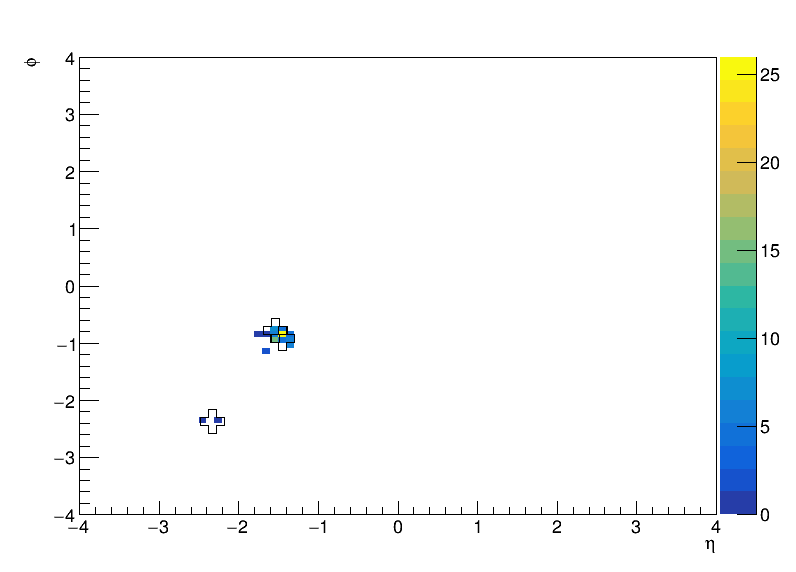

In [97]:
evt_idx = 0

c_cluster = rt.TCanvas('c_cluster','c_cluster', 800, 600)
h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_phi['m55ct10m_wh_bbbb'][evt_idx])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])

## Scrapped due to np.logical_and discovery
# Resulting implementation of eventNum
#h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta_dis[event4][0],csc_phi_dis[event4][0])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])


c_cluster.SetLogy(0)
h['eta_phi_0'].SetStats(0)
c_cluster.cd()
#h['eta_phi_0'].SetStats(0)
h['eta_phi_0'].Draw("colz")


#test_dataset = np.vstack((csc_eta_prompt[evt_idx],csc_phi_prompt[evt_idx])).T

test_dataset = np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_phi['m55ct10m_wh_bbbb'][evt_idx])).T
#print(test_dataset)
#print test_dataset.ndim
#print len(csc_eta_prompt[evt_idx])
centroids_t,centroid_constituents_t = kmeans(test_dataset,25)
# print(centroids_t)

ll = 0
xx = []
yy = []
nn = 0
for nc in centroid_constituents_t:
    if nc > 0:
        nn += 1
        xx.append(centroids_t[ll,0])
        yy.append(centroids_t[ll,1])
    ll += 1


tg = rt.TGraph(nn)
for ii in range(nn):
    tg.SetPoint(ii,xx[ii],yy[ii])
#     print(xx[ii],yy[ii])


tg.SetMarkerSize(3)
tg.SetMarkerStyle(28)
tg.Draw("P0+same")


c_cluster.Draw()

**=========================================================================================================================================================================**

# Auxiliary Jet/Electron/Muon Variables

## Number of Jets

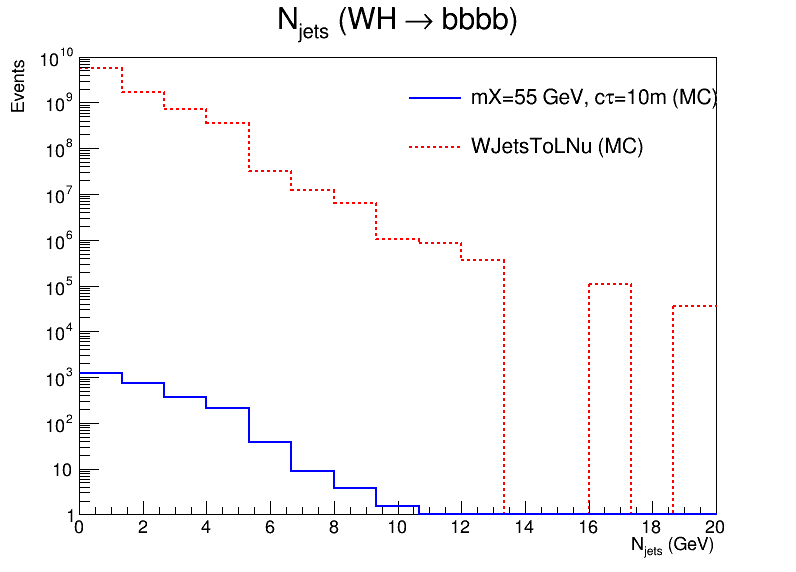

In [101]:
c_njets = rt.TCanvas('c_njets','c_njets', 800, 600)

h['nJets_m55ct10m_wh_bbbb'] = create_TH1D(nJets['m55ct10m_wh_bbbb'], axis_title=['nJets_m55ct10m_wh_bbbb', 'Events'], name='nJets_m55ct10m_wh_bbbb', binning=[15,0,20], weights=weight_m55ct10m)
h['nJets_m55ct10m_wh_bbbb'].SetLineColor(4)

h['nJets_WJetsToLNu'] = create_TH1D(nJets['WJetsToLNu'], axis_title=['nJets_WJetsToLNu', 'Events'], name='nJets_WJetsToLNu', binning=[15,0,20], weights=weight_WJetsToLNu)
h['nJets_WJetsToLNu'].SetLineColor(2)
h['nJets_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_njets.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['nJets_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['nJets_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['nJets_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['nJets_WJetsToLNu'].GetXaxis().SetRangeUser(0,20)
h['nJets_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['nJets_WJetsToLNu'].SetStats(0)
h['nJets_WJetsToLNu'].SetTitle("N_{jets} (WH #rightarrow bbbb)")
h['nJets_WJetsToLNu'].SetXTitle("N_{jets} (GeV)")


h['nJets_WJetsToLNu'].Draw('histo')
h['nJets_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['nJets_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nJets_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_njets.Draw()

## Maximum Jet p<sub>T</sub>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_jetpt


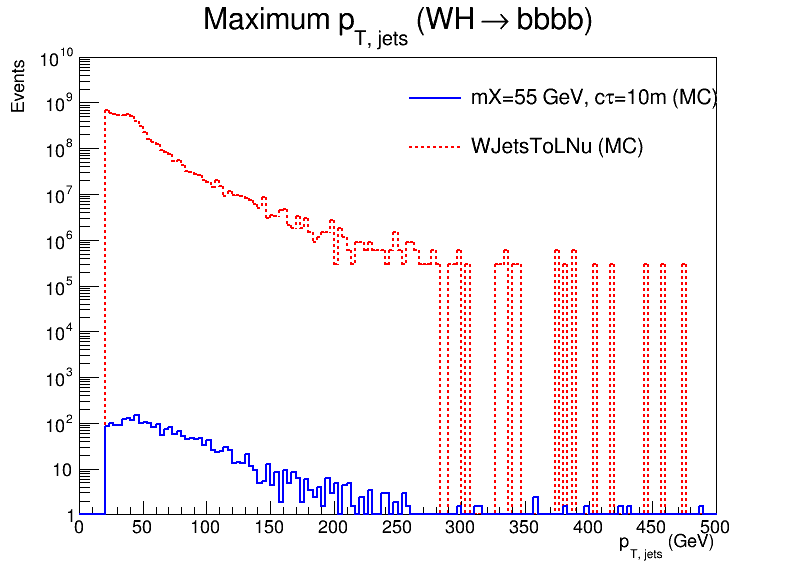

In [360]:
c_jetpt = rt.TCanvas('c_jetpt','c_jetpt', 800, 600)

h['max_jet_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_jet_pt['m55ct10m_wh_bbbb'], axis_title=['max_jet_pt_m55ct10m_wh_bbbb', 'Events'], name='max_jet_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
h['max_jet_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

h['max_jet_pt_WJetsToLNu'] = create_TH1D(max_jet_pt['WJetsToLNu'], axis_title=['max_jet_pt_WJetsToLNu', 'Events'], name='max_jet_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
h['max_jet_pt_WJetsToLNu'].SetLineColor(2)
h['max_jet_pt_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_jetpt.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['max_jet_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['max_jet_pt_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['max_jet_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['max_jet_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
h['max_jet_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['max_jet_pt_WJetsToLNu'].SetStats(0)
h['max_jet_pt_WJetsToLNu'].SetTitle("Maximum p_{T, jets} (WH #rightarrow bbbb)")
h['max_jet_pt_WJetsToLNu'].SetXTitle("p_{T, jets} (GeV)")


h['max_jet_pt_WJetsToLNu'].Draw('histo')
h['max_jet_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['max_jet_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['max_jet_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_jetpt.Draw()

## MET p<sub>T</sub> Distribution

In [98]:
# c_met = rt.TCanvas('c_met','c_met', 800, 600)

# h['MET_m55ct10m_wh_bbbb'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'], axis_title=['MET_m55ct10m_wh_bbbb', 'Events'], name='MET_m55ct10m_wh_bbbb', binning=[150,0,500])#, weights=weight_m55ct10m)
# h['MET_m55ct10m_wh_bbbb'].SetLineColor(4)

# h['MET_WJetsToLNu'] = create_TH1D(met_pt['WJetsToLNu'], axis_title=['MET_WJetsToLNu', 'Events'], name='MET_WJetsToLNu', binning=[150,0,500])#, weights=weight_WJetsToLNu)
# h['MET_WJetsToLNu'].SetLineColor(2)
# h['MET_WJetsToLNu'].SetLineStyle(2)


# # h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# # h['nCsc_zeroBias_noME11'].SetLineColor(2)
# # h['nCsc_zeroBias_noME11'].SetLineStyle(1)

# c_met.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# # h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


# h['MET_m55ct10m_wh_bbbb'].SetLineWidth(2)
# h['MET_WJetsToLNu'].SetLineWidth(2)
# # h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['MET_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
# h['MET_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
# # h['MET_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


# h['MET_WJetsToLNu'].SetStats(0)
# h['MET_WJetsToLNu'].SetTitle("MET p_{T} (WH #rightarrow bbbb)")
# h['MET_WJetsToLNu'].SetXTitle("MET p_{T} (GeV)")


# h['MET_WJetsToLNu'].Draw('histo')
# h['MET_m55ct10m_wh_bbbb'].Draw('histo+same')
# # h['nCsc_zeroBias_noME11'].Draw('histo+same')

# legend = rt.TLegend(0.50,0.70,0.87,0.87);
# legend.SetTextSize(0.04);
# legend.SetBorderSize(0);
# #legend-.SetFillStyle(0);
# legend.AddEntry( h['MET_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
# legend.AddEntry( h['MET_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# # legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

# legend.Draw();

# c_met.Draw()

## Number of Muons

In [100]:
# c_nmu = rt.TCanvas('c_nmu','c_nmu', 800, 600)

# h['nMu_m55ct10m_wh_bbbb'] = create_TH1D(nMuons['m55ct10m_wh_bbbb'], axis_title=['nMu_m55ct10m_wh_bbbb', 'Events'], name='nMu_m55ct10m_wh_bbbb', binning=[15,0,20], weights=weight_m55ct10m)
# h['nMu_m55ct10m_wh_bbbb'].SetLineColor(4)

# h['nMu_WJetsToLNu'] = create_TH1D(nMuons['WJetsToLNu'], axis_title=['nMu_WJetsToLNu', 'Events'], name='nMu_WJetsToLNu', binning=[15,0,20], weights=weight_WJetsToLNu)
# h['nMu_WJetsToLNu'].SetLineColor(2)
# h['nMu_WJetsToLNu'].SetLineStyle(2)


# # h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# # h['nCsc_zeroBias_noME11'].SetLineColor(2)
# # h['nCsc_zeroBias_noME11'].SetLineStyle(1)

# c_nmu.SetLogy()

# # h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# # h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# # h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


# h['nMu_m55ct10m_wh_bbbb'].SetLineWidth(2)
# h['nMu_WJetsToLNu'].SetLineWidth(2)
# # h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# # h['nMu_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
# h['nMu_WJetsToLNu'].GetXaxis().SetRangeUser(0,20)
# h['nMu_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


# h['nMu_WJetsToLNu'].SetStats(0)
# h['nMu_WJetsToLNu'].SetTitle("N_{#mu} (WH #rightarrow bbbb)")
# h['nMu_WJetsToLNu'].SetXTitle("N_{#mu} (GeV)")


# h['nMu_WJetsToLNu'].Draw('histo')
# h['nMu_m55ct10m_wh_bbbb'].Draw('histo+same')
# # h['nCsc_zeroBias_noME11'].Draw('histo+same')

# legend = rt.TLegend(0.50,0.70,0.87,0.87);
# legend.SetTextSize(0.04);
# legend.SetBorderSize(0);
# #legend-.SetFillStyle(0);
# legend.AddEntry( h['nMu_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
# legend.AddEntry( h['nMu_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# # legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

# legend.Draw();

# c_nmu.Draw()

## Maximum Muon p<sub>T</sub>

In [361]:
# c_muonpt = rt.TCanvas('c_muonpt','c_muonpt', 800, 600)

# h['max_muon_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_mu_pt['m55ct10m_wh_bbbb'], axis_title=['max_muon_pt_m55ct10m_wh_bbbb', 'Events'], name='max_muon_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
# h['max_muon_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

# h['max_muon_pt_WJetsToLNu'] = create_TH1D(max_mu_pt['WJetsToLNu'], axis_title=['max_muon_pt_WJetsToLNu', 'Events'], name='max_muon_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
# h['max_muon_pt_WJetsToLNu'].SetLineColor(2)
# h['max_muon_pt_WJetsToLNu'].SetLineStyle(2)


# # h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# # h['nCsc_zeroBias_noME11'].SetLineColor(2)
# # h['nCsc_zeroBias_noME11'].SetLineStyle(1)

# c_muonpt.SetLogy()

# # h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# # h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# # h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


# h['max_muon_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
# h['max_muon_pt_WJetsToLNu'].SetLineWidth(2)
# # h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# # h['max_muon_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
# h['max_muon_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
# h['max_muon_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


# h['max_muon_pt_WJetsToLNu'].SetStats(0)
# h['max_muon_pt_WJetsToLNu'].SetTitle("Maximum p_{T, #mu} (WH #rightarrow bbbb)")
# h['max_muon_pt_WJetsToLNu'].SetXTitle("p_{T, #mu} (GeV)")


# h['max_muon_pt_WJetsToLNu'].Draw('histo')
# h['max_muon_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# # h['nCsc_zeroBias_noME11'].Draw('histo+same')

# legend = rt.TLegend(0.50,0.70,0.87,0.87);
# legend.SetTextSize(0.04);
# legend.SetBorderSize(0);
# #legend-.SetFillStyle(0);
# legend.AddEntry( h['max_muon_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
# legend.AddEntry( h['max_muon_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# # legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

# legend.Draw();

# c_muonpt.Draw()

## Maximum Electron p<sub>T</sub>

In [362]:
# c_elept = rt.TCanvas('c_elept','c_elept', 800, 600)

# h['max_ele_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_ele_pt['m55ct10m_wh_bbbb'], axis_title=['max_ele_pt_m55ct10m_wh_bbbb', 'Events'], name='max_ele_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
# h['max_ele_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

# h['max_ele_pt_WJetsToLNu'] = create_TH1D(max_ele_pt['WJetsToLNu'], axis_title=['max_ele_pt_WJetsToLNu', 'Events'], name='max_ele_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
# h['max_ele_pt_WJetsToLNu'].SetLineColor(2)
# h['max_ele_pt_WJetsToLNu'].SetLineStyle(2)


# # h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# # h['nCsc_zeroBias_noME11'].SetLineColor(2)
# # h['nCsc_zeroBias_noME11'].SetLineStyle(1)

# c_elept.SetLogy()

# # h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# # h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# # h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


# h['max_ele_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
# h['max_ele_pt_WJetsToLNu'].SetLineWidth(2)
# # h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# # h['max_ele_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
# h['max_ele_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
# h['max_ele_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


# h['max_ele_pt_WJetsToLNu'].SetStats(0)
# h['max_ele_pt_WJetsToLNu'].SetTitle("Maximum p_{T, electron} (WH #rightarrow bbbb)")
# h['max_ele_pt_WJetsToLNu'].SetXTitle("p_{T, electron} (GeV)")


# h['max_ele_pt_WJetsToLNu'].Draw('histo')
# h['max_ele_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# # h['nCsc_zeroBias_noME11'].Draw('histo+same')

# legend = rt.TLegend(0.50,0.70,0.87,0.87);
# legend.SetTextSize(0.04);
# legend.SetBorderSize(0);
# #legend-.SetFillStyle(0);
# legend.AddEntry( h['max_ele_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
# legend.AddEntry( h['max_ele_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# # legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

# legend.Draw();

# c_elept.Draw()

# Backup Clustering: k-means

In [134]:
n_c_total = {}
n_c_hits_12 = {}
n_c_hits_13 = {}

delta_t_max_freq = {}
delta_t_max = {}

# met_pt_cluster = {}
# delta_t_average = {}

def sel_clustering(station, model): # Add (, model) for gen level info
        eta_data_sel = data_sel[station][0]
        t_data_sel = data_sel[station][1]
        z_data_sel = data_sel[station][2]
        if station == 2 or station == -2:
            x_data_sel = data_sel[station][3]
            y_data_sel = data_sel[station][4]
        else:
            x_data_sel = np.zeros(len(eta_data_sel))
            y_data_sel = np.zeros(len(eta_data_sel))
            
        test_dataset = np.vstack((eta_data_sel, t_data_sel)).T
        
        # Centroid_constituents is a list of all of the hits corresponding to each centroid
        # etaPhi_labels is a list of the centroids corresponding to each hit
        centroids, centroid_constituents = kmeans(test_dataset, 25)
#         centroids, centroid_constituents = kmedians(test_dataset, 25)
        etaPhi_labels = getLabels(test_dataset, centroids, 2)
        
#         print(centroid_constituents)
#         print(etaPhi_labels)
        
        # Determines nCsc for all clusters
        total_hits = 0
#         met_val = 0
        for cc in centroid_constituents:
            if cc > 3:
                total_hits += cc
#                 met_val += 
        
        n_c_total[data_type][station].append(total_hits)
        
        # Separates and counts hits in ME 1/2 and ME 1/3
        z_final = np.array([])
        t_final = np.array([])
        r_final_123_sel = np.array([])
        cluster_freq = np.array([])
        for cluster in np.unique(etaPhi_labels):
            if np.count_nonzero(etaPhi_labels == cluster) > 3:
                if cluster != 0:
                    z_final = np.append(z_final, z_data_sel[etaPhi_labels == cluster])
                    x_final_123_sel = x_data_sel[etaPhi_labels == cluster]
                    y_final_123_sel = y_data_sel[etaPhi_labels == cluster]
                    r_final_123_sel = np.append(r_final_123_sel, np.sqrt(x_final_123_sel**2+y_final_123_sel**2))
                    cluster_freq = np.append(cluster_freq, centroid_constituents[cluster])
                    t_final = np.append(t_final, t_data_sel[etaPhi_labels == cluster])
                

        if t_final.shape[0] == 0:
#             t_final = np.append(t_final, np.nan)
            delta_t_max[data_type][station].append(np.nan)
            delta_t_max_freq[data_type][station].append(np.nan)
            
        else:
            max_cluster_freq = np.amax(cluster_freq)
            delta_t_max_freq[data_type][station].append(max_cluster_freq)
            t_cluster = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])]
            if len(t_cluster) != 0:
                if etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])][0] != 0:
#                     max_t = np.max(t_cluster)
#                     min_t = np.min(t_cluster)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
                    
                else:
                    t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
#                     max_t = np.max(t_cluster_prime)
#                     min_t = np.min(t_cluster_prime)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
#                     if delta_t > 1:
# #                         print(max_t)
# #                         print(min_t)
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])])
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])])
#                         print(max_cluster_freq)
#                         print(etaPhi_labels)
            else:
                t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
                max_t = np.max(t_cluster_prime)
                min_t = np.min(t_cluster_prime)
                delta_t = np.mean(t_cluster)
                delta_t_max[data_type][station].append(delta_t)

        
        if r_final_123_sel.shape[0] == 0:
            n_c_hits_12[data_type][station].append(0.0)
            n_c_hits_13[data_type][station].append(0.0)
        else:
            sel_counter_12 = 0
            sel_counter_13 = 0
            for hit_r in r_final_123_sel:
                if hit_r < 465 and hit_r > 275:
                    sel_counter_12 += 1
                if hit_r < 695.5 and hit_r > 505.5:
                    sel_counter_13 += 1
            n_c_hits_12[data_type][station].append(sel_counter_12)
            n_c_hits_13[data_type][station].append(sel_counter_13)
#         print(t_data_sel)
#         if t_final.shape[0] == 0:
#             delta_t_max[data_type][station].append(0.0)
#             delta_t_average[data_type][station].append(0.0)
#         else:
#             if np.absolute(np.amax(t_final)) > np.absolute(np.amin(t_final)):
#                 delta_t_max[data_type][station].append(np.amax(t_final))
#             else:
#                 delta_t_max[data_type][station].append(np.amin(t_final))
#             delta_t_average[data_type][station].append(np.sum(t_final)/len(t_final))

In [135]:
print('Start: '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
for data_type in data_trees.keys():
    n_c_total[data_type] = {}
    n_c_total[data_type]['total'] = []
    
    delta_t_max[data_type] = {}
    delta_t_max[data_type]['total'] = []
    
    delta_t_max_freq[data_type] = {}

#     delta_t_average[data_type] = {}
#     delta_t_average[data_type]['total'] = []
    
    n_c_hits_12[data_type] = {}
    n_c_hits_13[data_type] = {}

    csc_sections = [1,2,3,4,5, -1, -2, -3, -4, -5]
    for section in csc_sections:
        n_c_total[data_type][section] = []
        n_c_hits_12[data_type][section] = []
        n_c_hits_13[data_type][section] = []
        
        delta_t_max[data_type][section] = []
        delta_t_max_freq[data_type][section] = []
        
#         delta_t_average[data_type][section] = []

            
    for sel_event in range(csc_eta[data_type].shape[0]):

        data_sel = {}

        # 1/1 if 568 < zPos < 632:
        hits_pos1_sel = np.logical_and(csc_z[data_type][sel_event]<632, csc_z[data_type][sel_event]>568)
        hits_neg1_sel = np.logical_and(csc_z[data_type][sel_event]>-632, csc_z[data_type][sel_event]<-568)
        data_sel[1] = (csc_eta[data_type][sel_event][hits_pos1_sel], csc_t[data_type][sel_event][hits_pos1_sel], csc_z[data_type][sel_event][hits_pos1_sel])
        data_sel[-1] = (csc_eta[data_type][sel_event][hits_neg1_sel], csc_t[data_type][sel_event][hits_neg1_sel], csc_z[data_type][sel_event][hits_neg1_sel])


        # 1/2 and 1/3 elif 663 < zPos < 724:
        hits_pos2_sel = np.logical_and(csc_z[data_type][sel_event]<724, csc_z[data_type][sel_event]>663)
        hits_neg2_sel = np.logical_and(csc_z[data_type][sel_event]>-724, csc_z[data_type][sel_event]<-663)
        data_sel[2] = (csc_eta[data_type][sel_event][hits_pos2_sel], csc_t[data_type][sel_event][hits_pos2_sel], csc_z[data_type][sel_event][hits_pos2_sel], csc_x[data_type][sel_event][hits_pos2_sel], csc_y[data_type][sel_event][hits_pos2_sel])
        data_sel[-2] = (csc_eta[data_type][sel_event][hits_neg2_sel], csc_t[data_type][sel_event][hits_neg2_sel], csc_z[data_type][sel_event][hits_neg2_sel], csc_x[data_type][sel_event][hits_neg2_sel], csc_y[data_type][sel_event][hits_neg2_sel])


        # 2/1 and 2/2 elif 791 < zPos < 849.5:
        hits_pos3_sel = np.logical_and(csc_z[data_type][sel_event]<849.5, csc_z[data_type][sel_event]>791)
        hits_neg3_sel = np.logical_and(csc_z[data_type][sel_event]>-849.5, csc_z[data_type][sel_event]<-791)
        data_sel[3] = (csc_eta[data_type][sel_event][hits_pos3_sel], csc_t[data_type][sel_event][hits_pos3_sel], csc_z[data_type][sel_event][hits_pos3_sel])
        data_sel[-3] = (csc_eta[data_type][sel_event][hits_neg3_sel], csc_t[data_type][sel_event][hits_neg3_sel], csc_z[data_type][sel_event][hits_neg3_sel])


        # 3/1 and 3/2 elif 911.5 < zPos < 970:
        hits_pos4_sel = np.logical_and(csc_z[data_type][sel_event]<970, csc_z[data_type][sel_event]>911.5)
        hits_neg4_sel = np.logical_and(csc_z[data_type][sel_event]>-970, csc_z[data_type][sel_event]<-911.5)
        data_sel[4] = (csc_eta[data_type][sel_event][hits_pos4_sel], csc_t[data_type][sel_event][hits_pos4_sel], csc_z[data_type][sel_event][hits_pos4_sel])
        data_sel[-4] = (csc_eta[data_type][sel_event][hits_neg4_sel], csc_t[data_type][sel_event][hits_neg4_sel], csc_z[data_type][sel_event][hits_neg4_sel])


        # 4/1 and 4/2 elif 1002 < zPos < 1060.5:
        hits_pos5_sel = np.logical_and(csc_z[data_type][sel_event]<1060.5, csc_z[data_type][sel_event]>1002.5)
        hits_neg5_sel = np.logical_and(csc_z[data_type][sel_event]>-1060.5, csc_z[data_type][sel_event]<-1002.5)
        data_sel[5] = (csc_eta[data_type][sel_event][hits_pos5_sel], csc_t[data_type][sel_event][hits_pos5_sel], csc_z[data_type][sel_event][hits_pos5_sel])
        data_sel[-5] = (csc_eta[data_type][sel_event][hits_neg5_sel], csc_t[data_type][sel_event][hits_neg5_sel], csc_z[data_type][sel_event][hits_neg5_sel])

        sel_clustering(1, data_type)
        sel_clustering(-1, data_type)
        sel_clustering(2, data_type)
        sel_clustering(-2, data_type)
        sel_clustering(3, data_type)
        sel_clustering(-3, data_type)
        sel_clustering(4, data_type)
        sel_clustering(-4, data_type)
        sel_clustering(5, data_type)
        sel_clustering(-5, data_type)

        ncsc_temp = 0.0
        t_max_temp = np.array([])
        t_freq_temp = []
        
        for x in csc_sections:
            ncsc_temp += n_c_total[data_type][x][-1]
            t_freq_temp.append(delta_t_max_freq[data_type][x][-1])
            t_max_temp = np.append(t_max_temp, delta_t_max[data_type][x][-1])


        n_c_total[data_type]['total'].append(ncsc_temp)
        
        if len(t_freq_temp) == len(csc_sections):
            t_freq_temp = np.nan_to_num(t_freq_temp).astype(int)
            max_freq = np.amax(t_freq_temp)
            max_freq_index = np.where(t_freq_temp == max_freq)
#             print(t_max_temp[max_freq_index][0])
#             if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                 max_delT = np.amax(t_max_temp[max_freq_index])
#             else:
#                 max_delT = np.amin(t_max_temp[max_freq_index])
                
            delta_t_max[data_type]['total'].append(t_max_temp[max_freq_index][0])
            
#             if len((t_max_temp[max_freq_index])) != len(csc_sections):
#                 if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                     max_delPhi = np.amax(t_max_temp[max_freq_index])
#                 else:
#                     max_delPhi = np.amin(t_max_temp[max_freq_index])
#                 delta_t_max[data_type]['total'].append(max_delPhi)
#             else:
#                 delta_t_max[data_type]['total'].append(np.nan)
        else:
            print("Function error")
                
        if (sel_event % 1000) == 0:
            print(str(sel_event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
        # 310000
#         if sel_event > 40000:
#             break
            
#         if np.absolute(np.amax(t_avg_temp)) > np.absolute(np.amin(t_avg_temp)):
#             delta_t_max[data_type]['total'].append(np.amax(t_avg_temp))
#         else:
#             delta_t_max[data_type]['total'].append(np.amin(t_avg_temp))
            
#         delta_t_average[data_type]['total'].append(np.sum(t_avg_temp)/len(t_avg_temp))        
#         break
        
    print(data_type + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-09 21:58:28.824354-07:00
0: 2019-08-09 21:58:28.838450-07:00
m15ct10m_wh_bbbb: 2019-08-09 21:58:35.026000-07:00
0: 2019-08-09 21:58:35.038072-07:00
1000: 2019-08-09 21:58:47.503881-07:00
m40ct10m_wh_bbbb: 2019-08-09 21:58:48.206339-07:00
0: 2019-08-09 21:58:48.222270-07:00
1000: 2019-08-09 21:59:00.157706-07:00
m55ct10m_wh_bbbb_minus: 2019-08-09 21:59:03.215298-07:00
0: 2019-08-09 21:59:03.229742-07:00
1000: 2019-08-09 21:59:15.108366-07:00
m55ct10m_wh_bbbb_plus: 2019-08-09 21:59:17.724350-07:00
0: 2019-08-09 21:59:17.733675-07:00
1000: 2019-08-09 21:59:27.832979-07:00
2000: 2019-08-09 21:59:38.019843-07:00
3000: 2019-08-09 21:59:48.173535-07:00
4000: 2019-08-09 21:59:58.288170-07:00
5000: 2019-08-09 22:00:08.458722-07:00
6000: 2019-08-09 22:00:18.608714-07:00
7000: 2019-08-09 22:00:29.665456-07:00
8000: 2019-08-09 22:00:39.881066-07:00
9000: 2019-08-09 22:00:50.093476-07:00
10000: 2019-08-09 22:01:00.252091-07:00
11000: 2019-08-09 22:01:10.322956-07:00
12000: 2019-08-09

/usr/local/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


161000: 2019-08-09 22:26:37.184840-07:00
162000: 2019-08-09 22:26:47.373315-07:00
163000: 2019-08-09 22:26:57.619689-07:00
164000: 2019-08-09 22:27:07.856495-07:00
165000: 2019-08-09 22:27:17.992123-07:00
166000: 2019-08-09 22:27:28.194310-07:00
167000: 2019-08-09 22:27:38.369985-07:00
168000: 2019-08-09 22:27:48.545187-07:00
169000: 2019-08-09 22:27:58.725959-07:00
170000: 2019-08-09 22:28:08.938294-07:00
171000: 2019-08-09 22:28:19.143762-07:00
172000: 2019-08-09 22:28:29.319871-07:00
173000: 2019-08-09 22:28:39.603205-07:00
174000: 2019-08-09 22:28:49.878349-07:00
175000: 2019-08-09 22:29:00.136344-07:00
176000: 2019-08-09 22:29:10.373998-07:00
177000: 2019-08-09 22:29:20.642035-07:00
178000: 2019-08-09 22:29:30.872469-07:00
179000: 2019-08-09 22:29:41.178309-07:00
180000: 2019-08-09 22:29:51.473114-07:00
181000: 2019-08-09 22:30:01.728158-07:00
182000: 2019-08-09 22:30:11.989160-07:00
183000: 2019-08-09 22:30:22.247105-07:00
184000: 2019-08-09 22:30:32.522651-07:00
185000: 2019-08-

361000: 2019-08-09 23:00:50.433371-07:00
362000: 2019-08-09 23:01:00.745613-07:00
363000: 2019-08-09 23:01:11.116275-07:00
364000: 2019-08-09 23:01:21.339602-07:00
365000: 2019-08-09 23:01:31.566761-07:00
366000: 2019-08-09 23:01:41.763937-07:00
367000: 2019-08-09 23:01:51.978646-07:00
368000: 2019-08-09 23:02:02.301292-07:00
369000: 2019-08-09 23:02:12.566288-07:00
370000: 2019-08-09 23:02:22.748857-07:00
371000: 2019-08-09 23:02:32.978494-07:00
372000: 2019-08-09 23:02:43.230453-07:00
373000: 2019-08-09 23:02:53.525159-07:00
374000: 2019-08-09 23:03:03.824642-07:00
375000: 2019-08-09 23:03:14.075451-07:00
376000: 2019-08-09 23:03:24.368774-07:00
377000: 2019-08-09 23:03:34.729241-07:00
378000: 2019-08-09 23:03:45.105708-07:00
379000: 2019-08-09 23:03:55.488493-07:00
380000: 2019-08-09 23:04:05.828582-07:00
381000: 2019-08-09 23:04:16.136825-07:00
382000: 2019-08-09 23:04:26.353106-07:00
383000: 2019-08-09 23:04:36.613282-07:00
384000: 2019-08-09 23:04:46.870906-07:00
385000: 2019-08-

561000: 2019-08-09 23:34:59.848536-07:00
562000: 2019-08-09 23:35:10.000932-07:00
563000: 2019-08-09 23:35:20.141843-07:00
564000: 2019-08-09 23:35:30.346606-07:00
565000: 2019-08-09 23:35:40.588078-07:00
566000: 2019-08-09 23:35:50.779848-07:00
567000: 2019-08-09 23:36:00.959174-07:00
568000: 2019-08-09 23:36:11.135694-07:00
569000: 2019-08-09 23:36:21.306327-07:00
570000: 2019-08-09 23:36:31.591974-07:00
571000: 2019-08-09 23:36:41.780820-07:00
572000: 2019-08-09 23:36:51.935557-07:00
573000: 2019-08-09 23:37:02.164953-07:00
574000: 2019-08-09 23:37:12.239395-07:00
575000: 2019-08-09 23:37:22.474037-07:00
576000: 2019-08-09 23:37:32.657733-07:00
577000: 2019-08-09 23:37:42.776640-07:00
578000: 2019-08-09 23:37:52.960028-07:00
579000: 2019-08-09 23:38:03.044408-07:00
580000: 2019-08-09 23:38:13.163109-07:00
581000: 2019-08-09 23:38:23.330178-07:00
582000: 2019-08-09 23:38:33.424125-07:00
583000: 2019-08-09 23:38:43.530378-07:00
584000: 2019-08-09 23:38:53.532628-07:00
585000: 2019-08-

761000: 2019-08-10 00:08:58.734451-07:00
762000: 2019-08-10 00:09:08.968769-07:00
763000: 2019-08-10 00:09:19.366940-07:00
764000: 2019-08-10 00:09:29.692719-07:00
765000: 2019-08-10 00:09:39.970300-07:00
766000: 2019-08-10 00:09:50.307974-07:00
767000: 2019-08-10 00:10:00.680144-07:00
768000: 2019-08-10 00:10:11.001998-07:00
769000: 2019-08-10 00:10:21.273078-07:00
770000: 2019-08-10 00:10:31.518125-07:00
771000: 2019-08-10 00:10:41.801133-07:00
772000: 2019-08-10 00:10:52.117482-07:00
773000: 2019-08-10 00:11:02.474917-07:00
774000: 2019-08-10 00:11:12.764531-07:00
775000: 2019-08-10 00:11:23.041476-07:00
776000: 2019-08-10 00:11:33.340499-07:00
777000: 2019-08-10 00:11:43.625064-07:00
778000: 2019-08-10 00:11:53.728858-07:00
779000: 2019-08-10 00:12:04.010845-07:00
780000: 2019-08-10 00:12:14.320254-07:00
781000: 2019-08-10 00:12:24.612632-07:00
782000: 2019-08-10 00:12:34.934937-07:00
783000: 2019-08-10 00:12:45.292479-07:00
784000: 2019-08-10 00:12:55.550617-07:00
785000: 2019-08-

961000: 2019-08-10 00:43:19.713331-07:00
962000: 2019-08-10 00:43:29.878916-07:00
963000: 2019-08-10 00:43:40.077700-07:00
964000: 2019-08-10 00:43:50.228393-07:00
965000: 2019-08-10 00:44:00.426412-07:00
966000: 2019-08-10 00:44:10.684900-07:00
967000: 2019-08-10 00:44:21.016429-07:00
968000: 2019-08-10 00:44:31.165528-07:00
969000: 2019-08-10 00:44:41.424619-07:00
970000: 2019-08-10 00:44:51.728310-07:00
971000: 2019-08-10 00:45:02.045482-07:00
972000: 2019-08-10 00:45:12.280995-07:00
973000: 2019-08-10 00:45:22.585730-07:00
974000: 2019-08-10 00:45:33.028117-07:00
975000: 2019-08-10 00:45:43.278930-07:00
976000: 2019-08-10 00:45:53.557412-07:00
977000: 2019-08-10 00:46:03.876196-07:00
978000: 2019-08-10 00:46:14.186803-07:00
979000: 2019-08-10 00:46:24.501438-07:00
980000: 2019-08-10 00:46:34.783877-07:00
981000: 2019-08-10 00:46:45.075787-07:00
982000: 2019-08-10 00:46:55.356548-07:00
983000: 2019-08-10 00:47:05.608112-07:00
984000: 2019-08-10 00:47:15.866290-07:00
985000: 2019-08-

1157000: 2019-08-10 01:16:51.469418-07:00
1158000: 2019-08-10 01:17:01.744813-07:00
1159000: 2019-08-10 01:17:11.993469-07:00
1160000: 2019-08-10 01:17:22.216750-07:00
1161000: 2019-08-10 01:17:32.483735-07:00
1162000: 2019-08-10 01:17:42.772312-07:00
1163000: 2019-08-10 01:17:53.294296-07:00
1164000: 2019-08-10 01:18:03.523765-07:00
1165000: 2019-08-10 01:18:13.814094-07:00
1166000: 2019-08-10 01:18:24.055444-07:00
1167000: 2019-08-10 01:18:34.482512-07:00
1168000: 2019-08-10 01:18:44.810858-07:00
1169000: 2019-08-10 01:18:55.010336-07:00
1170000: 2019-08-10 01:19:05.244276-07:00
1171000: 2019-08-10 01:19:15.560792-07:00
1172000: 2019-08-10 01:19:25.865470-07:00
1173000: 2019-08-10 01:19:36.062693-07:00
1174000: 2019-08-10 01:19:46.387624-07:00
1175000: 2019-08-10 01:19:56.780656-07:00
1176000: 2019-08-10 01:20:07.230914-07:00
1177000: 2019-08-10 01:20:17.688259-07:00
1178000: 2019-08-10 01:20:27.906111-07:00
1179000: 2019-08-10 01:20:38.119585-07:00
1180000: 2019-08-10 01:20:48.39104

1353000: 2019-08-10 01:50:34.661002-07:00
1354000: 2019-08-10 01:50:44.898619-07:00
1355000: 2019-08-10 01:50:55.148584-07:00
1356000: 2019-08-10 01:51:05.389725-07:00
1357000: 2019-08-10 01:51:15.669986-07:00
1358000: 2019-08-10 01:51:26.077201-07:00
1359000: 2019-08-10 01:51:36.387300-07:00
1360000: 2019-08-10 01:51:46.770951-07:00
1361000: 2019-08-10 01:51:57.077251-07:00
1362000: 2019-08-10 01:52:07.408187-07:00
1363000: 2019-08-10 01:52:17.794077-07:00
1364000: 2019-08-10 01:52:28.150265-07:00
1365000: 2019-08-10 01:52:38.409840-07:00
1366000: 2019-08-10 01:52:48.681361-07:00
1367000: 2019-08-10 01:52:58.771583-07:00
1368000: 2019-08-10 01:53:08.899419-07:00
1369000: 2019-08-10 01:53:18.921102-07:00
1370000: 2019-08-10 01:53:29.053579-07:00
1371000: 2019-08-10 01:53:39.205747-07:00
1372000: 2019-08-10 01:53:49.299084-07:00
1373000: 2019-08-10 01:53:59.431731-07:00
1374000: 2019-08-10 01:54:09.542696-07:00
1375000: 2019-08-10 01:54:19.678525-07:00
1376000: 2019-08-10 01:54:29.98998

1549000: 2019-08-10 02:24:10.951286-07:00
1550000: 2019-08-10 02:24:21.163661-07:00
1551000: 2019-08-10 02:24:31.365311-07:00
1552000: 2019-08-10 02:24:41.511040-07:00
1553000: 2019-08-10 02:24:51.677174-07:00
1554000: 2019-08-10 02:25:01.874576-07:00
1555000: 2019-08-10 02:25:12.065414-07:00
1556000: 2019-08-10 02:25:22.353631-07:00
1557000: 2019-08-10 02:25:32.532772-07:00
1558000: 2019-08-10 02:25:42.837002-07:00
1559000: 2019-08-10 02:25:53.077748-07:00
1560000: 2019-08-10 02:26:03.336274-07:00
1561000: 2019-08-10 02:26:13.539967-07:00
1562000: 2019-08-10 02:26:23.792306-07:00
1563000: 2019-08-10 02:26:34.072601-07:00
1564000: 2019-08-10 02:26:44.346033-07:00
1565000: 2019-08-10 02:26:54.495893-07:00
1566000: 2019-08-10 02:27:04.782454-07:00
1567000: 2019-08-10 02:27:15.044279-07:00
1568000: 2019-08-10 02:27:25.248086-07:00
1569000: 2019-08-10 02:27:35.458892-07:00
1570000: 2019-08-10 02:27:45.655301-07:00
1571000: 2019-08-10 02:27:55.849324-07:00
1572000: 2019-08-10 02:28:06.05309

1745000: 2019-08-10 02:58:06.783692-07:00
1746000: 2019-08-10 02:58:17.027150-07:00
1747000: 2019-08-10 02:58:27.573901-07:00
1748000: 2019-08-10 02:58:38.248136-07:00
1749000: 2019-08-10 02:58:48.572370-07:00
1750000: 2019-08-10 02:58:59.265230-07:00
1751000: 2019-08-10 02:59:09.494849-07:00
1752000: 2019-08-10 02:59:19.818207-07:00
1753000: 2019-08-10 02:59:30.477854-07:00
1754000: 2019-08-10 02:59:40.743711-07:00
1755000: 2019-08-10 02:59:50.990468-07:00
1756000: 2019-08-10 03:00:01.726963-07:00
1757000: 2019-08-10 03:00:11.981989-07:00
1758000: 2019-08-10 03:00:22.293634-07:00
1759000: 2019-08-10 03:00:33.035254-07:00
1760000: 2019-08-10 03:00:43.256430-07:00
1761000: 2019-08-10 03:00:53.524346-07:00
1762000: 2019-08-10 03:01:04.218435-07:00
1763000: 2019-08-10 03:01:14.454169-07:00
1764000: 2019-08-10 03:01:24.745165-07:00
1765000: 2019-08-10 03:01:35.474585-07:00
1766000: 2019-08-10 03:01:45.744706-07:00
1767000: 2019-08-10 03:01:55.978270-07:00
1768000: 2019-08-10 03:02:06.68806

1941000: 2019-08-10 03:32:15.241407-07:00
1942000: 2019-08-10 03:32:25.995716-07:00
1943000: 2019-08-10 03:32:36.231459-07:00
1944000: 2019-08-10 03:32:46.406925-07:00
1945000: 2019-08-10 03:32:57.168973-07:00
1946000: 2019-08-10 03:33:07.368875-07:00
1947000: 2019-08-10 03:33:17.489480-07:00
1948000: 2019-08-10 03:33:27.946931-07:00
1949000: 2019-08-10 03:33:38.363947-07:00
1950000: 2019-08-10 03:33:48.459623-07:00
1951000: 2019-08-10 03:33:58.548575-07:00
1952000: 2019-08-10 03:34:09.337798-07:00
1953000: 2019-08-10 03:34:19.646158-07:00
1954000: 2019-08-10 03:34:29.903584-07:00
1955000: 2019-08-10 03:34:40.882411-07:00
1956000: 2019-08-10 03:34:51.139850-07:00
1957000: 2019-08-10 03:35:01.406318-07:00
1958000: 2019-08-10 03:35:12.167279-07:00
1959000: 2019-08-10 03:35:22.418878-07:00
1960000: 2019-08-10 03:35:32.756223-07:00
1961000: 2019-08-10 03:35:43.522122-07:00
1962000: 2019-08-10 03:35:53.761426-07:00
1963000: 2019-08-10 03:36:04.053487-07:00
1964000: 2019-08-10 03:36:15.03892

2137000: 2019-08-10 04:06:38.455869-07:00
2138000: 2019-08-10 04:06:49.024178-07:00
2139000: 2019-08-10 04:06:59.515656-07:00
2140000: 2019-08-10 04:07:09.889176-07:00
2141000: 2019-08-10 04:07:20.177406-07:00
2142000: 2019-08-10 04:07:30.494760-07:00
2143000: 2019-08-10 04:07:41.038196-07:00
2144000: 2019-08-10 04:07:51.627338-07:00
2145000: 2019-08-10 04:08:02.168356-07:00
2146000: 2019-08-10 04:08:12.573061-07:00
2147000: 2019-08-10 04:08:22.913156-07:00
2148000: 2019-08-10 04:08:33.167431-07:00
2149000: 2019-08-10 04:08:43.465713-07:00
2150000: 2019-08-10 04:08:53.739647-07:00
2151000: 2019-08-10 04:09:04.559605-07:00
2152000: 2019-08-10 04:09:15.093746-07:00
2153000: 2019-08-10 04:09:25.320484-07:00
2154000: 2019-08-10 04:09:35.634662-07:00
2155000: 2019-08-10 04:09:46.044588-07:00
2156000: 2019-08-10 04:09:56.427107-07:00
2157000: 2019-08-10 04:10:06.649038-07:00
2158000: 2019-08-10 04:10:16.821557-07:00
2159000: 2019-08-10 04:10:27.397130-07:00
2160000: 2019-08-10 04:10:37.63993

2333000: 2019-08-10 04:40:05.446911-07:00
2334000: 2019-08-10 04:40:15.891298-07:00
2335000: 2019-08-10 04:40:26.401156-07:00
2336000: 2019-08-10 04:40:36.795660-07:00
2337000: 2019-08-10 04:40:47.681491-07:00
2338000: 2019-08-10 04:40:58.840231-07:00
2339000: 2019-08-10 04:41:10.185090-07:00
2340000: 2019-08-10 04:41:20.626375-07:00
2341000: 2019-08-10 04:41:31.178780-07:00
2342000: 2019-08-10 04:41:41.852791-07:00
2343000: 2019-08-10 04:41:52.697852-07:00
2344000: 2019-08-10 04:42:02.996639-07:00
2345000: 2019-08-10 04:42:13.770301-07:00
2346000: 2019-08-10 04:42:25.425822-07:00
2347000: 2019-08-10 04:42:36.034987-07:00
2348000: 2019-08-10 04:42:46.234141-07:00
2349000: 2019-08-10 04:42:56.667864-07:00
2350000: 2019-08-10 04:43:08.145802-07:00
2351000: 2019-08-10 04:43:18.850257-07:00
2352000: 2019-08-10 04:43:29.122246-07:00
2353000: 2019-08-10 04:43:40.147610-07:00
2354000: 2019-08-10 04:43:51.504144-07:00
2355000: 2019-08-10 04:44:02.394292-07:00
2356000: 2019-08-10 04:44:12.61034

2529000: 2019-08-10 05:14:44.743747-07:00
2530000: 2019-08-10 05:14:54.956521-07:00
2531000: 2019-08-10 05:15:05.318548-07:00
2532000: 2019-08-10 05:15:16.471559-07:00
2533000: 2019-08-10 05:15:26.937064-07:00
2534000: 2019-08-10 05:15:37.450032-07:00
2535000: 2019-08-10 05:15:48.395718-07:00
2536000: 2019-08-10 05:15:59.375791-07:00
2537000: 2019-08-10 05:16:10.160852-07:00
2538000: 2019-08-10 05:16:20.354223-07:00
2539000: 2019-08-10 05:16:30.570974-07:00
2540000: 2019-08-10 05:16:40.794521-07:00
2541000: 2019-08-10 05:16:50.968524-07:00
2542000: 2019-08-10 05:17:01.168733-07:00
2543000: 2019-08-10 05:17:12.149452-07:00
2544000: 2019-08-10 05:17:22.930134-07:00
2545000: 2019-08-10 05:17:33.379130-07:00
2546000: 2019-08-10 05:17:43.818242-07:00
2547000: 2019-08-10 05:17:54.934510-07:00
2548000: 2019-08-10 05:18:06.142269-07:00
2549000: 2019-08-10 05:18:16.686855-07:00
2550000: 2019-08-10 05:18:27.860605-07:00
2551000: 2019-08-10 05:18:38.382166-07:00
2552000: 2019-08-10 05:18:48.82887

2725000: 2019-08-10 05:48:41.462761-07:00
2726000: 2019-08-10 05:48:51.709982-07:00
2727000: 2019-08-10 05:49:01.924373-07:00
2728000: 2019-08-10 05:49:12.074965-07:00
2729000: 2019-08-10 05:49:22.286335-07:00
2730000: 2019-08-10 05:49:32.580007-07:00
2731000: 2019-08-10 05:49:42.844370-07:00
2732000: 2019-08-10 05:49:53.073940-07:00
2733000: 2019-08-10 05:50:03.283000-07:00
2734000: 2019-08-10 05:50:13.593324-07:00
2735000: 2019-08-10 05:50:23.781863-07:00
2736000: 2019-08-10 05:50:34.054166-07:00
2737000: 2019-08-10 05:50:44.348871-07:00
2738000: 2019-08-10 05:50:54.603533-07:00
2739000: 2019-08-10 05:51:04.788758-07:00
2740000: 2019-08-10 05:51:14.972523-07:00
2741000: 2019-08-10 05:51:25.214188-07:00
2742000: 2019-08-10 05:51:35.507602-07:00
2743000: 2019-08-10 05:51:45.746418-07:00
2744000: 2019-08-10 05:51:55.985325-07:00
2745000: 2019-08-10 05:52:06.251360-07:00
2746000: 2019-08-10 05:52:16.436654-07:00
2747000: 2019-08-10 05:52:26.636191-07:00
2748000: 2019-08-10 05:52:36.85143

2921000: 2019-08-10 06:21:55.459519-07:00
2922000: 2019-08-10 06:22:05.569521-07:00
2923000: 2019-08-10 06:22:15.734195-07:00
2924000: 2019-08-10 06:22:26.052969-07:00
2925000: 2019-08-10 06:22:36.253662-07:00
2926000: 2019-08-10 06:22:46.575856-07:00
2927000: 2019-08-10 06:22:56.900967-07:00
2928000: 2019-08-10 06:23:07.137340-07:00
2929000: 2019-08-10 06:23:17.392424-07:00
2930000: 2019-08-10 06:23:27.681890-07:00
2931000: 2019-08-10 06:23:37.926098-07:00
2932000: 2019-08-10 06:23:48.091155-07:00
2933000: 2019-08-10 06:23:58.371945-07:00
2934000: 2019-08-10 06:24:08.657006-07:00
2935000: 2019-08-10 06:24:18.922301-07:00
2936000: 2019-08-10 06:24:29.234749-07:00
2937000: 2019-08-10 06:24:39.498305-07:00
2938000: 2019-08-10 06:24:49.764304-07:00
2939000: 2019-08-10 06:25:00.036837-07:00
2940000: 2019-08-10 06:25:10.310077-07:00
2941000: 2019-08-10 06:25:20.630135-07:00
2942000: 2019-08-10 06:25:30.915537-07:00
2943000: 2019-08-10 06:25:41.145048-07:00
2944000: 2019-08-10 06:25:51.42640

3117000: 2019-08-10 06:55:19.944474-07:00
3118000: 2019-08-10 06:55:30.257129-07:00
3119000: 2019-08-10 06:55:40.533687-07:00
3120000: 2019-08-10 06:55:50.835070-07:00
3121000: 2019-08-10 06:56:01.068161-07:00
3122000: 2019-08-10 06:56:11.286478-07:00
3123000: 2019-08-10 06:56:21.542295-07:00
3124000: 2019-08-10 06:56:31.764983-07:00
3125000: 2019-08-10 06:56:42.002306-07:00
3126000: 2019-08-10 06:56:52.266122-07:00
3127000: 2019-08-10 06:57:02.430898-07:00
3128000: 2019-08-10 06:57:12.689390-07:00
3129000: 2019-08-10 06:57:22.888936-07:00
3130000: 2019-08-10 06:57:33.194125-07:00
3131000: 2019-08-10 06:57:43.501942-07:00
3132000: 2019-08-10 06:57:53.678198-07:00
3133000: 2019-08-10 06:58:03.851940-07:00
3134000: 2019-08-10 06:58:14.126787-07:00
3135000: 2019-08-10 06:58:24.381179-07:00
3136000: 2019-08-10 06:58:34.657272-07:00
3137000: 2019-08-10 06:58:44.964802-07:00
3138000: 2019-08-10 06:58:55.188543-07:00
3139000: 2019-08-10 06:59:05.673354-07:00
3140000: 2019-08-10 06:59:15.91463

3313000: 2019-08-10 07:29:14.763227-07:00
3314000: 2019-08-10 07:29:24.935622-07:00
3315000: 2019-08-10 07:29:35.113633-07:00
3316000: 2019-08-10 07:29:45.276602-07:00
3317000: 2019-08-10 07:29:55.450507-07:00
3318000: 2019-08-10 07:30:05.676763-07:00
3319000: 2019-08-10 07:30:15.840188-07:00
3320000: 2019-08-10 07:30:26.066890-07:00
3321000: 2019-08-10 07:30:36.256778-07:00
3322000: 2019-08-10 07:30:46.384009-07:00
3323000: 2019-08-10 07:30:56.493199-07:00
3324000: 2019-08-10 07:31:06.588077-07:00
3325000: 2019-08-10 07:31:16.833307-07:00
3326000: 2019-08-10 07:31:27.717911-07:00
3327000: 2019-08-10 07:31:37.920228-07:00
3328000: 2019-08-10 07:31:48.165496-07:00
3329000: 2019-08-10 07:31:58.415437-07:00
3330000: 2019-08-10 07:32:08.514143-07:00
3331000: 2019-08-10 07:32:18.620630-07:00
3332000: 2019-08-10 07:32:28.720928-07:00
3333000: 2019-08-10 07:32:38.825156-07:00
3334000: 2019-08-10 07:32:48.881848-07:00
3335000: 2019-08-10 07:32:58.911708-07:00
3336000: 2019-08-10 07:33:09.14701

3509000: 2019-08-10 08:02:51.447295-07:00
3510000: 2019-08-10 08:03:01.692313-07:00
3511000: 2019-08-10 08:03:11.937332-07:00
3512000: 2019-08-10 08:03:22.149725-07:00
3513000: 2019-08-10 08:03:32.386150-07:00
3514000: 2019-08-10 08:03:42.628380-07:00
3515000: 2019-08-10 08:03:52.826142-07:00
3516000: 2019-08-10 08:04:03.022093-07:00
3517000: 2019-08-10 08:04:13.220215-07:00
3518000: 2019-08-10 08:04:23.475255-07:00
3519000: 2019-08-10 08:04:33.610250-07:00
3520000: 2019-08-10 08:04:43.732800-07:00
3521000: 2019-08-10 08:04:53.807951-07:00
3522000: 2019-08-10 08:05:03.910029-07:00
3523000: 2019-08-10 08:05:14.012295-07:00
3524000: 2019-08-10 08:05:24.249064-07:00
3525000: 2019-08-10 08:05:34.374963-07:00
3526000: 2019-08-10 08:05:44.614663-07:00
3527000: 2019-08-10 08:05:54.841880-07:00
3528000: 2019-08-10 08:06:05.057695-07:00
3529000: 2019-08-10 08:06:15.384097-07:00
3530000: 2019-08-10 08:06:25.526314-07:00
3531000: 2019-08-10 08:06:35.980522-07:00
3532000: 2019-08-10 08:06:46.32617

3705000: 2019-08-10 08:36:30.607963-07:00
3706000: 2019-08-10 08:36:41.000038-07:00
3707000: 2019-08-10 08:36:51.341555-07:00
3708000: 2019-08-10 08:37:01.688452-07:00
3709000: 2019-08-10 08:37:11.995500-07:00
3710000: 2019-08-10 08:37:22.337006-07:00
3711000: 2019-08-10 08:37:32.527187-07:00
3712000: 2019-08-10 08:37:42.781403-07:00
3713000: 2019-08-10 08:37:53.036039-07:00
3714000: 2019-08-10 08:38:03.334834-07:00
3715000: 2019-08-10 08:38:13.673407-07:00
3716000: 2019-08-10 08:38:24.045352-07:00
3717000: 2019-08-10 08:38:34.379059-07:00
3718000: 2019-08-10 08:38:44.646363-07:00
3719000: 2019-08-10 08:38:54.931369-07:00
3720000: 2019-08-10 08:39:05.245715-07:00
3721000: 2019-08-10 08:39:15.608301-07:00
3722000: 2019-08-10 08:39:26.224892-07:00
3723000: 2019-08-10 08:39:36.699231-07:00
3724000: 2019-08-10 08:39:46.873321-07:00
3725000: 2019-08-10 08:39:57.360862-07:00
3726000: 2019-08-10 08:40:07.667381-07:00
3727000: 2019-08-10 08:40:18.156642-07:00
3728000: 2019-08-10 08:40:28.47675

3901000: 2019-08-10 09:10:46.282361-07:00
3902000: 2019-08-10 09:10:57.250753-07:00
3903000: 2019-08-10 09:11:07.694975-07:00
3904000: 2019-08-10 09:11:18.058673-07:00
3905000: 2019-08-10 09:11:28.933230-07:00
3906000: 2019-08-10 09:11:39.233088-07:00
3907000: 2019-08-10 09:11:50.100320-07:00
3908000: 2019-08-10 09:12:00.520290-07:00
3909000: 2019-08-10 09:12:10.872100-07:00
3910000: 2019-08-10 09:12:21.683991-07:00
3911000: 2019-08-10 09:12:32.093460-07:00
3912000: 2019-08-10 09:12:43.040261-07:00
3913000: 2019-08-10 09:12:53.393208-07:00
3914000: 2019-08-10 09:13:03.753318-07:00
3915000: 2019-08-10 09:13:14.686182-07:00
3916000: 2019-08-10 09:13:25.109690-07:00
3917000: 2019-08-10 09:13:36.015641-07:00
3918000: 2019-08-10 09:13:46.387611-07:00
3919000: 2019-08-10 09:13:56.902457-07:00
3920000: 2019-08-10 09:14:07.597995-07:00
3921000: 2019-08-10 09:14:17.850826-07:00
3922000: 2019-08-10 09:14:28.611778-07:00
3923000: 2019-08-10 09:14:39.033255-07:00
3924000: 2019-08-10 09:14:49.86563

4097000: 2019-08-10 09:45:21.855947-07:00
4098000: 2019-08-10 09:45:32.084934-07:00
4099000: 2019-08-10 09:45:42.303694-07:00
4100000: 2019-08-10 09:45:52.662351-07:00
4101000: 2019-08-10 09:46:02.916644-07:00
4102000: 2019-08-10 09:46:13.220999-07:00
4103000: 2019-08-10 09:46:23.549938-07:00
4104000: 2019-08-10 09:46:33.741942-07:00
4105000: 2019-08-10 09:46:44.015213-07:00
4106000: 2019-08-10 09:46:54.274541-07:00
4107000: 2019-08-10 09:47:04.632933-07:00
4108000: 2019-08-10 09:47:14.846229-07:00
4109000: 2019-08-10 09:47:25.152702-07:00
4110000: 2019-08-10 09:47:35.444566-07:00
4111000: 2019-08-10 09:47:45.726082-07:00
4112000: 2019-08-10 09:47:56.051204-07:00
4113000: 2019-08-10 09:48:06.219501-07:00
4114000: 2019-08-10 09:48:16.475306-07:00
4115000: 2019-08-10 09:48:26.917815-07:00
4116000: 2019-08-10 09:48:37.082597-07:00
4117000: 2019-08-10 09:48:47.308803-07:00
4118000: 2019-08-10 09:48:57.508732-07:00
4119000: 2019-08-10 09:49:07.746469-07:00
4120000: 2019-08-10 09:49:18.05961

4293000: 2019-08-10 10:19:33.279736-07:00
4294000: 2019-08-10 10:19:43.793695-07:00
4295000: 2019-08-10 10:19:54.943395-07:00
4296000: 2019-08-10 10:20:05.291234-07:00
4297000: 2019-08-10 10:20:15.627765-07:00
4298000: 2019-08-10 10:20:25.831488-07:00
4299000: 2019-08-10 10:20:36.091278-07:00
4300000: 2019-08-10 10:20:46.276155-07:00
4301000: 2019-08-10 10:20:56.472060-07:00
4302000: 2019-08-10 10:21:06.680724-07:00
4303000: 2019-08-10 10:21:17.234182-07:00
4304000: 2019-08-10 10:21:28.547704-07:00
4305000: 2019-08-10 10:21:39.346151-07:00
4306000: 2019-08-10 10:21:49.575615-07:00
4307000: 2019-08-10 10:21:59.856083-07:00
4308000: 2019-08-10 10:22:10.192989-07:00
4309000: 2019-08-10 10:22:20.630857-07:00
4310000: 2019-08-10 10:22:31.323317-07:00
4311000: 2019-08-10 10:22:42.160984-07:00
4312000: 2019-08-10 10:22:52.510435-07:00
4313000: 2019-08-10 10:23:02.766797-07:00
4314000: 2019-08-10 10:23:13.689237-07:00
4315000: 2019-08-10 10:23:23.889442-07:00
4316000: 2019-08-10 10:23:34.50147

4489000: 2019-08-10 10:53:16.303670-07:00
4490000: 2019-08-10 10:53:26.561681-07:00
4491000: 2019-08-10 10:53:36.839879-07:00
4492000: 2019-08-10 10:53:47.096155-07:00
4493000: 2019-08-10 10:53:57.393044-07:00
4494000: 2019-08-10 10:54:07.654624-07:00
4495000: 2019-08-10 10:54:17.875296-07:00
4496000: 2019-08-10 10:54:28.212532-07:00
4497000: 2019-08-10 10:54:38.494454-07:00
4498000: 2019-08-10 10:54:48.793841-07:00
4499000: 2019-08-10 10:54:59.054322-07:00
4500000: 2019-08-10 10:55:09.362714-07:00
4501000: 2019-08-10 10:55:19.614915-07:00
4502000: 2019-08-10 10:55:29.942776-07:00
4503000: 2019-08-10 10:55:40.244094-07:00
4504000: 2019-08-10 10:55:50.423598-07:00
4505000: 2019-08-10 10:56:00.664277-07:00
4506000: 2019-08-10 10:56:11.002253-07:00
4507000: 2019-08-10 10:56:21.239407-07:00
4508000: 2019-08-10 10:56:31.517343-07:00
4509000: 2019-08-10 10:56:41.837672-07:00
4510000: 2019-08-10 10:56:52.082002-07:00
4511000: 2019-08-10 10:57:02.341903-07:00
4512000: 2019-08-10 10:57:12.63743

4685000: 2019-08-10 11:26:45.098351-07:00
4686000: 2019-08-10 11:26:55.355955-07:00
4687000: 2019-08-10 11:27:05.693102-07:00
4688000: 2019-08-10 11:27:15.890492-07:00
4689000: 2019-08-10 11:27:26.152412-07:00
4690000: 2019-08-10 11:27:36.456667-07:00
4691000: 2019-08-10 11:27:46.654405-07:00
4692000: 2019-08-10 11:27:56.986997-07:00
4693000: 2019-08-10 11:28:07.224886-07:00
4694000: 2019-08-10 11:28:17.446682-07:00
4695000: 2019-08-10 11:28:27.601713-07:00
4696000: 2019-08-10 11:28:37.802078-07:00
4697000: 2019-08-10 11:28:47.992996-07:00
4698000: 2019-08-10 11:28:58.329929-07:00
4699000: 2019-08-10 11:29:08.557333-07:00
4700000: 2019-08-10 11:29:18.763905-07:00
4701000: 2019-08-10 11:29:28.914433-07:00
4702000: 2019-08-10 11:29:39.111748-07:00
4703000: 2019-08-10 11:29:49.412907-07:00
4704000: 2019-08-10 11:29:59.656708-07:00
4705000: 2019-08-10 11:30:09.907871-07:00
4706000: 2019-08-10 11:30:20.138039-07:00
4707000: 2019-08-10 11:30:30.325375-07:00
4708000: 2019-08-10 11:30:40.57546

4881000: 2019-08-10 12:00:13.624309-07:00
4882000: 2019-08-10 12:00:23.833149-07:00
4883000: 2019-08-10 12:00:34.010751-07:00
4884000: 2019-08-10 12:00:44.161350-07:00
4885000: 2019-08-10 12:00:54.418201-07:00
4886000: 2019-08-10 12:01:04.639839-07:00
4887000: 2019-08-10 12:01:14.830853-07:00
4888000: 2019-08-10 12:01:25.008200-07:00
4889000: 2019-08-10 12:01:35.265076-07:00
4890000: 2019-08-10 12:01:45.374071-07:00
4891000: 2019-08-10 12:01:55.542794-07:00
4892000: 2019-08-10 12:02:05.697144-07:00
4893000: 2019-08-10 12:02:15.897474-07:00
4894000: 2019-08-10 12:02:26.119510-07:00
4895000: 2019-08-10 12:02:36.307165-07:00
4896000: 2019-08-10 12:02:46.562133-07:00
4897000: 2019-08-10 12:02:56.711141-07:00
4898000: 2019-08-10 12:03:06.904355-07:00
4899000: 2019-08-10 12:03:17.134636-07:00
4900000: 2019-08-10 12:03:27.403238-07:00
4901000: 2019-08-10 12:03:37.626690-07:00
4902000: 2019-08-10 12:03:47.912112-07:00
4903000: 2019-08-10 12:03:58.146324-07:00
4904000: 2019-08-10 12:04:08.45417

5077000: 2019-08-10 12:33:45.142574-07:00
5078000: 2019-08-10 12:33:55.430879-07:00
5079000: 2019-08-10 12:34:06.137575-07:00
5080000: 2019-08-10 12:34:16.348380-07:00
5081000: 2019-08-10 12:34:26.595834-07:00
5082000: 2019-08-10 12:34:36.804474-07:00
5083000: 2019-08-10 12:34:47.056597-07:00
5084000: 2019-08-10 12:34:57.282832-07:00
5085000: 2019-08-10 12:35:07.478559-07:00
5086000: 2019-08-10 12:35:17.723130-07:00
5087000: 2019-08-10 12:35:27.942666-07:00
5088000: 2019-08-10 12:35:38.124328-07:00
5089000: 2019-08-10 12:35:48.400907-07:00
5090000: 2019-08-10 12:35:58.620977-07:00
5091000: 2019-08-10 12:36:08.868162-07:00
5092000: 2019-08-10 12:36:19.215786-07:00
5093000: 2019-08-10 12:36:29.409016-07:00
5094000: 2019-08-10 12:36:39.686561-07:00
5095000: 2019-08-10 12:36:49.918609-07:00
5096000: 2019-08-10 12:37:00.230642-07:00
5097000: 2019-08-10 12:37:10.443150-07:00
5098000: 2019-08-10 12:37:20.762705-07:00
5099000: 2019-08-10 12:37:31.152248-07:00
5100000: 2019-08-10 12:37:41.60596

5273000: 2019-08-10 13:07:17.577162-07:00
5274000: 2019-08-10 13:07:27.752266-07:00
5275000: 2019-08-10 13:07:37.967645-07:00
5276000: 2019-08-10 13:07:48.151740-07:00
5277000: 2019-08-10 13:07:58.336644-07:00
5278000: 2019-08-10 13:08:08.543932-07:00
5279000: 2019-08-10 13:08:18.772645-07:00
5280000: 2019-08-10 13:08:28.920565-07:00
5281000: 2019-08-10 13:08:39.102958-07:00
5282000: 2019-08-10 13:08:49.289669-07:00
5283000: 2019-08-10 13:08:59.580488-07:00
5284000: 2019-08-10 13:09:09.702371-07:00
5285000: 2019-08-10 13:09:19.961437-07:00
5286000: 2019-08-10 13:09:30.209546-07:00
5287000: 2019-08-10 13:09:40.532336-07:00
5288000: 2019-08-10 13:09:50.814493-07:00
5289000: 2019-08-10 13:10:01.029858-07:00
5290000: 2019-08-10 13:10:11.306516-07:00
5291000: 2019-08-10 13:10:21.487235-07:00
5292000: 2019-08-10 13:10:31.683748-07:00
5293000: 2019-08-10 13:10:41.927909-07:00
5294000: 2019-08-10 13:10:52.063849-07:00
5295000: 2019-08-10 13:11:02.297511-07:00
5296000: 2019-08-10 13:11:12.57754

5469000: 2019-08-10 13:43:09.544132-07:00
5470000: 2019-08-10 13:43:19.842756-07:00
5471000: 2019-08-10 13:43:30.141316-07:00
5472000: 2019-08-10 13:43:40.483291-07:00
5473000: 2019-08-10 13:43:50.845569-07:00
5474000: 2019-08-10 13:44:01.063509-07:00
5475000: 2019-08-10 13:44:11.431307-07:00
5476000: 2019-08-10 13:44:21.651623-07:00
5477000: 2019-08-10 13:44:31.932705-07:00
5478000: 2019-08-10 13:44:42.259588-07:00
5479000: 2019-08-10 13:44:52.548086-07:00
5480000: 2019-08-10 13:45:02.757262-07:00
5481000: 2019-08-10 13:45:13.023933-07:00
5482000: 2019-08-10 13:45:23.322532-07:00
5483000: 2019-08-10 13:45:33.618620-07:00
5484000: 2019-08-10 13:45:43.836561-07:00
5485000: 2019-08-10 13:45:54.135998-07:00
5486000: 2019-08-10 13:46:04.431371-07:00
5487000: 2019-08-10 13:46:14.727759-07:00
5488000: 2019-08-10 13:46:25.035689-07:00
5489000: 2019-08-10 13:46:35.260339-07:00
5490000: 2019-08-10 13:46:45.536032-07:00
5491000: 2019-08-10 13:46:55.800713-07:00
5492000: 2019-08-10 13:47:06.11765

5665000: 2019-08-10 14:16:54.629086-07:00
5666000: 2019-08-10 14:17:05.298531-07:00
5667000: 2019-08-10 14:17:15.554037-07:00
5668000: 2019-08-10 14:17:26.242095-07:00
5669000: 2019-08-10 14:17:36.460736-07:00
5670000: 2019-08-10 14:17:46.890386-07:00
5671000: 2019-08-10 14:17:57.394194-07:00
5672000: 2019-08-10 14:18:07.641997-07:00
5673000: 2019-08-10 14:18:18.309470-07:00
5674000: 2019-08-10 14:18:28.578110-07:00
5675000: 2019-08-10 14:18:39.188730-07:00
5676000: 2019-08-10 14:18:49.331731-07:00
5677000: 2019-08-10 14:18:59.580700-07:00
5678000: 2019-08-10 14:19:10.023277-07:00
5679000: 2019-08-10 14:19:20.263435-07:00
5680000: 2019-08-10 14:19:30.957448-07:00
5681000: 2019-08-10 14:19:41.254129-07:00
5682000: 2019-08-10 14:19:52.020986-07:00
5683000: 2019-08-10 14:20:02.236968-07:00
5684000: 2019-08-10 14:20:12.563583-07:00
5685000: 2019-08-10 14:20:23.281423-07:00
5686000: 2019-08-10 14:20:33.608119-07:00
5687000: 2019-08-10 14:20:44.324957-07:00
5688000: 2019-08-10 14:20:54.57590

5861000: 2019-08-10 14:51:20.318313-07:00
5862000: 2019-08-10 14:51:30.729156-07:00
5863000: 2019-08-10 14:51:41.247746-07:00
5864000: 2019-08-10 14:51:51.571639-07:00
5865000: 2019-08-10 14:52:01.967923-07:00
5866000: 2019-08-10 14:52:12.312053-07:00
5867000: 2019-08-10 14:52:22.711427-07:00
5868000: 2019-08-10 14:52:33.082729-07:00
5869000: 2019-08-10 14:52:43.429590-07:00
5870000: 2019-08-10 14:52:53.832692-07:00
5871000: 2019-08-10 14:53:04.389681-07:00
5872000: 2019-08-10 14:53:14.644410-07:00
5873000: 2019-08-10 14:53:24.882523-07:00
5874000: 2019-08-10 14:53:35.134417-07:00
5875000: 2019-08-10 14:53:45.243768-07:00
5876000: 2019-08-10 14:53:55.458913-07:00
5877000: 2019-08-10 14:54:05.746886-07:00
5878000: 2019-08-10 14:54:15.925688-07:00
5879000: 2019-08-10 14:54:26.106903-07:00
5880000: 2019-08-10 14:54:36.232529-07:00
5881000: 2019-08-10 14:54:46.718407-07:00
5882000: 2019-08-10 14:54:57.013532-07:00
5883000: 2019-08-10 14:55:07.184780-07:00
5884000: 2019-08-10 14:55:17.39305

6057000: 2019-08-10 15:24:58.233095-07:00
6058000: 2019-08-10 15:25:08.994648-07:00
6059000: 2019-08-10 15:25:19.465770-07:00
6060000: 2019-08-10 15:25:29.927775-07:00
6061000: 2019-08-10 15:25:40.123978-07:00
6062000: 2019-08-10 15:25:50.392249-07:00
6063000: 2019-08-10 15:26:00.766225-07:00
6064000: 2019-08-10 15:26:11.020123-07:00
6065000: 2019-08-10 15:26:21.254246-07:00
6066000: 2019-08-10 15:26:31.522707-07:00
6067000: 2019-08-10 15:26:42.048828-07:00
6068000: 2019-08-10 15:26:52.321213-07:00
6069000: 2019-08-10 15:27:02.509234-07:00
6070000: 2019-08-10 15:27:12.795884-07:00
6071000: 2019-08-10 15:27:23.021815-07:00
6072000: 2019-08-10 15:27:33.378480-07:00
6073000: 2019-08-10 15:27:43.625867-07:00
6074000: 2019-08-10 15:27:53.893845-07:00
6075000: 2019-08-10 15:28:04.264629-07:00
6076000: 2019-08-10 15:28:14.499246-07:00
6077000: 2019-08-10 15:28:24.789897-07:00
6078000: 2019-08-10 15:28:35.014183-07:00
6079000: 2019-08-10 15:28:45.283113-07:00
6080000: 2019-08-10 15:28:55.70464

6253000: 2019-08-10 15:58:32.794639-07:00
6254000: 2019-08-10 15:58:43.117130-07:00
6255000: 2019-08-10 15:58:53.448050-07:00
6256000: 2019-08-10 15:59:03.696127-07:00
6257000: 2019-08-10 15:59:14.029487-07:00
6258000: 2019-08-10 15:59:24.245015-07:00
6259000: 2019-08-10 15:59:34.597376-07:00
6260000: 2019-08-10 15:59:44.907073-07:00
6261000: 2019-08-10 15:59:55.233250-07:00
6262000: 2019-08-10 16:00:05.599638-07:00
6263000: 2019-08-10 16:00:15.903994-07:00
6264000: 2019-08-10 16:00:26.197570-07:00
6265000: 2019-08-10 16:00:36.492401-07:00
6266000: 2019-08-10 16:00:46.738451-07:00
6267000: 2019-08-10 16:00:57.020690-07:00
6268000: 2019-08-10 16:01:07.285972-07:00
6269000: 2019-08-10 16:01:17.613157-07:00
6270000: 2019-08-10 16:01:27.920729-07:00
6271000: 2019-08-10 16:01:38.181588-07:00
6272000: 2019-08-10 16:01:48.418462-07:00
6273000: 2019-08-10 16:01:58.674538-07:00
6274000: 2019-08-10 16:02:08.978392-07:00
6275000: 2019-08-10 16:02:19.271101-07:00
6276000: 2019-08-10 16:02:29.50725

6449000: 2019-08-10 16:32:12.074739-07:00
6450000: 2019-08-10 16:32:22.386972-07:00
6451000: 2019-08-10 16:32:32.605027-07:00
6452000: 2019-08-10 16:32:42.880925-07:00
6453000: 2019-08-10 16:32:53.386657-07:00
6454000: 2019-08-10 16:33:03.844565-07:00
6455000: 2019-08-10 16:33:14.169284-07:00
6456000: 2019-08-10 16:33:24.610513-07:00
6457000: 2019-08-10 16:33:34.916252-07:00
6458000: 2019-08-10 16:33:45.153998-07:00
6459000: 2019-08-10 16:33:55.285787-07:00
6460000: 2019-08-10 16:34:05.541398-07:00
6461000: 2019-08-10 16:34:15.762182-07:00
6462000: 2019-08-10 16:34:25.986348-07:00
6463000: 2019-08-10 16:34:36.269684-07:00
6464000: 2019-08-10 16:34:46.458410-07:00
6465000: 2019-08-10 16:34:56.742137-07:00
6466000: 2019-08-10 16:35:06.961189-07:00
6467000: 2019-08-10 16:35:17.274225-07:00
6468000: 2019-08-10 16:35:27.553253-07:00
6469000: 2019-08-10 16:35:37.756726-07:00
6470000: 2019-08-10 16:35:48.016642-07:00
6471000: 2019-08-10 16:35:58.289266-07:00
6472000: 2019-08-10 16:36:08.47542

6645000: 2019-08-10 17:05:31.773190-07:00
6646000: 2019-08-10 17:05:41.860620-07:00
6647000: 2019-08-10 17:05:52.011154-07:00
6648000: 2019-08-10 17:06:02.164964-07:00
6649000: 2019-08-10 17:06:12.397164-07:00
6650000: 2019-08-10 17:06:22.638215-07:00
6651000: 2019-08-10 17:06:32.836502-07:00
6652000: 2019-08-10 17:06:42.893083-07:00
6653000: 2019-08-10 17:06:52.973103-07:00
6654000: 2019-08-10 17:07:03.063686-07:00
6655000: 2019-08-10 17:07:13.074912-07:00
6656000: 2019-08-10 17:07:23.188559-07:00
6657000: 2019-08-10 17:07:33.166014-07:00
6658000: 2019-08-10 17:07:43.285050-07:00
6659000: 2019-08-10 17:07:53.382046-07:00
6660000: 2019-08-10 17:08:03.448190-07:00
6661000: 2019-08-10 17:08:13.520141-07:00
6662000: 2019-08-10 17:08:23.587837-07:00
6663000: 2019-08-10 17:08:33.633872-07:00
6664000: 2019-08-10 17:08:43.736459-07:00
6665000: 2019-08-10 17:08:53.802795-07:00
6666000: 2019-08-10 17:09:04.093463-07:00
6667000: 2019-08-10 17:09:14.422621-07:00
6668000: 2019-08-10 17:09:24.70691

6841000: 2019-08-10 17:39:07.208168-07:00
6842000: 2019-08-10 17:39:17.455432-07:00
6843000: 2019-08-10 17:39:27.682945-07:00
6844000: 2019-08-10 17:39:38.021580-07:00
6845000: 2019-08-10 17:39:48.403131-07:00
6846000: 2019-08-10 17:39:58.900263-07:00
6847000: 2019-08-10 17:40:09.259860-07:00
6848000: 2019-08-10 17:40:19.665736-07:00
6849000: 2019-08-10 17:40:30.085072-07:00
6850000: 2019-08-10 17:40:40.324847-07:00
6851000: 2019-08-10 17:40:50.820236-07:00
6852000: 2019-08-10 17:41:01.011030-07:00
6853000: 2019-08-10 17:41:11.287212-07:00
6854000: 2019-08-10 17:41:21.653436-07:00
6855000: 2019-08-10 17:41:32.214650-07:00
6856000: 2019-08-10 17:41:42.409536-07:00
6857000: 2019-08-10 17:41:52.640411-07:00
6858000: 2019-08-10 17:42:02.817794-07:00
6859000: 2019-08-10 17:42:13.009729-07:00
6860000: 2019-08-10 17:42:23.252367-07:00
6861000: 2019-08-10 17:42:33.522810-07:00
6862000: 2019-08-10 17:42:43.756962-07:00
6863000: 2019-08-10 17:42:53.946136-07:00
6864000: 2019-08-10 17:43:04.12915

7037000: 2019-08-10 18:12:48.682510-07:00
7038000: 2019-08-10 18:12:58.988670-07:00
7039000: 2019-08-10 18:13:09.181181-07:00
7040000: 2019-08-10 18:13:19.257483-07:00
7041000: 2019-08-10 18:13:29.274330-07:00
7042000: 2019-08-10 18:13:39.400057-07:00
7043000: 2019-08-10 18:13:49.519651-07:00
7044000: 2019-08-10 18:13:59.668853-07:00
7045000: 2019-08-10 18:14:09.792765-07:00
7046000: 2019-08-10 18:14:19.900839-07:00
7047000: 2019-08-10 18:14:29.986098-07:00
7048000: 2019-08-10 18:14:40.078877-07:00
7049000: 2019-08-10 18:14:50.198517-07:00
7050000: 2019-08-10 18:15:00.329695-07:00
7051000: 2019-08-10 18:15:10.455341-07:00
7052000: 2019-08-10 18:15:20.561758-07:00
7053000: 2019-08-10 18:15:30.636002-07:00
7054000: 2019-08-10 18:15:40.709460-07:00
7055000: 2019-08-10 18:15:50.867784-07:00
7056000: 2019-08-10 18:16:01.064441-07:00
7057000: 2019-08-10 18:16:11.255325-07:00
7058000: 2019-08-10 18:16:21.431234-07:00
7059000: 2019-08-10 18:16:31.570288-07:00
7060000: 2019-08-10 18:16:41.71168

7233000: 2019-08-10 18:46:17.913296-07:00
7234000: 2019-08-10 18:46:28.197733-07:00
7235000: 2019-08-10 18:46:38.447324-07:00
7236000: 2019-08-10 18:46:48.705794-07:00
7237000: 2019-08-10 18:46:58.902025-07:00
7238000: 2019-08-10 18:47:09.053080-07:00
7239000: 2019-08-10 18:47:19.318446-07:00
7240000: 2019-08-10 18:47:29.479848-07:00
7241000: 2019-08-10 18:47:39.701951-07:00
7242000: 2019-08-10 18:47:49.926535-07:00
7243000: 2019-08-10 18:48:00.100725-07:00
7244000: 2019-08-10 18:48:10.319083-07:00
7245000: 2019-08-10 18:48:20.495828-07:00
7246000: 2019-08-10 18:48:30.667454-07:00
7247000: 2019-08-10 18:48:40.785809-07:00
7248000: 2019-08-10 18:48:51.001342-07:00
7249000: 2019-08-10 18:49:01.187049-07:00
7250000: 2019-08-10 18:49:11.444880-07:00
7251000: 2019-08-10 18:49:21.658090-07:00
7252000: 2019-08-10 18:49:31.864290-07:00
7253000: 2019-08-10 18:49:42.040225-07:00
7254000: 2019-08-10 18:49:52.295815-07:00
7255000: 2019-08-10 18:50:02.508751-07:00
7256000: 2019-08-10 18:50:12.71390

7429000: 2019-08-10 19:19:43.692381-07:00
7430000: 2019-08-10 19:19:55.048782-07:00
7431000: 2019-08-10 19:20:05.313049-07:00
7432000: 2019-08-10 19:20:15.898014-07:00
7433000: 2019-08-10 19:20:26.186705-07:00
7434000: 2019-08-10 19:20:36.729714-07:00
7435000: 2019-08-10 19:20:46.937863-07:00
7436000: 2019-08-10 19:20:57.158200-07:00
7437000: 2019-08-10 19:21:07.428184-07:00
7438000: 2019-08-10 19:21:17.774093-07:00
7439000: 2019-08-10 19:21:28.077362-07:00
7440000: 2019-08-10 19:21:38.277435-07:00
7441000: 2019-08-10 19:21:48.436573-07:00
7442000: 2019-08-10 19:21:58.627348-07:00
7443000: 2019-08-10 19:22:08.850941-07:00
7444000: 2019-08-10 19:22:19.004352-07:00
7445000: 2019-08-10 19:22:29.202704-07:00
7446000: 2019-08-10 19:22:39.417177-07:00
7447000: 2019-08-10 19:22:49.677566-07:00
7448000: 2019-08-10 19:22:59.872752-07:00
7449000: 2019-08-10 19:23:10.053149-07:00
7450000: 2019-08-10 19:23:20.197408-07:00
7451000: 2019-08-10 19:23:30.705970-07:00
7452000: 2019-08-10 19:23:41.16262

7625000: 2019-08-10 19:53:14.072719-07:00
7626000: 2019-08-10 19:53:24.325066-07:00
7627000: 2019-08-10 19:53:34.667043-07:00
7628000: 2019-08-10 19:53:44.956884-07:00
7629000: 2019-08-10 19:53:55.247013-07:00
7630000: 2019-08-10 19:54:05.551918-07:00
7631000: 2019-08-10 19:54:15.832138-07:00
7632000: 2019-08-10 19:54:26.081442-07:00
7633000: 2019-08-10 19:54:36.362786-07:00
7634000: 2019-08-10 19:54:46.664732-07:00
7635000: 2019-08-10 19:54:56.860841-07:00
7636000: 2019-08-10 19:55:06.989143-07:00
7637000: 2019-08-10 19:55:17.198820-07:00
7638000: 2019-08-10 19:55:27.427298-07:00
7639000: 2019-08-10 19:55:37.586256-07:00
7640000: 2019-08-10 19:55:47.829794-07:00
7641000: 2019-08-10 19:55:58.057987-07:00
7642000: 2019-08-10 19:56:08.349986-07:00
7643000: 2019-08-10 19:56:18.586157-07:00
7644000: 2019-08-10 19:56:28.855063-07:00
7645000: 2019-08-10 19:56:39.180538-07:00
7646000: 2019-08-10 19:56:49.480001-07:00
7647000: 2019-08-10 19:56:59.775921-07:00
7648000: 2019-08-10 19:57:10.05949

7821000: 2019-08-10 20:26:36.948148-07:00
7822000: 2019-08-10 20:26:47.176450-07:00
7823000: 2019-08-10 20:26:57.396616-07:00
7824000: 2019-08-10 20:27:07.621076-07:00
7825000: 2019-08-10 20:27:17.878945-07:00
7826000: 2019-08-10 20:27:28.106078-07:00
7827000: 2019-08-10 20:27:38.314050-07:00
7828000: 2019-08-10 20:27:48.572612-07:00
7829000: 2019-08-10 20:27:58.833740-07:00
7830000: 2019-08-10 20:28:08.992562-07:00
7831000: 2019-08-10 20:28:19.213778-07:00
7832000: 2019-08-10 20:28:29.446986-07:00
7833000: 2019-08-10 20:28:39.623864-07:00
7834000: 2019-08-10 20:28:49.824646-07:00
7835000: 2019-08-10 20:29:00.324828-07:00
7836000: 2019-08-10 20:29:10.548651-07:00
7837000: 2019-08-10 20:29:20.740867-07:00
7838000: 2019-08-10 20:29:30.973213-07:00
7839000: 2019-08-10 20:29:41.206630-07:00
7840000: 2019-08-10 20:29:51.441189-07:00
7841000: 2019-08-10 20:30:01.710841-07:00
7842000: 2019-08-10 20:30:11.866084-07:00
7843000: 2019-08-10 20:30:22.065359-07:00
7844000: 2019-08-10 20:30:32.36253

8017000: 2019-08-10 21:00:28.072075-07:00
8018000: 2019-08-10 21:00:38.382965-07:00
8019000: 2019-08-10 21:00:48.861323-07:00
8020000: 2019-08-10 21:00:59.358242-07:00
8021000: 2019-08-10 21:01:10.033180-07:00
8022000: 2019-08-10 21:01:20.322751-07:00
8023000: 2019-08-10 21:01:30.569113-07:00
8024000: 2019-08-10 21:01:40.802420-07:00
8025000: 2019-08-10 21:01:51.484646-07:00
8026000: 2019-08-10 21:02:01.928298-07:00
8027000: 2019-08-10 21:02:12.887040-07:00
8028000: 2019-08-10 21:02:23.174848-07:00
8029000: 2019-08-10 21:02:33.688760-07:00
8030000: 2019-08-10 21:02:43.884948-07:00
8031000: 2019-08-10 21:02:54.230047-07:00
8032000: 2019-08-10 21:03:04.556072-07:00
8033000: 2019-08-10 21:03:14.892292-07:00
8034000: 2019-08-10 21:03:25.202955-07:00
8035000: 2019-08-10 21:03:35.475793-07:00
8036000: 2019-08-10 21:03:46.015216-07:00
8037000: 2019-08-10 21:03:56.394598-07:00
8038000: 2019-08-10 21:04:06.904171-07:00
8039000: 2019-08-10 21:04:17.163899-07:00
8040000: 2019-08-10 21:04:27.35686

8213000: 2019-08-10 21:34:25.338259-07:00
8214000: 2019-08-10 21:34:35.609018-07:00
8215000: 2019-08-10 21:34:45.886932-07:00
8216000: 2019-08-10 21:34:56.242394-07:00
8217000: 2019-08-10 21:35:06.683896-07:00
8218000: 2019-08-10 21:35:17.098890-07:00
8219000: 2019-08-10 21:35:27.386660-07:00
8220000: 2019-08-10 21:35:37.601692-07:00
8221000: 2019-08-10 21:35:47.898975-07:00
8222000: 2019-08-10 21:35:58.219195-07:00
8223000: 2019-08-10 21:36:08.552129-07:00
8224000: 2019-08-10 21:36:18.900112-07:00
8225000: 2019-08-10 21:36:29.217237-07:00
8226000: 2019-08-10 21:36:39.572205-07:00
8227000: 2019-08-10 21:36:49.975283-07:00
8228000: 2019-08-10 21:37:00.329314-07:00
8229000: 2019-08-10 21:37:10.730987-07:00
8230000: 2019-08-10 21:37:21.134558-07:00
8231000: 2019-08-10 21:37:31.390481-07:00
8232000: 2019-08-10 21:37:41.749970-07:00
8233000: 2019-08-10 21:37:52.030650-07:00
8234000: 2019-08-10 21:38:02.553876-07:00
8235000: 2019-08-10 21:38:12.894748-07:00
8236000: 2019-08-10 21:38:23.25532

8409000: 2019-08-10 22:08:02.987556-07:00
8410000: 2019-08-10 22:08:13.038085-07:00
8411000: 2019-08-10 22:08:23.251840-07:00
8412000: 2019-08-10 22:08:33.481881-07:00
8413000: 2019-08-10 22:08:43.572472-07:00
8414000: 2019-08-10 22:08:53.602737-07:00
8415000: 2019-08-10 22:09:03.688127-07:00
8416000: 2019-08-10 22:09:13.837118-07:00
8417000: 2019-08-10 22:09:24.010789-07:00
8418000: 2019-08-10 22:09:34.080575-07:00
8419000: 2019-08-10 22:09:44.230799-07:00
8420000: 2019-08-10 22:09:54.317182-07:00
8421000: 2019-08-10 22:10:04.412464-07:00
8422000: 2019-08-10 22:10:14.461012-07:00
8423000: 2019-08-10 22:10:24.525665-07:00
8424000: 2019-08-10 22:10:34.579895-07:00
8425000: 2019-08-10 22:10:44.593894-07:00
8426000: 2019-08-10 22:10:54.634974-07:00
8427000: 2019-08-10 22:11:04.687076-07:00
8428000: 2019-08-10 22:11:14.794574-07:00
8429000: 2019-08-10 22:11:24.883837-07:00
8430000: 2019-08-10 22:11:35.020491-07:00
8431000: 2019-08-10 22:11:45.165178-07:00
8432000: 2019-08-10 22:11:55.28084

8605000: 2019-08-10 22:41:59.464943-07:00
8606000: 2019-08-10 22:42:09.783455-07:00
8607000: 2019-08-10 22:42:20.097040-07:00
8608000: 2019-08-10 22:42:30.468934-07:00
8609000: 2019-08-10 22:42:41.150025-07:00
8610000: 2019-08-10 22:42:51.602231-07:00
8611000: 2019-08-10 22:43:02.180737-07:00
8612000: 2019-08-10 22:43:12.889133-07:00
8613000: 2019-08-10 22:43:23.161769-07:00
8614000: 2019-08-10 22:43:33.664083-07:00
8615000: 2019-08-10 22:43:43.894418-07:00
8616000: 2019-08-10 22:43:54.352822-07:00
8617000: 2019-08-10 22:44:04.991075-07:00
8618000: 2019-08-10 22:44:15.342314-07:00
8619000: 2019-08-10 22:44:25.724866-07:00
8620000: 2019-08-10 22:44:36.012901-07:00
8621000: 2019-08-10 22:44:46.680090-07:00
8622000: 2019-08-10 22:44:57.217452-07:00
8623000: 2019-08-10 22:45:07.577986-07:00
8624000: 2019-08-10 22:45:17.886209-07:00
8625000: 2019-08-10 22:45:28.306977-07:00
8626000: 2019-08-10 22:45:38.632614-07:00
8627000: 2019-08-10 22:45:48.958435-07:00
8628000: 2019-08-10 22:46:00.40409

8801000: 2019-08-10 23:15:42.981379-07:00
8802000: 2019-08-10 23:15:53.110556-07:00
8803000: 2019-08-10 23:16:03.212181-07:00
8804000: 2019-08-10 23:16:13.325479-07:00
8805000: 2019-08-10 23:16:23.378979-07:00
8806000: 2019-08-10 23:16:33.549566-07:00
8807000: 2019-08-10 23:16:43.678843-07:00
8808000: 2019-08-10 23:16:53.918811-07:00
8809000: 2019-08-10 23:17:04.148074-07:00
8810000: 2019-08-10 23:17:14.621957-07:00
8811000: 2019-08-10 23:17:24.735921-07:00
8812000: 2019-08-10 23:17:34.890165-07:00
8813000: 2019-08-10 23:17:45.207912-07:00
8814000: 2019-08-10 23:17:55.471566-07:00
8815000: 2019-08-10 23:18:05.581524-07:00
8816000: 2019-08-10 23:18:15.742995-07:00
8817000: 2019-08-10 23:18:25.788157-07:00
8818000: 2019-08-10 23:18:35.888503-07:00
8819000: 2019-08-10 23:18:46.053063-07:00
8820000: 2019-08-10 23:18:56.206528-07:00
8821000: 2019-08-10 23:19:06.382476-07:00
8822000: 2019-08-10 23:19:16.539732-07:00
8823000: 2019-08-10 23:19:26.683532-07:00
8824000: 2019-08-10 23:19:36.84167

8997000: 2019-08-10 23:49:10.567098-07:00
8998000: 2019-08-10 23:49:20.855929-07:00
8999000: 2019-08-10 23:49:31.050560-07:00
9000000: 2019-08-10 23:49:41.307826-07:00
9001000: 2019-08-10 23:49:51.501935-07:00
9002000: 2019-08-10 23:50:01.798397-07:00
9003000: 2019-08-10 23:50:12.052633-07:00
9004000: 2019-08-10 23:50:22.284602-07:00
9005000: 2019-08-10 23:50:32.600991-07:00
9006000: 2019-08-10 23:50:42.897303-07:00
9007000: 2019-08-10 23:50:54.618707-07:00
9008000: 2019-08-10 23:51:06.544681-07:00
9009000: 2019-08-10 23:51:18.760760-07:00
9010000: 2019-08-10 23:51:30.844660-07:00
9011000: 2019-08-10 23:51:42.593405-07:00
9012000: 2019-08-10 23:51:54.754459-07:00
9013000: 2019-08-10 23:52:06.946630-07:00
9014000: 2019-08-10 23:52:19.062729-07:00
9015000: 2019-08-10 23:52:30.731087-07:00
9016000: 2019-08-10 23:52:41.030362-07:00
9017000: 2019-08-10 23:52:51.252474-07:00
9018000: 2019-08-10 23:53:01.475194-07:00
9019000: 2019-08-10 23:53:11.866364-07:00
9020000: 2019-08-10 23:53:22.12639

9193000: 2019-08-11 00:23:01.464036-07:00
9194000: 2019-08-11 00:23:11.734796-07:00
9195000: 2019-08-11 00:23:21.964817-07:00
9196000: 2019-08-11 00:23:32.167191-07:00
9197000: 2019-08-11 00:23:42.382465-07:00
9198000: 2019-08-11 00:23:52.909710-07:00
9199000: 2019-08-11 00:24:03.206601-07:00
9200000: 2019-08-11 00:24:13.504962-07:00
9201000: 2019-08-11 00:24:23.806982-07:00
9202000: 2019-08-11 00:24:34.054938-07:00
9203000: 2019-08-11 00:24:44.320747-07:00
9204000: 2019-08-11 00:24:54.584363-07:00
9205000: 2019-08-11 00:25:04.870702-07:00
9206000: 2019-08-11 00:25:15.144539-07:00
9207000: 2019-08-11 00:25:25.326661-07:00
9208000: 2019-08-11 00:25:35.622052-07:00
9209000: 2019-08-11 00:25:45.841939-07:00
9210000: 2019-08-11 00:25:56.235872-07:00
9211000: 2019-08-11 00:26:06.416607-07:00
9212000: 2019-08-11 00:26:16.633690-07:00
9213000: 2019-08-11 00:26:26.803995-07:00
9214000: 2019-08-11 00:26:37.007967-07:00
9215000: 2019-08-11 00:26:47.266852-07:00
9216000: 2019-08-11 00:26:57.54534

9389000: 2019-08-11 00:56:24.120367-07:00
9390000: 2019-08-11 00:56:34.320674-07:00
9391000: 2019-08-11 00:56:44.520826-07:00
9392000: 2019-08-11 00:56:54.692927-07:00
9393000: 2019-08-11 00:57:04.786648-07:00
9394000: 2019-08-11 00:57:14.996289-07:00
9395000: 2019-08-11 00:57:25.198292-07:00
9396000: 2019-08-11 00:57:35.515617-07:00
9397000: 2019-08-11 00:57:45.816566-07:00
9398000: 2019-08-11 00:57:56.096059-07:00
9399000: 2019-08-11 00:58:06.355070-07:00
9400000: 2019-08-11 00:58:16.594503-07:00
9401000: 2019-08-11 00:58:26.838395-07:00
9402000: 2019-08-11 00:58:37.143374-07:00
9403000: 2019-08-11 00:58:47.431524-07:00
9404000: 2019-08-11 00:58:57.728460-07:00
9405000: 2019-08-11 00:59:08.009664-07:00
9406000: 2019-08-11 00:59:18.326028-07:00
9407000: 2019-08-11 00:59:28.620719-07:00
9408000: 2019-08-11 00:59:38.898938-07:00
9409000: 2019-08-11 00:59:49.170917-07:00
9410000: 2019-08-11 00:59:59.548989-07:00
9411000: 2019-08-11 01:00:09.910403-07:00
9412000: 2019-08-11 01:00:20.26965

9585000: 2019-08-11 01:30:08.781478-07:00
9586000: 2019-08-11 01:30:19.040990-07:00
9587000: 2019-08-11 01:30:29.504791-07:00
9588000: 2019-08-11 01:30:39.802667-07:00
9589000: 2019-08-11 01:30:50.061728-07:00
9590000: 2019-08-11 01:31:00.364784-07:00
9591000: 2019-08-11 01:31:10.653124-07:00
9592000: 2019-08-11 01:31:21.145234-07:00
9593000: 2019-08-11 01:31:31.343016-07:00
9594000: 2019-08-11 01:31:41.611160-07:00
9595000: 2019-08-11 01:31:51.829126-07:00
9596000: 2019-08-11 01:32:02.406982-07:00
9597000: 2019-08-11 01:32:12.698405-07:00
9598000: 2019-08-11 01:32:23.003956-07:00
9599000: 2019-08-11 01:32:33.322842-07:00
9600000: 2019-08-11 01:32:43.632294-07:00
9601000: 2019-08-11 01:32:53.903291-07:00
9602000: 2019-08-11 01:33:04.148473-07:00
9603000: 2019-08-11 01:33:14.459278-07:00
9604000: 2019-08-11 01:33:24.696854-07:00
9605000: 2019-08-11 01:33:35.099093-07:00
9606000: 2019-08-11 01:33:45.388524-07:00
9607000: 2019-08-11 01:33:55.667041-07:00
9608000: 2019-08-11 01:34:05.97737

9781000: 2019-08-11 02:04:18.964645-07:00
9782000: 2019-08-11 02:04:29.311678-07:00
9783000: 2019-08-11 02:04:39.531376-07:00
9784000: 2019-08-11 02:04:49.894832-07:00
9785000: 2019-08-11 02:05:00.605174-07:00
9786000: 2019-08-11 02:05:10.769234-07:00
9787000: 2019-08-11 02:05:21.070262-07:00
9788000: 2019-08-11 02:05:31.718166-07:00
9789000: 2019-08-11 02:05:41.934692-07:00
9790000: 2019-08-11 02:05:52.205030-07:00
9791000: 2019-08-11 02:06:02.815202-07:00
9792000: 2019-08-11 02:06:13.064753-07:00
9793000: 2019-08-11 02:06:23.264969-07:00
9794000: 2019-08-11 02:06:33.620837-07:00
9795000: 2019-08-11 02:06:44.382119-07:00
9796000: 2019-08-11 02:06:54.756041-07:00
9797000: 2019-08-11 02:07:05.064840-07:00
9798000: 2019-08-11 02:07:15.656899-07:00
9799000: 2019-08-11 02:07:25.894733-07:00
9800000: 2019-08-11 02:07:35.977109-07:00
9801000: 2019-08-11 02:07:46.448305-07:00
9802000: 2019-08-11 02:07:56.750558-07:00
9803000: 2019-08-11 02:08:06.929891-07:00
9804000: 2019-08-11 02:08:17.10170

9977000: 2019-08-11 02:38:36.379768-07:00
9978000: 2019-08-11 02:38:46.591176-07:00
9979000: 2019-08-11 02:38:56.840478-07:00
9980000: 2019-08-11 02:39:07.832231-07:00
9981000: 2019-08-11 02:39:18.153371-07:00
9982000: 2019-08-11 02:39:28.427410-07:00
9983000: 2019-08-11 02:39:38.647196-07:00
9984000: 2019-08-11 02:39:48.936111-07:00
9985000: 2019-08-11 02:39:59.900376-07:00
9986000: 2019-08-11 02:40:10.102449-07:00
9987000: 2019-08-11 02:40:20.333642-07:00
9988000: 2019-08-11 02:40:30.645724-07:00
9989000: 2019-08-11 02:40:41.513458-07:00
9990000: 2019-08-11 02:40:51.804109-07:00
9991000: 2019-08-11 02:41:02.098233-07:00
9992000: 2019-08-11 02:41:12.275589-07:00
9993000: 2019-08-11 02:41:22.495025-07:00
9994000: 2019-08-11 02:41:33.299028-07:00
9995000: 2019-08-11 02:41:43.557682-07:00
9996000: 2019-08-11 02:41:53.798513-07:00
9997000: 2019-08-11 02:42:04.084192-07:00
9998000: 2019-08-11 02:42:14.418435-07:00
9999000: 2019-08-11 02:42:25.320003-07:00
10000000: 2019-08-11 02:42:35.5576

10169000: 2019-08-11 03:12:00.586839-07:00
10170000: 2019-08-11 03:12:10.941084-07:00
10171000: 2019-08-11 03:12:21.293569-07:00
10172000: 2019-08-11 03:12:31.655154-07:00
10173000: 2019-08-11 03:12:42.463099-07:00
10174000: 2019-08-11 03:12:52.763309-07:00
10175000: 2019-08-11 03:13:03.205308-07:00
10176000: 2019-08-11 03:13:13.640479-07:00
10177000: 2019-08-11 03:13:24.017624-07:00
10178000: 2019-08-11 03:13:34.359168-07:00
10179000: 2019-08-11 03:13:44.676353-07:00
10180000: 2019-08-11 03:13:55.001447-07:00
10181000: 2019-08-11 03:14:05.322351-07:00
10182000: 2019-08-11 03:14:15.625134-07:00
10183000: 2019-08-11 03:14:26.000163-07:00
10184000: 2019-08-11 03:14:36.357089-07:00
10185000: 2019-08-11 03:14:46.731433-07:00
10186000: 2019-08-11 03:14:57.200785-07:00
10187000: 2019-08-11 03:15:07.571413-07:00
10188000: 2019-08-11 03:15:17.962180-07:00
10189000: 2019-08-11 03:15:28.206437-07:00
10190000: 2019-08-11 03:15:38.564133-07:00
10191000: 2019-08-11 03:15:49.017831-07:00
10192000: 2

10360000: 2019-08-11 03:45:05.127643-07:00
10361000: 2019-08-11 03:45:15.542230-07:00
10362000: 2019-08-11 03:45:26.300076-07:00
10363000: 2019-08-11 03:45:36.795384-07:00
10364000: 2019-08-11 03:45:47.091235-07:00
10365000: 2019-08-11 03:45:57.775613-07:00
10366000: 2019-08-11 03:46:08.149870-07:00
10367000: 2019-08-11 03:46:18.532572-07:00
10368000: 2019-08-11 03:46:28.945015-07:00
10369000: 2019-08-11 03:46:39.640134-07:00
10370000: 2019-08-11 03:46:50.030246-07:00
10371000: 2019-08-11 03:47:00.424717-07:00
10372000: 2019-08-11 03:47:11.191608-07:00
10373000: 2019-08-11 03:47:21.593653-07:00
10374000: 2019-08-11 03:47:32.020537-07:00
10375000: 2019-08-11 03:47:42.702686-07:00
10376000: 2019-08-11 03:47:53.062370-07:00
10377000: 2019-08-11 03:48:03.420008-07:00
10378000: 2019-08-11 03:48:14.071682-07:00
10379000: 2019-08-11 03:48:24.447817-07:00
10380000: 2019-08-11 03:48:34.788686-07:00
10381000: 2019-08-11 03:48:45.420580-07:00
10382000: 2019-08-11 03:48:55.819040-07:00
10383000: 2

10551000: 2019-08-11 04:18:25.812629-07:00
10552000: 2019-08-11 04:18:36.788583-07:00
10553000: 2019-08-11 04:18:47.150340-07:00
10554000: 2019-08-11 04:18:57.514312-07:00
10555000: 2019-08-11 04:19:08.481880-07:00
10556000: 2019-08-11 04:19:19.056152-07:00
10557000: 2019-08-11 04:19:29.512138-07:00
10558000: 2019-08-11 04:19:40.068214-07:00
10559000: 2019-08-11 04:19:50.847834-07:00
10560000: 2019-08-11 04:20:01.327712-07:00
10561000: 2019-08-11 04:20:11.692262-07:00
10562000: 2019-08-11 04:20:22.502406-07:00
10563000: 2019-08-11 04:20:32.890496-07:00
10564000: 2019-08-11 04:20:43.678610-07:00
10565000: 2019-08-11 04:20:54.988679-07:00
10566000: 2019-08-11 04:21:05.719412-07:00
10567000: 2019-08-11 04:21:16.486547-07:00
10568000: 2019-08-11 04:21:27.385844-07:00
10569000: 2019-08-11 04:21:39.213035-07:00
10570000: 2019-08-11 04:21:49.719958-07:00
10571000: 2019-08-11 04:22:00.999106-07:00
10572000: 2019-08-11 04:22:12.243311-07:00
10573000: 2019-08-11 04:22:22.731141-07:00
10574000: 2

10742000: 2019-08-11 04:52:14.373661-07:00
10743000: 2019-08-11 04:52:25.410529-07:00
10744000: 2019-08-11 04:52:35.816318-07:00
10745000: 2019-08-11 04:52:46.319679-07:00
10746000: 2019-08-11 04:52:56.697617-07:00
10747000: 2019-08-11 04:53:07.970607-07:00
10748000: 2019-08-11 04:53:18.333401-07:00
10749000: 2019-08-11 04:53:28.765777-07:00
10750000: 2019-08-11 04:53:40.222845-07:00
10751000: 2019-08-11 04:53:50.734455-07:00
10752000: 2019-08-11 04:54:01.244353-07:00
10753000: 2019-08-11 04:54:11.584335-07:00
10754000: 2019-08-11 04:54:22.697471-07:00
10755000: 2019-08-11 04:54:33.203745-07:00
10756000: 2019-08-11 04:54:43.487432-07:00
10757000: 2019-08-11 04:54:54.013942-07:00
10758000: 2019-08-11 04:55:05.247301-07:00
10759000: 2019-08-11 04:55:15.526449-07:00
10760000: 2019-08-11 04:55:25.972103-07:00
10761000: 2019-08-11 04:55:37.052257-07:00
10762000: 2019-08-11 04:55:47.562041-07:00
10763000: 2019-08-11 04:55:57.859363-07:00
10764000: 2019-08-11 04:56:08.124374-07:00
10765000: 2

10933000: 2019-08-11 05:26:36.486056-07:00
10934000: 2019-08-11 05:26:48.082523-07:00
10935000: 2019-08-11 05:26:58.820326-07:00
10936000: 2019-08-11 05:27:09.894093-07:00
10937000: 2019-08-11 05:27:20.406244-07:00
10938000: 2019-08-11 05:27:31.796150-07:00
10939000: 2019-08-11 05:27:42.860750-07:00
10940000: 2019-08-11 05:27:53.343948-07:00
10941000: 2019-08-11 05:28:04.199925-07:00
10942000: 2019-08-11 05:28:16.129202-07:00
10943000: 2019-08-11 05:28:26.550914-07:00
10944000: 2019-08-11 05:28:37.757298-07:00
10945000: 2019-08-11 05:28:48.445813-07:00
10946000: 2019-08-11 05:29:00.135699-07:00
10947000: 2019-08-11 05:29:11.358900-07:00
10948000: 2019-08-11 05:29:21.632019-07:00
10949000: 2019-08-11 05:29:33.185900-07:00
10950000: 2019-08-11 05:29:44.300823-07:00
10951000: 2019-08-11 05:29:54.645469-07:00
10952000: 2019-08-11 05:30:06.007505-07:00
10953000: 2019-08-11 05:30:17.532928-07:00
10954000: 2019-08-11 05:30:27.822154-07:00
10955000: 2019-08-11 05:30:39.072358-07:00
10956000: 2

11124000: 2019-08-11 06:01:14.922139-07:00
11125000: 2019-08-11 06:01:26.429196-07:00
11126000: 2019-08-11 06:01:36.582110-07:00
11127000: 2019-08-11 06:01:46.785133-07:00
11128000: 2019-08-11 06:01:56.947706-07:00
11129000: 2019-08-11 06:02:08.358641-07:00
11130000: 2019-08-11 06:02:18.619329-07:00
11131000: 2019-08-11 06:02:28.874672-07:00
11132000: 2019-08-11 06:02:39.141422-07:00
11133000: 2019-08-11 06:02:51.605901-07:00
11134000: 2019-08-11 06:03:01.850261-07:00
11135000: 2019-08-11 06:03:11.984025-07:00
11136000: 2019-08-11 06:03:22.170345-07:00
11137000: 2019-08-11 06:03:33.824556-07:00
11138000: 2019-08-11 06:03:44.166118-07:00
11139000: 2019-08-11 06:03:54.488716-07:00
11140000: 2019-08-11 06:04:04.754262-07:00
11141000: 2019-08-11 06:04:16.212261-07:00
11142000: 2019-08-11 06:04:26.623703-07:00
11143000: 2019-08-11 06:04:36.884600-07:00
11144000: 2019-08-11 06:04:47.110441-07:00
11145000: 2019-08-11 06:04:58.256644-07:00
11146000: 2019-08-11 06:05:09.202611-07:00
11147000: 2

11315000: 2019-08-11 06:34:40.299438-07:00
11316000: 2019-08-11 06:34:50.546031-07:00
11317000: 2019-08-11 06:35:00.844183-07:00
11318000: 2019-08-11 06:35:11.141829-07:00
11319000: 2019-08-11 06:35:21.497794-07:00
11320000: 2019-08-11 06:35:31.750664-07:00
11321000: 2019-08-11 06:35:41.900071-07:00
11322000: 2019-08-11 06:35:52.202341-07:00
11323000: 2019-08-11 06:36:02.497451-07:00
11324000: 2019-08-11 06:36:12.761877-07:00
11325000: 2019-08-11 06:36:23.058523-07:00
11326000: 2019-08-11 06:36:33.354930-07:00
11327000: 2019-08-11 06:36:43.666717-07:00
11328000: 2019-08-11 06:36:53.943625-07:00
11329000: 2019-08-11 06:37:04.214358-07:00
11330000: 2019-08-11 06:37:14.449547-07:00
11331000: 2019-08-11 06:37:24.763126-07:00
11332000: 2019-08-11 06:37:35.065764-07:00
11333000: 2019-08-11 06:37:45.400951-07:00
11334000: 2019-08-11 06:37:55.605316-07:00
11335000: 2019-08-11 06:38:05.883114-07:00
11336000: 2019-08-11 06:38:16.119083-07:00
11337000: 2019-08-11 06:38:26.388373-07:00
11338000: 2

11506000: 2019-08-11 07:07:17.691539-07:00
11507000: 2019-08-11 07:07:27.910957-07:00
11508000: 2019-08-11 07:07:38.076208-07:00
11509000: 2019-08-11 07:07:48.252104-07:00
11510000: 2019-08-11 07:07:58.479429-07:00
11511000: 2019-08-11 07:08:08.708464-07:00
11512000: 2019-08-11 07:08:18.968796-07:00
11513000: 2019-08-11 07:08:29.103436-07:00
11514000: 2019-08-11 07:08:39.338455-07:00
11515000: 2019-08-11 07:08:49.585429-07:00
11516000: 2019-08-11 07:08:59.730431-07:00
11517000: 2019-08-11 07:09:09.887812-07:00
11518000: 2019-08-11 07:09:20.124124-07:00
11519000: 2019-08-11 07:09:30.350611-07:00
11520000: 2019-08-11 07:09:40.641339-07:00
11521000: 2019-08-11 07:09:50.857195-07:00
11522000: 2019-08-11 07:10:01.093053-07:00
11523000: 2019-08-11 07:10:11.316227-07:00
11524000: 2019-08-11 07:10:21.568463-07:00
11525000: 2019-08-11 07:10:31.723123-07:00
11526000: 2019-08-11 07:10:41.931598-07:00
11527000: 2019-08-11 07:10:52.122938-07:00
11528000: 2019-08-11 07:11:02.377140-07:00
11529000: 2

11697000: 2019-08-11 07:39:42.532510-07:00
11698000: 2019-08-11 07:39:52.693728-07:00
11699000: 2019-08-11 07:40:03.082999-07:00
11700000: 2019-08-11 07:40:13.312226-07:00
11701000: 2019-08-11 07:40:23.434142-07:00
11702000: 2019-08-11 07:40:33.762435-07:00
11703000: 2019-08-11 07:40:44.319840-07:00
11704000: 2019-08-11 07:40:55.570124-07:00
11705000: 2019-08-11 07:41:05.742521-07:00
11706000: 2019-08-11 07:41:15.944310-07:00
11707000: 2019-08-11 07:41:26.354738-07:00
11708000: 2019-08-11 07:41:37.364780-07:00
11709000: 2019-08-11 07:41:47.794429-07:00
11710000: 2019-08-11 07:41:58.037653-07:00
11711000: 2019-08-11 07:42:08.433448-07:00
11712000: 2019-08-11 07:42:19.152725-07:00
11713000: 2019-08-11 07:42:30.433220-07:00
11714000: 2019-08-11 07:42:40.741633-07:00
11715000: 2019-08-11 07:42:51.004648-07:00
11716000: 2019-08-11 07:43:01.348483-07:00
11717000: 2019-08-11 07:43:11.724613-07:00
11718000: 2019-08-11 07:43:21.907781-07:00
11719000: 2019-08-11 07:43:32.156226-07:00
11720000: 2

11888000: 2019-08-11 08:12:59.896923-07:00
11889000: 2019-08-11 08:13:10.644352-07:00
11890000: 2019-08-11 08:13:21.935399-07:00
11891000: 2019-08-11 08:13:32.909418-07:00
11892000: 2019-08-11 08:13:44.386224-07:00
11893000: 2019-08-11 08:13:55.212547-07:00
11894000: 2019-08-11 08:14:05.511214-07:00
11895000: 2019-08-11 08:14:15.744887-07:00
11896000: 2019-08-11 08:14:25.984564-07:00
11897000: 2019-08-11 08:14:36.822211-07:00
11898000: 2019-08-11 08:14:47.755895-07:00
11899000: 2019-08-11 08:14:58.247675-07:00
11900000: 2019-08-11 08:15:08.948258-07:00
11901000: 2019-08-11 08:15:19.773036-07:00
11902000: 2019-08-11 08:15:31.018095-07:00
11903000: 2019-08-11 08:15:41.510972-07:00
11904000: 2019-08-11 08:15:51.780265-07:00
11905000: 2019-08-11 08:16:02.065486-07:00
11906000: 2019-08-11 08:16:13.221192-07:00
11907000: 2019-08-11 08:16:24.911754-07:00
11908000: 2019-08-11 08:16:35.884116-07:00
11909000: 2019-08-11 08:16:46.137799-07:00
11910000: 2019-08-11 08:16:56.585438-07:00
11911000: 2

12079000: 2019-08-11 08:45:56.923746-07:00
12080000: 2019-08-11 08:46:07.184222-07:00
12081000: 2019-08-11 08:46:17.483345-07:00
12082000: 2019-08-11 08:46:27.744109-07:00
12083000: 2019-08-11 08:46:38.045140-07:00
12084000: 2019-08-11 08:46:48.328265-07:00
12085000: 2019-08-11 08:46:58.674708-07:00
12086000: 2019-08-11 08:47:08.978469-07:00
12087000: 2019-08-11 08:47:19.321786-07:00
12088000: 2019-08-11 08:47:29.610277-07:00
12089000: 2019-08-11 08:47:39.844064-07:00
12090000: 2019-08-11 08:47:50.129175-07:00
12091000: 2019-08-11 08:48:00.344906-07:00
12092000: 2019-08-11 08:48:10.533940-07:00
12093000: 2019-08-11 08:48:20.826904-07:00
12094000: 2019-08-11 08:48:31.065548-07:00
12095000: 2019-08-11 08:48:41.329683-07:00
12096000: 2019-08-11 08:48:51.662577-07:00
12097000: 2019-08-11 08:49:01.852962-07:00
12098000: 2019-08-11 08:49:12.086311-07:00
12099000: 2019-08-11 08:49:22.341211-07:00
12100000: 2019-08-11 08:49:32.567311-07:00
12101000: 2019-08-11 08:49:42.804702-07:00
12102000: 2

12270000: 2019-08-11 09:18:40.275595-07:00
12271000: 2019-08-11 09:18:50.543656-07:00
12272000: 2019-08-11 09:19:00.819657-07:00
12273000: 2019-08-11 09:19:11.067863-07:00
12274000: 2019-08-11 09:19:21.348722-07:00
12275000: 2019-08-11 09:19:31.627884-07:00
12276000: 2019-08-11 09:19:41.890406-07:00
12277000: 2019-08-11 09:19:52.142736-07:00
12278000: 2019-08-11 09:20:02.415636-07:00
12279000: 2019-08-11 09:20:12.694359-07:00
12280000: 2019-08-11 09:20:22.980364-07:00
12281000: 2019-08-11 09:20:33.257868-07:00
12282000: 2019-08-11 09:20:43.554053-07:00
12283000: 2019-08-11 09:20:53.846424-07:00
12284000: 2019-08-11 09:21:04.124354-07:00
12285000: 2019-08-11 09:21:14.377409-07:00
12286000: 2019-08-11 09:21:24.679478-07:00
12287000: 2019-08-11 09:21:35.000911-07:00
12288000: 2019-08-11 09:21:45.258850-07:00
12289000: 2019-08-11 09:21:55.506369-07:00
12290000: 2019-08-11 09:22:05.691083-07:00
12291000: 2019-08-11 09:22:15.849171-07:00
12292000: 2019-08-11 09:22:26.034694-07:00
12293000: 2

12461000: 2019-08-11 09:51:15.269154-07:00
12462000: 2019-08-11 09:51:25.427967-07:00
12463000: 2019-08-11 09:51:35.681668-07:00
12464000: 2019-08-11 09:51:45.841312-07:00
12465000: 2019-08-11 09:51:55.999467-07:00
12466000: 2019-08-11 09:52:06.187037-07:00
12467000: 2019-08-11 09:52:16.335813-07:00
12468000: 2019-08-11 09:52:26.510646-07:00
12469000: 2019-08-11 09:52:36.664169-07:00
12470000: 2019-08-11 09:52:46.785402-07:00
12471000: 2019-08-11 09:52:56.973247-07:00
12472000: 2019-08-11 09:53:07.156700-07:00
12473000: 2019-08-11 09:53:17.289779-07:00
12474000: 2019-08-11 09:53:27.443716-07:00
12475000: 2019-08-11 09:53:37.630283-07:00
12476000: 2019-08-11 09:53:47.780177-07:00
12477000: 2019-08-11 09:53:57.924889-07:00
12478000: 2019-08-11 09:54:08.099883-07:00
12479000: 2019-08-11 09:54:18.286055-07:00
12480000: 2019-08-11 09:54:28.445122-07:00
12481000: 2019-08-11 09:54:38.596173-07:00
12482000: 2019-08-11 09:54:48.741886-07:00
12483000: 2019-08-11 09:54:58.892323-07:00
12484000: 2

12652000: 2019-08-11 10:23:42.666844-07:00
12653000: 2019-08-11 10:23:52.774728-07:00
12654000: 2019-08-11 10:24:02.872831-07:00
12655000: 2019-08-11 10:24:12.937747-07:00
12656000: 2019-08-11 10:24:23.009574-07:00
12657000: 2019-08-11 10:24:33.176050-07:00
12658000: 2019-08-11 10:24:43.270091-07:00
12659000: 2019-08-11 10:24:53.414863-07:00
12660000: 2019-08-11 10:25:03.582204-07:00
12661000: 2019-08-11 10:25:13.671208-07:00
12662000: 2019-08-11 10:25:23.843407-07:00
12663000: 2019-08-11 10:25:33.978334-07:00
12664000: 2019-08-11 10:25:44.207637-07:00
12665000: 2019-08-11 10:25:54.353797-07:00
12666000: 2019-08-11 10:26:04.495190-07:00
12667000: 2019-08-11 10:26:14.629408-07:00
12668000: 2019-08-11 10:26:24.877075-07:00
12669000: 2019-08-11 10:26:35.055611-07:00
12670000: 2019-08-11 10:26:45.199341-07:00
12671000: 2019-08-11 10:26:55.391989-07:00
12672000: 2019-08-11 10:27:05.552936-07:00
12673000: 2019-08-11 10:27:15.692903-07:00
12674000: 2019-08-11 10:27:25.863964-07:00
12675000: 2

12843000: 2019-08-11 10:56:12.934355-07:00
12844000: 2019-08-11 10:56:23.148496-07:00
12845000: 2019-08-11 10:56:33.377393-07:00
12846000: 2019-08-11 10:56:43.679096-07:00
12847000: 2019-08-11 10:56:53.948526-07:00
12848000: 2019-08-11 10:57:04.163822-07:00
12849000: 2019-08-11 10:57:14.371975-07:00
12850000: 2019-08-11 10:57:24.674459-07:00
12851000: 2019-08-11 10:57:34.909977-07:00
12852000: 2019-08-11 10:57:45.164315-07:00
12853000: 2019-08-11 10:57:55.300937-07:00
12854000: 2019-08-11 10:58:05.527842-07:00
12855000: 2019-08-11 10:58:15.784030-07:00
12856000: 2019-08-11 10:58:25.996814-07:00
12857000: 2019-08-11 10:58:36.194179-07:00
12858000: 2019-08-11 10:58:46.352489-07:00
12859000: 2019-08-11 10:58:56.595317-07:00
12860000: 2019-08-11 10:59:06.807913-07:00
12861000: 2019-08-11 10:59:17.055169-07:00
12862000: 2019-08-11 10:59:27.297572-07:00
12863000: 2019-08-11 10:59:37.492782-07:00
12864000: 2019-08-11 10:59:47.657992-07:00
12865000: 2019-08-11 10:59:57.839722-07:00
12866000: 2

13034000: 2019-08-11 11:28:48.162703-07:00
13035000: 2019-08-11 11:28:58.369645-07:00
13036000: 2019-08-11 11:29:08.645436-07:00
13037000: 2019-08-11 11:29:18.795795-07:00
13038000: 2019-08-11 11:29:29.021791-07:00
13039000: 2019-08-11 11:29:39.179672-07:00
13040000: 2019-08-11 11:29:49.470009-07:00
13041000: 2019-08-11 11:29:59.723355-07:00
13042000: 2019-08-11 11:30:09.901178-07:00
13043000: 2019-08-11 11:30:20.115499-07:00
13044000: 2019-08-11 11:30:30.323674-07:00
13045000: 2019-08-11 11:30:40.547589-07:00
13046000: 2019-08-11 11:30:50.742020-07:00
13047000: 2019-08-11 11:31:00.973428-07:00
13048000: 2019-08-11 11:31:11.191797-07:00
13049000: 2019-08-11 11:31:21.379737-07:00
13050000: 2019-08-11 11:31:31.586268-07:00
13051000: 2019-08-11 11:31:41.764441-07:00
13052000: 2019-08-11 11:31:51.961343-07:00
13053000: 2019-08-11 11:32:02.164497-07:00
13054000: 2019-08-11 11:32:12.392380-07:00
13055000: 2019-08-11 11:32:22.625519-07:00
13056000: 2019-08-11 11:32:32.872874-07:00
13057000: 2

13225000: 2019-08-11 12:01:12.234159-07:00
13226000: 2019-08-11 12:01:22.350886-07:00
13227000: 2019-08-11 12:01:32.469009-07:00
13228000: 2019-08-11 12:01:42.618514-07:00
13229000: 2019-08-11 12:01:52.725529-07:00
13230000: 2019-08-11 12:02:02.830479-07:00
13231000: 2019-08-11 12:02:12.905266-07:00
13232000: 2019-08-11 12:02:23.013674-07:00
13233000: 2019-08-11 12:02:33.028040-07:00
13234000: 2019-08-11 12:02:43.144762-07:00
13235000: 2019-08-11 12:02:53.285674-07:00
13236000: 2019-08-11 12:03:03.424895-07:00
13237000: 2019-08-11 12:03:13.516629-07:00
13238000: 2019-08-11 12:03:23.656152-07:00
13239000: 2019-08-11 12:03:33.769749-07:00
13240000: 2019-08-11 12:03:43.850140-07:00
13241000: 2019-08-11 12:03:53.946606-07:00
13242000: 2019-08-11 12:04:04.056064-07:00
13243000: 2019-08-11 12:04:14.193716-07:00
13244000: 2019-08-11 12:04:24.280704-07:00
13245000: 2019-08-11 12:04:34.395269-07:00
13246000: 2019-08-11 12:04:44.524010-07:00
13247000: 2019-08-11 12:04:54.664859-07:00
13248000: 2

13416000: 2019-08-11 12:33:32.773182-07:00
13417000: 2019-08-11 12:33:42.981258-07:00
13418000: 2019-08-11 12:33:53.194306-07:00
13419000: 2019-08-11 12:34:03.343058-07:00
13420000: 2019-08-11 12:34:13.564095-07:00
13421000: 2019-08-11 12:34:23.759736-07:00
13422000: 2019-08-11 12:34:34.063810-07:00
13423000: 2019-08-11 12:34:44.333634-07:00
13424000: 2019-08-11 12:34:54.606987-07:00
13425000: 2019-08-11 12:35:04.802205-07:00
13426000: 2019-08-11 12:35:15.022471-07:00
13427000: 2019-08-11 12:35:25.324103-07:00
13428000: 2019-08-11 12:35:35.563246-07:00
13429000: 2019-08-11 12:35:45.824065-07:00
13430000: 2019-08-11 12:35:56.056348-07:00
13431000: 2019-08-11 12:36:06.328644-07:00
13432000: 2019-08-11 12:36:16.539093-07:00
13433000: 2019-08-11 12:36:26.750547-07:00
13434000: 2019-08-11 12:36:36.999381-07:00
13435000: 2019-08-11 12:36:47.238273-07:00
13436000: 2019-08-11 12:36:57.539451-07:00
13437000: 2019-08-11 12:37:07.723975-07:00
13438000: 2019-08-11 12:37:17.934818-07:00
13439000: 2

13607000: 2019-08-11 13:06:13.859083-07:00
13608000: 2019-08-11 13:06:24.059068-07:00
13609000: 2019-08-11 13:06:34.256529-07:00
13610000: 2019-08-11 13:06:44.540718-07:00
13611000: 2019-08-11 13:06:54.766611-07:00
13612000: 2019-08-11 13:07:04.989126-07:00
13613000: 2019-08-11 13:07:15.256602-07:00
13614000: 2019-08-11 13:07:25.554654-07:00
13615000: 2019-08-11 13:07:35.745331-07:00
13616000: 2019-08-11 13:07:45.933053-07:00
13617000: 2019-08-11 13:07:56.146521-07:00
13618000: 2019-08-11 13:08:06.347198-07:00
13619000: 2019-08-11 13:08:16.536145-07:00
13620000: 2019-08-11 13:08:26.863701-07:00
13621000: 2019-08-11 13:08:37.072794-07:00
13622000: 2019-08-11 13:08:47.272306-07:00
13623000: 2019-08-11 13:08:57.503091-07:00
13624000: 2019-08-11 13:09:07.770728-07:00
13625000: 2019-08-11 13:09:18.004386-07:00
13626000: 2019-08-11 13:09:28.305861-07:00
13627000: 2019-08-11 13:09:38.592685-07:00
13628000: 2019-08-11 13:09:48.908094-07:00
13629000: 2019-08-11 13:09:59.110561-07:00
13630000: 2

13798000: 2019-08-11 13:38:44.205354-07:00
13799000: 2019-08-11 13:38:54.347776-07:00
13800000: 2019-08-11 13:39:04.538759-07:00
13801000: 2019-08-11 13:39:14.684253-07:00
13802000: 2019-08-11 13:39:24.901802-07:00
13803000: 2019-08-11 13:39:35.120967-07:00
13804000: 2019-08-11 13:39:45.316201-07:00
13805000: 2019-08-11 13:39:55.586718-07:00
13806000: 2019-08-11 13:40:05.864014-07:00
13807000: 2019-08-11 13:40:16.133928-07:00
13808000: 2019-08-11 13:40:26.352284-07:00
13809000: 2019-08-11 13:40:36.620090-07:00
13810000: 2019-08-11 13:40:46.852046-07:00
13811000: 2019-08-11 13:40:57.090193-07:00
13812000: 2019-08-11 13:41:07.274692-07:00
13813000: 2019-08-11 13:41:17.520773-07:00
13814000: 2019-08-11 13:41:27.742757-07:00
13815000: 2019-08-11 13:41:37.953547-07:00
13816000: 2019-08-11 13:41:48.245086-07:00
13817000: 2019-08-11 13:41:58.469079-07:00
13818000: 2019-08-11 13:42:08.757065-07:00
13819000: 2019-08-11 13:42:18.993915-07:00
13820000: 2019-08-11 13:42:29.216675-07:00
13821000: 2

13989000: 2019-08-11 14:11:13.208140-07:00
13990000: 2019-08-11 14:11:23.436456-07:00
13991000: 2019-08-11 14:11:33.707817-07:00
13992000: 2019-08-11 14:11:43.847826-07:00
13993000: 2019-08-11 14:11:54.000771-07:00
13994000: 2019-08-11 14:12:04.172618-07:00
13995000: 2019-08-11 14:12:14.351977-07:00
13996000: 2019-08-11 14:12:24.562119-07:00
13997000: 2019-08-11 14:12:34.851113-07:00
13998000: 2019-08-11 14:12:45.096741-07:00
13999000: 2019-08-11 14:12:55.345820-07:00
14000000: 2019-08-11 14:13:05.605783-07:00
14001000: 2019-08-11 14:13:15.832074-07:00
14002000: 2019-08-11 14:13:26.038961-07:00
14003000: 2019-08-11 14:13:36.271305-07:00
14004000: 2019-08-11 14:13:46.504661-07:00
14005000: 2019-08-11 14:13:56.756886-07:00
14006000: 2019-08-11 14:14:06.999145-07:00
14007000: 2019-08-11 14:14:17.263099-07:00
14008000: 2019-08-11 14:14:27.446569-07:00
14009000: 2019-08-11 14:14:37.675743-07:00
14010000: 2019-08-11 14:14:47.881007-07:00
14011000: 2019-08-11 14:14:58.124454-07:00
14012000: 2

14180000: 2019-08-11 14:43:43.589233-07:00
14181000: 2019-08-11 14:43:53.799608-07:00
14182000: 2019-08-11 14:44:03.990792-07:00
14183000: 2019-08-11 14:44:14.267854-07:00
14184000: 2019-08-11 14:44:24.589534-07:00
14185000: 2019-08-11 14:44:34.831045-07:00
14186000: 2019-08-11 14:44:45.109838-07:00
14187000: 2019-08-11 14:44:55.365036-07:00
14188000: 2019-08-11 14:45:05.623753-07:00
14189000: 2019-08-11 14:45:15.838353-07:00
14190000: 2019-08-11 14:45:26.099977-07:00
14191000: 2019-08-11 14:45:36.450639-07:00
14192000: 2019-08-11 14:45:46.651721-07:00
14193000: 2019-08-11 14:45:56.869437-07:00
14194000: 2019-08-11 14:46:07.151737-07:00
14195000: 2019-08-11 14:46:17.335627-07:00
14196000: 2019-08-11 14:46:27.551438-07:00
14197000: 2019-08-11 14:46:37.755458-07:00
14198000: 2019-08-11 14:46:47.996570-07:00
14199000: 2019-08-11 14:46:58.265077-07:00
14200000: 2019-08-11 14:47:08.510399-07:00
14201000: 2019-08-11 14:47:18.720371-07:00
14202000: 2019-08-11 14:47:28.995304-07:00
14203000: 2

14371000: 2019-08-11 15:16:41.915547-07:00
14372000: 2019-08-11 15:16:52.085022-07:00
14373000: 2019-08-11 15:17:02.316952-07:00
14374000: 2019-08-11 15:17:12.542894-07:00
14375000: 2019-08-11 15:17:22.660944-07:00
14376000: 2019-08-11 15:17:32.881904-07:00
14377000: 2019-08-11 15:17:43.021659-07:00
14378000: 2019-08-11 15:17:53.250356-07:00
14379000: 2019-08-11 15:18:03.441450-07:00
14380000: 2019-08-11 15:18:13.689547-07:00
14381000: 2019-08-11 15:18:23.895700-07:00
14382000: 2019-08-11 15:18:34.081820-07:00
14383000: 2019-08-11 15:18:44.257503-07:00
14384000: 2019-08-11 15:18:54.420194-07:00
14385000: 2019-08-11 15:19:04.586841-07:00
14386000: 2019-08-11 15:19:14.857228-07:00
14387000: 2019-08-11 15:19:25.080387-07:00
14388000: 2019-08-11 15:19:35.280908-07:00
14389000: 2019-08-11 15:19:45.442284-07:00
14390000: 2019-08-11 15:19:55.683218-07:00
14391000: 2019-08-11 15:20:05.933924-07:00
14392000: 2019-08-11 15:20:16.216002-07:00
14393000: 2019-08-11 15:20:26.417213-07:00
14394000: 2

14562000: 2019-08-11 15:49:14.559520-07:00
14563000: 2019-08-11 15:49:24.766640-07:00
14564000: 2019-08-11 15:49:34.957055-07:00
14565000: 2019-08-11 15:49:45.182777-07:00
14566000: 2019-08-11 15:49:55.366158-07:00
14567000: 2019-08-11 15:50:05.578652-07:00
14568000: 2019-08-11 15:50:15.764635-07:00
14569000: 2019-08-11 15:50:26.037476-07:00
14570000: 2019-08-11 15:50:36.251119-07:00
14571000: 2019-08-11 15:50:46.459788-07:00
14572000: 2019-08-11 15:50:56.630865-07:00
14573000: 2019-08-11 15:51:06.785743-07:00
14574000: 2019-08-11 15:51:16.958774-07:00
14575000: 2019-08-11 15:51:27.175842-07:00
14576000: 2019-08-11 15:51:37.425782-07:00
14577000: 2019-08-11 15:51:47.639824-07:00
14578000: 2019-08-11 15:51:57.823083-07:00
14579000: 2019-08-11 15:52:08.046203-07:00
14580000: 2019-08-11 15:52:18.248827-07:00
14581000: 2019-08-11 15:52:28.478114-07:00
14582000: 2019-08-11 15:52:38.643933-07:00
14583000: 2019-08-11 15:52:48.841166-07:00
14584000: 2019-08-11 15:52:59.077054-07:00
14585000: 2

14753000: 2019-08-11 16:21:48.066395-07:00
14754000: 2019-08-11 16:21:58.344180-07:00
14755000: 2019-08-11 16:22:08.595725-07:00
14756000: 2019-08-11 16:22:18.873844-07:00
14757000: 2019-08-11 16:22:29.061625-07:00
14758000: 2019-08-11 16:22:39.338362-07:00
14759000: 2019-08-11 16:22:49.570545-07:00
14760000: 2019-08-11 16:22:59.870262-07:00
14761000: 2019-08-11 16:23:10.443126-07:00
14762000: 2019-08-11 16:23:20.742278-07:00
14763000: 2019-08-11 16:23:31.009784-07:00
14764000: 2019-08-11 16:23:41.325075-07:00
14765000: 2019-08-11 16:23:51.564549-07:00
14766000: 2019-08-11 16:24:01.834413-07:00
14767000: 2019-08-11 16:24:12.137596-07:00
14768000: 2019-08-11 16:24:22.399135-07:00
14769000: 2019-08-11 16:24:32.631064-07:00
14770000: 2019-08-11 16:24:42.832470-07:00
14771000: 2019-08-11 16:24:53.036278-07:00
14772000: 2019-08-11 16:25:03.212601-07:00
14773000: 2019-08-11 16:25:13.348093-07:00
14774000: 2019-08-11 16:25:23.555893-07:00
14775000: 2019-08-11 16:25:33.715515-07:00
14776000: 2

14944000: 2019-08-11 16:54:28.910174-07:00
14945000: 2019-08-11 16:54:39.185502-07:00
14946000: 2019-08-11 16:54:49.466629-07:00
14947000: 2019-08-11 16:54:59.796499-07:00
14948000: 2019-08-11 16:55:10.128938-07:00
14949000: 2019-08-11 16:55:20.399398-07:00
14950000: 2019-08-11 16:55:30.658706-07:00
14951000: 2019-08-11 16:55:40.922793-07:00
14952000: 2019-08-11 16:55:51.188676-07:00
14953000: 2019-08-11 16:56:01.452064-07:00
14954000: 2019-08-11 16:56:11.730462-07:00
14955000: 2019-08-11 16:56:21.963676-07:00
14956000: 2019-08-11 16:56:32.185148-07:00
14957000: 2019-08-11 16:56:42.403974-07:00
14958000: 2019-08-11 16:56:52.627452-07:00
14959000: 2019-08-11 16:57:02.821634-07:00
14960000: 2019-08-11 16:57:12.997140-07:00
14961000: 2019-08-11 16:57:23.228830-07:00
14962000: 2019-08-11 16:57:33.493092-07:00
14963000: 2019-08-11 16:57:43.694181-07:00
14964000: 2019-08-11 16:57:53.908206-07:00
14965000: 2019-08-11 16:58:04.136568-07:00
14966000: 2019-08-11 16:58:14.359400-07:00
14967000: 2

15135000: 2019-08-11 17:27:07.148531-07:00
15136000: 2019-08-11 17:27:18.561817-07:00
15137000: 2019-08-11 17:27:29.217418-07:00
15138000: 2019-08-11 17:27:39.451398-07:00
15139000: 2019-08-11 17:27:49.879659-07:00
15140000: 2019-08-11 17:28:00.007718-07:00
15141000: 2019-08-11 17:28:10.212382-07:00
15142000: 2019-08-11 17:28:20.491288-07:00
15143000: 2019-08-11 17:28:30.792458-07:00
15144000: 2019-08-11 17:28:40.948811-07:00
15145000: 2019-08-11 17:28:51.561403-07:00
15146000: 2019-08-11 17:29:01.771901-07:00
15147000: 2019-08-11 17:29:12.037143-07:00
15148000: 2019-08-11 17:29:22.294500-07:00
15149000: 2019-08-11 17:29:32.469665-07:00
15150000: 2019-08-11 17:29:42.705952-07:00
15151000: 2019-08-11 17:29:52.978691-07:00
15152000: 2019-08-11 17:30:03.249463-07:00
15153000: 2019-08-11 17:30:13.512937-07:00
15154000: 2019-08-11 17:30:23.724360-07:00
15155000: 2019-08-11 17:30:33.881767-07:00
15156000: 2019-08-11 17:30:44.087561-07:00
15157000: 2019-08-11 17:30:54.273231-07:00
15158000: 2

15326000: 2019-08-11 17:59:38.915062-07:00
15327000: 2019-08-11 17:59:49.113149-07:00
15328000: 2019-08-11 17:59:59.358026-07:00
15329000: 2019-08-11 18:00:09.633447-07:00
15330000: 2019-08-11 18:00:19.850665-07:00
15331000: 2019-08-11 18:00:30.093890-07:00
15332000: 2019-08-11 18:00:40.314257-07:00
15333000: 2019-08-11 18:00:50.472503-07:00
15334000: 2019-08-11 18:01:00.747418-07:00
15335000: 2019-08-11 18:01:10.994191-07:00
15336000: 2019-08-11 18:01:21.256948-07:00
15337000: 2019-08-11 18:01:31.430478-07:00
15338000: 2019-08-11 18:01:41.645338-07:00
15339000: 2019-08-11 18:01:51.872301-07:00
15340000: 2019-08-11 18:02:02.052924-07:00
15341000: 2019-08-11 18:02:12.289586-07:00
15342000: 2019-08-11 18:02:22.474770-07:00
15343000: 2019-08-11 18:02:32.719443-07:00
15344000: 2019-08-11 18:02:43.038671-07:00
15345000: 2019-08-11 18:02:53.157709-07:00
15346000: 2019-08-11 18:03:03.375203-07:00
15347000: 2019-08-11 18:03:13.578523-07:00
15348000: 2019-08-11 18:03:23.860369-07:00
15349000: 2

In [136]:
nCsc_cluster = {}
for data_type in data_trees.keys():
    nCsc_cluster[data_type] = {}
    nCsc_cluster[data_type]['csc_inclusive'] = np.array(n_c_total[data_type]['total'])
    nCsc_cluster[data_type]['csc_noME11'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]))
    nCsc_cluster[data_type]['csc_noME112'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_hits_12[data_type][2]) + np.array(n_c_hits_12[data_type][-2]))
    nCsc_cluster[data_type]['csc_noME1123'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_total[data_type][2]) + np.array(n_c_total[data_type][-2]))

In [137]:
n_c_total['m55ct10m_wh_bbbb'] = {}
nCsc_cluster['m55ct10m_wh_bbbb'] = {}
for llave in n_c_total['m55ct10m_wh_bbbb_minus'].keys():
    n_c_total['m55ct10m_wh_bbbb'][llave] = np.concatenate([n_c_total['m55ct10m_wh_bbbb_minus'][llave], n_c_total['m55ct10m_wh_bbbb_plus'][llave]])
for cle in nCsc_cluster['m55ct10m_wh_bbbb_minus'].keys():
#     nCsc_cluster['m55ct10m_wh_bbbb'][cle] = {}
#     for kagi in nCsc_cluster['m55ct10m_wh_bbbb'][cle].keys():
    
    nCsc_cluster['m55ct10m_wh_bbbb'][cle] = np.concatenate([nCsc_cluster['m55ct10m_wh_bbbb_minus'][cle], nCsc_cluster['m55ct10m_wh_bbbb_plus'][cle]])